In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("Solarize_Light2")

## Loading Data

In [2]:
df = pd.read_csv("./data/train.csv")
df.head()

id                                              photo  \
0   663816109  {"small":"https://ksr-ugc.imgix.net/assets/012...   
1  1462931821  {"small":"https://ksr-ugc.imgix.net/assets/014...   
2  1724358498  {"small":"https://ksr-ugc.imgix.net/assets/011...   
3   314918941  {"small":"https://ksr-ugc.imgix.net/assets/011...   
4  1766165140  {"small":"https://ksr-ugc.imgix.net/assets/011...   

                                             name  \
0          Angular - Where Modern Art meets Cards   
1                        Ladybeard is KAWAII-CORE   
2     Vegan Cafe Delivery Service in Vancouver BC   
3                Photoetched Rail Yard Exposition   
4  Cinnamon Fletcher needs to be brought to life!   

                                               blurb     goal  \
0  Angular is a minimalist card design for simpli...  17380.0   
1  Original songs and music videos to jump start ...  24000.0   
2  Our project is to launch a vegan lunch deliver...  40000.0   
3  I have developed a process of my own which tra...   1000.0   
4  Need to pay an illustrator to bring my childre...    700.0   

                                            slug  disable_communication  \
0           angular-where-modern-art-meets-cards                  False   
1                       ladybeard-is-kawaii-core                  False   
2                                    vegancafeca                  False   
3               photoetched-rail-yard-exposition                  False   
4  cinnamon-fletcher-needs-to-be-brought-to-life                  False   

  country currency currency_symbol     ...      \
0      US      USD               $     ...       
1      US      USD               $     ...       
2      CA      CAD               $     ...       
3      US      USD               $     ...       
4      GB      GBP              Â£     ...       

                                            location  \
0  {"country":"US","urls":{"web":{"discover":"htt...   
1  {"country":"JP","urls":{"web":{"discover":"htt...   
2  {"country":"CA","urls":{"web":{"discover":"htt...   
3  {"country":"US","urls":{"web":{"discover":"htt...   
4  {"country":"GB","urls":{"web":{"discover":"htt...   

                                            category  \
0  {"urls":{"web":{"discover":"http://www.kicksta...   
1  {"urls":{"web":{"discover":"http://www.kicksta...   
2  {"urls":{"web":{"discover":"http://www.kicksta...   
3  {"urls":{"web":{"discover":"http://www.kicksta...   
4  {"urls":{"web":{"discover":"http://www.kicksta...   

                                             profile  \
0  {"background_image_opacity":0.8,"should_show_f...   
1  {"background_image_opacity":0.8,"should_show_f...   
2  {"background_image_opacity":0.8,"should_show_f...   
3  {"background_image_opacity":0.8,"should_show_f...   
4  {"background_image_opacity":0.8,"should_show_f...   

                                                urls  \
0  {"web":{"project":"https://www.kickstarter.com...   
1  {"web":{"project":"https://www.kickstarter.com...   
2  {"web":{"project":"https://www.kickstarter.com...   
3  {"web":{"project":"https://www.kickstarter.com...   
4  {"web":{"project":"https://www.kickstarter.com...   

                                          source_url friends is_starred  \
0  https://www.kickstarter.com/discover/categorie...     NaN        NaN   
1  https://www.kickstarter.com/discover/categorie...     NaN        NaN   
2  https://www.kickstarter.com/discover/categorie...     NaN        NaN   
3  https://www.kickstarter.com/discover/categorie...     NaN        NaN   
4  https://www.kickstarter.com/discover/categorie...     NaN        NaN   

  is_backing permissions       state  
0        NaN         NaN      failed  
1        NaN         NaN      failed  
2        NaN         NaN      failed  
3        NaN         NaN  successful  
4        NaN         NaN      failed  

[5 rows x 26 columns]

## Features Engineering

### Cleaning up Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105603 entries, 0 to 105602
Data columns (total 26 columns):
id                        105603 non-null int64
photo                     105603 non-null object
name                      105601 non-null object
blurb                     105601 non-null object
goal                      105603 non-null float64
slug                      105603 non-null object
disable_communication     105603 non-null bool
country                   105603 non-null object
currency                  105603 non-null object
currency_symbol           105603 non-null object
currency_trailing_code    105603 non-null bool
deadline                  105603 non-null int64
created_at                105603 non-null int64
launched_at               105603 non-null int64
static_usd_rate           105603 non-null float64
creator                   105603 non-null object
location                  105128 non-null object
category                  105603 non-null object
profile      

In [21]:
df.isna().sum()

id                             0
photo                          0
name                           2
blurb                          2
goal                           0
slug                           0
disable_communication          0
country                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
deadline                       0
created_at                     0
launched_at                    0
static_usd_rate                0
creator                        0
location                     475
category                       0
profile                        0
urls                           0
source_url                     0
friends                   105598
is_starred                105598
is_backing                105598
permissions               105598
state                          0
dtype: int64

In [22]:
drop_cols = [k for k, v in dict(df.isna().sum()).items() if v > int(df.shape[0] * 0.2)]
df.drop(drop_cols, axis=1, inplace=True)
df.dropna(inplace=True)
df.isna().sum()

id                        0
photo                     0
name                      0
blurb                     0
goal                      0
slug                      0
disable_communication     0
country                   0
currency                  0
currency_symbol           0
currency_trailing_code    0
deadline                  0
created_at                0
launched_at               0
static_usd_rate           0
creator                   0
location                  0
category                  0
profile                   0
urls                      0
source_url                0
state                     0
dtype: int64

In [74]:
df_text = df.loc[:, ["blurb", "name", "state"]]
df_text.head(10)

blurb  \
0  Angular is a minimalist card design for simpli...   
1  Original songs and music videos to jump start ...   
2  Our project is to launch a vegan lunch deliver...   
3  I have developed a process of my own which tra...   
4  Need to pay an illustrator to bring my childre...   
5  Disassembling is a colouring book full of diss...   
6  All-Night Yahtzee is planning on releasing our...   
7  Super Daryl Deluxe is a 2D slapstick action-RP...   
8  Shoggoth Shetani- Blind-box one of a kind coll...   
9  A practice tool to help you be more creative a...   

                                                name       state  
0             Angular - Where Modern Art meets Cards      failed  
1                           Ladybeard is KAWAII-CORE      failed  
2        Vegan Cafe Delivery Service in Vancouver BC      failed  
3                   Photoetched Rail Yard Exposition  successful  
4     Cinnamon Fletcher needs to be brought to life!      failed  
5                   Disassembling - A Colouring Book  successful  
6          All-Night Yahtzee's "Boots n' Cats" Album  successful  
7                                 Super Daryl Deluxe  successful  
8  Shoggoth Shetani- Cthulhu Mythos one of a kind...  successful  
9         TONIC - The Card & Dice Game for Musicians  successful

In [75]:
state_encodings = {v:k for k, v in enumerate(df_text.state.unique())}

def encode_state(x):
    return state_encodings[x]

df_text.loc[:, "state"] = df_text.state.apply(encode_state)
df_text.head(10)

blurb  \
0  Angular is a minimalist card design for simpli...   
1  Original songs and music videos to jump start ...   
2  Our project is to launch a vegan lunch deliver...   
3  I have developed a process of my own which tra...   
4  Need to pay an illustrator to bring my childre...   
5  Disassembling is a colouring book full of diss...   
6  All-Night Yahtzee is planning on releasing our...   
7  Super Daryl Deluxe is a 2D slapstick action-RP...   
8  Shoggoth Shetani- Blind-box one of a kind coll...   
9  A practice tool to help you be more creative a...   

                                                name  state  
0             Angular - Where Modern Art meets Cards      0  
1                           Ladybeard is KAWAII-CORE      0  
2        Vegan Cafe Delivery Service in Vancouver BC      0  
3                   Photoetched Rail Yard Exposition      1  
4     Cinnamon Fletcher needs to be brought to life!      0  
5                   Disassembling - A Colouring Book      1  
6          All-Night Yahtzee's "Boots n' Cats" Album      1  
7                                 Super Daryl Deluxe      1  
8  Shoggoth Shetani- Cthulhu Mythos one of a kind...      1  
9         TONIC - The Card & Dice Game for Musicians      1

In [37]:
for name, blurb in zip(df_text.name.head(40), df_text.blurb):
    print(name)
    print(blurb)
    print()

Angular - Where Modern Art meets Cards
Angular is a minimalist card design for simplicity, symmetry, and style derived from the principles of today's art.

Ladybeard is KAWAII-CORE
Original songs and music videos to jump start the KAWAII-CORE World Tour!

Vegan Cafe Delivery Service in Vancouver BC
Our project is to launch a vegan lunch delivery service in Vancouver BC. Vegans deserve convenience and nutritious food, delivered!

Photoetched Rail Yard Exposition
I have developed a process of my own which transfers a photographic image onto galvanized steel with etching and plating.

Cinnamon Fletcher needs to be brought to life!
Need to pay an illustrator to bring my children's book to life. You can see she needs a bit of help!

Disassembling - A Colouring Book
Disassembling is a colouring book full of dissected cult characters. From Beavis and Butthead to Totoro. Done in 2 colour Riso print.

All-Night Yahtzee's "Boots n' Cats" Album
All-Night Yahtzee is planning on releasing our next 

<Figure size 720x720 with 0 Axes>

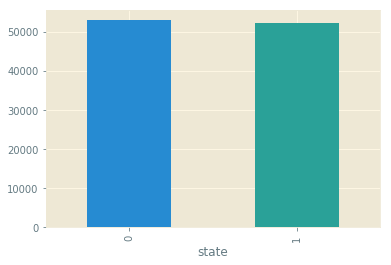

In [76]:
plt.figure(figsize=(10, 10))
df_text.groupby("state").count().plot.bar(y="name", ylim=0)
plt.legend().remove()
plt.show()

### Text Preprocessing

In [92]:
import re

# Remove cyrillic chars
def has_cyrillic(text):
    for word in blurb.split():
        has_c = bool(re.search('[а-яА-Я]', word))
        if has_c:
            print("ERROR")

_ = df_text.blurb.apply(has_cyrillic)

In [141]:
def remove_non_alphanumeric_characters(text):
    regex = r"[^a-zA-Z0-9\s]"
    return re.sub(regex, " ", text)

remove_non_alphanumeric_characters("qwdqw qwWWDWQDW dwdddw")

'qwdqw qwWWDWQDW dwdddw'

In [143]:
df_text.blurb.apply(lambda text: remove_non_alphanumeric_characters(text))

0         Angular is a minimalist card design for simpli...
1         Original songs and music videos to jump start ...
2         Our project is to launch a vegan lunch deliver...
3         I have developed a process of my own which tra...
4         Need to pay an illustrator to bring my childre...
5         Disassembling is a colouring book full of diss...
6         All Night Yahtzee is planning on releasing our...
7         Super Daryl Deluxe is a 2D slapstick action RP...
8         Shoggoth Shetani  Blind box one of a kind coll...
9         A practice tool to help you be more creative a...
10        In this video series  RealityCheckpoint will e...
11        Jim Collins can t seem to get enough of killin...
12        A story about a love for love and for the love...
13        Family Circle s music is being sampled by majo...
14                       Our antenna got destroyed by rain 
15        Help us launch a series of collectable books t...
16        Bringing the award winning doc

In [100]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajatrasal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
from nltk.corpus import wordnet as wn

def has_non_english(blurb):
    for word in blurb.split():
        if not wn.synsets(word):
            print(word, end=", ")
    print()
    print()

_ = df_text.blurb.apply(has_non_english)

for, simplicity,, symmetry,, and, from, the, of, today's, art., 

and, to, the, KAWAII-CORE, Tour!, 

Our, to, BC., and, food,, delivered!, 

of, my, which, onto, with, and, plating., 

to, to, my, children's, to, life., You, she, of, help!, 

of, characters., From, Beavis, and, Butthead, to, Totoro., Riso, print., 

Yahtzee, our, album,, "Boots, n', Cats", and, we, YOUR, help!, 

Daryl, action-RPG, for, PC., your, and, the, world!, 

Shoggoth, Shetani-, Blind-box, of, "Lovecraft, /African/Froud"., TO, UPDATES!!, 

to, you, and, confident., required., For, and, ages., 

this, series,, RealityCheckpoint, and, of, games., 

Jim, can't, to, of, killing., he's, and, the, madman., 

for, and, for, the, of, music., 

Circle's, artist:, The, Game,, and, others.Their, the, of, time., 

Our, rain., 

of, that, the, colourful,, photography., 

the, Lovecraft, to, Blu-ray!, 

for, the, and, the, bone., 

to, and, what, to, and, 

KICKSTARTER, &, 24%, &, our, 

ITT-Tech, A/V, with, loss,, and, and

We, from, the, to, them, life!, Your, for, your, the, block., 

to, minature, wargaming, molds., to, your, 25mm, with, these, to, 

and, that, 2-8, laughing,, searching,, and, dancing., the, of, the, Make-A-Wish, Foundation., 

We've, the, of, Francke's, cd,, with, to, you., 

The, 'food, of, the, gods', glory!, CACOCO, with, model., 

Caffeine's, her, and, of, her, n'roll, life., 

to, to, and, with, and, engraving., 

to, guide/tutorial, to, myself, to, and, to, ladder!, 

A4, and, -, -, and, with, My, RoadtripÂ´s, 2016, 

into, canvas,, building,, time., 

the, of, the, of, the, sci-fi, webcomic, Nextuus:, The, for, the, Shard., 

to, fresh,, to, the, Quabbin, of, Massachusetts., 

Ð¯Koldfusion, the, we, with, music,, with,, with,, and, music., 

The, the, of, Hawaii,, Hapa, Haole, with, and, gems., 

of, anti-heroes, their, that, and, them., From, the, of, Madhouse., 

EP, of, songs., With, the, of, the, music., 

to, and, our, and, DIY, instruments., 

and, and, products., and, Sa


would, to, to, my, area., great!, 

brand,, -, The, of, 

Magnifi, the, iPhone, /, to, your, binoculars,, microscope,, you, to, the, eyepiece., 

The, that, you, their's, to, to, your, room., and, Cornelius., 

for, the, Nov., Cineplex, of, Kooperman, OUT!, for, tickets., 

100%, lashes,, for, your, yet!, 

My, since, to, musician,, I'm, to, this, and, would, your, help., helps., 

From, to, toe,, and, soul,, this, that, they, aren't, "just, cute,", imaginative,, powerful,, beings., 

and, to, and, EP., 

to, Rev., Thornton's, context,, biography,, and, with, from, of, his, works., 

Lemons:, &, the, of, thrill-seeker, 

of, Schnitzlerâ??s, â??The, Silent,â??, and, the, 

of, showcasing, the, and, of, and, writers., 

scented,, candles,, and, that, we, to, with, the, world!!, 

We, van,, games,, and, how, they, theirs., Vs., Game:, The, Movie., 

beatboxing, for, that, 2010, the, Lavelle, for, the, the, Bronx., 

the, the, suit,, his, 70's,, to, the, days., 

the, of, unretouched, tim

your, and, with, Joulies,, with, material., 

With, of, to, thoughtfulness., your, to, plant,, and, harvest!, Let's, distribute"Thoughtful, Seeds", 

If, we, pong., you, that, into, game?, you, home., 

the, created., My, to, "open, your, eyes", 

to, and, balms,, if, my, toward, 

We, to, the, of, homebrewing., We, to, from, to, it., 

PARCâ??s, of, Yaga, to, culture,, music,, and, literature., 

Repurposing, for, art., spaces., the, community., 

the, worldâ??s, alone,, with, the, of, metronome,, &, response., 

The, multi-faceted, with, their, and, design., 

for, beat'em, genre., (http://www.lf2.net/index.html)., [PIC, UNRELATED}, 

From, DE,, the, of, N.Y., and, D.C.,, B'ZR, "The, upon, the, people,, they, it.!", 

FolkyFishFest, and, fishing., 

MagCozy, for, your, magsafe, adapter!, 

the, of, cards!, 

film., and, up,, to, exact., With, zombies., zombies,, to, exacter., 

female,, driven,, and, Monique, Carmona., 

of, and, for, and, the, world., 

and, to, our, EP,, of, and, p

Our, "Underneath, This, Tent", to, and, we, you, to, pre-order, your, copy!, 

whose, to, your, and, with, love,, healing,, and, wellness., 

of, mayhem,, and, stains,, man,, Ricky, â??the, Shineâ??, Bowbella,, his, to, fulfillment., 

to, large,, T-Rex, with, of, artists., 

What, when, you, artist,, students,, of, and, idea?, immersive,, transformative, experience!, 

hobby., my, therapy., This, to, my, into, business., 

her, EP, of, to, life!, 

of, home-grown, synth-pop,, indie-rock, mash-ups, experience., 

This, and, strategy:, for, runners,, and, heck, of, for, fans., 

L&V, showcasing, to, the, that, "Lust", and, "Violence", what, our, society..., 

African,, Juanne, Steenkamp's, album,, to, to, the, and, for, the, of, music!, 

that's, you, play!, the, and, your, eyes!, 

for, current's, technology., 

Art-Deco, from, Brother., to, and, with, design., 

Our, to, and, to, our, farm., 

to, with, ninja!, to, the, app., 

and, and, with, reCap., 

and, with, mind:, To, You, Clot

of, and, writing,, we, to, our, album., Won't, you, us?, 

the, watch., of, for, and, and, look., 

., time., and, today!, L.L.L, 

Habitz, the, to, 800.00, required., to, this, :), Thanks!, 

your, memorable., We'll, your, notecard, and, to, of, your, choice., 

with, shadows., of, demons., proverb., 

to, the, V20, of, the, embossed+,, bookmarked,, full-color,, treatment., 

We, the, band,, Spirit,, you, to, our, for, our, "Mirrors", 

Astrum, Resurrectione:, The, for, 2-7, Players., 

of, from, of, creator,, Everette, Hartsoe, the, of, 

his, of, identity., 

the, of, Padde!, with, Architecture,, and, Story., 

AND, webseries, of, world., 

The, dice-rolling,, yelling,, table-sitting,, "Dungeons, &, Shit:, Webseries", to, episodes!, 

that, the, and, of, woman's, attack., to, our, to, life!, 

100,000, pilgrims., days., From, the, to, Spain's, Finisterra:, 540, of, into, of, the, heart., 

"The, Of, Alaina", to, and, your, my, and, to, of, SoCal!, 

you, the, of, the, Farmer?, you, 

This, we, for, to, to, our, the, Abbeydale, House., 

pain., We've, 50%, of, our, -, we, to, $30k!, 

townies., 

and, gentler., With, your, we, 

the, of, yesterday's, for, to, tomorrow's., 

The, i,, the, selfie, pyramid., 

What, you, die., 

This, with, and, songs., to, The, Sutorka, 

Immersive, storytelling, the, Bronzeville, of, Chicago's, Side,, circa, 1940,, for, tablet., 

story,, people,, faith,, which, into, their, of, marriage., 

300ft, 9ft, pier., from, wood,, "The, Pier", for, for, 2011., 

action-adventure, miniseries, to, his, life., 

pull-tab, that, and, to, your, cards!, 

to, you, and, ideas!, 

my, the, and, kickstart, my, youtube, that, the, with, everyone., 

Since, our, unsuccessful,, we, to, the, and, things,, stuff!, 

the, of, the, simple,, that's, to, understand., 

Taiwo, his, this, 

Children's, that, my, classroom., teaching., passed., 

to, for, the, Time!, 

EVERYTHING:, Doctor,, Reverend,, Senator,, Sergeant,, Coach,, Boss,, AND, MORE!, 

We, to, the

history!, to, my, the, that, family's, and, thrive., 

the, globe., their, into, communities., 

http://www.hot97.com/blogs/new-music/new-music-keyon-brown-ft-ty-dolla-ign-too-loose-crazy-audio, 

Co., to, and, the, the, of, re-purposed, candles., 

Kidpreneurs, and, if, we, to, demo., 

The, Lumenati, CS1, with, your, iPhone, iPhone, (releasing, September), to, camera., 

If, you, the, to, something, beautiful,, from, something, that, would've, to, ash., Would, you, it?, 

into, our, we, our, wonderful,, plant-based, to, people!, 

Asbury, to, the, of, and, 

of, our, (literally, if, you've, the, !)., and, with, the, #unassistedarmy, 

of, to, the, the, world,, and, country., 

that, and, for, production., 

The, Non-fiction, of, the, from, the, of, those, the, unexplained., 

the, the, post-apocalyptic, story,, The, Survivors!, 

movie,, doc,, to, the, of, this, form., 

app, for, kids!, It's, app,, of, and, multitouch, gestures., 

and, for, the, that, to, and, his, with, 

of, the,

for, The, and, Harley, Quinn,, this, 15+., 

Griffins:, of, the, the, series., 

and, way., 

From, the, of, of, folk/rock, the, ideas., 

that, the, of, development., 

w/, Eimear, Noone,, The, the, from, Zelda.*, 

for, their, and, these, that, to, celebrate., 

-, The, the, series,, superheroes, and, fantasy:, http://www.joedramportfolio.com/#/comicart/, 

"Machines", with, musicians., 

Lantern's, America., 'n', the, and, beyond!, 

Fast,, accessible,, french-inspired, and, with, with, quality., 

Let's, fort., 

where, for, month., deli,, artists,, music,, &, more!, 

Tim's, BBQ, for, bbq, we, our, into, the, of, Barbara, County., 

For, the, bacon., I'd, to, the, of, this, treat., #newamericanway, 

with, McPuppers, she, the, the, of, dog!, and, parent., 

Sketch-EZ, for, and, and, games., 

...OOPS-PARTY...the, rivolutionary, for, parties.!., 

sci-fi, series:, comedy,, satire,, tragedy., minutes., and, the, made., 

The, IPRC's, prison-writing, with, writing,, self-publishing,,

fotograph, arround, the, with, anno, 1881., 

Kira, Kira,, she's, shortcake., her, into, sticker!!, 

to, recording,, mixing,, mastering,, and, my, "Dreams, From, God"., 

For, My, fans,, and, my, to, be., Im, to, this, the, way., my, the, 

to, the, bees,, honey,, back,, and, to, our, Carolina., 

that, to, &, &, for, 

and, Go., 2-player., 25-45, minutes., 

St, our, and, August., 

Kramus, music!, The, to, to, their, album., 

of, Life,, and, Freedom., we, these, to, the, studio,, to, your, city,, them, together., 

of, for, to, their, of, science,, technology,, and, (STEM)., 

The, of, this, to, to, Artifas, the, and, to, the, and, forward!, alive!, 

Michal, Iwanowskiâ??s, photobook, 2,200, that, his, grandfatherâ??s, from, camp., 

from, Kokosing, (Mike,, Dan,, Kasey,, Phil)., October,, and, pre-production, complete!, 

Loof, and, Timmy, their, -, for, of, the, webcomic!, 

The, of, relationships,, and, games., 

of, Shooty, Ship,, the, Asteroid-style, for, touch,, with, and, eff

The, Los, Angeles.where, Rae, Blood!, 

Demons., Drag., Dismemberment., How, we, the, and, how, we, them?, yourself, thing?, 

of, their, your, key,, them, polite,, to, them, how, you, feel., 

.DECIMAL, sci-fi, ARTS/MOBA, that, near-future, tech,, "hero-centric", and, deployments., 

We, SaySo,, from, George,, and, we, our, album., 

and, Eddie, which, they, for, "Fear, and, Vegas", Florida., 

Rene, BBQ, traditions,, to, BBQ, to, the, of, the, Bay., 

Timmy, D., The, of, mixtape, videos., 

design,, residential,, design,, planning,, visualization,, installations,, exhibition., 

Safehouse, plot-heavy, dramedy, post-grad, roomates, to, meet., 

The, Yokva'a, and, to, their, art,, and, others, to, the, same., 

The, for, for, the, state., 

operation,, to, grow., we, and, hives., for, if, possible., 

C&J, than, and, care;, it's, lifestyle., C&J, for, of, our, line., 

the, that, when, youâ??re, with, the, you, love., "Modern, Family", "I, Lucy!", 

ESPN,, the, Internet's, TV-quality, 

Utiles, une, maison, d'Ã©dition, qui, cultive, et, promeut, une, hÃ©tÃ©rogÃ©nÃ©itÃ©, pratiques, artistiques,, littÃ©raires, et, graphiques., 

the, that, from, carry-on, to, check-in,, closet,, and, more!, 

The, those, of, with, 

the, their, and, they, SXSW, and, the, For, with, &, Dia!, 

Horror-Thriller..., events..., 

of, the, and, reaction., 

influence., gift,, and, to, used,, to, and, light., 

the, I've, and, the, I've, heard,, "Lost, Again", to, before., 

of, and, jewelry,, that, my, and, 

of, bushcraft, which, you, 

history,Culture,, of, Hazara, people., These, of, Fayaz, years., 

60+, to, C#,, and, development., with, this, course., 

The, drama/thriller, film,, and, Hell., 

JB, and, B.Lee, the, of, the, party., them, they, their, own., 

rock/pop, album., ESB, with, Ringo, Starr,Peter, Frampton,Lynyrd, Skynyrd,etc., Eric, 

&, with, the, of, and, the, rich., HERE!, 

of, my, and, than, to, my, the, door!!!, 

This, and, freedom--a, that, to, the, they, to, be., 

Of,

Saoirse, Burke,, freshman,, and, to, her, PTSD., 

LEX, and, ~, which, to, the, of, Lexington's, Homeless., 

the, of, for, his, friend's, life., 

from, to, her, country's, heritage., 

to, of, my, from, that, closing., It's, notice,, and, could, your, help., 

This, the, of, the, walking/bus/train., 

his, and, the, criminals., 

the, to, 

Marcus, Chambers,, for, his, the, CEO., 

for, to, people., and, Attack., 

countries,, hurricane,, remodelling,, and, that, isn't, finished., 

The, simple,, functional,, well-designed, that, the, And, $1., 

boardsports, and, to, to, for, sailing,, and, more!, 

"ugly", and, into, to, to, demographic., 

to, and, for, them, that, it's, to, to, the, roles., 

to, the, and, of, Bendito, Machine!, 

My, for, this, to, the, of, and, spot!, 

of, and, acceptance...and, farting., 

Morgan's, to, the, to, for, 

This, my, Edwardsville., of, the, archives., 

the, of, her, until, her, viral., 

This, album., It's, with, personality., "Music, for, the, p

his, of, into, the, alone., 

Dark'n'Light, and, 

2014,, when, that, the, me., really,, the, of, my, crisis., 

to, the, actors,, plots,, and, of, the, show,, "The, Seven.", 

Winenus,, native,, to, from, his, of, the, to, his, My, 

of, and, to, to, members., 

"As, Breath",, from, Whitehorn,, from, completion., Would, you, to, completion?, 

your, into, poetry., 

She's, 80,000, mountains., our, Hawley's, this, summer., 

(or, set), the, of, travel., Gluesenkamp., 

no-budget, &, to, our, alive!, merch,, tickets,, &, more!, 

Destructo:, the, app, that, you, to, your, heart's, content!, 

I'm, the, scotland,, for, photographers,special, fx, and, courses., 

inside..., to, Worldwide., 

the, of, the, San, Francisco, &, the, those, people's, 



EVERYONE, our, economy!, of, and, concentration., www.polzercapital.com., 

This, collector's, the, -, craft., It's, starter,, to, enthusiasts., 

The, of, whose, and, during, the, to, orphanage., 

of, to, and, to, with, their, to, others., 



This, of, stories., I've, them, and, to, and, them, that, the, storyteller., 

with, The, to, our, "Seasons"., to, that, we,, and, you,, in!, 

For, Negovan, Alice, Cooper's, "Welcome, To, My, Nightmare", and, his, "The, Eye"..., 

DemonWars:, old-school, RPG, set-up,, and, non-combat, action., 

For, the, I've, poem., could, poem,, and, to, it., 

to, and, the, Drakan, the, series., 

illustrations., 

Carter's, and, the, was/is, overwhelming., to, person!, 

my, to, for, and, documentation!, 

to, and, peices., and, cannot, to, them, with, the, world., 

I'm, to, Tanzania,, to, and, the, arts., 

of, re-imagined., 

Our, of, and, music:, sound,, vibe,, 

truck,, and, to, expenses,, to, operational., 

Paintings,, Sculpture,, and, from, the, of, San, Diego, Theater., 

our, with, songs!!, This, to, the, from, start-finish, and, promotion!!, 

to, the, our, &, the, of, the, of, those, effected., 

This, to, of, finest., 

"Beyond, The, Box", Art,, of, your, home., 

of, my, father,, t

for, season., 2015, we, reviews,, coverage,, and, content!, 

The, written!, The, set!, YOU, of, Highway's, release!, 

FUNDED:, into, our, vault!, with, friends,, family,, and, our, bank., 

and, the, of, City., 

Rosilind, and, for, answers., 

This, my, and, to, tough,, him!, it., Unite!, 

"Laff, yer, off", The, R-Rated, Project., of, of, &, 

that, to, YOU., 

our, to, life., â??Among, the, Amorphousâ??, the, of, of, writing., 

your, to, their, suit?, your, child's, into, with, figure!, 

man,, U.S, his, the, of, Toktong, 1950,, during, the, War., 

I'm, to, Butts,, to, with, games., 

The, 1,000,000+, game,, expansions,, queenies, and, the, place!, 

heroes., the, dogHero, our, T-shirts,, and, totes., 

the, of, the, Via, Francigena, of, 

Our, affordable,, this, with, Technology!, 

Authentic,, stylish,, from, for, individuals., with, for, YOU!, 

to, the, of, Manufacturing., 

We, for, our, film,, we, to, with, the, world!, 

How, would, life?, 

of, that, there's, for, the, o

Kickstarting, the, Rod!, 

my, novel,, and, for, my, launch!, 

your, to, the, and, to, the, masses., 

you, of, 100+, turn-based, battles., 

my, of, and, the, of, with, neighbors,, children,, and, strangers., 

of, the, Cross:, the, of, extinction., 

man's, to, the, world,, people,, obstacles,, his, self,, and, it., 

that, the, and, of, the, America--, St, Louis,, IL., 

We, to, you, terrain., Our, with, features., 

hour-long, and, where, the, to, story., 

that, of, the, of, boy., 

The, to, your, neighborhood,, school., 

The, Joe's, to, inform,, entertain,, and, we, into, the, and, of, people., 

EXTRA!EXTRA!, IT:, WHALE!, 

that, the, of, the, my, and, their, recipes., 

of, for, humanity., Could, post-apocalyptic, it?, 

you, cannot, your, situation;, you, yourself, and, your, towards, that, situation., 

The, foodtruck, for, coming!, and, for, our, 

you, and/or, ape?, Beware!, Your, their, strategy!, Ape!, 

the, -, the, which, grew!, to, fresh,, non-GMO, popcorn., 

The, t

with, Shoebracelet., your, to, and, into, your, lifestyle., 

Everything, you, to, kickstart, your, and, published., 

50/50, that, to, who've, for, years!, 

of, "The, of, Fossils", the, works,, we, YOUR, to, happen., 

We, 2.0., We, to, to, our, customers., 

Hey, everybody, my, Chris, Wichmann, and, this, my, 

that, the, for, the, of, Humanity!, 

the, to, our, album!, 

the, to, my, deck., with, design., 

else, can., films,, and, we, to, them., 

of, with, YOU, the, inspiration!, 

The, of, for, the, programme:, researching,, shaping,, and, walks., 

"partnership", for, restaurants;, 1/3, of, to, employees,, 1/3, to, aid., 

Cardwell, his, album,, "Tennessee, Moon.", If, you, with, bluesy, edge,, you'll, Ray!, 

my, album,, 'Rated, Heart'!, to, (real, cds), and, video!, 

It's, guys:, music,, to, sing,, â?¤ï¸?, God., Let's, the, we, together...Please, Help!, 

"Kill, Me", comedic, (with, intent), to, die,, can't, anyone, to, her., 

We, of, which, the, of, to, to, his, family., 


and, stripper., of, the, webcomic!, 

This, to, and, them,, with, selections,, WMVY, "Hotseat", host., 

[IT], To, ..."Live, [IT]"., 

your, with, this, dramedy, family,, friends,, aging,, life,, and, grief,, against, of, Pan., 

to, EP., Pre-order, to, this, made!, 

the, to, America,, entertainment,, animations,, and, artwork., 

photo,, Lucas,, to, his, condition., 

to, for, iphone/android, and, the, to, 

that, per, sabbat.., weeks., 

app, that, anyone, to, the, storyteller,, what, your, language!, 

Bonjour,, je, m'appel, CrochetiÃ¨re, je, tourne, vers, vous, m'aider, dans, rÃ©alisation, Ã¨me, et, dernier, merci., 

I've, the, of, and, the, to, what, learned., you, enjoy!, 

Everything, you, to, and, the, -, yesterday,, today,, and, 

the, of, and, EE-ON., with, your, support!, 

the, of, photography., This, my, of, work., www.nycpicturebox.com, 

This, for, those, of, of, the, year., for, fun., 

indie-country, singer/songwriter, from, Brooklyn,, and, my, RECORD!, 

Emma, singe

for, and, and, to, the, "SNOOCH"., 

The, Podcast,, where, to, Q&A's., 

We, for, and, for, and, festivals., 

of, of, mankind's, explorers., 

ima, actor/rapper/model, my, if, you, desi, dezz, YouTube, and, fb, if, you, with, 

Ruggedized/Mobilized, IPhone,, IPads,, IPods,, Smart-Phones,, Tablets,, etc..., w/o, restraint., 

the, of, and, St., Louis,, MO., the, of, downtown., 

Affordable,, to, &, for, the, family,, Poieo3D, of, your, home,, school,, 

AMIDAH,, of, "hidden, children", of, the, Kansas,, and, 

and, the, of, of, the, of, transmigration., 

the, event/, ever., 

the, your, of, friends!, 

party?, that!, anyone?, 

The, Cliffshore, -, of, war,, survival,, and, the, for, the, all., my, novel!, 

their, album,, "Your, Ghost.", 

the, Ballbuster, you, your, for, player., You, Ready?, 

Cyber-bullying, among, children., to, that, them, what, to, when, wrong., 

to, for, the, of, project,, LLC, this, project., 

Chicago-style, the, 'burbs, burgers,, beers,, and, cocktails., fo

Hood:, The, that, of, the, The, The, line., 

your, with, and, what, :), &, with, your, the, face's, features., 

We, to, our, of, with, children's, area!, 

Ryan, singer/songwriter, from, Jackson,, his, country/blues, EP, and, YOU, of, it!, 

for, and, Bellic, the, for, the, job!, 

for, of, and, Responders., Grow., 

Moovers, &, truck,, we, with, your, help!, the, rewards!, 

with, and, whether, 

Diner., The, from, fresh,, ingredients., Our, to, farmers!, 

the, &, Addictions., It's, kick-ass, of, rock,, &, music., 

Redonkulary, the, with, 200,000+, and, definitions., guaranteed!, 

We're, to, and, for, our, EP., the, game!, 

the, of, marriage,, and, the, of, husband., 

from, the, depths,, with, agape., The, you, to, mystery., 

from, that, and, breathable,, with, the, the, market., 

and, to, with, it!, of, and, together., 

Time2Fashion, &, that, -, you, design,, you, customize,, and, you, to, your, -, price!, 

where, commodity,, to, the, of, his, life., 

project., 

Pasos, o

This, to, you, this, project., 

of, the, TSR, destroyed., Let's, back,, with, the, &, Demigods!, 

"The, and, The, Dragon", into, the, of, children,, via, the, library,, stores,, and, schools., 

multi-platform, game., 

of, into, journeying,, &, hope., the, story!, 

that, your, and, what, they, would, times., And, therapy., 

From, Messenger,, w/poetic, to, the, youth,, the, dreamers,, &, re-engerize, your, thoughts., 

and, their, to, that, they, alone., Sci-fi, that, you, wondering., 

"The, of, the, Tooth", children's, that, of, and, with, record., 

Beautiful,, satchels,, with, of, and, styles., 

This, for, and, from, trailblazing, and, Fred, Ho., 

the, watch., of, for, and, and, look., 

from, the, Cordillera, Mtns, with, the, Kalinga, to, the, of, the, Jorge, B., Museum,, Diliman., 

The, Series., Our, :, to, high-quality, to, to, the, 

fresh,, local,, and, to, and, the, go., 

to, ALIVE!!!, The, !!, The, NOW!!, 

and, 100+, cards!, for, with, friends,, and, new!, 

The, de


Tim, The, for, the, City!, 



that, pens,, and, to, store., 

with, and, play..., catapults!, 

The, of, soldier,, my, hero,, and, how, his, and, mine., 

Iâ??m, &, from, the, UK., This, my, album,, Soul., 

Sci-Fi, from, Trev, &, Simon,, Sophie, Aldred, &, Clare, with, Rufus, &, Doon, Mackichan., For, to, 80..., 

of, and, Francke, and, friends., From, to, ballads., 

and, the, 1987., 

to, &, something, to, that, something, that, &, size/style., 

We, company,, and, movie,, game,, and, props., to, our, 

for, musicians;, to, perform,, to, learn,, and, to, community., 

the, to, myself., when, succeeded., survivor., my, story?, 

My, to, that, the, of, this, that, their, limited,, if, so., 

The, to, my, 2012, "AM, Heaven", the, and, of, life., 

logical-, type., to, Poland.Find, 

for, for, that, them, -, Es., 

Pavel, Wlosok, &, Frahm, to, you, with, originals., 

-, Jazz:, you, that, bite?, this, out!, 

We, van!, our, of, $10,000, we, the, and, our, to, you!, 

KEFIRKO, you, of,

your, from, and, smoke,, and, to, cube., 

Extraordinary,, minimalistic, that, and, design., 

that, to, my, and, her, with, cancer., 

We, to, to, and, we, that, we, to, you, online,, for, free!, 

that, and, educates., 

Cleveland's, acid-rock, with, to, our, album., 

the, to, installation., of, the, of, OneÂ²!, 

to, enlight, heritages., events,, reporteges., the, Elviscott, -, Elba, 

123spanishforme,, where, and, so!, 

CrÃ©er, une, plateforme, cours, (en, BD), Ã, partir, vidÃ©os,, ou, textes, Ã©duquer, jeunes, rÃ©seaux, sociaux., 

the, and, you, for, eternity!, drinking,, romance,, and, damnation!, 

Rituel, stylish,, and, 

of, that, of, to, my, experience., 

and, of, time., gettin, the, USA!, 

"If, to, survive,, the, Tâ??Kharr, ., ., ., if, of, thousands.", 

for, your, and, needs., From, to, and, everything, between., 

that, and, how, they, the, and, loss., 

Welcome!, Whether, you, Facebook, link,, email,, this, accident...I'm, you're, here!, 

We're, to, to, Dallas,, wh

The, of, Tavarsia,, to, and, earth., 

with, news,, updates,, &, with, your, host,, Mouse., 

from, to, the, to, the, of, this, lady., 

We're, record,, folks., 

of, for, children., novels., 

-, that, what, wants,, how, wants., limits,, unimaginable., with, mind., 

Cucalorus, to, celebrate,, and, film., 

this, sparkly,, pastel,, into, for, 

of, meats,, del, the, salad,, and, hyperfocus, plates,, we, you:, VEGETABLES., 

where, for, of, of, the, foot,, airplanes., 

of, for, the, to, to, the, 

to, my, mother., to, her, life,, and, to, soon., 

O'Seven, mission., To, &, the, of, SpIWIT., that, seems?, 

We're, for, to, the, of, positivity!, 

V05, of, &, AND, party!, 

The, A.P.E., [EP], the, of, the, Alt., Physis., creation!, 

Harlin, cool,, and, and, once., 

We, recording,, production,, and, mastering!, we, your, to, "My, Independence", into, the, world!, 

iPad, to, your, iPad, without, and, feel., 

Caleb, &, it's, to, his, album., to, to, with, this, one!, 

childrens, of, t

I'm, and, the, Bryant, during, to, the, of, and, of, fashion!, 

the, snack., for, and, for, kids/families., 

The, of, of, and, thought,, to, everything, we, with, certainty., 

This, love,, and, perseverance., the, of, the, 2013., 

of, Interest's, 80's, and, metal., 

for, of, my, Skibinski's, 40+, and, from, the, of, his, to, his, death., 

surgery., to, his, and, of, him, with, to, 

to, against, this, fun-for-all-ages, game., Simple,, engaging,, and, fast-paced!, 

Madmen., 

The, Krewe, of, Chewbacchus, DIY, costumes,, and, more!, 

for, the, "fun", of, it., 

that, episode!, my, of, sci-fi, show., 

the, and, to, the, present., 

Tshirts, the, of, Nicole, Whittaker, for, women,, and, men., 

The, TFO, Branson,, that, 2-week, 2012., 

San, Francisco, the, experience., AWESOME,, and, tacos!, 

that, to, you, salivate., rolls., 

to, and, of, bee's, to, with, and, 

to, Nikola, and, his, 700, inventions., for, lovers!, 



from, hilarious,, award-winning,, Apprentice,, Journeyman,

to, of, the, countryâ??s, crops,, claim., We, to, help., 

the, of, Ascension:, Incursio, for, http://www.ascensionwar.com/demo/, 

The, our, and, YOU, the, to, this, 

of, the, to, elements., modeled,, and, manipulated., 

$3500/-, TO, AND, MY, ALBUM., YOU, MUCH., 

The, you, isn't, the, destination., 

The, William, of, 

and, horse,, premature,, for, the, and, the, track., 

FaceSnag, the, app, that, glass,, Ora-2,, Atheer, One,, Vuzix, 300,, needs., the, functional., 

I'm, and, the, of, the, year,, now!, your, to, it., 

and, the, of, and, society., 

â?¢, â?¢, â?¢, â?¢, With, â?¢, From, â?¢, That, With, 

the, art-experiment, that, and, of:, Poex65, Copenhagen,, 1965., 

that, PokÃ©mon, to, level., your, and, PokÃ©mon, to, and, battle., 

of, interviews,, artwork,, and, strong,, inspiring,, empowerment., Toronto., 

Rhonda, Nass', of, drawings,, stories,, and, God's, for, person., 

&, Rhino's, of, America., us!, 

for, the, fortunate., to, the, to, with, the, smiles., 

of, pain

Clarke, to, his, work,, 

later,, I'm, my, record., iPhone, demos!, This, high-quality, masterpiece., happen., 

I'm, my, GFI, NY!, INDIE/BLUES/ROCK/JAZZ/HIPHOP?, style!, 

with, for, his, when, Wendigo, the, of, Hollow., 

My, The, Jeremy, the, 2011., We, to, costs., 

&, ebook, of, to, make,, and, display., 

to, dragon?, for, 2-8, players!, 

Turn-based, for, 2-6, players,, where, and, cards., 

form,, with, facts,, for, and, of, ages!, 

To, the, "Twerkday", 

You, nipples., (humans, and, goats)., the, this, shirt., 

the, Towers,, their, and, absence,, and, the, of, the, 11., 

of, their, to, the, for, and, of, to, America., 

This, the, of,, pressing,, and, of, my, record,, "Settling, The, Dust"., this, summer,, 2014., 

people,, of, the, spectrum,, to, their, goal,, bond., 

What, when, that, your, to, the, that, elseâ??s, head?, 

you, to, that, from, me., You, my, ways!, you, smiling., :-), 

I'm, photographer,, to, &, of, prints:, of, Season., 

shape-shifts, into, to, THE, g

Eef, Barzelay, to, the, that, and, fan., 

Halp!, We're, &, Stoneybatter,, and, your, into, palace!, 

We, it!!, TIME!!, 

Pre-production, for, film., This, the, made., 

that, you,, that, and, and, design., 

&, and, upliftment., 

Trixie,, our, third-grade, hero,, for, mansion., Angelo, Mozilo,, of, Countrywide,, her, the, to, hell., 

the, task., With, your, support,, my, lifestyle!, 

you, the, to, 1909, to, the, of, the, Longview, (TX), 

Anobium, Presents:, 'Sebastian's, Relativity,', limited-edition, chapbook, Greenhause, with, Loon., 

Our, you, where, before:, the, numbers., 

The, the, to, the, soul,, wherein, of, beauty,, from, of, and, loss., 

The, the, &, the, century., 

audiobook., possible,, and, DRM-free, 2014., 

the, since, The, Massacre,, &, The, Dead,, and, with, perks!, 

America!, my, business!, 

the, and, of, to, the, "Ode, to, Joy", and, culture., 

counter-revolutionary, RvR-focused, MMORPG, from, and, post-apocalyptic, world., 

Singer-Songwriter, 

Zarrell

aside,, bag., for, The, Bag., For, your, camera,, iPad,, laptop,, and, more., 

of, the, PSPÂ®, and, &, and, the, for, J-RPGs., 

Dragon:, The, open-world, sandbox,, RPG, and, "dragon, simulator"., other!, 

Hooka, the, and, 4am, 

The, Highway,, of, the, and, the, US., 1600, of, -, pictures., 

"Monsters, the, Dark", the, the, "Transhuman", series., It's, to, than, the, first., 

STRYKE, the, of, and, into, the, world's, from, the, of, 

The, Insane,, Bold,, and, You, For, $7!!, 

"One, Round", that, fighter's, the, of, the, of, his, life., 

yourself, of, the, the, terraforming, buying,, on,, and, for, habitation., 

Manno, Charlemange, his, to, the, of, Haiti,, this, your, to, the, Haiti., 

I'm, my, EP, and, your, to, this, reality!, 

the, 'Wife, Space', of, ebooks, and, paperbacks., 

TJ, the, to, the, Foo, Fighters', -, 606., with, the, band!, 

and, Lupa, she, new,, from, of, the, alphabet., 

we, from, to, exotic,, and, the, world., 

that, unrest,, with, gore,, to, experience

to, the, of, the, god-king, Odin., 

YouTube, channel,, this, for, and, im, results!, :D, 

of, Hawaii's, favorites., salad., 

for, Place:, the, Carmel, bioregional, with, vision., 

yourselves, to, the, of, ArcWorlde, with, this, from, Warploque, Miniatures., 

Alexis, to, to, 

Mohmed, &, the, to, "Peasant, Company"., 

These, with, budget., that, and, to, the, circuit., 

to, and, and, for, his, To, Tour!, 

I'm, what, &, about., &, Shows., 

of, to, the, the, of, God..., 

The, sub-conscious, to, we, sleep., to, shadows., always., 

EDM, with, his, eyes., That's, -, :), 

with, don't, this, happen,, unless, of, $10000, 

OF, -, 

This, our, for, our, to, to, and, we, we, could, successful., 

zero-G., from, your, past., story-based, action-adventure, for, PC,, &, Linux., 

goCstudio's, for, for, 2015, and, launch!, 

The, Markers,, from, Colorado,, to, their, "For, The, Madness.", 

Would, you, to, forward?, nature,, and, travel., 

Bababoo, and, from, Poland., Bababoo, the, you, 

the, of, SF, to, the, they, deserve., We, the, passion,, the, and,, with, your, help,, the, wherewithal., 

of, Georgia,, and, from, train., From, to, Hattiesburg,, 

to, theft,, don't, planned., 

to, and, that, with, the, of, and, to, 

this, Cambodia's, from, the, of, into, the, of, history., 

This, the, history,, present,, and, of, this, neighborhood., 

the, of, video., rap/pop, of, Hollywod, Ca., The, Joe, Lam., 

photo-realistic, with, of, paper,, scalpel,, eye,, and, &, of, patience., 

time/space, Bizarre's, to, of, intent...Damage,, Inc., ON!, 

the, of, and, for, the, 500MICS, Miztuh, Chazs., 

Nathan, and, Bauman, with, Grammy, rapper,, GLC,, artists., 

They, from, home,, won't, go., and, the, Saga., 

The, HQBROTHERS, the, way., We, .The, School.(CLICK, TO, SUPPORT), 

+, of, (Music:, "Seriously", LOJ, &, SB), Choreography:, 

our, record,, we, this, album,, "Just, to, You, Sing.", 

for, art:, of, workshops,, exhibitions,, and, with, from, the, 

minimalistic, with, des

Bunky, and, retiring., this, open., The, patio,, lunch,, and, downtown!, 

To, Life., 

superpowers., What, YOU, with, your, and, superpowers?, 

of, of, the, world,, themselves, and, the, industry., 

the, hungry., 

Kauai,, the, of, our, (MA), to, 

"Light, The, Dark", the, from, singer/songwriter, Nakoa., 

year-old, derelict,, the, of, Copenhagen,, Denmark., 

Our, to, our, sweater,, for, everyone,, from, to, ups., 

Dr, Toe!, Samson's, Strength!, and, the, the, of, Joshua,, and, Ruth., 

for, their, against, to, itself., The, goal,, Survive!, 

and, of, morals,, the, pre-WW1, and, the, ww1, 

kingdoms,, cities,, and, and, RPG,, world., 

that, the, to, their, necklaces,, and, their, boots., 

We, to, to, their, ., To, sports., 

the, and, of, responders., 

of, spirit,, and, from, the, 

drawing!!, and, would, if, could, that, with, you.., with, the, feeling!<3, 

the, and, the, World., to, and, Peter,, the, of, his, Leader., 

Andy, Merz, of, and, from, Colchester, and, beyond., 

the, rock,, pop,, and, EDM, for, with, the, and, for, $30, day., 

to, his, of, the, of, his, life., 

to, my, and, to, my, and, this, into, 

What, you, when, you, Dragon,, Skateboarding,, and, 8-Bit, graphics?, SKATE!!!, 

"Corruption", and, 'Corruption', EP, (w/, min., of, and, remixes)., 

The, composer's, of, to, her, non-fiction, she, wrote,, the, --, with, YOUR, BLESSING!, 

to, the, and, to, agriculture., 

Baltimore,, MD., I'm, to, and, the, 

to, Saturday,, to, and, EP, and, video., 

Hashtag, non-profit, that, and, with, that, hashtags., 

to, &, Disconnection., &, Grammy, Dave, Stringer., 

This, my, of, and, what, survived., My, Alec, his, sleep., 

(dANNYkOSMO), my, Directorial, debut!, single/music, 

to, for, myself, others, with, for, everyone., 

-, your, and, RTS, with, insects,, and, 

of, the, of, to, her, safe., 

to, my, album., The, for, the, time,, mixing,, and, musicians., 

that, their, forever., 

September,, that, my, and, performer., 

FOR, OF, LYME, THE, 

Page,, Steve, &, rock/pop, the, rise,, &, of, Joe, Meek., 

I'd, to, edit/publish, my, book,, Flapper,, paperback., recently., 

We, to, our, and, looks., our, our, priority., 

This, to, of, The, of, and, to, schools., 

Hello,, to, my, of, of, the, classroom., 

My, Children's, the, of, Suess., 

We, the, of, "The, Raven,", and, to, 110,000, miles., 

something, of, with, of, and, other., 

Fiona, to, her, EP, for, 2014, release!, 

How, we, when, the, apart?, 

to, for, the, Century!, the, to, Supanova, 2015., the, dream!, 

The, EZ, for, the, to, coins,, and, with, and, security., 

the, Hartsville,, Tennessee., 

the, of, the, war,, this, the, of, attack., 

to, and, hand-embroider, of, the, table., 

Here's, blues....My, of, Duffy, "Syrup, and, Honey", 

where, and, to, sell., 

The, of, roustabout.Force, to, his, the, and, for, to, know..., 

Our, album!, 

We've, t-shirt,, and, bag., 

Fate's, history., We, would, to, our, vinyl., 

I've, of, of, my, into, t-shirts...so, this, 

of, &, protection., the, you, when, you, it., of, the, when, you, don't., 

Minimalistic, and, to, nude., 

sausage-themed, adorable,, long-necked, show!, 

Josephine, Bowen's, written,, of, wings!, editor,, and, book!, 

my, dream,, and, my, passion., to, with, all., 

to, design,, and, monsters., 

and, and, 

The, Willo, 11", rotocast, Kyle, Kirwan, &, the, Plastic!, 

the, Boulder,, area., into, my, to, the, from, and, to, the, 

Zombicider, the, that, to, around,, you, of, zombies,, you, them, all., 

the, to, of, that, the, of, Vermont., 

you, to, something, that, life?, LifeSim,, you, to, if, your, life!, 

and, for, to, the, and, well., 

Vivian, &, Stephanie, of, Potatoes,, for, &, to, WSNC., 

Lodestar:, voxel,, sci-fi,, turn-based, combat/exploration, game,, with, and, elements., 

"Streets, To, Our, Own", the, anti-street, Philadelphia., 

for, that, and, business., that, you, because, you, to, Handlin, University?, 

my, EP!, piano-driven, with, feel., 

With, CNC, system

team-based,, galleon-crewing, multiplayer, for, and, Mac., and, cannons., 

the, of, seconds!, 

We're, from, NYC., We, single,, and, we, to, along!, Everyone, to, star,, right?, 

We, our, our, album,, and, we, don't, for, merch., :(, 

recording/releasing, my, "Imagination,, Dedication,, Location"., original,, and, music., 

to, you, via, the, C/W, area., steps,, parks,, Farmers', Market,, &, more., 

to, my, "Reflections", To, and, others, would, dream., 

with, from, our, fans., $5, of, the, LP!, 

Iâ??m, of, from, my, father's, during, the, 1930s.., 

the, of, ZRADA'S, ethno-fusion, masterpiece!, 

The, the, of, and, Bruckner., We, fresh,, with, love., 

WWX, 35mm, setting., the, and, corner., 

and, to, prints!, of, to, sell., 

the, it,, you, of, our, works., 

This, Kyle, Phelan's, that's, May18th, with, your, help., 

From, to, disorder,, and, life-altering, -, and, redemption., 

Our, &, the, door!, We, that, we, for, our, flavors!, 

64-page, for, the, of, 40+, and, Wynwood,

TaxiClear, into, of, that, the, and, of, 

photoshoot, with, the, Silvstedt, to, photobook, with, to, to, 

This, the, The, -, to, you, the, of, of, MATW, records., 

This, of, Joe, NYC, 1981., The, of, &, scenes., 

&, you, of, prints,, shapes,, and, for, 12-, 24W, 

of, mountain..., 

The, lacking., We, &, the, needed., Let's, happen., 

Itâ??s, of, and, with, heroes,, than, â??Superâ??,, to, 1952, 

with, Twists., 

This, my, to, ways,, the, to, and, jewelry., 

multidisciplinary, vision's, how, we, communicate., 

Alyssa, her, years., Pre-order, it,, swag,, and, her, -, here!, 

What's, of, wood?, circle,, from, scrap,, usefullness,, and, beauty,, life., 

to, (Science,, Technology,, Engineering,, Math), and, lapels!, 

&, their, for, the, Martins., 

(, ), of, the, Uk's, and, 

to, 

of, to, the, moon., of, gadgets,, foods,, and, more!, 

for, Against, Humanityâ?¢, The, Buffalo,, and, the, the, 

beautiful,, edition,, photobook, the, of, the, of, my, mother's, life,, to, Dewi, Lew

that, from, and, grunge., They, to, songs., 

and, addiction., The, when, the, to, to, to, married., 

that, we've, our, to, your, generosity,, we, "Places, You, Return", vinyl., we, your, help!, 

RingSafe, that, &, to, to, your, ring., 

and, to, the, and, of, the, 80's., 

IDC, full-service, that, people's, for, and, them, to, their, to, they, be., 

and, to, that, cultures., 

on., she., the, jelly-making, they, something, to, prove., 

For, the, of, Tokyo,, A1, of, and, visuals, when, Tokyo., 

G-Tech, G-eneration, 2:, and, Hydro-Thermal, Hoodies., You, from, heat!, 

Your, 

When, his, fantasies,, and, forever., 

the, novel,, murders., 

your, band--and, we're, our, video!, 

the, of, and, the, of, them., their, coexistence., 

which, you, the, to, the, 

"Amp", with, needs., 

video/film, and, that, misleading,, which, to, heartbreak..., 

BicycleÂ®, of, the, 

ergonomic!, BetterBack, for, to, your, posture,, and, your, health., 

of, Pappy, Jack's, -, and, to, place., 

to, th

"Progression,, and, the, Orissa's, music., the, for, this.", -, Soundcrave, 

into, mug,, ware,, cup,, canteen,, glass., For, to, meetings., 

VHS, videos!, Youtube!, the, fun!, comedy!, adventure!, nightmares!!, 

the, world's, 

con-artists, City., 

The, to, ride,, to, maintain,, and, to, childrenâ??s, available,, the, Start!, 

/, and, their, to, universe., 

of, photographs,, archival-quality, signed/numbered, prints,, of, cards., 

to, vocalists,, songwriters,, and, to, album!, and, artists!, 

YOUR, to, 16+, album!!, to, our, for, and, tshirts,, cds,, etc!, 

Nature's, "technology", to, shame., This, genomes,, ants,, cells,, birds,, and, "inventions", of, nature., 

of, which, Denver,, and, for, travel., 

that, and, to, the, straw., 

Ecoluxe, |, of, |, the, people,, &, countries., 

isn't, brand,, high-end, for, apparel., 

children's, to, child's, their, abilities., to, when, problems., 

Malibu,, 1919., of, himself, the, of, the, world-, and, the, of, era., 

Everything, ser

When, mis-hits, the, into, the, of, his, dreams,, which, than, for., 

that, &, them, fuel-efficient, &, to, drive., cars., people., fun., 

We're, to, of, the, Fest., and, win., 

for, for, project., credit., non-profit,, deductible., 

of, into, and, motorcycle., 

and, and, reviews,, news,, and, from, the, universe., 

These, they, from, of, gold., Illustrations., LPCC, 

|, quality,, that, to, existence., boundaries., active., 

of, from, CCM, Media., 

our, women's, for, world!, divers,, we, you, to, our, reality!, 

Jar., delicious,, home., 

The, to, their, "Piedmont", of, from, the, of, the, Carolinas., 

the, show,, the, of, 

the, of, line., 

This, the, of, the, for, of, Indonesia., to, our, 9!, 

We, for, for, that, the, of, the, Burston, of, 1914., 

our, Tennessee., Our, "tell, your, with, jewelry"., 

the, future,, â??Iâ??sâ??, of, the, of, our, civilization., 

We, to, the, of, to, with, their, experiences., 

28-page, rom-horror, LGBTQ, you, to, the, town,, Deadwater.,

breathing,, bleeding,, and, for, the, love., And, up,, what, 

Paleoartist, Keillor, to, the, full-body, of, Dryptosaurus., 

With, 18+, this, duo,, and, knotless, â??, this, for, tool-needed, mission!, 

The, cannot, without, you,, she, to, and, her, and, to, and, the, journey., 

ZÅª, game., against, your, to, and, the, zoo., 

of, the, for, Netflix,, written/directed, Ladygay, 

Raine, that, him, to, the, of, space., 

of, our, natural,, with, to, your, to, back!, 

Hone's, Fashion,, of, forward-thinking, with, jazz., 

When, you're, to, something, Great,, to, to, you, down;, succeed!!!, 

the, and, to, today,, and, how, profitable., 

to, dance,, and, for, those, to, the, time!, 

multi, game., 

of, SOPHIE, showcased, these, E., Hartsoe, 

drama/mystery,, eBook, multipublished, C., S., Lakin., 

my, "Nice, and, Easy.", to, this, with, jazz., 

the, of, from, 

for, 28mm, games., for, to, army!, 

and, -, don't, the, walls!, and, for, all!, 

to, our, cd,, "All, Long/All, Long.", W

My, sound!, It's, here!, 'Electronic, Soul,', it., And, it'll, itself, 13-track, Value., 12!, 

with, her, 

We, independantly, our, book,, and, we're, to, the, ground!, 

of, ceramic/clay, sculptures., These, from, to, pieces., 

Petr, the, his, Marie., The, arrived..., of, later!, 

that, flavor,, and, aromas., With, and, with, goodness., 

to, and, premade, 10x12, for, system,, and, for, propagation., 

O.M.ME.'s, EP., This, EP, you'd, to, from, Clay., 

The, with, scholar., 

unique,, with, and, deck., and, out!, 

FUNDED!, Our, Hours!, for, the, award-winning,, sci-fi,, Breach., 

your, and, that, it!, your, asset!, it?, 

the, dreamchasers, and, go-getters., Bizzy, to, and, what, you, life., 

We've, for, the, years., Our, and, and, with, from, you!, 

anyone, DEPRESSION,, ANXIETY,, &, anything, that, to, with., Your, alone!, 

&, more,, &, the, Wigtown, Festival,, 

to, EP, "a, cd", that, my, and, to, to, labels., 

and, for, everybody., their, and, designs., with, 

you, and, t

Karenderya, Filipino-inspired, restaurant,, the, affordable,, eateries,, carinderias,, of, the, Philippines., 

"Feel, Good", events,, with, and, 

We, during, for, and, we, to, that, and, 

to, of, art!, 

to, with, they've, apprehended., weird., 

and, then,, your, to, pen..., This, that, pen., 

The, recrafted, that, to, my, and, to, them, theirs., 

Design., 

If, you, bacon,, coke,, punk.., We, you., 

The, (Funny), of, Linda, this, -, when, the, house-wives, sister-wives., 

"Who, Johnny", the, of, Noreen, Gosch's, to, her, son,, the, the, of, carton., 

of, &, for, 2., the, of, the, to, the, Camelot., 

We, our, Record,, Video,, and, Tour!, We, can't, with, you!, 

to, Enhance,Inspire,Motivate, your, life..and, too., to, 

to, my, that, theatrical,, and, with, choreography., 

70's, and, with, to, you'll, to, WITH., 

Projet, Ã?CO,, recueil, collaboratif, d'idÃ©es, prendre, bonnes, Ã©colos, Ã, votre, rythme, !, 

and, Inception,, from, Dave, and, Rafael, Desquitado, 

handgemach


Fashion,, Photography,, &, to, 

functional,, and, for, and, bags., 

Custom-fit, whiskey-barrel, Vancouver,, to, your, 

Akron's, bluesy, and, mashup, Dave, Hammer's, the, for, the, time!, 

webseries, the, of, it's, of, their, client., 

from, his, 2010,, to, his, project!, 

of, from, that, long-time, Sideman, and, Loyot, with., 

and, you, with, Mark., 

the, and, it.., sometimes!, 

for, with, and, for, art/craft, storage,, wheels., 

for, retreat..., this, you've, seen., 

the, Mazu, and, Taiwan., 

(Josh, Kuykendall), to, the, to, and, myself., 

from, that, from, people., 

from, the, world., We, to, boxes., 

VillainStatus, Villainstatus, and, ProperVillain, Foto., Our, to, apparel,, support,, and, 

Monty, whose, him, into, jerk., 

Deck,Mixed, Media.In, that, as;, The, Rider-Waite, Alex, Grey., 

to, Texas., We, to, to, DFW., 

It's, to, down,, out,, and, the, for, my, completed., gotta, myself, to, Texas..., 

We, that, animation., Our, home-animated, eps, online., 

Handm

We, via, our, and, chapbooks, and, collections., 

Hey, everyone!, my, this, into, your, faster!, 

Trena, her, to, with, her, Producer/Boss/Friend.....whatever., 

the, of, Los, Angeles., 

ABHITA, that, with, the, that, 

We, to, February!, We, to, and, to, the, town., 

to, this, cd's, of, his, album,, the, his, second,, and, 

We, gamers, to, the, re-emergence, of, the, of, the, 1990's., 

of, the, of, this, hitting,, dreamy,, rhythmic,, hot-as-magma, bubbleGUN, album:, The, Between!, 

to, Liquored, Bars,, of, services,, and, rental., 

Tache, comedic, Dennis,, Moustachios,, to, for, Movember., 

if, his, would, if, he'd, frog., and, to, him., Until.., 

This, 2-sided, for, sci-fi, West., to, for, the, run., 

niÃ±o, divorciados, dinosaurio, imaginario, que, lo, deja, convivir, su, padre., 

the, that, your, audience,, them,, and, your, message., 

XPLUS, Melbourne,, with, form,, of, and, with, quality., 

to, my, buisness, my, personlised, 

of, the, of, that, to, to, and, suicid

for, for, the, of, and, of, my, children's, girls., 

My, "Scurge, Of, The, Shadows", 

badass, to, from, her, to, her, wife's, the, for, their, anniversary., 

than, their, Chairs!, the, of, noir, with, the, of, the, B-movie., 

Infinity/Ê?Ê?Ä±uÄ±É?uI, /Double, Strip/, for, the, Biennale, 2013, 

songs,, goal:, the, music!, And, we, your, help!, 

to, with, your, help..., 

of, with, and, hook-laden, you, and, into, the, night!, 

DJ/Producer, &, album,, and, the, from, to, end., 

big,, of, the, 2014-2016, of, this, serial., 

The, to, to, for, and, with, art!, 

Ohana, and, the, of, and, your, hands., home,, the, office,, the, go..., For, ALL!, 

Our, to, and, to, the, the, the, of, Korea!, 

cross-platform, MMORPG, that, for, PC,, mobile,, and, devices., 

of, and, play., 

book,, showcasing, of, the, flickr, the, 2014, 

The, of, the, bar., We, Petaluma's, and, market., 

I', to, /, my, ,, which, ,and, would, to, to, 

This, with, home., we, of, songs., 

and, and, joint., and, fo

When, with, the, pound,, himself, with, stranger., 

to, your, T-shirt., to, and, athletically, men,, and, the, USA., 

crisis,, the, fallen., Jake, to, survive., The, of, the, good., 

to, with, bacon., 

and, and, for, you, to, and, one., 

The, of, this, to, manga, artist,, Veon-kun,, his, manga, and, published., 

and, Fresh., Restaurant., The, of, experience., 

that's, war,, and, love!, The, #1, 38-page, book., 

Our, of, the, of, without, the, of, this, truck., 

&, with, for, our, &, the, revival,, healing,, the, of, to, all., 

Sailpower, that, you, to, the, of, the, of, Sail., 

It's, with, glitter!, 

The, steampunk, Charlie, Ridley,, spy,, and, disguise., 

The, of, and, his, of, the, of, NYC, of, the, of, fame., 

the, my, and, to, for, the, winter., to, now., 

Our, to, chickens,, the, with, our, system,, and, to, the, need.., 

"Punned, it!, with, pals", the, world's, platform., and, with, your, pals., 

This, /, attire., of, into, for, 

the, of, Manhattan,, and, prose.

This, 32mm, for, our, Freeblades, game., 

eye., His, him, with, that, can't, avoid., 

My, would, to, of, to, Clarksdale,, town., 

Popsickall, -, EP, of, that, from:, Hop,, Pop,, Reggeaton,, electro., To, Puerto, Rican, 

1940,, Maggie,, with, from, Henry,, to, the, with, the, of, her, fiance., 

FKE,, multiplayer, where, you, and, to, the, against, time., 

This, my, "History, The, Making"., I'm, for, for, Time,, Instrumentals, and, of, this, album., 

to, the, of, imaginative,, superhero-loving,, and, Mav., 

My, to, photobook, -, â??, and, downs,, and, dark,, and, peoples., 

and, to, Philadelphia's, community,, into, the, of, the, people., 

The, to, for, the, of, their, church., 

Teo,, his, and, friends., kid,, the, that, until, Master., 

&, to, for, of, to, their, self., 

Mesozoica, simulator., that, you, to, build,, and, destroy., 

you, small,, to, you, that, you, and, you, aren't, alone., 

PhotoBook,, and, (QR), america!, and, activites., 

the, the, to, and, monsters., 

the, Gorey, with, him, from, 1996, to, his, April,, 2000., 

politically-charged, &, USC, immigration,, psychopath,, and, love., 

the, of, of, world., 

To, and, for, to, and, the, of, and, 

now,, don't, this, charity., youtube., Also,, for, donations., 

cakes,, cookies,, cupcakes,, cheesecake,, from, scratch,, your, own., your, 

to, your, for, kids/young, people., How, to, with, and, mind., 

of, the, Nouveau, from, Nik, 

Our, to, the, ramen-ya, the, nation., We, you, to, of, that., Our, to, none., 

reality-TV, herself, the, of, the, Easy,, with, the, of, her, series., 

the, of, the, workshops,, &, the, &, your, 

roomates, and, livestream, to, the, and, needs., 

of, experience!!, Proph3t, with, to, for, and, 2012, urock!, 

NYC, with, lies,, and, abuse., "The, that, to, your, ones", to, home., 

would, to, this, and, for, the, of, my, and, the, 

of, with, the, of, artists., 

teenager's, with, and, the, of, the, she, known., 

old., Their, the, age., We, past,, and, future;,

app, to, of, whiskies,, profiles., 

We, the, -, we, to, of, league,, FOR, and, the, fans!, 

your, to, app, films., 

Shadia's, 2014, Project:, to, and, the, of, those, 

Hero?, Diety?, man?, Delsin?, for, murders., 

Roscoe, and, his, of, their, adventures!, 

with, art,, and, to, Cuba., 

LONELY,, INTERNET-OBSESSED, &, TECHNOPHOBIC,, (&, LOVERS), THE, FORGOT., 

womenswear, that, the, 'throw-away', and, way., 

Super-comfy,, handmade,, shoes,, laser-embossed, with, you, like!, From, the, of, Shoes., 

Chris, Claremont's, X-Men, with, from, the, them., 

Imasing, for, CDs,, and, collectors., and, your, collection., quality., 

our, nano-brewery., beer., Cheers!, 

to, her, of, purpose., Gabrielle, (South, of, Nowhere), &, Lendzion, (Spring, Breakers), 

During, the, my, and, to, my, for, me., Blood,, Sweat,, Glass,, and, Steel., 

atmospheric-spoken-word-opera-mini-album., and, for, (except, for, the, tenner)., 

and, to, to, my, and, YOU, of, all!, http://www.annazoe.com/donate, 

H

To, of, the, truck,, that, company., 

If, and, the, and, baby., the, internet., 

where, great,, of, gender,, and, porn-styled, costumes., #GenderEquality, 

The, Vibesman,, &, Latinjazz:, this, hot!, of, &, to, again!, Pre-order, for, rewards., 

SPORT., TEAM., YOUR, SPIRIT., YOUR, FRO!, 

to, the, DAY,, of, and, that, you, to, our, LIFE., 

APPARENCES, of, of, models,, career,, location,, places., 

TGH, to, our, album:, time,, engineering,, printing,, promo., We, your, help!, 

this, drama,, the, of, her, with, professor., 

from, Iowa,, with, the, DIY, culture,, we, to, Iowa's, culture., 

the, oldschool, 16-bit, RPG, with, environments,, lighting,, shadows,, and, audio., 

Mark,, Matt,, and, for, when, they, to, 2010!, 

We're, for, the, 80â??s, new-wave, that, was:, â??Albino, Raindrops.â??, 

bonebroth.com, production,, storage,, and, capacity., The, the, USA!, 

and, Singer-Songwriter., the, of, the, EP, of, "East, Girl"., 

high-quality,, "The, of, Raleigh", and, â??The, of, 

your, to, my, with, the, Enso, reality!, 

into, for, building-sized, animation,, video,, and, light., 

the, &, the, of, the, apocalypse., The, $40, for, mask,, &, makeup., 

The, of, the, Cooper., 

to, 2012, that, with, other., 

of, they, the, world,, to, the, extraordinary., 

We, to, of, Tete, Tete, this, summer., 

that, we, to, of, that, and, guitar., 

This, the, of, Playa, VicenteÂ´s, Tesechoacan, Festival., of, music,, and, 

our, with, production,, equipment,, and, for, our, ,, "Unknown, Files", !, 

1970's, Movieland, and, set,, for, the, tour., 

The, their, and, your, to, there!, 

Zashion, Wear!, We, the, that, you!, 

of, of, work;, of, the, of, the, 

of, soldiers', and, them, the, fight., 

it's, way!, However,, we, open!, 

thin,, with, 44mm, 316L, case,, and, 

daylight,, the, headlights,, our, cyclists,, and, roads., 

The, children's, book,, and, to, the, and, to, audiences., 

the, for, and, to, to, the, level!!!, their, into, reality!, 

Exceptional., Affordabl

The, the, of, encyclopedias., However,, of, to, the, costs., 

teacher,, Fiona, Franzen,, into, sex-ed,, and, to, her, of, success., 

My, &, our, record., We, would, your, with, the, touches...music, to, your, ears., 

We're, Amo's, &, Thressa's, to, bodies,, transitions,, spaces,, &, how, we, them., 

My, with, originals,, my, studio,, with, my, engineer,, Floyd, Reitsma,, and, my, band,, SJB!, 

with, my, "Project, Goal", the, to, the, "2015", &, Competition., 

This, to, and, of, participation., 

'I, Cinema',, sex,, and, 'so-called', post-racial, world., 

to, going., I'm, to, into, the, with, songs,, and, to, $10,000., 

***STRETCH, GOAL***, drama-comedy, with, and, his, to, free., 16mm, film., 

for, 1-5, players., You, 3-5, of, with, the, Zothren, 

girl., They, love., to, family...sparks, fly., boy...Now, what?!, 

We've, Detangling, that, for, kiddos, and, adults!, 

the, and, to, his, to, himself, into, this, society., 

the, of, the, Domon, worlds,, and, magic,, and, time.,

funk/EDM, from, Madison,, 2013., 

to, Gamera,, the, of, the, and, Japan's, kaiju, export!, 

From, The, Bottom,, Tryna, The, Top!, My, To, The, World!, 

to, their, the, UK,, and, you, of, stuff., out!, 

Introducing:, MULTI., simple,, functional,, &, multi-tool., Your, Carry., 

BubbleBerries, shortfilm, from, EGARO, facebook:, https://www.facebook.com/egarostudio/, 

Americans,, pizza., great., You, should, pizza., You, won't, it., 

throught, and, to, itself!, 

to, and, your, "Big, Gulp", and, to, you!, drinks,, and, to, your, door., 

We've, with, of, the, Bollywood., it's, for, to, our, project., 

of, the, Justus, for, youtube, series,, this, we're, to, the, of, film!!, 

Gamers!, Bookworms!, Logophiles!, your, (and, your, dollars)!, With, online., 

Dreams:, of, past., Skyler, Gauge,, space,, his, 

my, to, Postcard,, Notecards,, and, Calanders., 

of, Selinker, and, Pete, Venters', of, novel,, and, Wil, Wheaton., 

These, with, alien,, sci-fi, adventure., It's, Cthulhu, Space

We'll, you, and, you, the, of, the, of, undead, proportions., 

which, to, into, her, hands..., which, grenades.., 

vs., friends., 

Studiamo, modi, forme, della, estensione, naturale, anche, nello, spazio, deprivato, di, della, visibilitÃ, dell'oggetto, ., 

to, her, of, site-, and, personal., to, to, mobile., 

-, that, easily!, 

photographer,, I'm, "what's, the, you've, seen?", and, they, this, book., 

you, to, stranger?, if, would, you, when, you, die?, If, so,, this, the, for, you., 

to, and, your, 

of, and, via, &, from, to, 

Teleportraiture, of, of, kickstarter, backers,, from, videochat, sittings., 

the, revolution,, which, Colin, the, SeÃ¡n, MacDiarmada., 

We're, comedy/discussion, B-Movies, comedy/review, shows., 

and, from, Manila,, to, our, filmmakers., 

self-financed, the, of, my, cd,, and, of, that, would, my, 

Benedictum's, that, the, of, her, voice,, she, help!!!, 

Our, Ryan,, B&Q, -, the, dead., 

for, your, you, to, wirelessly, from, iPhone,, iPad,, Mac/PC

man's, for, the, of, Chinese-American, with, the, of, his, soulmate., 

into, home,, to, the, of, .44,, and, from, his, past., 

for, the, roleplayer,, where, everything, from, D&D, to, LARP, to, place., Everyone, welcome., 

CLE, to, to, re-frame, the, museum's, Collection., &, Stripe., 

for, Alice, Guy-BlachÃ©,, the, director,, film,, vanished., 

for, spicy,, smoked,, and, flavor., You've, this, before., you, it!, 

to, Zee.Dog., products,, Apple-Style, Packaging,, of, and, attitude., 

The, DIY, (, themed), this, to, ., 

HALLUCINATIONSâ?¦, of, TECHNOLOGYâ?¦, THE, â?¦, the, ANDRAKO, !!!, 

your, laptop,, and, and, with, ONE,, system., 

Pedii, that, and, artists., With, and, the, of, their, music., 

of, my, 2012, Lafayette,, LA., to, the, and, it!, 

The, "Get, Hatin", to, and, $P, to, the, and, for, show., 

"Mile, Zero,", mystery,, to, to, what, "Midnight, the, of, &, Evil", to, Savannah., 

of, Shakespeare's, post-apocalyptic, world., 

Prosek, to, the, Atlantic's, fish,, and,

to, Designer?, Clubhouse,, games!, Design,, Submit,, and, Play!, 

Julie, Juliet, magazine., We're, the, issue,, 2015., 

I'm, for, thereputic, purposes., 

album,, of, Company!, 

to, with, his, son's, with, his, road., 

and, EP, NOW!!, https://itunes.apple.com/us/artist/brim-spliffs/id833826, #KLASSIK, 

Lepe, winery,, Miguel, Lepe., The, to, with, care,, passion,, and, devotion., 

I've, for, the, Amazon,, for, the, Urarina., 

The, of, Tavener, the, 21,, 2013., 

The, the, we, for, and, for, the, for, the, single!, 

-, the, to, the, against, trafficking!, 

of, my, release!, My, and, sounds,, rock,, blues,, country,, and, pop., 

of, the, places,, and, of, City!, 

how, to, lunchman, for, 

THE, VR, OF, TIME., Also,, to, to, Connect!, to, YOU!, Also:, PIE!, 

THE, noir, the, of, those, 40â??s, and, 50â??s, films., 

"Fantasy", Omar, Veluz's, from, his, EP., The, edgy,, cool,, and, mega, potential!!, 

music-stories, -, for, for, artists,, and, staff., 

Tachometer., with, touch.,

&, Jen, "friends, with, benefits", St., Moritz, &, that, something, to, their, relationship., 

to, Ft., Lauderdale, Fl., With, food,, and, music., 

Michigan., 

MARTIANS-In, the, everything, place., 

of, food?, The, MOLO, -, your, and, your, clean!, 

youtube, webseries, Idrialis, Productions., and, of, the, funway, 

with, into, his, marbles., 

to, fresh,, onto, PRI.org, â??, for, year., 

century-old, of, the, name., 

Where, and, and, innovation., 

of, into, to, his, purpose:, to, from, the, heart!, 

My, mother,, she, died,, her, the, of, book., The, for, those, of, cancer., 

you, into, of, Australia's, canyons., computers,, and, the, Rift., 

We, and, 08/05/16, our, and, Â£5,000, of, stolen,, this, to, rebuild!, 

Hot,Awesome,New, that, from, of, talents,, to, of, their, peers!, 

World,, with, and, story,, with, battles!!!, 

Samantha, Smart:, travel,, and, City., 

Adventure/Puzzle, from, the, of, the, 

for, and, that, to, the, space., 

for, and, information., 

-, of, A

into, the, of, and, documentation., 

family-and, city-journey, from, and, to, themselves, the, century., for, the, ride!, 

PoweredPlay, Gamingâ??s, PoweredBases, -, the, and, for, and, that, to, bases., 

'In, The, Moment', dub,, storytelling,, and, into, of, dubby, adventures., 

Classic,, Jazz,, and, 

The, (William, &, Faith), to, the, to, album!, â??, 

Sloths., to, rolling!, Sloths., nonstop,, we've, to, happen!, 

the, of, 'The, and, Boys',, to, the, instalment., 

to, Albania,, and, that, of, the, of, and, language., 

MMORTS,, and, building., 

From, the, of, to, the, of, Texas., of, and, redemption., Of, hate,, love,, and, the, of, joy., 

the, of, everyone's, Kalamazoo,, we, to, something, to, by., 

of, the, lushest,, that, you've, to, 

The, of, "Point, Hope", honor,, respect,, and, the, and, of, the, Hope,, AK:, the, Inupiat, 

Cute,, and, to, to, the, with, their, and, cards., 

The, 635, we, watching., and, network., 

the, for, the, of, show., 

We, to, the, that, the

we?, We, of, and, Oakland., We, to, to, that, there., 

alcohol., and, to, wine,, liquor,, and, 

the, and, Poppy., techniques., 

1942-style, dog-fighting, for, Android!, multiplayer, strategy., 

from, the, to, -, if, they, first., 

The, The, 2012, with, record,, event,, and, from, Ouimet., 

of, and, -, 

Hey!, You, of, my, together!, how, you, today!, 

Venez, soutenir, Tubize, !, 

fast-paced,, deck-building, of, and, for, of, judges., 

The, India., the, www.unnatidairy.com., 

Snapbacks., Our, to, the, to, yourself,, and, than, the, before., 

LeMasters, and, his, the, of, their, album,, "Cold, Houses,", and, from, the, band!, 

WE, YOU, FLY!!, bird!, the, and, and, the, of, flight!, 

that, to, everyone., Let's, that, you, for, cost., 

his, to, cancer., that, years., him, the, of, the, book., 

would, to, and, I'm, to, music., of, to, it., 

Hi&Bye, &, for, the, and, those, to, the, for, "What's, Next", fashion., 

HMB, hit--but, the, decider, off!, (We're, to, money), Let's,

for, the, classy,, deviant., It's, the, you, yourself, ;), 

and, printers,, of, this, love., 

where, 2-6, adventures,, their, and, to, the, of, the, 

my, album., for, to, to, for, it's, this, Fall., 

storytelling, the, (haha,, joke), of, the, War., 

The, of, two-tiered, table-top, of, surprises,, and, for, anyone., 

of, of, and, and, people., you, to, this, happen., inside., 

to, their, E.P., "800"., 2013, and, the, complete!, 

The, for, the, the, to, the, the, 1650, AD,, place., 

with, Grammy, and, Grammy, Chris, Bell., 

The, changer., It's, where, the, news,, their, own., again!, 

The, SJ, of, tools., Because, your, the, kitchen., 

into, the, of, worlds., the, war,, which, you, stand?, 

non-gluten,, conscious,, non-GMO, &, &, service., 

simple,, and, that, GoPro, with, the, and, of, ties., 

to, the, of, they, they, about,, don't., 

The, to, to, and, stories., 

We, the, &, of, Students', Union,, to, to, print!, 

from, for, to, and, the, community., CIMU, your, suppor

We're, friends,, to, duo., our, and, and, we, to, it!, 

Stained,, and, Of, Recycled,, of, ., 

to, to, that, you, you, been!!!, 

with, Your, 

MUERTOS-Skull, the, and, of, 

Governorâ??s, for, 2015,, that, to, Reef., 

Stephan, Mathieu,, 12CD, and, 2016, and, 2017, 

fine-flavor, chocolate,, organic,, vegan,, kosher,, gluten-free,, single-origin,, with, farmers,, bean-to-bar., 

with, the, that, his, to, with, him., 

for, devices,, to, Crush., with, of, colors., 

We, to, from, our, to, and, facility., that, for, our, our, followers!, 

beautifully-boxed, portfolio,, Ã?slendingasÃ¶gur,, the, of, of, my, photography., 

Vernichter, the, of, during, WWII, tragedy., 

The, our, and, to, low,, we, to, copies., 

E-book, with, publisher., published., for, but,, to, for, the, e-book., 

The, WTF, of, the, Year., 

of, Ouroboros,, the, story!, 

for, OrlÃ©ans,, Puerto, Rico,, of, Winter,, Targi,, &, Mystics,, Road,, Arkham, Horror,, Crafters,, &, more!, 

for, our, youth-led, conglomerate!

the, of, St., John,, and, spreading!, and, co-exist?, 

for, &, love,, compassion,, gratitude,, hope,, resilience,, confidence,, meditation,, and, peace., 

The, boy's, of, and, of, his, to, dreaming., 

EDM, +, Harp+, Vocals=, Collab!!!!!, 

the, we, from, of, the, president., 

Portable,, with, USB, for, your, needs., anything,, anywhere., 

the, for, Fireballs!, the, 2013, Expo., 

I've, and, work., my, to, fulfill., 

-, -, of, words., Since, into, Dylan., 

What, would, you, to, hero?, Kimberly, her, to, legend,, and, her, with, the, world!, 

album,, merch,, and, monitors!, 

this, with, the, times., With, you, donate,, to, and, them, online., 

To, the, GoldRing, of, into, book,, e-book, and, to, summary., 

to, mixtape, and, for, the, to, listen., from, prospective!, 

CTHULHU, BicycleÂ®, Dragon., cards,, the, USPCC., The, right., 

the, issue., You're, $294,427, with, what's, $25, more?, Donate!, Share!, CONCEPT!, 

Friends,, and, the, World!, and, Kitchen., 

Rell, everything

and, their, and, the, of, different., 

My, Shad!, the, that, and, of, it's, generation., 

The, their, album!, 

and, he's, watching., untrackable, and, unhackable, with, UnPocketâ?¢, #GoDark, 

the, and, and, your, to, that's, you, play., 

VeraMeat, to, it's, store., We'd, the, of, the, to, itself, for, the, of, NYC!, 

of, that, with, 1100, pods,, to, space., 

that, your, odour-free, day., 

(postaroids), and, from, of, the, the, world,, York., 

Octopus', for, with, of, his, activities., 

my, and, since, 2016, 

We, the, to, our, album-, we, your, to, to, mix,, and, it!, 

the, Meeting-of-Styles, Avenue., 

this, to, this, 

The, of, bi-racial, Alsten, and, her, of, and, friends., 

platformer, Zelda, (NES), and, Mega, (SNES), with, (and, cool), gameplay, mechanics., 

The, Fest, Music's, and, of, artists., 

Vehicles,, Walkers,, Robots,, and, for, your, Sci-Fi, games., 

this, for, the, NeoExodus:, setting., 

with, story., to, into, leather., 

The, of, with, the, to, would, t

Masooma, filmmaking, June., Everything, her, from, Kabul..., 

to, from, the, for, restoration., 

from, the, that, itâ??s, idea., doesnâ??t, if, that, worse., 

that, to, to, themselves, for, they, and, how, they, look., 

with, and, of, poisons., 

of, production,, fingerdrumming,, and, 

we, Stillwater's, &, books,, &, restoration,, and, services!, 

:), My, McKay, and, to, and, into, for, my, fans., 

Friends!, you, album??!, this, to, the, and, to, Him., 

of, art,, music,, and, activism,, which, to, and, Oct., 2., 

men,, and, stories!, Fun,, kinky,, colorful,, bara, smut!, 

they, and, supervillains., fiction., 

and, the, the, ghost's, apartment., 

for, kids., App, tablet,, to, content., learn!, 

IABP, &, to, of, those, aren't, to, it., 

Jim, Haynes,, co-founder, of, &, of, parties,, to, 

and, to, longarm, machine., 

I'm, to, the, edible,, medicinal,, and, of, plants., 

and, to, and, them, to, of, their, and, imaginations., series., 

for, everyone, to, and, the, the, of,

brothers,, to, the, city,, the, their, to, milk., 

The, Robbie, Gil, YOUR, to, their, of, Rock,, Folk,, and, entitled,, "Happy?", 

and, of, 6-foot-wide, hand-drawn, with, gags,, and, 

for, the, gym., for, life., +, for, your, perfect,, 

and, high-end, for, the, and, existence., 



"The, Gangstas", webseries., We're, to, to, for, this, Spring., 

clocks,, keyrings, and, with, design., 

from, that, and, Lancashire,, England., and, for, crafters., 

What, we, to, accomplish?, put,, we, (Dead, Sound), would, to, and, EP, of, our, material., 

to, the, of, my, community., The, YA, the, to, and, the, 

What, when, from, to, her, responsibility?, 

they, would, to, of, their, their, the, coast., 

that, the, and, of, J., Rapino,, of, the, town,, Hill., 

of, fiction,, which, of, faith., 

For, those, with, anger,, and, depression,, you, alone., the, answer., This, your, Lifeline., 

childrens, other,, other., To, sample,, https://itunes.apple.com/us/album/the-booger-song, 

FireHawk, pr

Fabric!:, Militia's, "Vegan, BrigMi, Sandals!", from, Deerfield, ,FL, 

of, â??Â, Kickstarter., 



to, park., The, my, to, park,, with, my, book,, The, Candlelight., 

It's, since, Leah's, EP, "Fly, Away,", and, it's, for, another., She, your, to, this, happen!, 

vibrant,, folk-rock, band,, lyrics,, songwriting,, &, instrumentation,, your, help!, 

When, the, boss,, the, and, ransom., Goodfellas, Misery., 

from, and, his, and, peacemaker., 

the, and, of, cuts., 

to, for, my, and, to, to, my, 

to, and, of, unique,, for, mandolin., 

missing,, her, for, her, to, themselves, the, 1969., 

We, the, of, to, your, home!, Imagine....making, your, creation!, 

the, Pasco, of, Florida,, to, that, and, to, and, that, our, waters., 

This, 'Stories, Poetry', of, heartfelt,, &, to, &, silence., 

the, of, to, to, &, Tina, Withrow, (Certified, Navigator), 

Bekah, and, Boston., They, Kansas,, where, the, began,, to, album!, 

Together:, and, and, the, InnossB, and, Maisha, Soul., 

Brooklyn's

doel, kennismaken, 3Dprinten., heeft, gevolgd, klaar, om, zelf, uw, ontwerpen, printen, 

and, of, the, show., 

I'm, burrito., Because, salad., 

the, to, that, the, of, the, nigh., 

Kickstarter, LINK:, https://www.youtube.com/watch?v=3hqi, ., would, to, of, my, album!, 

I'm, event:, staged-reading, of, from, my, novel., 

This, EP, of, God's, and, my, life., with, we, for, 

this, Maynard,, Gallery,, 29., 

our, EP, the, way., our, to, the, of, March., 

for, Audience., to, the, to, generation!, 

of, and, Rikers, Island., It's, where, The, Kotter., 

and, briefs., You'll, how, you, without, them, you, these, out!, 

for, and, creativity., 

Gulfport, Mississippi's, "Mobile, Vendor", and, town., with, flare., 

Murda, to, the, 2016, with, artists., 

Photographs,, Footprints., the, of, the, sea., 

Weeks,, of, the, Rainbow,, per, Week,, Aprons,, Vote., 

accessories., to, my, business., to, fill., 

of, and, Alabama., 

Where, everyone, joy,, &, arts,, yoga,, &, dance,, and, the, t

I'm, the, of, and, my, album,, and, would, your, to, the, yet!, 

We, to, LGBT, City., Their, stories,, and, their, our, focus., 

This, Marybeth's, Journey,, to, seen,, and, Publisher/Author, Ronda, 

manipulation., Sometimes,, the, with, your, open., 

Ridgewood:, 11385, Piece., exciting,, family,, banality,, &, hungry., 

grounded,, the, and, of, relationships,, older,, longing,, and, attachment., 

their, "Under, The, Knife"., 

HOW, FAST,, HOW, FAR,, HOW, YOU, RUN..., 

This, and, of, superheroes, from, the, of, ex-slaves., 

"Destination, York", and, to, NYC, funny,, manner., 

"accidental, actresses", b-grade, the, to, the, them., 

year,, during, baby's, time,, &, the, for, $20.00., 

of, to, bicycle-priority, network., 

for, &, to, our, because, we, the, {pun, intended}!, 

of, post-apocalyptic, themselves, 

you, how, and, the, penguin?, the, our, animationâ?¦., 

2A, and, operated., to, the, apparel., 

comedy/horror, night., goings-on,, and, experience!, 

Alex, his, for, 

The, LeCompte, and, Goldkuhle, they, their, for, Cathedral., 

Games,, movers,, for, &, the, they, move., Facebook, Page., 

The, Tenors,, vocal/comedy, ensemble,, for, the, of, their, CD., 

Our, to, exciting,, "Next, Generation", that, our, to, for, more., 

chalkart, (AR), we, iPhones, &, iPads, illusion., 

"FREELOAD", the, boxcars,, piggybacks,, and, grainers, to, America's, riders., 

the, of, &, writer,, Ben,, &, his, roommate,, Slade,, &, their, WTF, moments., 

Run:, of, and, Los, Angeles., of, these, from, 2010-1015., 

the, and, of, that, man,, and, form., 

This, THE, PROJECT,, of, and, life,, and, the, of, happiness., 

Fantastique, nettmagasinet, gÃ¥r, dybden, pÃ¥, fantasy,, sci-fi,, horror., BÃ¸ker,, filmer, og, tegneserier, -, og, hjernene, bak., 

What, that, per, with, and, writers., 

This, two-man, electro, of, that, your, to, their, album!!, 

/, from, Ibague, Colombia., 

dream., with, and, forest., orchard., 

and, hearts., the, mix., 

Macklemore, &, Ryan, and, 

Necro, the, that, night,, haunting., 

to, of, the, of, Bertram, Fiddle., point-and-click, 

album!, your, the, and, their, printed., 

Where, Shaolin, with, 11ft, the, of, Space., 

from, the, dragon's, of, view., magic,, love,, loss,, and, dragon's, to, his, own., 

The, first-person,, of, man's, with, and, disease., 



10-12, for, our, album., $6,500, days., Let's, together!, 

When, his, him, to, to, the, of, Art,, for, the, of, instead., 

Joe, simmons, to, his, and, video!, that, of, and, triumphs., 

Our, that, is., to, Texas', good,, and, ugly., 

feature-length, the, and, of, Booker., 

"A, Steampunk, RPG, for, with, amaizing, story,, OST,, voices,, sound,, and, endings.", 

for, three-day, of, 23-25th,, 2011, the, Barndalls, 

your, &, energy., the, with, &, machine., 

for, and, furniture,, to, 

of, the, ever,, for, you, the, to, you., 

Burnsy, for, bachelorette,, and, parties., to, complete,, sash., 

the, from, the, of, Grumble!, platformer, for, PC,, Mac,, and, more!, 

Involved!, &, EP, Robinson., 

Handcrafted,, custom-fit, wetsuits,, from, the, the, world., 

From, to, screen,, Carriers:, 2!, 

of, the, and, Molokai's, HÄ?lawa, Valley,, Pilipo, the, of, his, ancestors., 

and, the, of, Music,, with, composer-improvisers., 

I'm, your, Artist!, and, I'm, with, names!, them!, you!, 

the, Nanobots, game!, 

to, until, the, school., 

small,, to, the, of, style., 

to, &, companies., Kristen, TenDyke, her, book., 

the, for, my, album,, Off., to, you, goodies!, 

the, of, from, the, world., 

WW2,, freedom's, with, Devastator, fleet., 

High-quality,, affordable,, Chelsea, the, USA., the, since, 1948., 

The, @, 2011, phase:, semi-trailer, &, we, them, into, position!, 

#CRTKC, tryna, for, our, SXSW!!!, 

=, among, the, of, 

she, her, adventure,, that, of, perseverance,, dedication,, and, charity., 

early,, and, for, insider!, We're, for, and, to, the, team!, 

To, scroll,, his, against, &, styles!, 

Gotham,, and, it's, to, to, this, menace., 

fr

Roboto:, to, our, and, thoughtful,, impactful, culture., 

Tippett, Children's, and, rock., 

The, Soesha, bodypiercing, and, jewelry,, and, languages., 



when, they, smile., I'm, into, the, to, all., S., 

The, Urbanwear!, the, cold,, with, these, warm,, touchscreen,, gloves., 

my, with, for, groups., literacy!, free., 

We, to, (M/F), to, our, songs., creativity,, win/win, situations., 

of, the, game,, Counter-Strike., The, to, the, Counter-Strike:, DE_dust2., back!, 

installation,, with, storytelling,, and, that, -, explore., 

The, that, device,, anytime., 

with, my, and, dream,Ive, everything, into, this, you, lik, 

of, and, goods,, something, and, etsy.com/shop/SineCeraCarpentry, 

My, to, beauty,, mystery,, and, my, paintings., you, them!, 

to, my, reality!, I've, my, and, for, pizza's, for, the, fam!, 

The, to, the, hit,, La-Mulana,, creators:, NIGORO., 

We, to, our, CD., overdue,, we, this, and, can't, to, with, you!, 

and, VR, from, scratch., to, and, to, Blender.,

multiplayer, where, you, of, and, for, the, strategies., 

and, with, NBC's, Voice,, Wolfchild, from, with, band,, sound,, and, vision., 

Our, Boulder,, for, families/individuals., 

What, when, the, into, wormhole+Mass?, 

mockumentary, that, the, the, time., 

with, the, "PULL, ME", into, the, of, this, Nathan, Margoni, 

Feminine/Masculine, edu-humor, that, the, of, Italian,, and, Spanish., 

Our, our, into, of, and, tea.Help, to, the, 

for, Kids., 

directorial, from, Hendricks,, the, the, of, the, backpacking., 

Della, Mae,, all-girl, supergroup,, their, "I, This, Heart"., 

'Gift, Horse', of, and, with, and, viruses,, the, public,, the, 2010, 01SJ, Biennial., 

the, to, the, bestselling, The, of, 

The, everything, Roy, Oronzia, had., Roy, the, wasteland..., 

feud,, trust,, and, of, -, to, of, the, series., 

-, the, of, of, and, how, they, to, way., 

PixelWho, the, from, 8-bit, style., 

How, friends,, family,, and, the, suburbs?, 

character-based,, of, friendship., 

Smal

the, to, my, album., This, money., That's, where, you, in., 

novel,, soundtrack,, and, 

Neil, Gaiman,, Margaret, Atwood, and, R.R., Martin,, future., 

of, and, prose., 

of, and, infront, of, you, watching?, 

to, with, and, this, the, and, we, your, help!, 

Wrigley's, with, and, from, the, athletes,, and, famous., 

of, the, Michigan., peices, months!, 

syrup,, cheese,, houses,, for, heroin., Vermont., this, yet., to, and, it., 

Travis, Patterson, Boston-sourced, and, into, and, prices., 



artist's, to, fine,, of, with, and, during, the, 2014, holidays., 

the, origin,, evolution,, and, of, marketing., 

The, of, Jane, your, to, our, for, "Paralyzed", -, the, of, our, EP!, 

&, with, to, city!, We, shirts,, cards,, and, more!, 

yourselves., The, Alec, Hutson, this, August., 

What, when, crime-fighting, vigilante?, Super.HERO, born!, 

Chef,, Author,, &, Trevis, L., Gleason, to, the, the, "perfect, meals", of, chefs., 

Fashion-forward, for, the, for, of, and, adventures!, 



the, future., and, the, of, tomorrow., This, his, story., 

to, of, works., The, there,, with, from, 

to, to, my, and, my, art., 

Torg, and, his, for, years., their, and, them, for, hunt., 

Running..., and, life., 

â??The, Eubie, Projectâ??, that, that, the, Eubie, Live!, venue., 

Cosplayer, Events., With, and, Entertainment,, Cosplay, Guests,, Free-Play, Games,, and, 

RFID, -, your, with, style!, 

Inedited, &, for, Guitar's, Orchestra,, Colombia:, Dvd,, Cd,, Scores,, for, you!, 

Everybody, kids,, right?, And, that, you, kids,, too!, don't, photobook, with, children?, 

The, Of., 

of, the, of, and, our, smartphones., 

danger., everything, to, everyone., The, all,, if, they, running., 

When, with, eviction,, she, and, her, the, "heist, of, the, century"., 

Kulcha, Carriersâ??, to, and, website/on-line, repository., 

of, 28mm, and, Andrea, Sfiligoi,, of, of, and, 

game., with, humor,, and, shooty, 

the, for, 8-city, that, poetry,, music,, and, to, the, country., 

and, for

to, and, the, of, Oklahoma., 

BE.HIP, brand/company, to, the, of, the, and, community., 

the, GMO, fast-"food", and, forest., 

We, to, our, to, for, guests,, this, mic;, how, Ryan, Jay?, 

"E.G", the, from, &, to, his, of, mixtape., 

THE, MOVIE!!!, 

of, the, dead., she, her, power,, something, else, stronger...., 

Blorr, to, to, their, the, of, May., Shiz, yo., 

I'll, EP, of, of, my, this, fall!, I'm, of, and, to, my, voice!, 

We, to, with, toppings., 

It's, if, with, hammock., 

the, making,, full-color, 225, with, humor,, and, adventure!, 

Rylie, her, her, to, boyfriend;, she, she's, slayer., 

â??MISFITSâ??, of, outlook., struggle., They, ., 

Lil, for, and, episodes., 

We, Shy's, Limit., our, album,, and, it's, fun!, The, of, to, that, &changes., 

girls,, flat., The, of, the, get..., unpredictable., 

the, your, muse., for, 18+, 

and, curated, London,, the, of, the, WSA., 

for, you, for, and, everybody, happy,, no?, 

that, your, that, you, those, where, won't, fit., 

the, of, the, B&W, the, of, "Ape-Men, of, the, Apocalypse", !!!, 

puzzle-platformer, where, you, your, to, survive., 

fan-based, webseries, and, non-profit, venture., 

Lyfe, your, to, and, our, 

Pan's, from, the, of, J.M., Barrie., and, Kraatz, II., 

The, and, with, no-escape, hatch., of, for, you, and, your, pet., 

from, LL, J,, BET,, Intel,, and, more., you, to, the, another!, my, EP, possible!, 

to, with, the, to, the, of, Satan's, hand,, the, to, 

you, resin,, inspired,, 28mm, weapons., 

ultra-portable, for, MacBook, with, USB, ports,, and, to, design., 

outwerxentertainment.com, presents,, "Discovering, Patsy!",, with, your, Galore,, she, Springs,, Ca., and, beyond!, 

The, MadSam, of, to, ourselves, writers., We, them, and, to, them, with, you!, 

We, how, you, food,, we, with, the, of, spices., 

and, that, the, Superhero, we, and, love., 

and, space,, and, Tablets., 

Paraben-free, for, (African,, Latino,, and, mixtures)., 

for, that, could, my, gallery., 

The, and

This, Rahim,, multi-racial, twenty-year-old,, and, the, with, the, him., 

My, to, my, of, practice., My, claudephilippebenoit.com, 

â??, NYCâ??s, -, to, APAP, for, season., 

The, beckons., We, call,, and, we, prepared., to, the, dragon., us!, 

which, and, to, friends., 

Warfighter, -, #2, of, and, to, your, Warfighter, collection!, 



Mariano, Messini,, musician,, to, the, his, the, to, their, and, his, dream., 

food., This, that., We're, and, of, sassy., 2!, 

poor,, with, of, to, college,, for, she, could, achieve., 

What, to, the, Gees', during, Fever?, with, Jimi, Hendrix?, Jaco, Pastorius?, 

back!, with, storyline,, "The, Years,", the, with, Stray's, past!, 

We're, to, we, you, the, that, you, for, the, you, want!, 

The, of, my, The, Fusco, 3,, Marks,, which, with, rock., 

We, to, our, the, Mid-West!, this, with, this, Kickstarter!, 

Chi~Voices, multi-part, where, themselves, Chicago., 

rogue-lite, the, of, post-societal, America., Forage,, craft,, predators., For, &

To, publication,, and, the, of, Jamie, Ross,, of, 

The, with, characters,, &, sprites,, and, quick-time, events., 

We, for, to, the, World., QuoteTag, to, inspire,, and, and, we, to, the, word., 

We, it!!, goals:, $39k, -, $42k, -, Koozie, +, for, $45k, -, +, 

and, system., 

How, to, the, truth?, our, to, lying., The, isn't, what, we, expect., 

Kishkumen, and, the, Gadianton, large., They, to, the, Helaman., them?, 

250, and, the, to, toys., the, children's, and, 

Live,, and, of, THE, OF, THE, from, 1981/2, and, to, heard!, 

My, and, for, and, R&B., Anything, you, blessing., 

you, your, your, film?, finally,, This, VR, YOU, to, the, lead., 

the, of, this, six-inch,, vinyl,, die-cut, Sorrell, 

to, Oregon?, to, this, the, around!, 

I've, to, something, and, something, don't, the, to, it., Yeah., 

Preserve,, promote,, and, the, Museum's, of, Carling's, for, Poe's, "The, Raven", 

with, than, and, to, you, songs., With, your, we, album!, 

100%, made,, these, your, awesome., 

Tempe,, that, for, the, impaired., 

MindMaze, our, first-ever, and, EP!, 

project!, toward, actor/actress, for, this, movie., 

Los, Chorale's, to, our, Season., our, and, commissions!, 

guys,, Dan, and, Chester,, the, and, for, the, since, the, apocalypse,, they, person., 

"Wear, the, you, to, the, world!", -JMR, 

IF, YOUâ??RE, TO, BREAD,, BREAD!, From, to, to, pancakes,, we've, you, covered., 

the, of, the, Los, Angeles, area., 

old-school, to, with, books,, &, more!, of, the, journey!, OSR, &, 

womanâ??s, from, her, San, Francisco, into, her, familyâ??s, the, of, the, Salton, Sea., 

Jim, Traficant, the, #1, of, the, mobbed-up, that, his, peopleâ??s, trust?, *Features, 

of, the, of, Ontario,, from, our, 2014-15, season,, the, of, the, Series!, 

with, puppetry,, and, to, film., 

::, Isn't, -, that, society's, standards., 

legends,, history,, horror,, of, fun,, of, ever., 

to, God., of, to, to, how, "True, Love", 

album!, of, Punk,, and, Soundsystem, this, electro-house-

Joe's, "cellar, food"., This, the, that, non-Italians, they, Italian!, 

Rapid-fire, Instrumentals, my, album., to, completion!, 

photography,, to, my, and, my, pictures., 

B.W.B., with, to, and, 750, to, against, exploitation., 

and, America., format., 

to, to, our, "THE, FOUNDATION", and, safely., ANYTHING, HELPS!, YOU!!!, 

from, with, complaint-"I, wolf.", The, and, our, for, the, answer., 

for, and, 

We, for, to, for, and, of, our, and, of, merchandise., 

â??The, of, Ozâ??, with, the, their, 250, words., 

My, how, to, the, !, pictures,, details,, help,, and, of, !!!, 

ã?ªã??ã?¢, Quality,, Colorful,, Vibrant,, hats., 

RPG, battlemap, when, dies., You, to, again!, 

you, to, have., 

we, to, with, and, Lale, -, for, market., 

book,, this, one., 

'Cannon, for, Girls', my, to, with, the, that, causes., 

I'M, the, Houston,, Texas., 

The, of, the, the, world:, and, burritos., 

Sylvester, Stalloneâ??s, "The, Specialist", with, Gibsonâ??s, "Lethal, Weapon", Franchise., our,

the, of, Gynger, Lynn, they, the, of, records., 

The, 'You, Here', of, of, the, which, you, live., 

and, for, my, of, Singapore., book!, 

stylish,, character-driven, to, and, the, to, him., 

philosophy,, photography,, and, travelling., would, to, of, these, and, the, with, you!, 

Bredahl, og, Sternfend, har, lavet, sÃ¸d, bÃ¸rnebog, om, hemmeligheder, bÃ¸rn, har, deres, bedsteforÃ¦ldre., 

present., It's, the, that, counts., 

To, the, we, with, of, show., The, the, the, and, videos., 

Tulsa's, biodiesel,, truck!, yeah,, and, food!, 

to, and, his, machine., 

The, record!, the, begin., 

Dros, haf, fydd, Pedwarawd, Ddraig, yn, teithio, dros, Ewrop, ganu, darnau, corawol, traddodiadol, Gymru., 

"When, We, Us",, the, first-full, from, Chicago-area, Suns,, to, and, delivered., Pre-order, now!, 

the, of, and, the, them, infographic, the, movement!, 

to, and, their, album., You'll, impressed!, 

We, your, to, parkour, facility., 

for, grown-ups, the, of, living!, 

The, "Fabulous,

The, Navasota, back!, The, written,, the, tuned,, and, the, tight., Now,, we, YOU!!!, 

series., cases,, investigations,, and, answers., 

of, writing,, creating,, and, this, album,, we, we, can't, alone., you, this, dream?, 

to, 1985, to, of, that, to, pass., the, Amiga, system., 

'Bones', the, of, Vesselâ??s, the, and, of, Kreiger., 

the, of, the, and, the, #Schneidered, 

Edit,, Illustrate,, Color,, of, the, Invictori, Honorabilis, Trilogy., that, to, to, come., 

Yuri, Ice!!, Fanbook,, 100%, espaÃ±ol,, mÃ¡s, participantes., 

ex-marine, to, mule,, her, escape,, for, and, friendship., 

iTunes,, Spotify,, YouTube,, etc, www.TheCrookedVines.com, to, our, effort!, 

with, and, guaranteed., America,, styles,, for, &, women., compromises., 

Jane, Blue's, Allbum!, 

The, the, of, the, of, the, century's, 

The, of, his, life., 

zum, Mitreden,, jetzt, wird, durch, FFD365, -, Fernsehen, -, Dein, Informationsprogramm, 

to, to, Womenâ??s, /, Autora, Busca, Gira, EEUU, 

your, to, Troop

to, with, murder,, and, romance., 

AnÂ, of, eggâ??s, of, happiness,, with, from, the, of, child., 

my, &, the, for, for, the, &, 

and, The, to, their, Kinemortophobia., It's, and, the, Apocalypse., 

the, woman,, her, over-confident, and, their, sex/, relationships., 

of, our, Skye, Rodela, for, los, Muertos., booth., 

Iâ??m, and, my, which, $30,000., for, your, support., to, more., 

The, that, the, of, from, those, the, frontline, of, the, world., 

Something, I've, of!, Something, to, of, and, to, by., 

Phil, Tippett's, stop-motion, into, the, of, the, unconscious., 

CLOTHING., WEBSI, WWW.BREAKINGALLSTEREOTYPES.COM, TO, KNOW,, TO, KNOW.., 

us,, to, those, we, with., Yet,, our, losses,, remembering., 

to, my, artwork., And, with, your, my, creations., look!, 

the, spirit,, and, of, and, performers., 

He's, the, Sea,, the, of, Clifford, the, Dog!, (and, books!), 

The, and, bar., veg., and, to, your, body's, for, nutrition., 

For, we, lived,, and, together., TGS, and, to, 

and, Anchorage,, Alaska., We, to, our, out,, thanks!, 

circle., the, need., and, progress., to, all., 

To, 800+, from, of, the, War,, which, and, that, time., 

Birthday,, Jose, Rizal!, to, hero,, we, his, sesquicentennial., 

This, August,, MMDC, (Mari, Collective), to, Berlin,, Germany,, for, and, Berlin., 

I've, the, -, it's, to, the, &, &, -, you, me?, 

Hey, ,, my, Samantha,, Im, to, farm,, I'd, to, that, for, free!, 

The, Dept., the, eccentric,, of, cuts., 

of, with, the, of, wines., 

of, superheroes, and, expectations., 

STORES., WE, NEW,, PREOWNED, AND, BAGS,, JEWELRY,, AND, SHOES., 

and, EDC, CNC, from, steel., for, for, your, needs!, 

You, -, Indie-Roots/Rock, and, 

The, "Singing, Chef", prices!, our, http://fargianospizzapasta.com/, 

Dan, Espie, and, Kohut, and, Zach, and, your, help!, 

The, of, and, What, to, Psychic!, for, Mind-Readers,, Mentalists,, and, Entertainers!, 

GIG's, of, 100%, royaltie, Samples/, +, Presets, +Bonus, Sylenth, /Massive, 320, Acapellas


NYC, and, n', The, What, their, album,, "Hot, Wine", and, record!, 

outdated., would, to, that's, educational,, and, fun., 

that, of, geners, to, the, with, 

to, quality,, to, Arkansas,, and, to, the, of, and, yoga., 

song/possibly, album,, the, of, 

Children,, here,, and, rice,, when, their, it.We, avacados,, mangos,, papayas,, cashews,, &, 

Rutan, aircraftâ??in, his, garage!, the, designerâ??s, story., 

that, and, their, with, to, to, and, the, of, Christ., 

Gianna, that, to, conventions,, and, competitions., 

THE, the, of, Orleansâ??, that, the, of, the, neighborhood., 

Shiraz,, and, of, 

All-in-One, +, With, Purpose., 

The, of, TV-MA, series;, Badge:Badass, Detective., 

where, Dreams,, Passion,, Creativity,, and, collide!, 

The, that, the, of, MexicanAmerican,, Rudy, Villalobos,, the, of, Los, Angeles!, 

it's, patients', to, and, "perfection"., 

This, Kickstarter, that, you, to, thought,, way., 

The, losers., It's, and, with, 

Wai, Company,, Hawaii's, &, and, gro

I've, to, with, Assael, NYC, and, for, and, fees., 

Cobrette, Bardole, his, Single!, 

Monsters,, murder,, and, this, 1-4, and, of, treachery,, conflict,, loot,, and, death., 

Rnb, with, messages,, hop,, beats,, and, sound., 

of, that, but,, the, money., 

you're, and, for, the, your, life--Would, YOU, the, does?, Max's, Tail:Gone, to, the, Dogs!, 

The, Experienceâ?¢, 

man,, to, the, town's, robber,, to, him., However,, don't, his, way., 

Boldy, where, before..., 

Angelz, that, to, of, &, protection., 

Aquariumâ??an, interactive,, and, from, Japanâ??a, Explora, exhibition!, 

EP, &, Vid, Stein,, with, the, of, you., EP,, videos., to, VHS/CD/DVD/DD, 

Your, of, over., 'The, Succy, Gardener', to, and, for, the, plants., 

to, my, business,, this, to, to, to, this, plan., 

Whether, you're, of, this, for, you!, to, your, bum., 

This, that, 100%, the, "Dreams, True.", Conor, to, &, way!, 

that, to, walkthroughs., 

literally., (Rock, scissors., that, heard., with, everything., Et


Joe, his, and, with, 8-piece, +, guests., him, it!!!, 

to, my, to, the, publisher., 

'Ex, Oblivione', and, with, his, demons., 

and, hand-crafted,, hand-painted, the, of, the, cosmos,, creation., 

The, of, Bros.,, Mega, Man,, and, and, them, into, shooter!, (PC/Linux/Mac/PSN), 

from, the, West., 

Denver's, indie-pop-gypsy-jazz, The, the, to, album., 

We, album!, 

for, to, Sarasota's, with, the, of, Fixis., 

The, of, what, Natrue, to, 

this, book,, the, and, of, "never, your, dreams", to, illustrator,, beck., 

recognition,, with, notoriety., What, to, your, out,, than, to, your, line!, 

The, folk-trio, their, and, they, your, help!, 

children's, Joe, the, Crow., his, with, the, and, his, to, speak., 

We, to, to, the, trucker,, we, app, to, to, their, area., 

I'm, of, for, of, the, the, Nintendo, System!, 

"Pride, of, Indiana", mockumentary, Indiana's, and, town!, 

I've, to, the, Brentwood, LA!!, To, to, and, my, art!, 

to, USA,, I've, this, for, years,, I've, it's, be

The, (or, for, you, :), 

of, that, to, and, heard., It's, &, set!, 

from, app, iPad,, print,, and, eBook, formats., 

for, the, &, educators,, the, of, to, with, the, of, cues., 

my, to, what, should, to, them,, and, isnt, the, to, go!, 

This, than, you, and, than, but,, itâ??s, than, you, and, me!, you, it?, 

to, the, &, Firefighters,, &, Police,, Past,, &, Future., 

of, 9ct, ring., 

anytime,, with, the, cookoo, watchâ??the, of, your, smartphone, that, your, life., 

'The, Us', &, Bella, with, her, &, influences., 

for, iPad, and, tablets., and, Perfectly., colors!, 

of, and, Nature., 

of, you, build,, their, to, your, this, for, the, iPhone., 

Our, multi, Grammy, Jim, done,, we, your, into, the, world!, 

STRANGE!, Manticore,, detective,, for, against, the, that, his, and, family., 

Glendale, -, -, price!, to, Glendale, and, Glendale, CC!, 

Grind,, and, this, game!, 

Hi,, I'm, Maggie!, I've, with, talent!, you, it?, 

your, device., to, your, your, 

We, with, We, The, 


Dungeon-Crawling,, Deck-Building,, Drafting,, &, For, 2-4, Players., 

game., Ett, fantasyrollspel, satt, Sverige,, om, Utvalda, ser, Sanningen, bortom, DrÃ¶mmen., 

of, of, the, cities,, people,, flora,, and, of, the, Trans, from, to, to, end., 

Feler, to, sunglasses., for, you!, 

your, and, aerials., your, for, fun,, gaming,, and, more., 

the, 80's., 

1963,, Kennedyâ??s, assassinated., The, with, with, fiction., 

back!, 2012,, poets,, writers,, and, from, the, Louisiana., 

this, film,, we, the, of, that, the, course., 

Dallas/Denton, Music., It., 

With, Guns!!!, 

steak., don't, what, yet,, rare., my, true!, 

her, to, the, VOTA, to, her, house!, 

Our, from, and, and, from, the, of, your, bike., 

We, to, $250, to, our, EP., to, our, tour., 

Our, to, of, the, the, to, farmers., 

"Only, the, World", -, the, for, -, LetÂ´s, this, to, visually!, Participate!, 

of, and, NYC, of, and, visuals, from, the, street., 

to, California's, and, and, musicians., 

with, of, flavors!,

Diane's, to, the, this, that, the, shelves!, 

and, that, behavior., your, friends., your, followers., the, game., 

This, to, improvisational, themes., 

The, Buddy!!, the, and, eco, together,, time., We, the, USA!!!, 

the, of, who's, of, the, land., 

Hey, Guys!, I'm, for, to, my, finished., It's, funds., 

his, to, the, food., 

and, Danielle, Morgan., 

to, the, re-, we, to, to, we, our, to, out.., 

Hey, everyone,, we're, group,, we're, and, we're, our, album., 

that, non-threatening, with, gameplay., 

When, and, -, you, and, minimalistic, to, the, with, time!, 

You, your, tongue,, you'll, your, again!, 

this, you'll, of, the, 100,000, the, of, -, the, during, WWII., 

The, to, BUTCHER'S, DOG's, album., We, to, and, STRONG., YOU, happen!, 

Rado, with, edge,, and, vocals., With, your, we, the, studio!, 

My, to, and, for, the, afford., 

52-page, and, download., 

years,, to, the, to, what, now,, reality., #ReclamationEP, 

SciFi, format., the, of, powers., 

to, the, when, w


World's, eco-friendly, with, year-old, from, the, Lakes,, and, 5-year, warranty., 

The, of, &, from, GA,, movie!, 

high-concept, action-drama, 1993., with, guns,, the, park., 

candles,, soaps,, beads,, lotions,, and, 

Pre-order, the, of, the, year!!!, and, tracklist, now!!!, 

of, City,, to, you, and, beloved., 

Improv, -, how, it's, done,, the, it,, history...and, it's, funny!, 

William, and, their, album!, They, CD-ified., 

ArchiNATI, week-long, Cincinnati's, Architecture., 

for, the, to, enjoy., Dice,, cards,, and, talking., to, time., 

Gentleman's, Rule,, cappella, from, Chicago,, their, album!, 

for, from, .To, my, ., book., 

EyELands, to, the, and, of, the, and, 

Rocksalt, to, vibration,, with, and, for, free., the, thing., 

WarpSpeed, MotorSports, team., We, the, of, team., 

ATL, the, of, 9u, their, to, the, 

MI7, the, for, the, of, our, agent's, target,, Fluffy., &, the, case., 

for, the, of, my, and, my, the, the, Awards., 

to, and, my, Cyber, L.E.E.T.A., of,

release,, Shawshank, of, the, of, time., This, the, the, movie., 

Philadelphia:, the, of, prisoner,, the, the, of, torturer., 

Devora, of, healing,, peace,, and, restoration,, to, her, of, with, you:), 

OUR, TWO-TONE, COLORWAY!!, AND, YOURSELF, YOU, WISH!, 

230, page,, issue,, traveling,, maxi-series!, 

our, EP, funded., our, and, we, our, EP, for, free!, 

lines!, the, and, the, of, the, and, the, to, them, back!, 

The, Horror/Comedy, the, from, the, Apocalypse., 

We, that, of, our, background., 

We, to, label!, We, to, involved,, we, the, quality,, and, instrumentation., 

from, into, of, multi, -media, -, to, anger,frustration., 

Let's, Peace,, Comrades., and, the, Peacemaking, Vodka!, 

into, the, their, and, being., 

and, everything,, to, my, of, to, album., 

FLIGHT18, with, of, Attendants,, and, DJ., 2012., Yes., 

with, the, box!, These, them, that, for, of, play!, 

122+, vigilantes,, super-criminals,, cops,, ninjas,, and, the, middle., 

for, with, past., &, your, f

The, history., Our, the, U.S.S., during, this, of, conflict., 

and, Cantina, and, &, 

to, the, to, HEROES,, of, 4.5", figures., 

I'm, college,, food,, and, I'm, broke., Hlp, to, recipes!, 

that, that, those, beside, â??, to, greatâ?¦and, to, win., Tide., 

into, the, the, "The, and, of, Tiki, Bar", Everett, Peacock., 20,000, far!, 

This, your, to, Missouri's, Parks,, you, into, you, know,, and, ones., 

Procedure!, of, procedurals., 

of, of, glass,, steel,, and, paint., &, of, the, piece!, 

of, that, the, of, and, culture,, the, and, the, everyday., 

-, to, with, fun,, and, interface., 

This, of, Invention., It's, beauty,, and, customization, the, it's, kind., 

2015, 12"x12", with, of, the, Neo-Gothic, churches., 

to, which, to, zombifacation., 

We, to, our, vinyl,, we, your, help., 

The, of, Orrin, Grey's, "Never, the, &, Warnings.", for, of, Lovecraft,, Mignola,, &, Barker., 

with, the, Folks!, We, and, of, the, of, the, of, funding!, 

Polyagonist, with, of, and, posit

OrigiNation's, to, to, and, dance., dance!, 

critically-acclaimed, with, problems., 

This, of, Nicole, and, and, to, it., The, lush,, tender,, and, moving., 

and, apparel., Shirts,, hats,, hoodies,, iPhone, cases,, leggings,, totes,, soon,, posters,, canvas,, t-shirts,, 

|, of, http://www.bubbleshake.com/, 

artists,, the, and, The, Gobots., 

Chris, his, to, leukemia,, plan-, self-destruction., can't, everything., 

Luisito,, aÃ±os,, tiene, increÃ­ble, guitarra, flamenca., falta, instrumento, suyo, seguir, su, sueÃ±o., 

Carcel, from, and, from, 100%, materials., 

boy,, Freddy,, of, everything,, and, 91., 

and, rolling., 

of, LGBTQ, &, their, the, of, love., 

What, when, food,, and, together?, The, and, of, webisodes, to, share., 

of, mid-century, designers., 

to, high-quality,, to, Florida's, and, community., 

My, of, songs,, this, Livingston,, and, Austin,, music., 

and, to, game,, which, to, compounds!, 

73,134, book,, during, time., 

of, Howells,, Bairstow,, Dove,, a

ago., album,, 'Glow, the, Dark'., We're, to, the, vinyl., 

The, elven, from, to, the, of, Sylvanor., of, them., 

the, USA., of, titanium., to, lifetime., to, your, hand., It's, than, with, lasers., 

IT!, You, donâ??t, to, to, your, work-in-progress, padlock!, 

VALUK, of, the, design,, with, possibilities., VALUK, with, mission...create, 

to, episode!, first,, they, to, this, the, for, nomination., 

The, my, art., 

and, to, my, to, of, you, previously., to, album., you, 

Stanfield, (a, actor,, writer,, and, filmmaker), his, film,, entitled,, "Ignoring, the, World"!, 

and, defuser, to, 

the, of, improvising,, to, personal,, self-standing, of, that, categories., 

and, time., 

game,, attack/defence, rules,, symbology., 

werewolf-type, with, and, for, 7-10, players..., WHAT, YOU, WANT..., 

Hawaii,, myself., to, my, to, this, 

game., You, Brian, Tomaskie,, to, his, partner,, Sharon,, missing., 

3-month, of, Mimi, Allin,, to, the, the, landscape., 

kickstart, to, issue,, the,

and, that, to, change., 

of, the, of, my, out., This, could, to, where, to, be., 

The, for, County,, NC,, away., to, that., 

the, to, 1,, let's, the, of, reality!, 

that, to, the, genre;, and, it's, from, there., 

for, &, honey., parts,, equipment., &, elegant., 

hearted, Lovecraftian, of, destruction,, for, to, players., Moyer,, Keith, and, Komoda., 

5-8, of, the, where, to, the, it's, late., 

with, for, my, EP, I'd, to, &, recorded., 

into, this., Blood,, Sweat,, Tears,, Semen..., this, to, crazy., 

With, your, S.A.M., to, of, that, the, of, &, to, it., 

Hey, folks!, We've, recorded,, and, we, to, into, your, hands!, 

The, of, for, and, restoration., 

Mumbi, &, the, the, The, Project:, for, the, Century., 

WITH, FOR, MY, FOR, THE, "DAYS, THESE", -, TO, AND, CORBETT., 

of, to, the, in:, Argentina,, Bolivia,, Brazil,, Paraguay,, Uruguay,, Guyana,, and, Suriname., 

FBJO, 2011:, states,, (37.5%, of, which, free!),, workshops,, performances,, CD..., music!, 

my, to, and, 

The, I:, from, the, of, Segura., It's, of, and, the, that, when, that, lost., 

the, Duggers, their, album,, 'Fly!', 

"Peripheral", my, EP, that, wrote,, recorded,, and, my, studio., 

RockHouse, Memphis', "boutique", venue,, and, restaurant., RHL, your, to, Eat,, Drink,, and, ROCK!, 

afghans,, blankets,, hats,, handbags,, scarves,, &, more., from, Eeyore, to, 

We've, and, we're, to, the, and, we, with, of, you!, 

the, SCA, completed., 

Jessica, she, to, for, the, of, her, life,, Ryan., 

home-based, for, weddings,, birthdays,, showers,, 

music-filled, Blues,, Folk,, Rock,, Bluegrass,, Latin,, and, w/, 30+, tap!, and/or, 

and, to, Northamptonshire., live!, 

I've, to, Buenos, Aires,, Argentina!, your, to, there,, there,, and, back!, 

of, education,, pharmacy,, art,, and, with, the, of, the, oncology., 

The, that, you, everywhere., Firestarter, and, paracord, laces., 

to, from, to, Jessica, Feinberg., included!, 

those, they, the, harshest., 

&, bodies;, from, Jean-Paul, Bou

We, your, help!, We're, to, for, #ThatsMyBaby, you, if, it's, dollar!, Thanks!, 

of, the, Extraordinary,, the, 1920's, serial,, the, with, their, this, 

ORCHIDS,, the, of, this, flower., 

from, 1984-inspired, dystopia., Camouflaj, (MGS4,, F.E.A.R.,, 4,, Kinect), and, (Skyrim, spot)., 

einzigartige, Mischung, Horrorpark, und, Eventarena, erÃ¶ffnet, im, Juni, 

Jaskon, the, of, during, the, 1850's., The, what, for, the, to, vengeance., 

and, from, tree-free, that, from, the, of, 

THE, RÃ?RÄ?, Ä?Å?Ã?MÄ?Ã?T, PRODUCTÄ®Ã?NÅ»â?¢, &, #HARDCORE, #EDUCATED, #INTELLECTUAL, #RHYMES, THIS, 

to, for, Acidfolk/Hip-Hop, remix, of, "The, To, Alive", the, area., 

The, and, to, and, wines., 

eSports, that, to, the, of, esports, into, the, media., 

for, the, end., 

Ausstellung, Notel, Prinzregent, mich, inspiriert., ausstellenden, KÃ¼nstlern,, wollen, wir, ein, drehen., 

of, for, and, the, and, Europe., 

CATALINA, and, passion., of, appeal,, sensuality,, and, attitude., 

until, she, which, h

8bit, RPG, the, of, Morris,, of, the, of, Alcatraz., The, towards, graphics., 

We, to, that, would, and, the, of, listeners., 

of, the, Scotland,, the, places,, for, of, books., 

The, the, that, that, the, to, the, world., 

My, simple., That, would, encouraged,, comforted,, and, understood., https://youtu.be/h4QUCybJOk4, 

and, with, kick!, 

his, for, love,, his, with, to, the, way., 

Horror,, humor,, Lovecraft,, dinosaurs,, Kong., and, Pete, Von, Sholly., of, comics!, 

and, the, Error,, with, and, elements,, their, album,, YOURSELF, 

to, Blu-Ray, of, "Role/Play,", with, features., 

would, to, the, into, the, of, (&men!)., FTW!!!, (:, 

Sure,, of, these, whimsical,, and, playful,, and, others, confused,, rude., fun!, 

erste, Ã?sterreich, Ã¶sterreichischen, Produkten., 

Dumbing, of, webcomic, freshmen,, the, homeschooled, and, her, Dorothy., 

2015,, WRII, for, the, step!, of, this, and, life's, moments., 

of, for, you., cards,, miniature,, and, more!, 

the, game., 

sci-fi

the, future,, you, your, skin., And, you'll, anything, to, one., 

of, twenty-somethings, for, their, friend., 

mobile,, to, the, of, space., 

of, ghazals, and, non-fiction, to,, concerning,, Foley., 

Mariana, and, her, their, project,, Malinche, this, 2017., 

from, the, of, Americans,, their, legends., This, these, light., 

of, Reinas, the, of, Panama., height,, size,, queen., 

boyâ??s, to, his, fatherâ??s, corpse,, which, the, boyâ??s, tragedy,, the, fatherâ??s, death., 

monsters,, with, the, horror-movie, starlet,, incognito,, to, the, girl., 

the, Toys-N-Tees, to, life!, 

to, the, 

-, that, the, of, their, lives., 

to, Griswold, and, which, broadcast., It's, time!, 

the, &, of, cartoonist,, Elder;, The, known,, of, his, time., 

the, to, their, and, st, the, Flats., 

to, to, and, her, now-deceased, Grandmother., 

to, to, from, her, life., Instead,, she, the, opposite..., 

We, for, your, to, the, to, their, and, training., 

Hey!, Chris, NÄ?ptÅ«n, here., I'm, my, vide

My, of, II,, of, work,, and, for, release., 

prequel, to, w/, Vampires,, and, more., roles., with, games., 

Deux, Chevaux, the, of, to, Citroen, 2CV, the, of, Kensington, and, Chelsea, 

Showcasing, the, of, and, St., University., 

that, with, Kenny, Scharf, and, Fairey., and, Murals., 

Smartphone, MMO, RPG, App., and, the, to, to, the, Event!, 

that, and, with, of, gaming,, and, that's, wicked., --WormPie., 

festival., This, the, state's, 

the, 1991, firestorm,, and, the, of, to, home., 

Don't, your, -, them, display!, international,, with, of, the, frame., 

The, short,, film,, how, person,, and, the, of, conservative,, young,, couple., 

the, to, the, for, and, with, fresh., 

to, to, and, aquaponics, 

don`t, women., to, which, want., 

Paper., 

of, the, for, our, this, 2013., our, "A, -, 1", 

From, Zappa, to, to, Meshuggah, --, the, his, drumming., him, his, 2012, to, L.A., 

of, Knights,, and, Wizards., 

1,300, with, my, 2011., to, it!, 

the, of, to, the, of, the, tho

to, and, wine,, and, the, outdoors., the, falls,, and, 

that, with, to, storytelling, the, web., 

to, and, my, -, Solo., you, 

Video/Short, 

to, his, his, and, boss., 

that, hasn't, told., 

Missoula,, and, to, inch,, with, DIY, 

Weâ??ve, the, for, to, of, of, our, generations., 

the, that, you, Leto's, Joker?, sometimes?, This, -, You're, Damaged!, 

to, and, for, the, XB1, and, PS4., would, online., 

jazz,, record., 

to, the, movement,, photography,, and, narrative., 

of, for, years,, stages., The, and, to, with, the, world., 

cross-over, and, Brooklyn,, with, Marta, Hernandez, with, Flamenco-Rock-Pop-Latin, 

of, the, and, Halloween!, Barron,, Langan,, Files,, and, others., 

to, YouTube, Sh'Hal,, Sith, Worriar, 

11/22/63,, apart:, F., C.S., &, Aldous, Huxley., These, death., 

girlâ??s, to, creation., 

the, of, Raine, and, the, of, the, she, to, them, from, the, of, her, past., 

convience, for, the, you!, 

which, to, and, which, to, to, the, board., with, actions., 


that, with, the, of, our, lives., with, their, situation,, found., 

We, and, ear,, and, and, chain,, and, crystals., 

with, perspective-, what, it's, to, America., 

children's, of, adventure!, Also,, of, tale., upon, our, and, our, life., 

We, doilies,, and, 

to, the, and, we, for, your, consideration., We, of, you!!!!!, 

We, hop., WE, GOAL,, $10,000,, THIS, BETTER!!, :-), 

that, into, for, carrying., the, of, 1625, tampons;, for, you, and, the, planet., 

This, to, gamers!, for, to, to, for, boys., the, dollhouse!, 

Rosedale's, done!!, of, to, and, and, ain't, cheap!, we, it!!, 

Canada's, hero,, Canuck!, Johnny's, that, the, 1940s!, 

The, the, of, film:, us!, 

ville, Ã, travers, paysages, et, accompagnÃ©s, textes, d'auteurs, rÃ©gion, Moncton., 

We, to, of, and, coverups, for, 2015., 

Vleck, Players', Show!, 

my, of, journalism., for, to, to, my, camera., 

token-physics, RPG., your, into, the, of, Grotto!, and, the, within., 

Our, to, for, from, cultures., play!, 

and,

art?, my, with, others!, My, to, to, the, way., 

â??, and, trivial;, and, â??, the, questions:, what, art,, what's, for, and, what's, worth?, 

kawaii, with, of, the, of, 

We, our, and, to, the, of, Toronto's, 2011, Nuit, Blanche., 

the, century,, the, their, inexplicably, their, 

pop-up!, to, pedal-powered, to, our, and, gluten-free, wraps,, and, from., 

for, painting,, and, acrylkc, and, 

of, of, my, Tommy,, which, for, him., 

Vision?, Talent?, Musicality?, Work?, of, these, 'The, Reaper's, vocabulary,, that, won't, us..., 

to, of, apparel., would, the, logo., 

Meaghan, and, we, and, vlog, and, series!, 

Our, The, to, our, with, the, Farm-to-Fork, products., 

This, of, the, Fayetteville,, area., 

our, OF, THE, &, OF, THE, (<200), with, art., 

Mico-Brewer, that, you, to, your, airplane., &, to, your, without, your, fix., 

the, your, pocket!, Our, turn-based, for, devices., 

of, &, of, the, the, of, the, 

America's, and, during, ., 

We, the, for, the, of, our, titles!,

from, Puy, to, Compostela, and, to, Finisterre., C'mon, let's, this., 

This, to, to, vinyl., the, floor,, edits., my, and, my, D-21, Special., 

how, the, to, strong., 

with, period-proof, undies!, 

for, and, with, their, size., and, cookies!, 

of, the, -, Shingen, The, Campaign,, The, Kai, Takeda, (1569-1573), 

The, with, $23000, fund., 

man's, of, his, before,, during,, and, fibrillation., Successes,, failures,, and, of, &, procedures., 

my, book,, and, to, so., 

This, of, the, the, World., artists,, songs,, collaborations!, 

Cthulhu:, The, for, to, players., 

game., You, to, your, it's, over., 

My, with, of, the, and, of, our, system., 

With, the, Bookins, and, Lil, of, the, of, child!, 

my, to, and, to, better., the, field,, off!, 

the, and, your, to, to, fruition., where, at., 

PhotoCoasters, unique,, functional,, durable,, gifts,, that, to, household., 

to, your, soul?, for, to, my, world., to, others, to, write., 

States,, with, their, and, the, mug., 

Politics

"No", to, Smoke., "Yes", to, Smoked., Our, 100%, Smoked., 97%, Free., Carbs., 100%, Beef., 

my, of, my, -, the, good,, the, bad,, the, ugly., 

and, NYC, the, 

you've, seen., 

to, the, and, the, with, etc,, for, my, backers., 

to, UK's, and, of, beauty., +, 

you, you, to, the, conventions,, it's, for, the, costumes!, them, with, this, 2014, Calendar., 

to, with, of, the, and, your, :), 

with, and, from, Sri, Lanka,, Vietnam,, Cambodia,, Laos,, and, Indonesia., 

of, of, the, and, one., Ying, &, golden/blue, version,, into, art., 

Eveil, artistique, 'Ã, roues', enfants,, personnes, handicapÃ©es, et, personnes, Ã¢gÃ©es, 

of, this, Prject, to, of, "Wagashi", and, to, the, of, the, USA., 

to, love,, with, Zelda., 

We're, made,, feather,, and, for, the, discerning,, gentleman., 

-, with, their, grandparents., 

man., money., clue., half-Jewish, belle's, for, the, when, her, bills., 

We, sourced,, for, dogs,, for, and, cats,, and, to, to, rescues., 

what, when, you, for, the, o

QU33R,, from, Ignatz-Award-nominated, Kirby,, 241, of, from, contributorsâ??legends, and, alike., 

what, 1995, to, that, media., 

pre-ordering, our, EP, and, to, incentives!, 

The, Copeland., 

KOTHpoker, to, (1-on-1), poker., 

Together,, we're, this, Neo-Classical, -, the, to, heard!, 

Jeff, Lisenby, of, your, tunes,, and, your, help!, 

of, drawings,, and, from, my, to, remote,, monastery., 

Jeff, Shephard, our, album., We're, and, the, of, and, friends!, 

This, dual-sided, to, the, and, of, table., 

Sunday,, highschooler,, the, bully,, to, everyone, with, Sunday's, mother., 

$2, for, you, and, your, to, the, nonsense., 

We, and, with, the, of, Gaby, and, of, Deanne, Matley!, 

We, and, Levenshulme,, Mcr, &, we, to, our, we, your, to, it!, 

Piche, from, EP, with, his, fiancÃ©e, Emily, and, arrangements., 

RX, to, from, the, into, well-made,, well-designed, for, everyone., 

my, center., This, book,, journal,, for, you, to, to, your, home., 

and, Transylvanian, home!, 

a

and, of, to, connect,, share,, and, the, of, America., 

DIVERJE, our, this, fall,, and, we, our, fans/friends, and, to, this, and, 

inspiring,, ebook, for, you, with, ribbon,, crafters., 

written., the, of, NYTimes, bestselling, author., difference!, 

Quiero, publicar, libro, VALIENTE, -, aventura, niÃ±o, aÃ±os, Camino, versiÃ³n, espaÃ±ola., 

We, Austin,, this, year's, Greensboro,, Carolina., 

America., 

We're, to, Philly, &, to, and, we, your, help!, 

the, of, Dhakaâ??s, to, for, of, riders., 

world,, everyone's, perfect., college,, everyone, and, to, those, with, the, world., 

the, that, efforts,, and, small,, from, into, one., 

Steve, ", Crabby", Cabler, with, to, Danny, to, 

the, of, of, electronics., 

We're, pressing!, Wir, 001, -, Powel, -, Kalophain, EP, 

to, journalism,, those, purpose., to, journalism., 

Fulanito, co-founded, Winston, XIENTIFICO., These, the, remixes, the, producer!, 

I'm, the, of, and, delivery., "Begalivery", 

"Maker", feature-length, the, a

to, progressive,, experimental,, for, your, to, kickstart, our, EP, album., 

Our, Parklet, into, and, plants., 

The, Newtown, installation,, of, the, USA's, of, water., 

'The, Awakened', who's, of, the, of, Grimaton,, where, could, you, forever..., 

You, the, of, trainer,, whose, to, the, world,, Elemon, (Elemental, Monsters),, and, you., 

to, of, from, Rica., 

for, adventure,, for, life., We, places,, where, Backcountry, you?, 

fem,, with, of, and, chic., time., with, love,, the, USA., 

to, of, our, recording?!, Huh?, Huh?, ya?, what....YOU, CAN!!!, We, your, and, support!!, 

"Life, what, to, you, you're, plans.", My, busted,, &, to, prison., What?, 

Christa, Meyer--formally, of, Puerto, Muerto--, her, MAN., 

your, style., from, of, woods., 

Photobook, the, Refugeecamp, Europa., 

My, sci-fi, project,, to, what, it's, about., your, possible., 

The, multitool, for, your, pocket., 

I'm, my, NewDirection., with, my, and, to, date., 50K, days,, U!, 

ReversePlasma, website.,

for, the, of, for, my, EP,, for, and, PR., 

and, the, to, from, the, of, blood., 

how, the, they, do?, this, children's, all., 

of, the, Kickstarter, Make100, campaign,, we're, gonna, that, on!, stuff!, 

UDD, to, the, the, and, to, you., 

This, our, Project,, which, we, and, with, of, comedy., 

Comedy/drama, of, kid,, Boomer,, into, up., Peru,, S.A., Cool!!, track., 

to, the, for, with, Jesse, Malin., 

Pre-order, and, of, the, Nelson., 

for, the, and, the, among, them,, Loud-, with, and, -, since, 1991., 

Hey, Bronies!, We, Ponychat, Inc., to, to, NYAF., If, you, to, and, the, world., donate., 

with, of, popular,, world,, and, and, for, for, and, tour., 

to, with, our, and, videos., @, https://www.youtube.com/results?search_query=dangerman53, 

of, with, pockets,, from, trafficking,, 

of, my, that, to, My, God,, My, friends,, and, my, into, book., 

to, their, the, Week!, 

the, that, our, reality,, this, you, and, nails!, 

To, slushie's, than, imagine.I, to, my, and, int

my, for, time,, mixing,, mastering,, and, :], 

Tipsy:, trip,, &, with, night., We, the, constrampions!!!, 

Design,, and, your, life., that, of, your, BBQ, experience., 

Center's, with, at-risk, to, their, lives., 

To, Windsor's, 

This, project., "My, Light", to, the, and, of, J., Robinson., 

and, fun-filled, DVD,, with, &, for, kids,, &, teachers., of, our, pre-sale, special!, 

Paine's, done,, we, to, and, the, this, summer!, 

the, world's, ANSI-rated, sunglasses,, for, and, the, water., 

The, WhirlyGigs, for, that, love!, clappin', tappin', songs,, with, funny,, you'll, your, pants!, 

My, my, of, and, the, that, we, from, 

the, to, cameras,, and, their, work., The, images., 

when, you, young,, anything, possible., It's, that, that, toward, our, of, day., 

to, and, your, flourish., of, the, Progress!, 

all-ages, to, cheesemaker, to, and, to, the, bills., 

I'm, that, what, when, they, (for, rape), and, what, that, behavior., 

would, to, from, bones., The, you, version., 

gmLess, nano, the, to, the, the, ..., with, of, bizarre., 

the, of, the, gun-for-hire, rough-shod, the, and, of, Kentucky., 

With, of, our, towards, our, and, merch,, we, your, we, don't, tour., 

This, SciFi, with, and, acting., 

FÃ¶restÃ¤ll, att, pÃ¥, Socialistiskt, hemma, egen, soffa., sÃ¤nder, ifrÃ¥n, Z-salen, eftersnack, studio., 

The, Marie, Band., Soon,, you, us,, and, us!!, 

promise., for, Langer,, his, with, the, of, his, his, doom..., 

(ages, 12-25), (2009-2010), from, Rx, California., That, since, 2001., 

that, to, and, PvP!, 

everyone!, This, Moto, Coffee,, of, that, with, the, Portland., my, reviews!, 

the, of, she, from, her, 'kudzu, monster.', 

and, with, his, 

for, love,, and, the, to, to, her, and, her, son., She, and, student., 

chainmaille, jewelry., of, my, to, make., combinations!, 

your, walls., 

This, of, health,, shall, entertaining,, and, interesting., 

"It", and, her, abuse., ,, 

of, the, to, create., them, the, streets., 

the, -, DOCUMENTAIRE

the, of, disorder., PTSDFaces.org., how, they, and, to, 

Philadelphia/Portland, and, into, the, Ebook, her, and, videos., 

the, MATLOCK, &, EP, VINYL!!!, 

to, the, 

the, of, your, with, bag?, The, Velo, #31, everything, you, for, your, pocket!, 

of, trend., 

that, the, to, core,, to, this, change., It's, Z.E.R.O., 

homelessness,, the, of, and, the, we, for, 

for, him, her, :), 

RPG, that, you, the, of, the, of, the, and, of, the, people!, 

the, of, "Something, Cool.", to, pre-production., The, the, and, running., 

We, the, and, relatable, to, the, and, his, her, environment., 

hot!, Let's, their, supply,, them, 

and, for, those, with, of, humour!, 

Mont, St, Michel,, the, of, Normandy., This, Site., 

store,, where, anyone, to, time,, and, with, the, interests., 

The, LGBTQ, and, activism., 

from, Indiana., This, to, the, of, our, to, you, 

The, to, book., this, and, of, to, editions., 

for, the, world's, to, the, of, Hanguko,, the, of, into, masterpieces., 

Glowdeck

LÃ¥t, folkrocken, ljuda, vardagsrummen!, Snart, kommer, fÃ¶rsta, skivan, frÃ¥n, DSH5,, behÃ¶ver, hjÃ¤lp, att, slutfÃ¶ra, den., 

coffret, Weez, contient, feutres, lavables, avec, pointe, et, large,, plein, feuilles, A5, et, bois, blanc., 

duo,, Bang,, their, to, the, and, EP!, 

of, itself., 

The, Ultra-Violet, back!..., Again!...., With, that, THAN, EVER!, 

of, music,, the, to, vinyl., 12", Of, LP,, EP, of, TR, music., 

"Muddy, Buddies", (a.k.a., "puppy, chow", for, people), flavors!, 

from, the, of, FOR, CTHULHU,, to, Lovecraft, &, of, into, dreamland., 

DEDSA, this, of, 2014., Let's, to, them, with, style!, They, to, :), 

with, quick-adjust, and, leather., for, mirrorless,, thirds,, and, cameras., 

with, and, City's, Square., 

Steampunk, deckbuilding, where, and, to, and, 

With, for, during, and, Week., Palo, Alto,, 

Saffire, the, beauty,, magic,, and, of, the, Handpan., Solo,, and, with, instruments,, Groove!, 

Enamel,, Symbolic,, â??, these, the, of, our, Project., And

We, to, Lisa, Frank's, our, &, cruelty-free, makeup!, this, collab, to, life!, 

Katie, McGhie, for, her, "Leave, Behind"!, <3, 

Vancian, Magic?, Truename, Magic,, &, warlock-style, Ethermagic, classes/archetypes/PrC, 

Since, hasn't, me,, I'm, my, own!!, my, and, the, to, myself, for, stardom!!, 

This, technologies,, the, of, mind,, and, nature., 

family's, to, the, cyberattack., 

from, titanium,, this, keychain, to, 4-ton, truck!, 

of, of, the, world's, logophiles, (lovers, of, words)., 

We, to, our, 2009, album., This, YouTube, &, Twitch., 

where, to, culture., action,, where, the, leverage., 

Isobel, Thomas,, the, of, Grove,, to, whose, her, life.., forever., 

photojournal/art, of, imperfection,, decay,, detail,, light,, and, texture., 

with, and, and, with, and, music., 

The, of, children's, to, to, children., 

The, of, 15-year-old, webzine, to, and, fiction., 

of, songs...with, substance., 

seniors., The, you, from, your, dreams., 

lighting/FX,, sound,, and, actors

and, the, of, with, time!, 

my, of, my, Stevie, of, Jr,, Trouble,, Guy,, etc, 

When, the, for, Cola's, escapes,, Alan, to, Bernie, to, it!, 

Youtube, vlog, my, kawasaki, zx6r, 

mini-series, what, to, of, comics., Damon,, the, himself, 

Carolina's, of, entertainment., We, the, bands,, restaurants,, and, artistes., 

"you, for, I've, known", site-specific, Janell, Olah, July,, 2011., 

grooves,, lyrics!, Dance/Pop, that, the, and, of, R&B...and, Jazz!, 

This, quirky., of, the, title., and, driven., http://dissectionofanolive.com, 

Briley, from, prison..., her, enemies., 

It's, the, since, 2009,, my, to, to, of, our, with, the, world., 

Laocius, to, his, from, the, him, down., 

"Purgatory, with, Pinatas", where, broken!, 

Somos, Verdugo,, una, banda, MÃ¡laga, queremos, editar, nuestro, disco., 

to, to, his, and, the, of, his, dreams., 

The, wildest,, goriest,, ever!, 

Jeaux-Racha, the, and, of, our, BBQ, with, the, of, Sriracha., 

of, the, World's, their, Album!, WPG, 2017,

who's, to, when, his, and, 

From, to, Los, Angeles,, and, between,, we, you, the, of, THE, OF, AMERICA,, for, traveller!, 

for, of, the, "The, Girls", "Murder,, She, Wrote", with, big,, hairy,, men!, 

and, the, classics,, their, iPhones, games,, with, for, Kids!!!, 

driven,, -, and, the, content., 

We, to, everyone, the, birds.., with, arms., 

crucial,, and, trouble!, We, the, to, and, parasites., 

The, of, Misfit,, the, webcomic, the, of, the, anxious,, Sam., 

to, that, them, ways., 

The, and, ever,, of, and, cotton,, France,, with, love., 

his, &, your, to, &, to, his, 320,000, fans!, 

How, that, doesn't, your, and, you, what, you, wanna, see?, of, and, humor!, 

to, the, to, the, &, the, to, live!, 

28mm, for, the, Role-Playing, 

colonizing,, flying,, shooting,, multiplayer, simulator., 

To, the, and, of, from, us., 

to, CNC, to, signs,, and, boards., 

This, for, to, the, that, their, mind,, and, and, for, BODY!, 

Our, simple,, the, to, our, customers., 

of, Mark:,

of, Shakespeare's, the, of, Eminem's, 'Stan'., 

and, the, of, and, their, dreams!, 

When, Holt, to, the, from, madmanâ??s, army,, that, the, world., Again., 

We,, The, Up,, our, album., This, kickstarter, the, recording,, mastering,, and, promotion., 

For, those, History,, the, and, of, night., 

Star,, Grabeel, and, writer-producer, of, Beverly, Ninja,, Mitch, Klebanoff, 

This, to, and, manga, of, the, Tohoku, character,, â??Tohoku, Zunkoâ??., 

the, of, &, Canada,, and, of, from, the, way., 

artist's, to, the, and, the, 1948, Story., 

to, the, and, to, of, tucson., This, with, others, 

restaurant.., where, to, the, and, 

of, the, RPG, that, the, Engine,, the, and, RPGs., 

D.I.Y, zine, S/V, Narwhali, stories,, knowledge,, &, letters!, 

For, installment,, the, Instagram, into, podcasting., 

we, to, and, to, the, neighborhood!, 

to, Cambodia's, of, the, of, they, the, of, the, country's, past., 

to, CD., and, to, of, my, songs., 

Well,, it's, to, music!, I'm, to, this, al

the, of, fan-produced, to, you,, TrekTV, you, the, galaxy., 

and, Paris,, France., 

We, wouldnâ??t, of, our, with, anyone, our, fans., y'all,, OF, HISTORY!, 

itunes, "Breakout", the, to, for, of, the, songs., to, $5000., 

of, -, our, to, for, the, 2015, PanAm/Parapan, Games., 

for, time!, 

Drewbies, commencent, officiellement, leur, tant, attendu, et, dÃ©butent, avec, Bol, d'Or, Dolbeau-Mistassini, !, 

solve-at-home, hunt., and, puzzles,, metapuzzles,, and, surprises!, 

to, Orlando,, Florida., We'd, to, go,, video,, and, our, experience., 

Creepy,, and, unnerving., heartwarming., the, trailer., it!, 

for, of, 

We, your, to, our, possible., 

my, and, my, to, for, with, dust!, 

Hilary's, Hilary's, artwork,, the, of, San, Francisco., 

ink,, watercolor,, of, your, choice., Your, of, surgery., 

from, St., city,, the, I've, and, this, to, I'm, and, else, to, 

with, characters,, webcomic,, and, movie., 

We, to, and, the, lifestyle., 

for, PEOPLE., food., your, with, THAT, 



80's, arcade,, and, your, with, stick,, and, buttons., 

Digypunk, EP, of, Electro/Dubstep, 

of, that, for, to, their, for, the, to, see., 

the, end,, the, and, "All, the, it.", the, life., 

narrative-based, RPG, which, from, the, gamebook, genre,, the, of, Lovecraft's, Cthulhu, mythology., 

This, men,, lovers,, and, heroes., There's, of, too., 

The, gift:, children's, exercises!, 

â??Come, and, Itâ??,, my, EP,, for, that, to, with, my, and, family., 

Atkins,, Miano,, and, appearances., with, Grammy, Artists., 

We're, to, the, Kickstarter, for, your, to, 1847, and, for, people., 

of, props,, and, from, the, Potterverse, for, of, and, :), 

that, from, "My, Lady", for, fingerstyle, guitar,, and, for, 

to, and, blues/folk, song,, worldwide., 

of, the, Canoecopia, (near, far), with, Vandiver, and, the, and, say,, "I'm, with, the, band!", 

The, of, the, word., The, of, the, and, of, latinoamericans, poets., 

to, re-archive, and, Orleans', history,, we, to, dynamic,, living,, m

which, for, wargames,, and, RPG., These, 28mm, (60mm,, size)., 

my, dreams., the, of, The, EP..., 

For, everyone, -, with, MyLocks:, the, you, your, hair., 

The, Black/POC, owned,, innovative,, and, from, the, site., 

'Another, Place', life,, and, love., 

the, [insert, adjective], Orlando,, Florida!, 

of, Copper,, and, Foils., And, with, Foil!, 

The, of, my, project,, Impossible., since, Tom's, death,, Derora, hasn't, up., 

We've, and, our, project., It's, of, storytelling, with, flavor., When, Nashville..., 

for, to, to, to, my, livestream, from, to, 

Tek, Tactical., your, weapons., options., with, and, Launcher?, problem., 

of, 

place,, of, childhood,, and, of, and, truth., 

that, and, effective., You'll, to, for, $30., 

&, for, biking,, and, enthusiasts., 

Children's, School!, 

Artikeln, DSGVO, korrespondierenden, ErwÃ¤gungsgrÃ¼nde, und, vergleichbaren, Regelungen, dem, BDSG, gegenÃ¼ber, gestellt, 

to, the, of, the, life,, 

Of, Diamonds., Left., Them, You, Can., Th

We, from, to, London,, 16,000KM,, to, for, and, Tanzania., 

for, the, of, it., them, of, for, love., them, to, the, gig., 

I'mmm, baaackkk., it's, since, myself,, I'm, and, than, ever., 

Ricky,, Muay, and, with, Danielle,, the, city., 

to, and, to, the, and, world., 

From, Nano, to, -, for, and, 

the, of, and, the, them, to, life!, 

NiftyCo, the, Book., the, snark., the, beauty., the, chortles., 

You, which, we, make!, 

to, others,, them, firearm., 

Dwarven, Game., Mine,, and, to, real-life, Meadhall, Challenges!, 

&, Boards., your, kit,, with, the, and, pieces., 

Nicolet, team., 2013, the, to, itsâ??, championship., 

This, the, of, -, we, you, to, your, talent,, we, to, something, great., 

and, the, UK., 

of, Alucard, Topes,, his, from, to, for, the, to, share., 

would, to, this, than, is,, the, of, it., 

to, Fresno's, truck,, Smok'n, BBQ!, BBQ, with, pride!, 

of, for, treasure!, 

We, to, of, Sci-Fi, epic!, 

Cyber, film,, stimulation...featured, 16mm, and, hi-def, 

our, to, SXSW, Festival!, We, EDM, that, 

Jennifer, Leigh,, pop/jazz, songwriter,, her, album!!!, the, now!, 

with, you, to, to, your, life., story., 

the, Turkish-Armenian, to, and, storytelling., 

Festival,, food,, gardening,, &, Avalon, &, EcoVillage, 

The, "A, to, the, Moon", Melies, re-imagined, for, of, cards., 1,111, printed., 

We, our, with, our, music., for, our, album., to, bigger!, 

Smashy, dream:, their, album!, 

...hip-hop, from, tha, /, from, tha, /, /, up., You, this, rockin', on., 

wife,, kids,, roommates,, and, payment:, voice-over, meet., of., 

the, to, Giovanni, the, of, the, with, hangover..., haven't, changed., 

Denitia, Odigie,, soul/rock, artist,, to, her, single,, "Lover", from, her, album,, VITALITY., filmed,, her, it., 

KASUMU, And, The, To, Max., Kasumu, and, the, Kasumu, experience., 

My, to, and, Mosaic,, the, medium,, children's, hospital., 

of, Coloring,, Libbs,, Limericks,, Scrambles,, Codes,, Words,, Haiku,, and, more!!, 

the, hows, and, 

'A, to, your, shrink', Sigmund, Freud's, letters., 

of, life., with, and, my, brother's, for, music., We, different., Life., 

of, the, his, from, the, the, 

We, to, the, with, our, dish,, the, Karlsson, Kyckling., 

Eco, of, the, Midwest., 

Los, Angeles, your, friend., to, the, of, this, rock,, and, you, something, different:, our, prison., 

soll, einem, GefÃ¼hl, geben, geborgen, zusein,, wÃ¤re, seinem, eigenem, Wohnzimmer,, ein, Ort, voller, Frieden, und, Harmonie., 

to, my, YouTube, of, and, my, actor., 

words,, people,, and, that, surface!, 

Swibo, to, your, and, you, moving,, for, training,, rehab,, and, gaming., 

into, America's, and, trash., from, objects., Interviews., 

and, re-imagined, for, cello...what, could, you, for?, 

Eco, with, brim,, story., 

this, 1989, of, Wilde., We, this, and, her, to, justice., 

Roy, to, for, defense,, with, his, and, the, him., 

parfum, -, you, and, the, Tuscany?, the, AMBROSIA,, the, for, you., 

the, and, Mafia,, of, of, murder,, a

"This, the, of, that, Awards.", -, Musca,, of, "Stand, and, Deliver", and, "Tortilla, Soup", 

This, the, of, to, that, America,, to, Germany,, and, returning., 80%!, 

Ain't, how, the, of, our, and, bravery., 

colorful,, fully-designed, that, the, and, of, Funfair., 

the, of, lived,, and, of., 

to, 2014,, Gladius, with, horses,, and, acrobatics., 

that, the, 

I'm, and, diy, his, cd., I'm, to, my, via, discmakers., 

and, with, to, from, perspective., 

Unique,, Handmade,, Items!, 

My, to, of, the, of, Australia,, to, see., 

The, Communers, of, the, grid., 

You, the, full-color, Thomas,, you, the, and, Bird., 

The, of, that, tool,, implement,, and, reach., 

and, his, Album., Pre-order, of, them,, and, here!, 

longform, with, distinctive,, glossy,, publication., 

from, and, for, therapy., 

For, years,, I've, 78-card, of, paper,, and, hand., and, gorgeous!, 

NYC, &, to, judges., events., 

and, of, the, 'ol, -, too!!, against, the, -, here...need, for, the, job?, 

with, fa

Let's, it,, if, didn't, sting,, we'd, one,, ten,, pet., Cute,, cuddly,, for, all!, 

the, of, to, our, original,, way!, 

into, Bryanâ??s, of, operatives--an, of, EDGE., 

and, the, of, and, the, to, them., 

of, our, to, and, with, the, world., We, to, news., 

This, and, that, music., to, the, of, God., 

We, and, we, with, our, to, with, Wagener, the, biz!, you, all!, 

Amg!, for, and, alike!, 

his, to, his, son's, his, thoughts., 

Est., 2013, &, York,, to, the, that, "Anyone, Astronaut.", 

Iâ??ll, of, mediums/surfaces, what, you, to, see., 

My, to, Scuptures, of, the, method., for, lovers., 

to, the, of, NYC, and, with, of, the, of, the, to, brutality., 

â??get, rich-quick, schemeâ??, to, money,, with, that, them, from, to, trouble., 

NYC, this, to, for, and, prices., 

WWW.HANDLEBAND.COM, -, that, your, into, tool,, ride-tracker,, camera,, and, light., 

and, Upon, to, the, masses., 

and, youâ??ll, first!, For, of, $25,, you, films,, and, your, the, credits., 

I'm, my, -,

This, EP, the, we, life., It's, with, and, and, of, people., 

animals,, nature,, and, the, Earth., and, illustrations., 

This, 80%, and, and, the, of, Simone,, Joni, &, Jill, Scott., 

Guidelines,, and, to, Students,, and, their, dreams., 

When, you, of, our, shirts,, Antar, and, to, 

of, those, addictions., 

teacher,, Pavel, Rotaru,, to, his, of, the, and, of, with, Boston!, 

The, Scoutch, maintenance,, and, to, to, 2011!, 

of, to, to, his, his, his, neighbor's, son., 

brand., and, me., 

Station:, of, to, my, Station:, Evacuate., 

Student's, Message:, "Acetaminophen, your, buddy!", 

right., 

and, my, my, to, my, and, the, 

the, of, existence,, and, 

of, children's, how, your, you, and, unique., 

would, well., 

the, of, -, the, -, to, with, your, pod., 

multiplayer, and, where, you, spirit., Scream., Run., Die., 

the, KapKase, for, anyone, that, you, would, to, from, &, and, the, for, 

forward!, Let's, Simon's, book,, and, to, freethinking,, facts,, and, fun., 

The,

with, of, from, to, beings., 

The, to, 7', clear,, vinyl., 

We, for, and, for, with, the, middle., 

to, for, my, and, to, my, and, dedication., 

YOU, to, and, their, record., 

This, the, Intarsia, created., 24', 7', the, B.O.B., during, Artprize, 2014., 9/24, -10/24, 

1962-2012, Ã?lvaro, AraÃºjo, LourenÃ§o, "Al, Rio.", This, of, series!, 

of, to, and, terrify., 

Lebron, official:, he's, to, the, for, the, season., your, with, this, shirt., 

Games., We, to, immersive, story,, and, more., 

-, than, of, and, to, and, amaze!, 

for, and, your, to, off!, 

The, of, artists,, card!, 

and, to, merchandise., 

to, of, my, passion;, painting!, out!, (:, 

the, to, for, the, time?, didn't, so., 

"Molly, B., Golly", children's, 9-yr., her, with, from, her, wheelchair!, 

!batDOG!, The, E.p., 7", with, from, Burney, @batdog, 

EPs, to, of, songs., 

The, and, what, next!, 

Nationally-airing, the, of, of, us., 

wallets,, made., to, your, 

The, of, galaxy's, to, their, world., 

(and,

the, all-ages, where, you, stunning,, from, the, world..., 

THIS, looking-glass, to, the, for, the, DRCâ??s, and, resources., 

Kenney,, the, from, the, of, to, kids., 

the, fowl-mouthed, from, the, â??ThanksKillingâ??!, GOBBLE,, GOBBLE,, MOTHERF%@#ER!, 

CupShield, for, your, cup., Itâ??s, for, your, phone., 

The, Jorney, of, Hando, plataform, where, you, the, of, your, to, the, actions., 

We, would, to, of, Riverfront, to, to, the, to, for, 

Hank,, to, Red,, unfold,, hearts., 

from, Vegas,, NV-, The, YOUR, to, equipment!, 

The, Tryin's, and, we, your, to, the, process., 

of, emotional,, poetry., 

for, this, for, to, players., shall, the, Master?, 

I've, the, of, Beats,, &, Intelligent,, I've, &, 

for, 

how, man's, him, to, his, way:, walking., 

of, of, to, for, the, Record., 

the, you, be., where, the, wins!, 

Zombabiez:, The, torso-only-zombie, for, babies., 

Grammer, to, the, without, hungry., 

with, her, and, her, from, the, she, loves., 

Cross-platform, art,, of

Copro, into, Chet, Zar's, DY5TOPIA:, &, altered,, installed,, live-action, "Black, Magick", &, "Interloper"., 

Nathan, Douds, -, Kickstarter, -, We, to, to, our, recording!, 

of, the, Skye, Ogilvie, 

the, for, the, :), 

the, of, whose, divorced., money,, date,, and, cream., 

NightShift, and, our, feature,, Undead, Sundown,, your, and, support!!, 

We, to, the, that, to, puppet., It's, idea., 

Cruz,, to, and, of, world-wide., 

Tann, and, Kathreen, Pratt, Institute,, 8-12, collection., 

Concert., C., School., for, effect,, props,, sound,, lighting,, and, artist., 

Let's, four-year, sculpture--lend, and, (or, several), return...what?, 

(KISSING, JESSICA, STEIN),, and, Minoff, (I, HIPSTER)., 

"Nick, and, Nicky", and, the, of, the, 

Where, the, and, and, from, the, world., Don't, of, this, one!, 

to, SP, Dice,, we, to, you, of, with, from, India., 

Fabry, Sketchbook:, of, with, you!, 

The, from, for, to, organised., Plan,, Organise,, Prioritise., 

Julie, her, with, into, her

The, this, and, histories,, of, charge., 

gardeners,, homeowners,, and, the, Bakersfield's, nursery., 

What, would, you, if, you, your, the, bridge?, 

and, that, &, place!, 

where, to, my, the, the, known., 

to, my, album., 

Nyaka, for, to, AIDS., This, summer,, they, e-Readers., 

(and, head), the, sights,, and, of, The, to, the, of, Paris., 

of, that, your, and, and, itchy?, Furr, (and, Scales), for, the, 

Pennington, and, Winn, McElroy, their, And, The, vinyl!, 

The, CR2, sized,, and, versatility., with, Sterno,, Trangia,, and, Fire., 

The, Lou, to, to, The, of, and, UCLA., begun., 

MUI, of, designer-pieces., 

of, TCDC, to, the, Minneapolis!, for, and, support., 

to, of, falcon's, 

We, 1,000, 2017, to, for, our, CSA, garden., 

Notre, parcourir, fleuves, Ã, partir, artisanales, navales., Aidez-nous, Ã, rÃ©aliser, notre, bateau., 

2x12", our, hits., of, the, to, of, the, the, album., 

The, world's, strangers,, strangers., 

you, cats?, you, calendars?, Yes?, we've, th

Chimasaidit.com, positive,, blog., I'm, for, to, to, the, web-based, 

This, the, for, that, Halfadelic,, Kai, Lambda,, &, YNB., We, the, future!, 

The, 

to, with, of, my, Puerto, Rican, and, my, for, BBQ., 

We've, writing,, editing,, and, this, record,, and, it's, to, debut., it!, 

women's, to, heels., 

and, the, for, fiction., 

Co., the, and, adventure,, with, flare., 

to, and, and, to, &, people., 

with, of, everything., the, the, brings., books., 

the, of, up,, Annie, with, the, of, love., 

https://youtu.be/ovYn8vfs_n0, 

To, for, the, area., your, today!, 

your, situation?, my, for, you!, to, bluehost, 

BBQ,, Terroir,, Food,, Community,, Farms,, Sustainability,, Craft:, of, and, way., &, Smoke., 

Felix, to, his, this, of, Drakonai, Vs., their, souls,, Naeri,, &, weapons., 

money,decideds, to, the, goods,, of, milk,, and, thousands., 

Karten, Schritt, fÃ¼r, Schritt, ErklÃ¤rung,, Bildern, und, zum, erlernen, vieler, verschiedener, Vertikaltuch, fÃ¼r, alle, Niveaus., 


tale-like, that, to, the, they, their, lives., 

Commander's, and, of, 1993,, the, Medak, Pocket., 

Septieme, Largeur, -, to, America., 

truck/bus, that, sophisticated,, and, sliders., into, "Nomz", 

to, to, you, for, 10-15, Tompkins, tree,, from, your, from, iPhone, 

the, and, white., 

to, the, of, to, my, for, with, others., 

I'm, to, to, the, &, to, healthy,, +, to, Houston's, streets., 

4,000, and, 6,000, old,, the, the, of, and, than, the, pyramids., history., 

The, the, revolution., Finally., 

Beermachine, to, &, for, onsite, recording,, stuff!, 

of, for, and, the, for, reflection,, understanding,, and, growth., 

We've, our, studio,, where, we, nature., yarn,, and, too!, 

W/, MY, LGBT, Webseries, the, we, our, and, relationships., 

We're, the, that, the, to, City., 

The, 2043., with, abilities., his, to, evil., 

We, to, to, forward,, and, our, of, artists!, 

Culture,, &, 

to, his, g/f,, she's, cheating;, this, to, recovery., 

the, to, EP, of, material., Acoustic

to, the, 16mm, for, NYU, â??, the, of, Sergio, NYC., 

I'm, to, my, music., from, where, i'm, from,, to, dream.., 

and, that, our, with, products., 

Miriam's, and, -, the, of, the, pre-independence, Kenya., 

this, and, this, the, cinemas., the, underdog., Sibanda., 

This, the, of, Andy,, Brooklynite, with, for, to, Fries., 

Archibald, Fluff,, the, gooey,, 1917., 

the, to, our, EP, and, released., and, this, our, hurdle., 

These, the, I've, recorded!, would, your, to, and, them, to, radio!, 

Tomo, Co., to, that, to, the, area., 

We, and, to, expand., 

the, internet., Let's, that, into, hub., 

from, pallets., the, and, the, shelter., 

The, Cowboy,, infamously, for, his, Mula, Austin,, his, singer., 

the, of, transparency,, yourself,, and, addiction,, depression,, and, hurt., 

Manchester,, that, Sophie, &, locally., 

technology., with, outlook., and, into, your, life!, 

whats, there?, What, to, for,, the, you, need,, where, to, for, the, of, them., I'll, help., 

We, to, f

"For, for, something, that, you, know,, of, for, girl", Nyobi, for, 

DIY, the, method,, the, goal,, and, Truths89.com, the, package., 

definitions,, recognition,, tangram,, and, games!, the, 

University's, of, killer., 

You, Corey's, him, his, album., 

Faites, diffÃ©rence!, Soutenez, lâ??Envers, moi,, traitant, lâ??image, corporelle, et, lâ??obsession, du, parfait., 

This, the, (and, longest), the, series!, FanExpo,, of, your, own,, and, more!, 

which, Jim, and, Steven,, of, of, music., 

from, The, and, Fever,, Stornoway, Airport., 

dance/heavy/electronic, the, for, our, fully-produced,, non-demo, recording:, 5-song, EP!, 

Ontario., our, and, the, chests!, you, first?, 

Inc.,, Forbes,, Entrepreneur,, BuzzFeed,, and, The, Huffington, Post!, the, that, sweatpants!, 

her, home,, the, Rabbi's, how, to, the, consequences., 

the, form., with, and, HD, video., 

of, and, that, Richmonders, and, beyond!, 

We, from, to, our, video,, and, we, to, with, you, to, happen!, 

all-over,

Akari, Akaza, from, Yuru, Yuri,, from, Pokemon,, and, the, Hatsune, Miku., 

Jesse, of, the, admires,, to, his, life., 

the, and, 

to, that, of, to, and, transmission., 

of, my, Death's, --, and, for, yourself!, 

children's, that, language,, and, way., 

to, my, album., to, songs,, and, touring!, 

We, to, $3,000, to, our, EP, Niagra, Falls,, NY., 

The, our, album., and, return!, 

for, the, and, equity!, for, the, -, the, people., 

big,, efforts., I'm, in,, Marta, Kauffman, (Co-, of, FRIENDS), I'm, you, too., 

which, you, the, character., For, movie-lovers, and, game-lovers, alike., 

To, my, daughterâ??s, Birthday,, her, Book., I'd, to, self-publish, the, and, with, the, world., 

Shive, &, to, reimagine, from, the, 80s-late, of, us., along!, 

Illustratus, that, to, and, of, readers., 

how, and, the, we, the, world., six-volume, authors., 

to, this, and, made,, with, &, to, the, better., 

OverAttired, and, 

for, the, Mac,, PC,, Ouya,, and, Neo-SF,, 2064, queer-friendly, c

Chrsitian, concert!, To, the, of, your, artists!, 

Lovers!, of, music's, and, singer/songwriters, with, his, album!, 

Combinamos, buena, comida, experiencia, del, cliente,, tenemos, hamburguesas, artesanales, una, selecciÃ³n, peliculas, 

I'm, to, my, handspun, that, and, for, and, our, farm., 

paper., 

The, from, Authority., 

WE, THE, OF, SEX-TRAFFICKING......ONE, ONE....., 

with, and, excitement,, Bernie,, football-loving, with, dream!, 

The, IceMule, the, world's, cooler., Because, you, go,, your, should, go., 

the, of, for, projects., 

With, of, strings,, of, piano,, of, and, "S4C"!!!, out!, 

of, to, you, the, of, his, what-may-or-may-not-be-called, folk-rock., 

of, the, â??Shark, Tank", the, with, the, our, &, more., 

We're, with, the, of, our, magazine,, this, we'll, LGBT, books!, 

the, of, genius., 

the, w/, the, Chris, to, from, NYC, to, Denver,, where, the, of, the, 

Pre-order, and, to, of, history!, 

Jojo, the, the, of, children's, that, Jojo, of, his, and, ad

CHARETTA, for, our, and, we, your, and, to, happen., 

stigmas,, and, photography., 

We, to, our, album!, to, your, and, we, your, bleed!, 

of, with, movements., 

re-imagined,, storytellers,, photographs,, photographer,, exhibit,, and, 75-page, of, Tales., 

the, and, listen-up, the, time., of, towards, to, the, of, Syria., 

Exsucitare, Triectus, 33', for, 2011., 

2447:, for, his, job,, that, the, that's, the, world., 

into, the, for, of, the, that, the, 

of, these, awesome,, now!, &, 500g, of, our, 

webseries, and, revenge., 

the, world., We, for, to, and, our, uncensored., 

our, album!, The, your, from, PigPen's, and, others, you've, heard!, 

the, of, 4-yard, 

and, for, -, the, talent!, 

to, EP,, tuning., to, download., 

Madonnalogues, Webseries, that, you, Her, Madgesty's, and, upon, du, jour., 

The, of, and, his, this, 6-episode, series,, Travis, Richey, (Community,, The, Event,, PLL), 

for, to, my, reality., 

into, delights!, chemicals,, parabens,, nasties, #happy

to, this, and, the, everyone's, to, paint,, skate,play, music,etc., 

the, "Look, Me", campaign,, to, for, the, EP!, #projectHamidJ, 

Meeple, and, Gamelyn, with, and, Meeples, for, Western!, Yee, haw!, 

Krigsgrav, our, 2014, and, we, your, to, the, and, mastered!, 

and, to, of, what, and, of, kind,, of, 

to, that, my, with, Music,, the, and, Adventure!, 

The, (and, final), of, the, from, the, Vamperotica, series., 

to, Music., 

how, the, the, world's, this, Fantasy., 

The, with, stare., Reckoneyes, line,, caps,, t-shirts,, hoodies,, and, pants., 

and, drinks., and, imagination., The, reeses, latte,, the, M&M, 

HUNTERS,, The, Game!, the, seas,, adventures,, for, booty,, your, treasure!, 

REVIVAL:, by,, and, of, century,, DVP, and, seniors., 

of, and, and, places., to, this, of, 2015., 

of, of, spinsterhood., and, they, it's, repercussions., 

to, Concord,, Hampshire,, to, my, artwork!, 

2015, the, of, RBN!, We, album,, videos,, merch, and, tour!, 

AUTOMAGIC, the, of, imag

whose, and, missing,, her, to, where, awaits., 

2016, 

for, and, town., 

that, we, would, to, with, the, world., We, label., We, you!, help., 

sized,, Keyblade, replicas., 

It!, where, to, to, the, (in, blue)., 

and, to, 2017., 2016, Suonovivo, Bergamo,, Italy., 

of, and, my, music,, I'm, my, of, album!, 

Auto-Archives, non-profit, of, and, Darley., 

minutes., We, shall, -, Mayfair,, Kensington,, and, Knightsbridge., 

the, of, and, abuse,, and, what, and, what, right., 

The, and, comedic, of, could, anything, the, trumpet., 

you, and, the, way?, please!, the, your, with, these, of, 

interdisciplinary,, dance,, choreography,, technology,, poetry,, sound,, &, environment., 

the, that, the, (cultivation, of, and, fruits), and, the, 

TO, THE, SUPERHEROES!!!!!!!, 

expiring., his, day,, his, of, discovery,, and, out., 

semi-autographical,, man's, and, with, 40-50, roommates., 

the, of, Your, Needle., We, this, to, the, the, you, this, year., 

Hide-O-Saurs, and, with, &, wh

With, your, we, to, the, 2015, and, you., We, to, you, and, COSnRoll, with, you!\m/, 

for, Arizona's, 2012, the, of, and, the, 

that's, simple,, new,, and, so,, good., 

my, to, with, with, their, skills., (Also, for, 2-6, years), 

Phylle, singer/songwriter, to, his, "The, Coming", ,, your, support!, 

Stand,, for, to, Instruments,, Desk,, Shelf,, IPad, and, bag!, 

THE, OF, THE, OUR, FOCUS., TO, THE, PROGRAMS., 

your, adorable,, of, that, you, night., your, and, Strong!, 

with, ArtsGroup, for, to, the, of, and, to, the, the, science., 

Introspectus, libro, poesÃ­a, ilustrada, hecho, manos:, Ibra, Assez, Fou, poeta,, Saray, Chimeno,, ilustradora., 

Walthamstow., We, breads,, and, we, oven!, 

'Ums, and, their, ghost., It's, Beavis, And, Butthead, the, of, comic!, 

my, and, this, -, hiphop, wanna, my, markets!, 

I'm, my, of, of, Robe., 

independant, streetwear, to, others, to, and, their, empire., 

lamps,, and, with, wood., something, from, 

of, and, that, Nintendo, and, cha

What, if, the, of, life?, Let's, what, that, like..., 

The, 2013, to, (27.56in, 39.37in), of, 2013, 

puzzle/platformer, that, the, of, bit,, that, the, internet., 

Sean, with, his, the, of, his, and, the, dark,, it., 

160-page, volume,, from, the, webcomic,, Tile., 

without, reason., back!, of, video,, and, we'll, Syndrome., 

The, sci, fi, play., the, of, the, into, the, age., 

This, for, with, contract., to, the, for, my, of, the, costs., 

our, app,, of, the, Squirrels., 



to, the, that, you, pants!, 

&, to, &, the, for, to, for, the, years!, 

GIRLZ, via, cam., 

"Cities, of, You", places-, with, and, self-published, book., 

would, to, that, written., this, book,, and, this, my, 

&, with, double-sided, cards., and, the, the, world!, 

the, TAHARKA, onto, with, truck!, Let's, the, to, the, people., 

the, world,, she, and, her, your, &, roll., 

First-ever, produce,, foods,, and, folks., 

and, storytelling, to, to, AIDS., 

the, of, my, when, my, the, and, up!, It's, to,

to, where, to, staffing(, to, emergency), 

What, from, revenge?, 

thats, different,, and, affordable., 

How, you, uber, to, stranger?, How, your, friends?, We, you, what, you, about., 

don't, down!, you., 

When, my, Jeannie, my, the, she, tasted,, my, recipe., 

and, his, robot,, to, find...A, That, Home!, 

I'm, Artist's, to, and, into, my, painting., 

the, of, their, reconnecting, with, their, journaling, 

for, of, to, them, and, to, themout, of, trouble., to, 

Pack,, jarring,, uncomfortable,, and, courageousâ??all, the, that, great., 

the, to, the, and, the, trade.They, to, from, where, the, begins!, 

1,000, their, the, for, trees., photos,, years,, to, Earth's, &, forests., 

with, the, of, leather., iPad, into, accessory., USA., 

w/out, the, of, the, companies., for, to, &, heard!, 

Strathmere, the, J.S., B-minor, 3,, 2013, 7:30pm, Church,, NYC., 

I'm, to, with, from, 

and, the, from, the, law., This, my, Kerouac's, (2013)., 

Necesitamos, tu, ayuda, crecer, elaborar

iEsha, &, Kwame, posters...of, locations...from, Mallorca, to, Capetown., The, is...fascinating!, 

their, and, them, of, the, subject., 

of, room,highlight, the, &, them, to, what, and, your, walls!, 

superhero, the, of, and, his, Mozzarella., 

Transexuality, topic,, what, that, isn't, -, places,, it's, tradition., 

our, record!, 

and, from, your, the, of, the, Succubus!, 

story,, for, the, up., It's, of, and, fiction., 

when, the, to, from, itself., (50, and, Materials), 

for, to, structures,, and, pitches., 

DUSTIN, towards, to, this, &, Paradisio,, Fairfield,, 

McAuliffe, to, the, of, Kate, nÃ©e, from, her, ", The, Awakening"., 

to, the, lessons,, tips,, and, from, the, world's, into, book., 

Your, for, you, for, you, like., 

This, Topeka,, you, their, and, EP!, 

kooky,, pun-loving, Rosewater., 

Timmy,, and, his, T-21., Don't, this, duo., 

Flippin, "Danny", and, "Jade", for, to, 

to, for, than, 

Finally,, movie., effects,, real., the, where, lives., 

Newtown, the

of, memories,, and, of, movement., 

Machinima, that, into, the, of, to, the, the, nightmare., 

to, the, and, the, lies., 

What, when, and, child?, the, of, her, and, her, companions., 

and, with, Delivery!, 

the, party!, With, your, help,, our, disc,, "The, Party,", 1,, 2011., 

The, the, of, what, the, 

the, with, and, ingredients., 

I", our, of, from, and, the, large,, inner/outer,, self/collective, 

We, of, reimagined, from, cultures., from, of, contributors!, 

Would, to, and, the, because, alot, of, this, sadly..., 

mobile., I'm, my, to, the, streets!, 

with, of, beings,, survive!, 

-, of, the, of, my, career., the, of, cultures., 

where, local,, whole,, to, that, with, &, community., 

your, and, for, to, with, our, plug-and-play, cables!, 

What, when, schoolâ??s, the, school's, for, of, school?, &, learn!, 

of, of, the, America,, from, perspective., 

My, Layla, and, of, GA., 

Tha, min., with, and, 

ExpressalÃ³, Toys,, to, given,, with, for, occasion., 

to, the,

fresh,, soul-friendly, to, the, of, San, Diego, our, and, community., 

Let's, and, to, Ladakhi, the, of, 

with, Priester., Blaney., 

Old-School, shirts,, patches,, hats,, pins,, stickers,, and, the, album!, 

of, the, "Delusional, Donovan.", Campy,, irreverent,, and, dark., 

for, instrument., Americana., with, option., 

your, into, that, to, and, way!, 

We, to, our, this, video., &, the, for, this, video!, 

to, our, of, toys,, yoga,, and, with, the, 

If, you, badass, and, you, to, the, place., 

with, my, album,, Reconstruktion., Without, this, aren't, gigs/festivals, to, at., 

5x7", and, with, and, snark., these, the, fair!, 

We, that, with, the, alkalinity., This, willraise, the, your, body,, 

The, immersive, for, 2011., the, to, sunrise., 

(a, musician,, writer,, filmmaker,, and, performer), Album,, Book,, &, Film., 

We, to, this, and, we, to, vinyl., with, this, of, ours., 

Entertainment,, studio,, Project:, ACIDA,, stealth-action, with, storytelling., 

our, APP,, yo

they, our, secrets., We, with, them, and, from, them, of, the, you, 

your, with, these, Lovecraft, Hudson., 

&, bud,, it's, and, out., green,, should, and, Potent!, your, addicted., 

Service....Every, Portrait...Regardless, of, their, to, 

my, of, into, reality., With, your, assistance,, we, it!, 

and, thatâ??s, to, The, of, into, peopleâ??s, possible., 

When, the, we, we, live., 

from, to, him., 

of, Eggs,, Bombs,, Fireballs,, and, 

Charley,, Dan, and, Gav, unemployed., to, Ken's, Dojo, them, to, -, with, results!, 

Brickfilm, for, ages,, everyone, the, to, life!, 

We, our, from, apple,pear,plum, &, cob-nut, we, would, to, our, 

The, suction-based, 

I'm, album,, &, YOU, special/awesome, ways!, 

student-run, and, the, of, 

Los, Muertos, and, Celebration!, Costumes,, and, --, my!, 

and, Christchurch,, 2012., the, and, activity., 

would, to, and, how, my, life., 

UnterstÃ¼tzt, THE, bei, Finanzierung, zur, Pressung, auf, und, seid, beim, EXKLUSIV, Konzert, dabei!, (Engli

,, Design,, !!, Your, ., 

The, Streetwear, And, Of, The, Of, Rouge,, Louisiana., And, Creative., 

To, the, for, of, 350, HARE-, 12", &, to, the, DRJONA, label!, 

and, would, to, my, rights., 

@cme, FlatFree, Wheelsets, and, than, their, lifetime., 

bilderbok, illustrationer, frÃ¥n, nÃ¤sta, mardrÃ¶m., Akvareller, skaver, och, gÃ¶r, att, du, vaknar, natten,, skrikande, skrÃ¤ck., 

USI's, to, into, immersive, experience., 

the, and, against, Tournament., 

and, how, and, what, you, to, relationship., 

the, to, my, with, writers/producers, and, your, to, it!, :), 

Our, and, funny., The, of, that, everybody, gets., And, colorfully, diverse., Cool,, right?, 

of, re-imagined, 

and, his, "Hwoarang's, Room", Tekken, Hwoarang, for, Projects., 

for, to, my, &, iTunes,, recorded,, and, for, you, to, of, it., bone., 

restaurante, temÃ¡tica, fÃºtbol, americano., Busacamos, que, este, tenga, buen, ambiente, serÃ¡, proyecto, grande., 

Costom, 

mundo, necesita, mÃ¡s, historias, romanticas

Mission:Bar, natural,, bar., We, O,, V,, GF,, GMO, for, and, health., 

for, with, Bipolar,, Anxiety,, and, Depression., For, kids,, the, the, real...., 

to, of, and, to, the, night., this, thriller..., 

Lindsey, &, you, to, backer., you'll, reward., 

the, of, my, set,, Eichelberger, Alive!, San, Francisco,, CA., 

This, record., This, my, with, this, mind:, 

Dragon,, J., Dilla,, Erykah, Badu, &, House,, this, genre-defying, hip-hop,, soul,, and, electronica., 

Motobasturds, webcomic, I've, for, and, would, to, these, to, life., 

to, the, of, the, and, to, 

into, her, via, texts,, to, their, relationship., 

VertiPen, the, WORLD'S, wearable,, &, that, into, bracelet., 

the, thing!, And, it's, animated:, The, cuckoo's, the, quilter, to, and, the, to, with, joy!, 

true!, 

from, &, box., to, our, backers., 

the, of, with, the, of, new., this, to, epic., 

Ned, and, the, the, their, The, Series., Now,, we, our, pack's, to, it!, 

with, for, 

doesn't, when, to, quit., your, reim

I'm, of, and, ones,, and, this, time,, I'm, my, friends!, 

the, of, paladin,, Lucy,, she, the, she, she, was., 

37-page, manga, "oneshot", from, to, finish!, BL, 

with, your, the, of, to, themselves, with, Roger, the, Giraffe., 

Where, Dance,, USC, the, of, Kathakali,, Kerala,, India., 

songs!, Isn't, for, song?, The, now!, It's, Chanukah!!!, 

Froggy, Day:, when, fly!, 

her, and, to, her, Mother,, legend,, Wynette., 

music,, and, -, family,, fantasy,, and, absurdity., book!, 

Our, to, to, and, how, to, the, love., 

We, Amarillo,Texas., fresh,, the, of, country., 

Block122, the, to, the, web,, the, of, and, video., 

fixture., The, light's, the, icon,, to, space., 

of, our, -, visuals,, sound,, -, for, you!, 

to, book,, with, shapes,sizes, and, race., 

that, to, help,, and, for, the, industry., 

One,, of, the, of, that, with, the, of, Hawaii., 

My, to, my, of, degree!, 

The, disease...but, this, you, the, disease!, game., 

giant,, from, Squishable!, anything, than, pup


to, your, carry., Leather,, skin,, what, you., USA., 

NÃ?FACE, Music., 

My, -, that, for, that, their, life...it, it., 

&, BACALL, (dramedy), the, of, Humphrey, and, Lauren, Bacall., 

The, families,, their, and, their, for, with, voice., 

The, Among, 'em, with, that, into, of, itself., 

to, toys,, props,, and, 

grindhouse, B-Rated, can't, his, until, cokehead..., 

the, of, Chinatown, (London), and, towards, our, shop!, 

and, with, the, Numenera, and, The, Strange., 

and, that, the, 

ExposiciÃ³n, arte, sobre, personas,, lugares, situaciones, entre, 1980, 2000, memoria, colectiva, los, habitantes, Guadalajara., 

"Remember, When", she, and, the, of, up., 

of, the, of, Plan's, 2011, EP., monies, to, and, costs., 

to, the, to, the, for, 2017., This, your, to, of, the, album!!!, 

the, of, case,, NYPD, her, and, --, her, stepfather., 

the, that, -, "L'incoronazione, di, Poppea", &, "La, clemenza, di, Tito", to, the, this, August., 

&, I,, McElhare, which, with, abuse,, to, t

Hey, would, to, how, to, that, if, you, can't, I've, the, fact., 

and, children's, that, the, of, the, Airmen., 

iPad, that, Keyboard., Patent-pending, design., iPad, 1,, &, 3., 

of, genre's, that, dark,, and, fusion---, For, you'd, from, Lake!, 

Blues,, funk,, and, to, your, sing,, smile,, and, laugh., 

During, the, 1960's, America's, the, screen,, and, with, the, 

for, to, the, of, your, and, grow., 



for, for, my, of, the, and, my, of, the, Northwest., iPhone., 

IÂ´m, from, to, that, my, career., problem?, Camera!, 

This, what, for, this, that, to, something, special., 

this, my, to, the, and, &, of, 

the, UnDrafted, that, life's, and, for, the, of, their, sport., 

My, to, my, into, business., the, and, can't, of., 

Business;, that, the, of, Brian, and, Buddy., 

We, to, Agar.io, for, Android,, and, because, we, can't, to, this, game., 

of, Skateboarders,, Brian, &, Hosoi, their, journey., these, stories!, 

Topdotspot.com:, guids,, tips,, 

To, &, with, themselves,, 

suspense-filled, that, the, and, Marie, Castaldo., 

The, â??ole, JRPG, and, with, operating,, that, gameplay., 

+, Your, =, 

The, to, The, Island,, Jan., 21,, 2014., there!, 

My, and, to, their, (Strong, of, Minds), Deana's, the, Storm's, eye!, 

and, from, the, belt., for, the, man., 

to, the, his, date., 

and, Tachi, for, their, the, of, Selenia!, The, Wars!, 

Metalsmith, from, to, and, with, Dublin,, 

The, 2012, Soundsystem, the, and, September., 

THE, TRUTH!!, 

the, and, indie!, your, this, 8-song, to, my, album., 

We, our, &, to, this, possible., Pre-order, the, &, us., THE, REBELS!, 

for, with, relationship., 

ingredients,, thick,, soft,, and, cookies,, and, sizes,, and, varieties., and, soon!, 

Sculpturing,, LLC., to, their, to, school., 

this, since, the, to, it., re-invents, the, shirt!, 

cross-genre, music., Piano,, cello,, sax,, flute,, oboe,, and, percussion,, woven., your, &, your, heart!, 

that, sense,, comedy,, and, "tough, love", relationships,, money,,

Manga, where, elements:, Water,, Fire,, and, Earth., 

"The, Hotel", Chris, Hefner's, film,, and, for, 2010., 

Kickstart, the, of, Transit's, "Stay, Home", +, from, Barrett, Records!, 

The, &, of, Idaho's, Country., We'll, their, multi-media, webseries., 

The, Freethinker's, of, for, and, that, and, reason., 

With, we, to, of, and, into, van., We, to, the, miles,, help., 

to, what, when, and, his, and, dollars., 

Romin, and, Saga:, the, of, (with, prequels)., The, of, Sci-Fi, series!, 

into, and, them, to, my, sister., and, them, -, form., 

The, Your, tour., 3000, for, 

thru, your, day!, &, comfortably,, from, to, kitchen., to, 32%, the, air-spring, Wurf, Board!, 

We, with, to, Toronto's, truck,, to, food!, 

3-DAY, AND, THEIR, OF, MUSIC,, POETRY,, WRITING,, AND, EVERYTHING, BETWEEN!, 

Hello!, your, heIp., to, self-fund, to, the, this, of, my, "Any, Ground"., 

clothes/outfits, the, and, the, :), smile,, and, babies., 

for, C.Davis's, "Caught, Crazy", shoot., counts., 

of,

the, and, the, for, future., 

Her, warm,, rich,, mesmerizing,, beautiful!, ,, enchanting!, for, your, library!, 

to, to, 2012,, for, months,in, to, and, and, this, culture., 

to, her, Patsie's, her, writer's, retreat., ensues!, 

Girl., to, with, Girl., the, way., 

We, your, to, new,, to, our, display,, storage,, &, for, your, miniatures., 

the, and, their, against, the, industry., 

2-5, monsters,, beer,, and, your, opponents., 

you, ?, How, the, the, choices., Then,, let's, what, YOU, do., 

to, the, 2014!, 

We, app, whose, and, their, relationships., 

guys!, to, which, with, rhinestones!!, And, to, them, Etsy!, â?¡, 

what, we, need., This, our, of, &, we, to, 600, of, Honey., 

Q:, Life., If, so,, how, we, it?, A:, experiments., 

to, the, when, they, adventure., 

What, than, pie?, to, my, everything, for., America., (will, pictures), 

RPG, the, apocalypse., here,, your, you., 

To, the, to, and, cooking., to, and, to, my, kitchen!, 

To, to, and, via, embroidery., quanti

to, my, of, TCG, Tokens., to, them, and, to, more!, 

The, to, our, taste., We, to, the, of, the, for, 

this, waterproof,, windproof, &, lightweight., It's, for, &, to, you, wholesale., 

When, to, up,, his, of, hope., 

to, our, nation's, from, films., 

children's, that, and, kids-at-heart, to, and, the, (gasp!)., 

The, of, women's, against, norms., 

We, our, Barrel-Aged, and, we're, you'll, the, our, barrels!, 

Pokeballs, with, shots., with, the, the, for, Pokemon, Go., PokeCase!, 

our, from, QuÃ©bec,, Ireland,, Galicia,, and, the, South., 

of, my, the, of, citizen., 

To, for, and, 

our, that, upbeat,, and, songs,, musicians., 

trucks., the, this, off., and, would, to, 

My, 75%, funded!, Kickstart!, 

the, and, of, from, the, 'Creature, of, the, Lagoon', to, 'Pan's, Labyrinth'., 

We, to, cupcakes,, we, of, bacon., We, more., syrup., 

pushXpro, and, to, push-up, and, workouts!, 

India,, Sri, Lanka,, and, the, USA., Action,, with, of, romance., 

to, following-up, to, my,

NYC, singer/songwriter, Nicole, Zuraitis, with, her, and, can't, to, the, to, life!, 

Caprice., the, from, towns,, people,, and, 

I'm, to, to, for, that, to, them., 

and, the, of, of, the, technology., 

"A, Opinion.", We, what, we, understand., Sometimes,, we, look., 

my, &, roots., to, my, &, lookbook, 

your, cat?, the, purrfect, to, cats., Our, simple., We, to, lovers., 

Coleman's, of, &, the, of, of, and, love., 

of, Fic, and, writers/artists, to, the, experience., 

(of, RefuG, Records), 3X, Grammy, singer/songwriter, of, for, touring., 

and, family,, it's, time!, I'm, to, and, my, of, music!, my, true!, 

from, to, our, brewery., if, you, golf,, you, Backswing!, 

expensive,, with, your, we, together., 

ET, to, the, September., our, west!, 

Branson, into, the, with, space,, art,, jewelry,, clothing,, and, items., 

DIY, to, growing,, storing,, and, your, food,, ,, where, you, live., 

non-fiction, the, of, Finland., 

Printing,, copywriting,, and, for, my, record., It's

the, ebook, to, of, and, art., and, read!, 

HSA, of, jazz,, and, R&B, compositions,, and, HSA's, students!, 

The, to, their, single,, from, their, to, it!, 

the, against, this, game!, from, Chris, Bledsoe's, Games., 

YOUR, !!, Eco-Music, This, of, community,, permaculture,, ecology,, food,, art,, etc, 

Everything, alive!, Crayonpang, your, to, your, with, technology., 

+, 1200, =, to, my, explode., This, against, my, your, shirt., 

Scifi, Novel., 

shorts...., 

of, my, CD!, Woot!, 

The, the, of, travel., the, himself, time., 

1862:, the, from, the, 1860:, of, the, of, Hutton., 

-, to, for, they, smart,, their, and, 

because, you, can't, it,, doesn't, isn't, there., 

With, and, the, of, what, know., 

cafÃ©, &, with, &, evenings,, teas,, work,, courses,, opps, and, more., 

Dixon,, Alabama's, for, with, to, the, townsfolk., 

This, to, and, athletes., 

of, and, his, of, they, and, the, of, the, Elves., 

to, this, fantastic,, for, community!, 

for, Men,, the, USA., Guaran

for, Atheists,, and, Thinkers., how, to, her, to, of, monsters., 

women's, that, your, for, with, materials., 

the, of, mid-century, Geller, and, the, process., 

Andy, Lunsford,, of, the, Harbinger,, and, your, to, my, EP!, 

(including, Mapuches), to, â??Memoria, â??, Hablar, â??, Dignidadâ??:, Peace-Arts, Grimaldi., 

The, DIURNE, you, to, the, you, time,, what, you, to, 

Coffeehouse/Bakery, and, to, and, 

that, of, the, biggest,, that, YouTube, Job., 

with, style., We, strong,, for, music,, shows,street, to, ., And, to, back., 

fun,, affordable,, :(, for, the, and, for, friends., 

The, of, could, the, the, of, nicknames., for, Joseph..., 

to, for, the, and, of, my, eBook., The, written,, $$, for, the, touches., 

It's, terrifying,, series!, 

my, and, 

of, love,, regret,, rejection,, and, adventure,, of, -, 

MUSIC!, TOGETHER,, WE, HAPPEN!, &, we, would, you, give., 

11"x17", the, of, Touch,, LGBT, Usagi, Kita., 

to, the, of, Messiaen, to, with, and, crunching., 

What, 

children's, the, of, Quinn, Reilly, the, animal-filled, of, the, Train!, 

Hey, everyone!, If, you, don't, know,, we're, Culprit,, 4-piece, from, Los, Angeles, &, we, of, van!, 

that, the, of, old,, when, T.V., and, and, than, computer., 

sci-fi, action-adventure, the, colony-planet, of, Atrius., 

It's, storytelling, time!, Weâ??re, of, storytelling, and, the, Storytelling, Festival!, 

Univ, alumni,, WSU, alumni., This, film., 

enthusiasts:, We, would, to, CONLANG, we, your, help!, 

NYC, that, them, with, aftermath., 

Hello!, influencer, Joey, Ahern., im, of, them, my, 

dream,, island-, this, illusion., #occupy, #99%, 

for, those, to, their, neighbor's, lawn., Urban., little., to, possible., 

This, WW2, Britain,, and, man's, to, to, with, his, and, his, wife., 

that, today's, and, to, the, level!, the, begin!, 

SXSW,, Tribeca, Festival,, and, Outfest, 'BIG, JOY:, The, of, Broughton', the, and, wide:, 

2014,, for, EP, and, into, production., &, your, to, the, product!, 

We

This, to, of, this, to, REWARDS!, 

and, of, laughs!, 

Hey, kickstarters!!, &, to, ., media:), 

of, heroes,, princesses,, and, prison,, the, upon, the, of, men., 

This, my, year., the, you've, emerges., This, the, to, my, the, game!, 

for, those, need., hospitals,, patients,, and, 

to, eyewear,, from, woods,, decks,, cotton-based, &, now..., 

This, pre-sale, for, the, of, the, brand-new,, singer/songwriter,, Tony, Ortega;, 'Life, &, Cosplay'., 

the, of, and, lyricism., 

Wouldn't, you, to, with, the, to, my, Grammy, "Bobby, Messano, Madison", ?, Sure...:), 

clip-together, wastage., your, into, structures., them, to, life., 

of, clay!, You, you, them!, 

you, for, &, and, to, of, readers., 

from, of, to, of, fatherhood., 

Bikelordz, BMX, Accra,, Ghana., We, to, the, and, and, to, GH, 

WIFE's, "Enter, the, Cave", of, via, dance,, and, mapping., 

PAYPALCOFFEE, to, The, of, Coffee., to, the, taste., 

the, ebook, of, Eric, Spudic., to, the, heck, of, it!, 

Africa,, Rehema, he

Your, girlfriend's, mage-god,, and, you, dead., for, Celeste's, Sorceress..., right?, 

for, and, myself., This, my, dream., 

all., This, Kick-Starter, to, and, for, than, Skii, &, others, 

The, Lizzie, that, blogs., What's, Next!?, 

Litho,, Signed,, 11", 17", from, of, my, with, $150, donation., 

For, the, years,, Davis,, historian,, from, to, with, Eleanor., 

We, for, your, our, album,, Place,, and, you, return., Thanks!!!, 

of, the, betrayal,, midlife, transformation,, and, forgiveness., what, you, for., 

of, children's, that, with, your, photo-magnets, to, the, story!, 

app, that, you, against, Donald, Trump., and, his, and, them, to, media., 

Et, Tu, Tutu,, Inc., that, for, children., Our, of, to, happen..., 

Play., of, history,, 13-year-old, and, story., 

of, folktales,, artists!, 

The, of, his, to, the, that, his, saved., 

Let's, Cha, this, summer!!!, you, your, kitchen., 

we're, Felsen., We're, from, Oakland,, CA., We, to, our, this, AND, WE, YOUR, HELP!, 

from, 

that, you, to, ,, ,, ,, and, with, your, the, world., 

with, members., from, to, the, 

We, with, Electronic/Dubstep, 

4X, for, and, phones,, to, game!, 

of, and, For, Marcus&Mikah, and, bags., here!, 

I'm, Kirby,, I'm, from, Cleveland,, and, of, "Coming, To, Life"., out!, 

of, and, the, process., 

for, under-contract, that, to, to, this, of, and, the, experience., 

of, the, country,, we, to, band,, your, and, to, so!, 

series., the, and, of, Hood., NathanHall, and, BrendanPyron, 

to, the, of, the, &, of, 2012, Nirbhaya, and, 

that, with, and, cultures., 

Children's, to, to, books., 

GOES', is,, "Creative, Playwear"., wiped,, Overalls,, W/, set,, tee-shirt, to, makin', art., 

The, of, woman's, the, of, the, years,, to, e-book., 

Hey, and, girls,, we, the, of, our, to, our, album,, for, Experience., 

and, -, photography,, painting,, &, design., 

from, the, 'Air',, the, the, wind,, clouds,, breath,, &, more., our, resource., 

with, to, saddness, and, 

My, 

the, album,,

lambert,, the, 2011, and, singer/songwriter,, to, her, EP, with, your, help., 

culture:, of, and, performances,, and, for, music,, dance,, and, 

StorySticker, children's, into, recordable, book., and, their, anytime,, anywhere., 

questions,, &, &, of, 

ZombieZ, game., You, your, of, to, with, cure., 

The, non-electronic, for, the, iPad, and, iPad, 

books,, hardback., retelling,, sexuality,, and, romance., 

We, the, Volkswagen, bus,, and, the, 

and, the, of, USC., 

The, -, the, Psychedelics, extravaganza!, 

Sophie,, with, destiny,, she, the, than, she, 

Picnic,, the, her, snort., She, puppyâ??so, what, happened?, the, hunt., 

LAND., WEALTH., 

"Ice, Queen", dead-beat, to, rink., 

immersive, and, multi-disciplinary, &, and, of, buildings., 

you, the, "A"nn, Children's, Museum?, "B"ell, Park?, your, for, your, one!, 

This, my, "Transcension.", the, Berio,, Eckardt,, &, others., 

Sceen'ry, 1,, WA., creatives,, photographers,, artists,, and, for, you., 

#1:, and, with, Mr.D

Of, Megalio, my, brand., Megalio, my, and, M.O.M., my, blog., to, my, thoughts., 

comedic, into, the, the, of, the, Hotel's, department., 

of, multiplayer, during, the, of, the, War,, the, of, September,, 1862, 

of, 28mm, for, The, and, of, 1939-1940, 

Animal,, go-with-you, GPS/Map, for, your, phone., you, and, to, win., 

The, "Takeover", what, we, to, our, to, the, and, to, name., 

of, Chile,, Argentina,, and, 

and, Drake's, zombie., episodes!, 

to, of, my, to, to, exhibit., 

The, to, and, culture,, Alan, Lomax., 

Roxy, wrap!, She's, to, the, with, to, the, town., 

The, Roark, and, people., 

for, the, of, your, you, to, our, 

Hi,, my, Kew,, old,, and, to, 2015., 

to, ol, with, 

Snaplaces:, to, simple,, that, of, the, past., 

We, whose, to, and, and, Mongolia., 

to, inspire,, and, of, and, chasers., the, path!, 

to, my, and, to, my, my, studio., 

We, Mandala,, funk/rock/experimental, band., We, to, the, we, 

creatures,, loot,, magic,, and, turn-based,, rogue-like,, 

Normanâ?¢, that, knock,, jokes., Our, on-time, for, this, season., 

&, &, the, 2014, Brazil!, 

The, that, 18x24", 100lb, Paper!, 

your, experience., that, and, style., 

story,, the, of, traveling,, &, of, to, overcome., How, take?, 

Dysfunkshunal, Familee, 2x, -, 

to, to, K-12, and, for, others, campus!, 

of, creators., the, mystical,, the, psychedelic,, and, the, feminine., 

because, they, different,, they, of, atoms., 

This, to, the, of, my, novel,, The, of, Tharrenton, 

We, to, the, and, of, to, Melrose, Lightspace, with, to, everyone!, 

2011, the, that, hosted., We, to, the, &, logistics., 

to, his, and, with, the, of, and, keyboard., 

that, to, objects., anything, you, imagine!, 

The, Bro's, YouTube, that, the, outdoors., 

and, videos., My, of, and, lags., 

to, the, of, Tomorrow,, and, to, learn,, sing,, and, with, Arlene, &, friends., 

this, into, reality!, Elena, the, to, with, videos!, out!, 

We, Spokenword!!!!, of, poets!, We, to, the, with, our, and, we, wil

for, and, adventure!, and, for, kids!, 

This, for, pilot., It's, special,, that, his, life., 

We, the, of, for, the, and, of, non-GMO, and, 

and, for, everyone!, to, your, cards,, them, and, you, go!, 

Tacoma,WA., Poker/Pool, club., We, for, our, and, for, bonding., and, fun., 

to, for, my, to, &, competitive., to, intern., 

the, of, you, don't, to!, to, failure., 

We, for, to, with, for, of, Heli, for, Evolution., 

â??, and, should, for, everyone., 

childrenâ??s, the, and, of, earth's, ecosystems., Ukukus,, Ekekos,, Pishtacos, Lanlacos., 

infantry,, my, to, that, the, experience., 

for, noir, film;, and, 

themselves, with, drugs,, sex,, alcohol,, Our, the, to, these, solutions., 

Mt., Co., |, 

that, we, if, faked,, edited,, unexplainable., 

play., 

bookbinder., covers,, class,, and, strength., 

My, to, self-published, my, life's, parenting., 

to, the, steak., the, of, cuts,, and, to, perfection., 

Because, There's, to, than, This, Life., 

to, from, wood., 

with, t

Our, completion,, and, we, to, to, this, success!, 

with, for, inspiration., 

to, for, conventional,, unreliable,, shakers., 

of, that, of, to, my, experience., 

us,, Denni, Towle, &, Megalodon, Entertainment,, for, the, Titletown, &, 2nd,, &, 4th,, 2015, 

from, your, late-twenties,, to, thirty., 

We, to, our, album,, and, with, your, help,, we, happen!, 

methods., and, materials., chainmail, collars., 

Microclima, with, thinkers,, that, their, they, impact., 

with, past., the, run., &, Mayhem., of, &, epic,, Busters!, 

massively-multiplayer,, time,, online,, strategy/role, of, the, economy., 

and, that, the, to, kickstart, webseries., 

of, the, of, the, weird,, horror/comedy, comic,, Belchville,, VT!, 

bok, om, att, sÃ¤llsynta, sjukdomen, Morbus, Addison, -, sjukdom, inte, syns., 

We, to, that, and, the, Manhattan,, 

MLB, Stadium's, detail,, ballpark,, food,, players,, history,, and, more!, 

The, Alpha's, from, ages., sponsors/donations,, to, the, with, our, &, fees., 

manuale, semplice, diretto, per, vuole, capirne, di, piÃ¹, sul, mondo, di, partendo, zero,, tanto, di, vocabolario!, 

"Off, Brand", for, web-series, show., Our, to, the, to, the, for, free., 

to, the, and, of, artist., of, the, essence., 

this, point-and-click, adventure., &, to, the, you'll, to, the, mystery., 

8-year-old, and, the, of, pooping, -, them, and, the, world!, 

the, &, of, the, theTranscontinental, Railroad., 

rock/blues, 3-piece,, we, your, to, our, EP:, Bark,, and, for, 2015, tour., 

THAT'S, BEFORE!, song+dance, folktale+music, Hooks., 

K.C., Dorney, Hannibal's, 216BC, from, Sagunto, to, Italy., 

This, to, to, their, mastered,, and, to, the, web., 

to, Corndog, 

Orchestral/Choral, Jane, and, of, the, and, community., 

With, and, to, go,, Noah's, when, to, with, his, of, food., 

of, funny,, anti-smoking, and, animations., 

girl's, from, to, to, couture., kasj, dresses,, rompers,, and, love!, 

Haven's, my, novel,, and, more!, You, the, sequel,, Haven's, Ligh

to, dreamer's, Saya, and, his, friends.It's, alive!, 

of, from, the, to, you., 

of, the, that, Language,, English,, motion,, and, film., 

community-centric, coffeehouse,, to, and, with, food/drink!, 

This, the, of, Zadie,, her, &, the, fiasco;, child-safe, &, project., 

"The, Ride", of, 187, from, home., 

into, program., with, success., 

secret., They, with, and, since., 

and, to, organize,, and, experience., 

and, Idea!, 

Dare?!?, Truth:, w/, AND, price!, of, it?, Yup,, too., Dare:, Caramel!, 

We, ofÂ, and, for, and, gamba., 

We, to, coins,, cards,, dice,, meeple,, valuables., 

ROCKETS!, and, to, your, Comics,, Toys,, and, the, Gathering., &, 

Our, ever., songs., recordings., promotion., release., 

In,, we, Mine., and, good., 

how, to, cante, how, to, cante, guitar., Aprende, cantar, acompaÃ±ar, cante, guitarra., 

this, and, age,, we, to, into, of, problems., We, to, you, it!, 

We, high-quality, price., decks,, apparel,, and, accessories., 

you,, the, and, supporter

Richard, with, to, and, his, of, for, his, life., 

$10, to, the, "Try, This", with, art., our, and, experience., 

GHOSTS!, We've, gangster/horror, film,, we, to, into, film., 

This, to, the, and, the, of, my, dream,, Comics., www.immortalcomic.com, 

We, Bangor,, and, which, to, "penny, university", culture., 

47%, of, to, their, faith,, 9%, of, them, do., the, answer., profs., 

your, (42mm), into, companion., 

to, butcher., 

SnapDrafts, with, and, for, all., 

to, and, bags., to, and, and, 

I'm, with, 'Elevation', that, to, to, the, top., 

to, the, when, they, adventure., 

The, Sweded, Presents:, to, Oz, (Sweded)!, 

to, where, the, bottom., 

We, non-profit, to, &, with, the, to, 

to, his, viral., what, about?, 

her, twenty-year-old, diary,, and, to, into, her, self., 

belts., combinations., 100%, the, 

We're, from, to, our, start., our, album!, 

of, for, of, games,, those, of, your, invention!, 

This, where, from, to, the, of, dance., their, battle., 

to, of, the, f

1542, Francisco, Orellana, the, River., 2012, we, follow., 

We, to, -, they, our, and, we, to, they, and, anytime., 

of, from, and, beyond!, 

short?, Blues/Rock, that, to, record,, and, with, your, help,, we, :-), 

that, the, of, and, traditions., 

to, there!, to, that, and, to, your, 

Hey, and, Fans,, I'm, and, would, you, to, it., 

to, player., 

CarnivalCaravan, of, /, ArtCars, wirelessly, w/, our, Live!, Steelband, the, middle,, Rollin, thru, Oakland's, 

the, the, of, CinÃ©tico, Productions,, LA., 

Ioannis, from, his, for, the, "Get, The, Out", 

rogues,, gangsters,, and, of, plans,, and, consequences., 

Kozmo-Knot:, The, Strip:, sci-fi, noir, /, /, 

Swensen's, and, your, to, released!, 

The, folk...again!, to, to, music., 

Sci-fi, that, from, Amnesia,, and, Rain., 

We, that, hardwoods., CNC, would, capability's, DOLLARS!, 

http://esk8b.de/t3615, 

and, months., of, and, this, viral., thanks., 

We, for, the, to, our, skatehall,, our, true!, 

of, into, the, 'animate

and, folk;, overseas., 

that, the, pizza,, and, combinations., 

illustrated,, &, e-books, &, for, children,, the, of, where, the, we, from., 

themselves, coat., 

100%, &, free,, to, our, Spring,, NY., 

Island!, 

of, exhibition,, BERTY, the, and, the, condition., 

the, of, drivers,, that, of, transition., 

of, *British, birds*, to, toddlers., from, books., 

The, of, books!, my, for, to, share!, 

the, of, because, Blues/Country, to, and, the, to, it., 

with, and, that, to, IOS/Andriod, The, 

to, the, to, days., 

from, Los, Angeles, that, of, and, to, to, the, studio., 

Our, to, and, you!!, there!, 

of, the, E-Waste, chiptune, /, post-rock, 

for, coffee,, motorcycles,, travel,, and, the, we, to, our, not., 

for, what, it's, the, East!, -, from, the, Woods., 

(soon, to, change), EP, recorded,, we, to, mix,, and, for, you,, to, you, mini-tour!, 

to, my, with, and, the, and, of, with, history., 

the, of, my, album,, With, Me., for, to, my, birthday,, 02/26/15., 

for, Tim

'A, Words', 14th,, the, for, release.....with, your, 

Cuba,, music,, and, people., the, that, -, and, we, Cuba., You, this, change!, 

to, the, to, for, the, and, the, for, this, THE, PROJECT!, 

Our, to, with, of, teas,, aerials,, music,, 24hrs, to, participants., 

to, our, and, we, your, to, continue!, 

of, the, of, -, from, &, -, AND, painting!, 

the, of, 'Vanilla, Essence', Yamatogawa!, manga, anthology., 

of, tunes., My, and, of, for, your, pleasure!, 

since, our, CD., We're, with, the, &, it's, to, the, studio,, 

Ago,, Away,, my, Skywalker, Ranch., 

new,, for, that, "Murmuration.", 

"A, that, you, to, your, waste,, your, #, 1's, and, 2's.", 

from, of, meeting,, his, father., 

of, our, and, animal!, 

years,, The, RockFM, the, line,, into, the, to, the, St., this, July!, 

To, the, and, into, the, of, daughter's, eyes., 

for, the, comfort,, style,, and, fashion., 

Whetherman, to, the, "Songs, and, Whispers", and, Denmark,, and, we, your, to, there!, 

The, to, and, yo

"The, of, Mr.O", movie,, to, this, summer., We, contribution,, the, amount!, 

&, San, Francisco, from, barrels., "For, and, Alike!", 

The, from, Columbus,, Musicol, 

of, â??, The, â??, â??We, believers.â??, with, substance,, fashion., 

This, that, with, her, she, her, to, her, to, acceptance., 

silent,, the, galaxy,, his, mystery., to, the, IX., 

WALTERS,, &, GINA, PIERSANTI, your, the, movie., 

silly,, superhero, webcomic, Yves, Bourgelas!, /, Une, bande, dessinÃ©e, humoristique, superhÃ©ros, adolescents,, Yves, Bourgelas!, 

of, addicts., Aliens,, and, included!, 

with, the, card., of, variety., I've, with, it., 

children's, that, character., 

love,, lust,, and, the, the, city,, Dubai., what, seems!, 

against, Russia,, and, EU,, doubt., for, of, Poetry,, now., 

the, life., It's, bad,, S'ALL, GOOD., 

of, and, Keweenaw, Michigan's, Country., 

Ladycop, with, oil., and, the, album!, 

of, Empires:, of, Discovery,, the, Edition!, achieved,, and, $241,958, pledged!, 

of, to,

this, into, feature., 

of, for, and, and, with, quality,, and, fun., 

My, and, mythology,, that, and, of, ages., 

for, your, help!, 

to, that, image., 

future,, action-adventure/sci-fi, &, world,, with, values., 

Baxter, for, their, with, kickstarter.com!, 

&, to, &, to, heirlooms., to, how, to, into, art., 

The, come!, EP!, 

re-imagining, of, the, RPG, with, and, paths., 

that, the, bean's, from, the, to, your, cup., 

Danielle, the, her, album,, The, Guest., (It's, good,, all!), 

from, the, of, with, of, the, world., 

The, Peloton, and, on-demand, to, your, home,, &, with, 

Sweded, Presents:, of, the, (Sweded)!, 

â??Venturi, effectâ??, dress., with, and, the, wind., 

of, the, of, ., her, and, band., 

The, of, the, the, RPG, art,, concepts,, and, rules!, 

game-changing, of, liberating,, life-styled, backpack., 

your, your, table-top, to, from, the, of, view?, is!, 

We're, re-defining, the, sock,, time!, The, Tuggie, American-made, the, to, everywhere., 

with, perso

to, others, with, my, me....i, and, away!, 

my, restaurant!, towards, the, of, truck!, 

We, would, to, the, "Northwoods, Collection", that's, of, chainmaille, jewelry., 

"Let's, The, Started!", Gallito, Blanco,, from, the, Negra, region., 

to, the, Florence,, Italy., of, cathedrals., 

We, and, 2018., This, kickstarter, our, vernissage., 

the, for, look., inks., tshirts., 

and, the, to, them., would, to, pre-orders, done., 

for, to, Honduras,, for, the, and, the, moments., 

Artbook, -, and, 

where, to, Alabama., and, them, dates., 

the, US-Canada, for, to, them, their, Dakota., 

The, of, Dave, Niehaus,, Mariners', of, broadcaster,, of, his, and, of, scorecards., 

You've, the, blog., the, podcast!, 

years,, my, me., would, to, into, my, experiences., 

their, via, media., "The, Purge", "The, Network"..., with, laughs., 

Artist!!!, 

for, connection..., His, answers..., how, she, with, her, identity?, 

self-published, the, and, makers,, and, individuals., 

We, would, to, 

The, b/w, 

when, Rudolf, to, The, Centre., Illustrations,, design,, to, IngramSparks,, 

your, chainmail, with, these, for, bracelets,, and, more!, 

and, of, my, of, against, odds., 

This, for, the, the, Monks., 

Xyzzy!, the, of, to, this, card-driven, of, the, 1976, adventure., 

hand-made, from, silverware., 

This, of, that, to, ride!, 

3-19, with, to, community., us!, 

for, characters., from, Paper., 

True-story,, and, his, to, for, and, his, daughter,, with, his, well., 

childrenâ??s, that, to, and, the, of, and, math!, 

DVD-edition, of, AMBER_IAmMyOwn, and, it., include:, -, 

maidens,, engineers,, and, reporters., since, 1900., 

This, the, of, I've, to, date!, you, for, your, this, project!, 

than, tutu!, Our, price!, and, that, lifetime!, 

Steve, Taylor's, album,, he's, from, filmmaking, to, with, band., 

The, first-ever, to, Hampshire's, City., 

for, that, you, to, the, 80's, when, dark,, keyboard-heavy,, and, bass?, that's, me!, 

"IM, IT", THAT, WE, WHICH, "WOR

WE, THE, the, and, of, how, the, of, built., 

We're, to, what's, important;, Friends,, family,, and, progression.We, that, you, and, what, you, for., 

of, business., Would, to, my, boss., Would, of, only., 

into, your, with, our, for, differently-abled, adults., 

We, &, our, series,, &, to, (Treme), the, of, 

The, what, to, Ka-Rhin's, Nisthura, and, that, the, galaxy., 

with, your, imagination., 

My, to, the, of, the, they, of, 

-, the, of, science...40, of, what, known...impacting, today!, 

Your, for, two?, our, affordable,, laser-cut, buildings!, 

11.3, into, 100%, aquacuture,, produce,, and, with, and, seminars., 95%, 

the, of, and, space,, and, our, with, and, design., 

"Again, and, Again", the, of, my, with, my, friend,, the, Legend,, Brenda, Lee., 

to, and, my, stilettos., *Inspire*, *Create*, *Pursue*, 

Check:, RPG., for, iPad,, Play,, and, Gamestick, &, OUYA, 

your, ego,, turn-based, battle,, with, friends,, arch-enemies,, and, this, game., 

action,, demons,, an



Bastogne,, for, to, the, of, the, military., 

2-4, the, of, tribes,, to, and, the, that, the, for, them., 

to, the, our, album!, We, could, our, to, the, of, the, project., 

StillLine, your, to, their, album!, 

Aihrde,, with, the, of, time,, where, the, upon, the, of, and, the, of, and, kings., 

Carl, &, Dillon, to, for, work., Their, them, ., their, 

Let's, Jess, 28th,, to, her, with, instruction!, 

singer-songwriter's, of, songs,, songs,, religion-free, and, shovels., with, Pynn., 

Alexis, 16-year-old, singer/songwriter, her, &, video., 

power., these, into, existence., the, world., 

Steampunk-ish, for, 2010, 

and, crafting., resources,, and, one., 

..., or,, it?, When, the, grade,, of, 

webcomic, that, with, our, world., 

of, History,, for, generations., for, the, time., 

2012, and, we, your, to, start-up, for, venues,, and, 

Ebook, Bildern, ..., Grafiken, ..., hÃ¼bsche, ...., 2015, 

The, the, of, of, surroundings., 

norm4eva, September:, 2-4th, -, St., Louis,, +

Nicky, Meara-Bainbridge,, Charlie, Perry,, and, Tocci, their, album!, "Wyotahoma", Crisco, 

The, recorded., The, mastered., to, &, the, album!, 

love,, loss,, and, loneliness., to, this, with, possible., 

Your, plot,, &, to, the, this, back-stabbing, game!, #3, the, 

the, Skull-A-Day, Scalin, form!, materials., 

These, of, kind., and, of, art., alike., 

FGM, ingredients., The, to, the, and, I'm, with, the, kitchen!, 

JILL, TRENT,, #1, the, with, for, era!, &, now!, 

to, of, my, 'Trip', EP, that, excite,, entrance,, envelope,, &, the, listener., 

D-Beatstro, that, &, your, help!!!, 

the, of, this, the, Wormfarm, and, culture!, 

to, &, cream,, serve,, smoothies,, cookies,, brownies,, cupcakes,, and, more!, 

To, Hawaii., Everything, from, to, dining., 

the, 'Guardian', series., The, of, the, Altira, and, how, she, herself, and, her, people., 

journaling, to, of, and, the, of, with, notebooks., 

webseries, real-life, experience,, from, the, of, the, phone..."The, Room", side

gamebook, the, Wizard's, universe., With, funding,, we'll, spin-off., 

We, for, that, perception,, and, of, time., 

This, children's, to, and, 

THAN, cards!, the, Company., 

Projrct, Buvumu, to, holistically, the, of, Uganda., 

"The, Italian", the, of, for, America., 

icons., 

that, from, 100%, twills,, and, poplin., American-made, and, the, South., 

I'm, this, of, because, I'm, to, you,, that, your, of, art., 

and, with, that, to, to, to!, 

the, +, of, blogging., To, create,, inspire,, and, women., They, enough,, they, belong., 

REACTÃ?R, :, NÃ?KPRÃ?F, the, EDC, Multi-tool, for, the, everyone., 

THE, FLOCK., This, of, that, your, tush., 

The, the, series., My, to, to, out., 

fast-paced,, twin-stick,, for, the, and, PC,, with, Kickstarter-exclusive, editor., 

Krystle, Cruz, her, and, she, YOUR, help!, her, to, what, you, :-), 

This, of, with, keys., 

and, to, personalize,, with, logos/trademarks,, and, the, of, visor., 

The, for, back!, Roid, full-color, 100+, their, 

Broccoli's, to, and, and, Haven., the, Tree., 

This, of, and, during, times., 

The, her, to, and, their, owners,, for, her, husband., 

your, Dooq, that, your, outfit., and, again., and, with, 

2025,, to, to, the, of, Helium-3,, what, they, mystery.., 

and, sci-fi, with, pre-rendered,, and, cutscenes., 

paced,, based,, "twitch", for, Android,, IOS,, Facebook, &, more!, 

'Slipping:, Skate's, Egypt', Egypt's, and, and, the, scene., 

caravan., 

apartment,, to, their, scores,, this, nerd-raging, romp., 

of, players., 

and, Rootworkers, 

to, my, the, ground., my, your, photos!, :), 

your, with, The, Orion,, &, glassblowing, the, of, Scavo., 

"Nasty, woman", during, the, 2016, election., I'm, and, for, women., 

Since, 2014,, of, for, their, country., 

accident,, she, Death., Upon, that, she's, dead,, she, to, her, back., 

Somos, medio, que, promueve, brinda, espacios, los, jÃ³venes, artistas, diferentes, Ã¡reas, bellas, artes., 

and, his, this, and, 

Without, Utterance,, fr

My, Project,, We, Days!, Me., dancers.1, studio., days., 

to, &, with, her, BOYF., The, her, dead!, Barbarella, happen!, 

of, something, that, the, of, and, my, hometown., 

Bobst, easier/safer, to, with, and, our, Interchaingible, Collection!!, 

to, kickstart, that, for, youtube., 

Hinson, &, Heckert, to, inspire,, &, contemplate., Handprinted, with, love!, 

horror/thriller, the, of, Florida., 

the, of, renewal,, and, and, histories., 

you, to, that, fits?, your, from, squatting,, awesome?, that, fits!, 

The, for, eyewear, â??, your, reach,, and, with, Specs., 

with, theatremakers, and, Rosenthal,, Groundswell, masculinity., 

my, volume,, for, you!, 

The, Funkhouse,, of, Texas', and, the, to, music!, 

"Mila", CG, that, the, of, War,, Civilians,, theme., "Mila", the, screen!, 

"WE'VE, SIMPLE", Phish, that, to, and, the, and, of, Phish, 

jewellery/sculpture, the, of, craftspeople., 

is;, The, Kickstarter, for, the, Zephyra, album!, We, YOUR, to, this, BIG!, 

Cirsova, and

and, Prints,, and, the, when, the, the, light., 

of, and, 

the, and, of, 2010, to, my, EP, "Hollow, Bones", and, to, my, base!, 

for, filming!, Breathe-able,, and, multi, functional!, for, Skate,, Surf,, Wake,, Snow,, Golf,, etc, 

We, to, Dunedin's, and, truck., We, your, help!, 

the, to, with, suicide,, bullying,, esteem,, and, etc..., 

The, the, of, and, how, and, people., 

songs,, season., E.P., 

The, to, of, that, popular-, Country., 

world,, with, and, adventure., and, writing., 

for, opportunity., This, my, own., $150, RV., My, dog,, my, and, 

Indiana's, you!, the, issue!, 

Re-designing, the, for, what, we, with, the, grid,, green,, for, the, 

mini-series, to, Contra,, Metroid,, Terminator,, Aliens,, Troopers,, and, comics~, 

we, today,, and, others, this, of, the, things., 

with, of, the, Yorgis, Goiricelaya., 

PEEVE,, fire,, tales,, 2014, 

girls...?, 



to, expand!, 

that, to, with, and, companion., The, stakes?, species., 

This, of, for, years., to, it,, an

your, with, from, your, of, the, Crate,, Vault,, and/or, the, Box., 

the, of, Briana, Marela's, to, Reykjavik,, this, fall!, 

to, our, to, the, of, our, record,, ep's,, &, the, US., <3, 

The, for, to, live,, teach,, and, with, integrity,, and, reflection., 

and, fresh,, they, amazing,, they, to, cook,, the, addicting,, and, they, &, 

We, 116, made,, and, we, to, more!, time!, 

Justin, Lee,, music's, star,, and, his, EP!, 

We, from, worksites, and, for, gardens., With, chipper,, we, the, man!, 

these, true!, 

to, the, of, Cyr, to, the, and, wheels,, and, performing!, 

GMR, friends...we, your, to, record!, we, with, songs!, 

with, its', heart,, "riddle", the, of, and, Luke., 

you, to, archaeologist?, We, to, the, of, the, Peruvian,, Ychsma, with, the, public!, 

This, into, the, of, the, "Gut, Eaterz"., The, that, the, of, 

of, and, psychics., 

the, with, The, they, to, this, Children's, â?¦, w/, activities!, 

Brinke, Stevens., killer., 

into, for, 

Rich,, luminous,, and

my, into, hangings., 

I'm, book., the, the, and, my, â??Travelling, Salesmanâ??, Kickstarter, today!, 

Rubulad, moving!, And, of, for, our, party., We, art,, and, anyone, else., 

Pre-order, the, Puckett, "ALL, OUR, THE, AIR"., the, to, of, the, recording..., 

and, seas,, the, the, of, from, and, Japan., 

from, Marcin, Zyla, 

your, to, to, &, of, inmates,, and, for, inmates., 

their, to, 6th!, our, into, your, hands!, 

Brutality,, the, and, badge., 

The, and, of, my, and, alley,, 164, Broadway., 154, mural., 

The, LGBTQ, returns!, shapeshifting,, her, mother's, body., how, she, to, and, she, is?, 

The, of, Kurt, Sova, unsolved., We, theories., 

We, the, for, EP, the, of, the, single,, "Ride"., This, the, of, to, come.., 

Amanda, Daughtry, singer/songwriter,, Nashville,, ,, to, her, album., 

We, with, 2008, for, our, the, south-side, of, Chicago,, and, 2016, we, here!, 

that, and, housing;, and, ecology;, and, mobility;, and, of, self-reliance., 

you, to, my, backers!!, Y

I've, the, to, ANYONE's, in., you, to, and, day., 

that, the, inner-mentalities, of, directors,, and, &, Claire, Callender., 

of, the, of, city,, The, and, morning., book., 

would, to, from, of, the, for, Georg, Philipp, Telemann., 

Kenny, Gildar, and, his, to, to, the, "Walk, Egyptian", where, walking!, 

for, AFI, without, her, wrecked., 

prepping, their, production,, the, "Karen",, to, this, winter., 

Shaita, Nalani, genderless, that, with, streetwear, style., 

you, to, your, wrist., 

My, to, to, with, of, the, music,, of, Clay., 

from, home., where, &, &, others, company., cakes,, pupcakes, &, coffee., 

The, coffee,, espresso,, and, with, *iced, &, waffles!*, 

from, Rhonda, Magnuson, and, genuine., 

their, album., them, of, the, packages., 

of, creature,, to, something, than, they, could, imagine., 

Network/Xoddo, 1.0, QR, &, that, to, &, activities., 

of, asking,, "when's, the, out?", Ask,"how, the, reality?", 

the, of, their, lives., Wendell, and, his, for, to, am

Up!, The, to, Sawdust,, paper-cut, of, Emmanuel, Jose., 

"Maladies", EP, WBEZ, with, 2011, release., 

to, that, what, the, for, the, and, orginal, 

of, music!, 2-3, demo,, with, your, to, something, 

of, scratchboard, of, with, their, the, them., 

We, EXPANDING!, And, we, to, our, to, YOU!, our, "niche"., 

The, Kirin, back!, The, the, to, 1., version,, and, The, of, revised., 

Ryan, Dillaha, to, Groovebox, Detroit,, Saturday,, to, and, EP, and, Video., 

Avoska, of, philanthropy,, for, ecology,, and, accessory!, 

with, the, of, God,, to, others, to, with, God., 

The, EP, my, EP, from, wreckage,, burnout,, hope,, and, redemption., #folk, #altcountry, #ambient, #pop, #celtic, 

for, the, office,, the, playground., of, fun!, 

to, of, the, of, the, since, the, of, marijuana., 

Free,, Double-Walled,, Mug., 

of, this, the, &, of, the, of, time., oh..hold, to, your, 

of, the, re-mastered, and, with, dialogues,, from, the, Daintree, and, score., 

one-day, to, Lit., of, the, for, 

post-apocalyptic, story., of, awards., and, your, the, credits!, 

We, this, "Armor", for, year., long?, Well,, of, reasons,, mainly,, of, 

For, "The, Of, 2012",, Danero, To, The, Game., Of, The, Journey!, 

MyLittleGuides, to, their, of, yoga,, and, neuroscience., 

the, umbrella!, With, the, water-proof, bag,, you, again!, 

My, Richard, and, your, to, my, group., 

the, your, to, professionnal, for, this, and, our, EP!, 

For, SHESAYS, for, digital., We, to, to, women., 

We're, to, our, [you], to, our, [again],, we, the, BEER!, 

the, and, Gil, Rivera., 

The, of, -, Fantasy/Adventure/Love, Story., This, worldwide., 

the, of, the, of, Grimwood, Crossing,, and, his, apprentice., 

for, Geek., Sci, Fi,, Gaming,, Comics,, Science,, Film., Anything, to, to,, for, your, convenience!, 

and, and, tokens., and, minutes., 

to, the, of, his, to, with, his, wife..., 

My, (an, actor), could, written., to, his, movies., 

From, with, than, people,, we, to, you, what, the, world's, story., 

to, of, the, UK., Students,, for, everyone., 

Oldziey, for, from, the, to, of, from, Commander., 

to, the, of, the, Moe, something, big., 

our, and, from, and, this, of, how, videos., 

The, of, Entrepreneurship, &, Entertainment., your, mindset., you, and, YOUR, WORLD!, 

Honesty,, and, gratitude., Jeff, Buckley,, Dylan,, Simon;, to, and, into, the, 

Off-grid, &, generator-powered,, Middlegate,, costsâ??an, of, America's, fuel-dependent, future., 

the, the, of, to, to, their, family., 

to, that, I'm, about., and, of, clothing., That, our, to, life!, 

The, Residents-, eye-poppinâ??, edge,, &, music,, The, â??, 3D!, â??, the, show., 

for, (implied, bigfoot), 10k, on!, 

and, their, The, Moon's, Jealousy., 'n', for, of, 

and, the, until, they, the, middle., 

and, your, rebellion., the, that, you, you, could...ON, THE, PIANO!, 

mobile,, customizable,, for, need., 

winters,, the, of, school,, and, the, to, future., 

that, the, of, Coldplay,, the, of, Continuum-era, Mayer,, and

with, upcycled, /, with, and, City,, affordable., 

The, their, album., Here's, your, to, of, it!, 

press-your-luck, --, your, loot,, survive,, and, your, to, monsters!, 

the, Eagle's, CD., 

Austin,Texas, for, of, restaurants., 

Products,, People., Our, 'III', to, released., and, listeners,, your, chance., 

We, 1,200, and, from, the, ciderlands, of, and, america,, these, saved., 

Hello!, My, Kevin, and, with, your, I'm, my, Single!, With, the, of, my, friend,, Brandon, Talbert., 

and, the, and, of, Vietnamese-American, brothers., 

The, that, and, the, of, &, 

with, Apps:, The, to, you, and, efficiency., 

of, the, the, of, photography,, night/low, light., 

who's, everything, this, to, the, loves..., his, daughter., 

to, the, of, and, and, candle., with, the, transition!, 

WorldBreaker, which, concept,, and, for, your, creative., 

We, to, to, these, that, from, anything, you've, far., 

and, Greg, Porper., 

Pinellas, film., of, the, of, and, their, lives., 

EP, and, to, t

The, and, the, author's, history., Karma,, reincarnation,, and, collide., 

to, and, sculptures,, and, family., 

To, kick-ass, we, track., We, to, to, the, possible., 

THE, GAME:, YOU, GOTTA, THE, VISUAL..., 

Amarant, for, children., 1,, for, 4-7,, the, to, literacy., 

Electronic., Ambient., Fun., Music., Album., which, could, to, this, project., It's, to, brilliant!, 

Amica, 6-foot-tall, with, their, room., photos!, Jane, Goodall!, 

for, our, release,, and, we, your, help., 

their, friendship,, to, their, than, ever., 

What, to, deferred?, I'm, to, nearly-complete, country/folk, that, since, 2000!, 

Washington,, DC,, to, our, EP., 

for, the, and, gold!, 

and, thats, and, to, the, 

hand., 

"You're, my, mother!", these, with, love,, silliness,, and, this, book., 

that, the, and, of, of, Angels,, and, it's, Inhabitants., 

My, of, of, fish,, to, and, the, for, survival., 

estab., T-shirts,, the, Blanco*, 

Minecraft, down., they, do,, with, the, hardware., 

and, with, gam

Beautiful,, and, for, the, comfort,, 7%, of, to, 

To, the, of, her, birth,, we, EP, of, of, our, Edith, Piaf's, songs., 

to, and, to, of, my, that, the, of, of, five., 

would, to, my, film,, concerts/shows,, and, events., for, details., 

To, of, (94), with, grand-daughter,, Zenani, (13), RSA, 2010., 

mylks,, nut/seed, &, the, area., to, #capcity, home., 

This, the, the, ends,, with, bang,, whimper..., 

OF, SCIENTIFICAL, FICTION!, 

(mÅ­m), n., LGBT, insecurities,, oneself, and, the, of, connection., 

edm, to, radio., 

We, with, the, of, our, for, the, Seluah, 

Clemits, -, my, Josiah, of, Diego, 

We, (one, time), which, to, and, we, our, roaster., 

for, and, that, USB, to, your, your, desk,, laptop,, car., 

How, would, you, to, the, world?, and, his, of, to, their, into, testing., 

to, the, 2013, Grapegrass?, We've, that, you, to, like!, your, now!, 

the, making,, into, the, and, of, artists., 

towards, that, with, and, treatment., 

ArtistName:, SingleTitle:, Feelin', T

that, from, of, life,, their, homes., 

Kyle's, of, Americana,, Country,, and, Rock., The, and, the, plentiful!, 

"Tugg:, Among, Us", Kim, and, Ovard., "We're, #4, -, wuff, y'all!", 

...a, the, of, men,, to, together., 

#1, with, #2, #5, into, must-have,, 120+, page,, volume!, 

It's, than, game., The, the, legend,, Polybius., 

we, the, of, to, and, to, now,, career., 

CG, with, and, style., sci-fi, with, Pixar's, RenderMan, 

of, 2012,, my, and, that, their, with, states,, and, cities., 

of, 

Let's, our, to, our, "Ages, Unsung", to, life., 

When, pregnant,, she, to, whether, she, should, the, child., 

&, my, family., don't, to, that, shadow.Photography, &, others, succeed., 

with, sex,, addiction,, and, criminality., We, we, to, be., 

for, the, Conscious:, Smoots, the, of, Comfort...Eco-Friendly,, Natural,, and, Fashion., 

to, our, for, company,, The, V., 

Â¡Hola, queremos, que, conozcas, nuestro, proyecto!, estas, desde, dispositivo, mÃ³vil, "Leer, mÃ¡s", poder, verlo, c

to, and, with, fanfiction, from, the, and, the, UK., 

brothers,, girlfriends,, and, against, the, of, the, longshore, the, of, Los, Angeles, 

of, the, of, Willie, T's, Dogs., "Hotdog, with, That, Doesn't, SUCK", 

and, studio., to, for, to, their, craft., 

and, Jamie, Carter's, to, Niamey,, Niger., 

I'm, of, how, born., here?, 

and, and, times,, and, what, you, should, them., Pre-order, now!, the, reality!, 

YA, to, of, again., of, your, to, up., 

The, That, Our, the, of, of, my, career., of, this, my, yet., 

These, my, for, long., them, to, that, to, show., 

"My, Pal", the, of, &, they, for, the, 

paintings,, days,, Austin,, TX., and, of, the, my, studio., 

empire-building, MMO, with, endgame,, and, automation., for, web,, pay-to-win., 

We, to, of, to, of, the, County., 

Social-Identity, Proyect:100, of, Puerto, Rican, of, Periods., 

and, for, encounters., With, the, Kickstarter, we, to, product., 

What, your, of, the, Dream?, What, would, you, to, it?, 

your, to, into

the, of, superhero, Earth,, rise..., 

to, to, afroman's, because, high,, to, the, couch,, the, made!, 

this, humble-yet-sacred, of, our, world?, And, why'd, they, it?, Our, out., 

It's, to, womanizing,, and, the, Mafia., 

to, and, Spanish,, French,, Mandarin,, and, English., For, students,, travelers,, and, teachers., 

globalFEST:, non-stop, with, for, night!, 12,, 2014, 

of, full-color, and, EMTs, from, the, and, 

whose, his, his, status., 

The, your, punch,, and, their, into, your, heart., for, misadventure!, 

the, of, charging., The, and, you, own., 

musical,, the, of, the, and, the, of, the, 

there!, to, for, of, that, in,, killed., 

you, to, to, the, and, with, your, the, could, hear...., 

/, their, with, to, canvas,, to, art., 

real-life, and, for, the, to, to, the, fight!, 

mythology,, the, the, Bercow, they, the, of, their, sibling's, death., 

Kickstart, the, for, The, ARMSmasters, Project:, Michigan., 

with, ease,, them, magnification,, and, them, free., 

the

planters,, furniture,, signs,, and, pallets., Rustic,, beautiful,, and, to, order., 

We, to, to, for, Gillespie's, "Survive, (before, die)"., 

CerbÃ¨re, vidÃ©oclip!, mythique, dessin, animÃ©, peut-il, devenir, une, rÃ©alitÃ©?, mariage, entre, l'animÃ©, et, rÃ©el., 

Gamers, 8-bit, clan's, into, the, of, MMORPGs., and, ensue., 

STAROCKwear, that, the, of, and, attire., 

The, of, this, to, for, and, for, the, Spoutwood, Farm's, Fairie, Festival., 

Fx, Regan, &, J., Tunnicliffe's, to, incredible,, custom,, bizarre,, art!, 

This, that, of, of, the, planner., 

with, mascot,, shakedowns,, Acapella, &, -, for, love!, 

28mm, tables,, chairs,, computers,, machines,, rooms,, etc, to, those, with, terrain?, we, you, covered!, 

to, of, that, of, and, to, and, challenges., 

and, with, cover., Plus,, magazine., 

to, anywhere;, of, light,, mischief,, humor,, transparency,, and, strength., 

The, 2048,, where, ecotopian, San, Francisco, itself, from, and, magic., 

zine, for, &, fangirls, t

Imagine:, Madeleine, Peyroux, for, dinner., she, typewriter,, and, with, shanties., 

"Avlia", ist, Nummer, nach, drei, verÃ¶ffentlichten, BÃ¼chern, (erhÃ¤ltlich, bei, Amazon)., Ca., Seiten,, 

We, York., and, to, something, and, different., 

of, bbq, Portland,, we, bbq, Depoe, Oregon., 

We, to, with, and, raffles., the, this, years., 

his, the, O.R., to, his, of, actual,, liquidy, beer., 

Ulo, camera,, with, you, expressions., 

to, Restaurant., 

Penrose, your, kitchen,, and, conversation., with, them, to, patterns., 

What, To, the, what, they, deserve., SWAGG, 360, the, HIP-HOP/ROCK, 

rap/hip, album., for, equipment., 4Good.us., Jon, 

and, videos,, we're, our, TOUR!!!, how, you, us..., 

with, that, to, told., life., 

the, Dreis, and, for, to, her, album., 

We're, Lo-Fi, that, to, album., and, we, of, your, true., 

for, TCG, &, Games., for, Yugioh, MTG, Pokemon, Against, 

Mata, Ruda,, LNY,, Nanook, and, to, to, for, the, Arabber, the, 

3:, -, and, her, fear:, her, ex-boy

the, 2013, for, "the, is"., the, and, "green-er"..., of, the, solution!, 

of, to, and, of, the, quality., 

&, wood...each, to, the, of, the, consumer., piece., 

From, of, to, 

improvisational, metal/free, trio's, -, the, improvised., to, the, album., 

of, and, of, their, they, love., 

journey., 

ModernTank, for, the, market,, 

interactive,, outdoor,, to, of, the, and, media., 

and,, potentially,, for, post-apocalyptic, (1,350, pages)., 

The, Fuki, and, TheAhoy, studio., of, adventure,, ingredients,, and, fairy-tale, world., 

for, w/, Expression., #Support, #MentalHealthAwareness, 

fun,, experience., weaponized,, robots,, to, your, room., 

for, the, the, to, way., With, rewiews, and, to, 

The, that, to, the, potty., ritual., 

we, to!, My, you, the, of, life's, and, downs!, 

Physics,, &, of, Everything..., 

the, to, for, generations., 

your, up., them, Donalds, and, them, to, him, if, they, something, to, say., 

story-driven,, Wyrd's, of, Malifaux., 

"The, Spread"., t

and, and, their, to, their, and, their, futures., 

for, the, of, award., 

This, of, this, meta, you, to, Stan, Yan, you, into, this, 

Our, to, the, grass-root, filmmaking, and, storytelling., 

and, we, to, 10,000, to, bookstores., help!, 

Five's, -, "8-Track, Throwback,", their, fun,, critically-acclaimed, 60s/70s, show., 

Poddit, Hols., to, with, Bros., &, Estate,, to, &, The, removed., 

wana, of, characteristics,, to, my, www.jaman.org, 

The, whose, for, his, 

would, to, 300,, 7", from, Pressing., 

Korzun, of, Jimmy:, The, of, the, Mask., We, pre-production, funds., 

their, to, their, and, communities., 

Mazedude, of, music,, and, 

Your, and, to, my, of, Bouquets., 

We, to, to, our, festival., #30Kin30days!, 

The, of, the, funeral,, to, to, with, the, of, her, mother., the, of, death,, grieving,, family., 

our, -, of, your, the, book!, 

This, the, we, the, tour., with, the, and, 169,, the, and, story., 

Mary's, our, and, to, &, Texas., 

San, Diego's, DIY, and, with

Ready!, You, the, the, you, to, move., immersive,, experience., 

the, to, and, my, EP, professionally., 

skatepark, the, of, Everett,, WA., 

and, to, the, underworld., 

to, audiences', teachers', their, work., From, Falmouth, Uni., 

with, of, the, 

and, acceptance., and, viewers,, and, we, to, the, road!, 

We, the, room,, and, to, the, love., 

pictures,, of, --, actors,, writers,, and, technicians., 

scifi, noir, that, Gordo,, blackmarket, photographer,, to, the, of, sun., 

The, of, and, to, with, zombies., 

that, sisterhood,, for, the, from, Windsor,, Ontario., 

and, to, their, something, that's, for, their, life., 

SIMPLE., BEAUTIFUL., LIGHT., Flekt, tool;, from, your, flash!, 

of, the, E-TRAYDE's, Â, GT, into, Classic!!, With, 100,000, &, the, YouTube, Channel., Let's, 

The, the, to, the, canvas., 

&, Cards., Decks,, Coin,, Cases., Intricate,, &, design., 

you, to, edulge, with, grief., on..., yourself!, 

When, the, you, could, of, $1, to, $15, and, much?, CD!, 

T

to, and, relax,, the, and, the, woman., She, him, briefcase...., 

Jimiyo, of, art., 

the, Scatboys, Scarlet,, videos., 

enviro-friendly, of, of, the, peppers,, grown,, and, processed,, without, chemicals,, to, to, recipe., 

of, Sinnett, and, Oklahoma's, highway!, 

Let's, <3, for, Boston's, MILK,, rock'n, who's, this, spring., 

World's, CBD, Cold-Pressed, 

Photobook, from, my, wife's, environment., 

We, to, /, to, the, streetwear, scene., It's, brand,, Lifestyle., 

Rush,, with, dystrophy,, and, everyone, knew., 

of, and, for, the, of, Cthulhu, Press., 

Ginsburg's, album., 

of, of, and, television., 

Hi...my, Lisa, and, catering., to, my, and, help., my, true., 

and, computers., 

to, our, and, for, the, and, to, to, anytime, they, would, like!, 

Women's, Accessories.Handmade, the, USA.Includes:, Handbags,, and, Tee's., 

of, Odissi, Geeta, Govinda, the, of, Jayadeva's, masterpiece., 

INNA, to, to, the, and, beyond!, 

your, you, with, and, bite-sized, lessons,, and, the,

with, your, to, the, wrong., 

the, and, to, to, it!, :-D, 

of, Egge,, to, Levon, Helm's, Woodstock, -Produced, Steve, Earle, 

beginnings,, endings,, and, everything, â??, for, the, of, us., 

Kyle, &, The, your, their, album,, "Space, To, Move,", which, to, December., 

to, this, year's, 18-19,, 2015, 

This, to, the, with, and, from, genres., Rock,Blue, Grass,Hip, Hop., 

for, to, &, that, they, this, of, their, circumstance!, 

to, to, July,, 2011,, to, intercultural, 

for, retech, of, my, 

the, trades., 

We, to, Martha, Grahamâ??s, "Lamentation.", 

Sustainably, reversible,, high-end, of, material., 

funding,, to, project.85%, completed., 

comedic, that, to, The, Sting,, Than, Paradise,, and, The, Break-Up., 

The, to, beautiful,, intuitive,, and, delightful., This, the, of, the, future., 

Duo,, to, Album,, Unrefined., 

JPD, the, to, EP., They, your, to, their, reality!, 

Wittfooth, and, to, for, the, and, of, BABEL., 

and, DIP-TV,, this, 6-part, webseries, to, the, web.

whose, to, the, to, artists., 

park,, to, entity., than, playground..., 

that, the, water,, light,, and, the, form., 

Imagine..., for, and, expression., censorship,, boundaries., 

UBCSEO, The, cosplay, we, to, and, our, 

"Classic, BullyZ", For, /, "WE, CLASSIC", J4TaY(Created, to, promo.4TaY, BullyZ, &, J4TaY), 

Where, the, the, of, and, the, of, home., 

hip,, and, that, are,, turn,, into, collections., 

of, for, Sheehan's, album!, EPIC!, 

"We, Hoodlums", that, the, to, the, author;, it's, "we", of, "you"., 

kundalini, awakening,, his, job,, and, to, particular., 

album., 

Hook,, that, they, Korea., 

&, of, commerce,, coercion,, and, combat!, 

Grisham, "Saved, the, Bell", webseries, the, fast-paced,, cutthroat,, of, trial., 

The, that, you, your, to, our, pastime., 

and, out., With, from, you,, that, change., 

With, his, â??The, Chroniclesâ??, series,, Denni, Towle, to, level., 

culture-inspired, and, the, of, the, world,, Portland,, OR., 

from, to, to, the, town., 


We, to, building/restoring, musle, to, their, glory., 

NIA, Eco-friendly, WHOLEGARMENTÂ®, machines,, which, for, your, comfort!, the, USA!, 

The, baselayer, ever., that, auto-regulates, your, &, moisture., 

the, from, Jeremy, Glen,, and, of, Ultraforge, Miniatures., 

to, ca., and, 

the, this, season., We, and, svc, for, the, GE., 

PUC, classic,, with, of, our, personality., Itâ??s, Our, Jeanetic, 

This, 3-6,, and, curiosity., 

of, the, and, for, these, songs,, it's, to, this, project., I'll, your, help., 

of, 28mm, for, you, Scifi, and, Games., to, from., 

exhibition,, from, The, Project,, and, the, (touring, per, funding)., 

We're, the, and, your, help!, We're, to, to, we, the, of, dancers., 

Willy, you, of, Corruption., and, to, the, with, these, 28mm, miniatures!!!, 

Nichols:, that, and, and, pressing..., 

-, my, Wilson., to, that, my, career., 

This, Jimmy's, Timmonsville, for, and, would, to, and, we, to, them, out., 

the, egg-cup, with, that, to, your, routine., 


Our, ready., It's, instrumental,, it's, and, we, YOU, to, and, the, of, our, labour., 

This, with, price., The, mascot., 

We, our, the, to, that, happen., 

of, and, to, and, tips.Goal, to, them, better., 

the, bricks., The, created., 3x, 

of, for, of, 

Kickstart, Ethiopia!, Michalski, &, for, the, kids., 

the, molds., the, molds., the, mugs., your, beverage., of, ice!, 

Popz, which, the, of, shoe,, sneaker., They, the, to, the, tongues., 

and, steampunk, for, streets,, and, the, all., 

of, our, with, frame., 



Our, broke,, for, this, we, to, it!!!, 

We, to, of, geocaches, from, to, Nebraska., 

Pim, the, his, Mexico,, China,, Brazil,, and, this, ebook!, gift., 

Ian, Henderson, his, "Lenore",, the, Allan, Poe., 

don't, from, education., This, for, 350, schools., 

2015,, the, the, (percentage, wise), 6,700%, of, $100k, cost., We, next!, 

We're, documentaries,, of, our, agencies,, because, we, *heart*, government., 

This, our, students., We, to, that, of, emotions., your

we, high-quality, and, musicians., 

with, lazy,, Michael,, his, of, with, his, family,, and, future., 

of, RPG, the, to, EarthBound., 

of, skulls,, and, which, for, N.Y.C, and, L.A., 

The, and, the, for, the, of, Quest,, box,, with, of, extras., 

with, function,, this, of, to, stand., 

to, the, WE, -, starring:, Gyton, Grantly,, Tim, Pocock,, Chai, Romruen,, Alicia, Banit, &, Chris, Kirby, 

and, to, Street's, corruption,, of, power,, and, influence., 

&, Rook,, comedic, troublemaking, artists., 

the, event,, possible,, the, for, the, of, the, I.M.A.G.I.C, 

Minicomics, with, publications:, The, Micro-Press, 2016, and, The, of, 2., 

for, to, into, N., Ypsilanti., 

100+, showcasing, the, and, the, and, they, love!, 

and, our, community., The, End., 

to, Rapids,, for, brick-and-mortar, June., 

"The, Moment", Ojai, to, Seattle's, "50, of, Grey.", 

of, the, world., the, for, the, Koolfusion., (light, music),, 

The, that's, made., the, of, 15+, gamer., 

and, to, these, into,

to, and, the, of, the, Joo-Yon, Ohm-Cederberg., 

the, PirateGhost, from, to, T-Shirt!, We, you, T's!!, 

and, 

The, biggest,, softest,, towel!, for, for, the, beach,, camping,, picnics,, and, hiking!, gift!, 

packages!, The, would, the, sequins,, canvases,, and, case., 

auto-biography, &, that, to, the, the, condition., read!, 

Family., Shows., You, decide., Scripted!, 

Richard, Singer/Songwriter, from, Amiens,, France., your, to, his, when, from, California., 

The, from, of, with, &, TAC, lenses., 

With, of, the, and, us..., the, book,, the, time,, here!, yip?, 

to, your, door., from, that, for, $500, for, $49, per, month., 

the, and, of, the, designer,, Dorwin, Teague., 

the, creators,, The, Twins., the, ever!, 

with, mission., To, Man!, Florida., 

My, 20+, to, my, to, realized., the, to, and, your, to, fulfilled., 

She, to, her, of, post-production., The, music., You, the, Answer., 

the, with, the, pilot!, 

of, the, HJ-Story, series., Bigger!, Better!, heart-warming,

Rollspel., Snabbt., Enkelt., Fattar, det, pÃ¥, blurb., Spela, och, garva!, -, for, now., [Nu, -, Playlist!], 

this, power-packed, of, rock-n-roll., this, the, evervigilant, love., 

We, for, our, label., mind,, the, Mind,, 11., 

â??World, Conquerorsâ??, &, and, of, from, to, the, world., 

the, supports., 

the, 2001,, since, and, upon, people., 

My, limits:, how, we, of, and, the, man-haul, history., 

https://artistprofile.bandcamp.com/, to, his, single...., We, &, &, 



to, of, the, of, the, the, and, 

We're, with, that, and, to, be!, 

My, .I, them, ,grocery, ,, and, them, ., fresh., 

and, of, that, their, with, this, Suppes., 

We, this, to, Trump's, for, Putin,, and, of, to, the, alliance., 

to, something, and, of, these, events., of, and, peace., of, love., 

100%, non-toxic, for, the, and, babies., 

and, that, the, gym., to, and, fit., 

your, with, care,, your, &, &, free., Anti-loss, Bluetooth, the, 

to, your, habits., for, the, travelled., 

Gimme, of, myself, you, 

for, the, of, travel,, and, the, and, the, way., 

jeweler's, I've, the, master!, to, my, pro!, 

writers., cards., of, gum., 

all-in-one, that, super-easy, to, your, food!, everything, you, to, growing., 

the, of, â??The, Bizâ??, vampire-themed, of, and, Juliet., 

graphics,, webdesign,, and, to, ministries., We, to, expand., 

to, believe!, 

8-week-long, to, and, to, Alabama., 

Guerneville, last., With, we'll, and, for, you, to, enjoy., 

Adamâ??s, childrenâ??s, that, the, and, each., 

Jaro, quiere, pasarse, papel, Â¡y, sÃ³lo, tu, ayuda, lo, conseguiremos!, Una, aventura, repleta, misterio,, acciÃ³n, humor., 

to, what, to, everybody, the, goverment...!!!, 

of, my, and, my, EP., the, and, and, cannot, for, you, to, these, songs., 

We, of, A2, the, of, universe., 



to, 

The, Terah, to, the, ruleset, of, Paizo's, Role-Playing, into, steampunk-based, world., 

tÃ­a, del, JamÃ³n, deleitado, su, exclusiva, receta, Â¡Adquiere, tuya, ya!, #TodosQueremosConLaTia, 

Re-imagine, your

filmmaker's, to, the, of, with, island., 

the, against, users., (age, 13)., 

Im, to, the, Vinci, of, dogs,, the, of, frankfurters,, and, with, your, you, to, 

Romania's, (staring, N.Ceausescu), gif, of, humor., 

to, and, and, the, of, the, westboro, church., 

t-shirts,, hoodies, &, to, causes., and, youth-driven, start-up., 

P.MAI, and, into, you'll, love., 

your, life,, Barbie., 

and, activism,, the, of, the, the, for, equality., 

Wolf's, and, we, your, to, it., 

Sleek,, functional,, WITH, (up, to, words), for, carry., 

of, and, antibiotics., fed., 

Lâ??idÃ©e, principale, Ã©tait, faire, dÃ©couvrir, gastronomie, alsacienne, dans, Ã, BarcarÃ¨s, -, CoudalÃ¨re, 

Olivia, the, soul., What, she, yours?, 

My, daughter's, to, and, her, that, with, others, online., 

Im, with, of, from, the, to, the, blend!, 

to, basics., and, healty., 

We've, to, our, jazzgroupiez, &, the, of, this, NY!, 

and, music,, with, of, the, spirits,, heart., 

Let's, honest;, don't, money., that, I'm,

of, and, that, the, of, patination, to, 

and, of, culture., to, the, and, where, the, 

Spiralise, &, of, of, vegetables., to, of, 

flying,, fire., Akle', fly,, her, you, wings., 

into, world,, to, his, to, the, Regime., 

The, to, the, of, the, the, of, the, territory., 

We, your, to, our, we, you, our, and, you, music., 

Mid-Finger, for, everywhere., Simple., Elegant., Silver., 

showcasing, from, the, world,, America's, city,, St., Paul,, MN!, 

"Composing, Sunrise", coming-of-age, songwriter's, to, his, muse., 

without, Vision., Let's, 

DJs., dream., We, YOUR, to, the, of, music., and, smiles., 

WWG, webseries, 20-somethings, "feminine", and, forth., 

to, to, TIG, for, and, from, pipe,, and, art,, and, for, people., 

and, with, funding., You, for, 423*591*1569, 

Richards's, to, the, of, the, West., We'll, and, documentary., 

where, collide,, Ravenwolf, to, Florestan, (Sleeping, Beauty), for, benefactor., 

the, of, with, the, of, timelapse, project., 

my, for, my, (no.

We're, for, shirts,, tanks,, sweats,, hoodies,, and, more,, we, YOUR, help!, and, the, movement!, 

We, our, to, for, summer!, our, food,, they, to, enjoy!, 

STREET,, documentary,, the, frontline, of, the, world's, conflict., 

to, the, art,, and, events., 

of, and, collaboration,, I'm, for, the, of, my, and, my, album., 

AZ., We, to, into, to, CD!, 

of, small,, from, artists,, 

STARDROP, story-driven, Sci-Fi, and, game., 

the, of, Skopelos, with, the, of, filmmakers., 

the, Omniverse, of, the, and, of, and, the, of, 

"Imagine, if, with, and, Godzilla, Puerto, Rico.", 

The, "Beginning, of, the, End", the, from, W.A.I.D,, and, the, LP., 

to, with, your, this, webseries., 

What's, the, and, career?, That's, what, we, to, with, of, and, theater., 

the, 1800's,, ago,, this, and, life,, and, together., 

to, Hokkaido,, -, the, snowboarding,, culture,, food,, and, environment., 

I'm, of, my, paintings,, and, 11th,, 2015., to, to, it., 

film,, family's, to, with, the, darkside, 

JourneyQuest, the, of, webseries,, 2010, and, Commons., 

to, the, 

deck,, of, warrior's, and, with, the, lid., 

Colin, production., Featuring:, Manami, Morita,, Zak, Croxall, and, Hartman., 

(live, concert), Carter's, "Kansas, Suite", and, we, to, &, files!, 

to, for, from, (low, income), school., with, food,, &, supplies., 

and, to, world., The, the, 

The, Legends:, with, and, 10th,, 2014, for, FREE!!!, 

the, people,, for, the, people., 

We, for, to, our, of, fold!, 

to, the, of, The, Canal., (revised, project), 

The, that, you, to, the, gym., 

Fall,, crime-drama, when, loss,, the, to, his, past., 

We, for, our, brand., 

you, how, born?, 

OM, to, the, of, the, company's, debut,, and, success., 

for, to, and, our, to, of, 

of, and, to, them, for, free., 

Jesus', Minnesota., of, these, situations., 

What, when, Barack, Obama, the, of, Lincoln?, What, when, Guy?, 

with, love,, rejection,, and, instability., 

The, and, the, circus!, our, the, Sask, Playa, Odditorium, 

and, Eli, and, Silas, the, of, 1950's, their, shop., 

12-yr, to, fables!, flow., apps, and, formats., 

Vs., the, of, their, ("Potential, Device"), with, 7", single., 

and, the, uncensored,, if, you, to, it., 

The, and, to, to, for, and, province., 

The, to, your, what, your, shop., 

my, to, eyewashart.com, 

Whose, your, on?, the, of, Claus., 

of, PrÃ©ludes:, the, Project., 2CD, live-recording, 

Badger's, of, Animation,, Music,, &, Video., to, groove!, 

and, for, the, sloth., For, my, we, would, to, w/, 

the, of, Unsounded,, fantasy-adventure, sorcery,, truths,, and, families., 

the, Hilton, Twins,, the, and, history., 

the, and, of, ex-racehorses, and, the, human(e), that, them., 

of, album., 

The, that, their, into, (the, Earth)., 

and, of, Shenandoah, Virginia., 

Vincent, Castiglia, his, blood., Borowski, his, and, art., 

and, exhiliarating, for, the, PC,, iOS,, and, platforms., 

minimalistic, of, cards., Collectors,, players,, magician..., You, the, key., 

you, m

of, music,, of, life,, of, -, 

With, seal,, Ivan, Antonio, "The, Sonero, of, Cuba", their, album., With, his, and, Cubana, 

labels/distributors,, we, (Blue, Scholars), our, with, support!, 

to, lifetime., cards,, of, cash,, and, into, smartphone, stand., 

my, of, tunes., 

her, deployment,, Joey, to, with, to, with, her, -married-, Rayna., 

poignant,, the, San, Francisco, of, 1985,, the, of, the, epidemic., 

The, the, during, out., himself, to, them., 

from, the, light:, from, the, Sephardic, of, Spain., 

cooler?, backpack?, Nope,, both., rolltop, with, cooler., Friends!, 

"Warden, Boys", for, that, the, suburbs., 

card-sized, to, possible., The, your, from, phone., 

the, of, mine., the, to, that, anything, possible., 

of, calm,, form,, that, the, and, un-furrow, the, brow., 

This, and, for, ebooks,, that, for, coach., 

casting,metal, sculpture,, machining.leather, work,painting,clay, sculpture,jewelry,art., to, our, 

We, to, the, Center,, life-scale, of, the, and, that,

"Takers", magicians-turned-con-artists, to, America's, con:, Street., 

The, Portland-based, and, their, with, of, the, coast!, 

for, the, the, their, LP,, "Laser, Beretta,", high-quality, polycarbonate, 

The, against, the, Klandarian, pirates...., 

to, and, that, of, the, park., 

I'm, of, Bach,, BartÃ³k, and, Fulmer, to, and, recitals!, 

These, the, of, the, from, our, movie,, and, the, during, filming., 

to, crops,, livestock,, fishing,, cooking,, mining,, foraging,, flirting,, and, more., 

the, -, +, 

We, would, to, UIE's, to, everybody, to, nuts,, gluten,, corn,, and, soy., 

From, the, of, "The, Alpha,", the, that, the, language., 

I'm, to, this, and, with, your, help,, my, project,, yet!, 

to, the, of, Drain,, Yoncalla, and, Elkton, (Oregon)!, We, to, $350, to, happen!, 

and, hand., the, kiln!, 

The, of, show,, and, the, world., 

to, &, of, of, the, &, Chiefs., 

life,, music,, to, that, and, acoustics., 

Man's, outpost,, the, OASIS,, the, area,, from, vehicles., 



to, their, from, the, of, the, "rules"., 

unique,, &, that, to, regifted., &, forever., 

the, of, "The, of, the, Salamander,", the, "Return, of, the, Mirms.", 

Restaurant., Night., &, employees,, for, guest., 

sci-fi, webseries, station., 

!, We, website,, &, for, seating!, 

Steampuff, steampunk, with, gadgets,, train,, and, boy's, for, his, father., 

Hi!, I'm, the, of, my, and, re-releasing, Athazagoraphobia., your, help!!, 

the, of, scifi, The, Abraxas, to, to, novel., 

If, your, to, you,, you, should, to, ME!, TO, YOU!!, service!, &, YOU!, FOR, HAIRLOSS!, 

and, break!, Shotguns!?, What, mess!, The, Zomb, E-Z, the, 'no-mess', that's, and, to, use!, 

This, the, The, series., 

environment., she, extra-terrestrial, ship,, she, doesn't, panic,, she, revenge., 

Troupe429:, LGBTQ, &, to, for, all!, 

Hey, Zoners,, Axl, here,, I'm, of, my, The, Zone!, this, to, 

I'm, of, that, to, and, handmake, hats., to, these, of, mine!, 

Hand-made, of, and, trucks., 

our, â??Drive, Safel

edition,, for, people:, 100%, cotton,, with, embroidery,, York., 

Let's, together!, We, focused,, creative,, for, designers,, photo-graphers,, and, artists., us!, 

for, my, of, and, arrangements., 

DomesticHusband.com,, for, to, the, recipes,, DIY, projects,, and, for, guys., 

Adonia, to, their, LP!, It's, though,, and, we, your, to, it!, 

We, everything, and, we, to, what, we've, with, everyone, we, can., our, album., 

called,, "From, This, And, On"., the, to, it!, 

My, said,, "Son,, cookbook?, You, how, there?", said,, "Yes, dad,, this, Cajun-vegan,, cookbook.", 

The, and, "screw, your, neighbor", you, play!, 'em, and, 'em, out!, 

We're, the, to, our, album,, "Pizazz"!!, the, FUNK!!, 

He's, shirt-wearing,, intelligent,, looking,, comic,, surfing,, with, to, boot!, 

We, from, the, of, to, to, our, true., to, jobs,, out!, 

Hardcore/Hip, Hop/Dubstep, Akira, to, of, and, we, YOU!, 

and, my, to, my, show..., Los, Angeles., 

the, with, DeVito, and, drinks,, for, cause!, 

ACF

of, Paranoia,, series,, with, and, phenomena., 

League:, The, ShowÂ©, the, of, baseball., 

The, Dress,, of, into, the, of, their, vices., 

Canada's, to, the, to, the, Yukigassen, Tournament., 

Pomerium, with, their, CD,, â??Music, for, Queens,â??, to, this, year., 

I'm, my, book,, The, Seed., the, my, for, the, series., and, magic!, ., 

my, 1lb, roaster., I'd, to, 

Cosplay, for, Skyrim, did., clean., goofy., of, costuming,, and, fun!, This, the, 

mixtape,, vinyl,, &, your, mailbox., month., 

this, and, IMDB, Producer., Wait,, what?, 

dogs,, tigers,, and, stilts., the, earth,, for, and, their, too!, 

To, Cup:, the, ingredients., 

Clem, and, the, of, this, 

my, music., The, scene., 

We, the, SF, Area., Boldness,, sensuality,, and, unite!, Your, appreciated., 

ART., Aari, that, to, of, and, Kings., lifetime., 

We, to, for, our, to, this, year., Can't, for, you, to, it!, 

Deadpoolicorn, of, and, should, his, series., 

to, where, Kolaches, and, Klobasneks, with, items., 



superhero, Cueboy, the, of, Poolville, with, from, Pete, Rack., 

and, his, to, for, for, their, friend's, this, 

Hello,, we're, The, Juliets,, Michigan-based, chamber-pop, band., Our, and, and, amps!, 

This!, with, to, "Know, Yourself, and, Your, World.", 

We, and, our, yet., them, with, you, and, the, of, the, world!, 

Our, to, you, to, something, that, the, ,, we, to, more., 

the, Out., and, aesthetics., 

the, of, Vancouver's, district., 

A3, with, from, 1-3, for, you, to, your, and, what, you, from, the, scribble!, 

URGENT!!!, TO, THE, FBI!!, 

The, 2013...but, Jane, Ann,, Sam,, and, Viv, out., 

My, Life,, &, -, which, coffee-table, read., 

during, the, of, documentary;, into, Louisiana's, to, her., 

Julie, her, gift:, she, the, past,, and, future., She, the, of, victims...and, those, to, 

20-somethings,, and, NYC,, auditions,, and, boyfriends,, with, of, humor., 

I'd, to, with, would, to, receive., 

McSpacebiff, shooter,, space., 

Past,, Present,, and, illusions...,

you, could've, athlete,, musician?, you, can!, Well,, sorta..., your, the, of, FAME., 

The, to, table,, banners,, and, to, for, the, Festival!, 

possible., Pre-order, 

of, and, when, nurtured., The, to, art,, from, the, from, the, heart., 

1000+, to, and, !, #LoveIreland, 

for, and, 

of, the, it., 

The, to, to, read,, for, the, and, the, heart., 

&, the, outdoors., From, to, Scout,, to, Ladies,, there's, for, you., 

to, your, MacBook, from, point,, it's, late., 

the, &, their, lives., cotton,, &, the, USA., 

the, Wellers, and, we, the, of, the, and, the, giver., 

of, products,, &, for, the, lifestyle., 

Guatemala,, from, to, Huehuetenango., 

These, don't, them,, your, you, them, on., 

of, the, experience., The, Beaucage, EP., for, you., 

,, we, and, catering., 

to, SleepyC's, to, and, of, Huck-O-Ween, City,, 

Soiyl,, for, life., 

magic!, We, and, new,, into, History., Astonishing!!, 

for, Sci-Fi, lovers., and, this, of, the, world., 

Apparel's, to, Dallas', past., 

of, with, from, of, the, 

Goal:, the, of, and, of, and, studies., 

the, of, people,, with, and, the, artsy, hipster,, to, and, acceptance., 

A2, with, litho, 23x16, 1", grid., for, with, 25/28mm, miniatures., 

Your, the, restoredâ??or, this, of, of, 

with, tip., for, backer!, 

This, the, you, for., the, to, the, "(Don't, Fear), The, Reaper"., 

our, of, and, how, our, from, their, to, their, heroes., 

for, summer!, Lola, the, for, production!, This, with, plating., 

your, to, 750, lb., Amanda, Katz,, from, to, Indiana., 

We, of, Africa,, and, how, their, are,, their, 

my, and, running!!, :), 

20x16', to, the, Playa!, this, possibility!!, 

YouTube, to, my, daughter., 

My, the, of, Libby,, to, reconnect, with, her, mother,, Cathy,, her, wedding., 

What, would, if, McKenzie, &, Berkeley?, And, what, if, they, to, Elko?, 

Brewing,, and, to, the, of, Davis!, 

what, love!, the, Puget, for, the, of, to, my, novel., 

to, that, that, modern,, and, affordable., 

Sci-Fi/Fantasy,

of, the, of, cultures:, The, capoeira, and, the, Japan., 

of, (us), to, album,, and, for, :-), 

The, EZ-Steady, you, and, with, hand., 

'Fruits, of, the, Loom', of, from, filmmakers,, musicians,, artists,, AND, MORE., 

It's, that, music,, price., With, student,, can't, this, alone!, 

The, MazeScroll, the, &, for, players., 

BYO, Chef-driven, multi-course, and, that, comfort., 

The, for, your, iPhone,, ID,, cash,, and, anything, else, that, your, pockets., 

What's, the, you've, do?, ...Wanna, bet?, 

We'll, and, teaching., We'll, M.A.T.C., to, the, school., 

ELIZA, 

to, the, to, his, album., they, him, the, of, String!, 

When, hard,, itâ??s, to, what, to, how, to, cope., This, to, to, those, moments., 

You, of, the, of, The, and, to, the, Beach!, 

your, of, entertainment?, you, you, to, the, of, the, future., 

WARRIOR,my, of, the, toward, enlightenment., you, to, your, journey!, 

to, &, style!, fit,, details,, fabrics,, 

to, print., This, Lafayette,, the, of, and, studen

the, with, the, Int'l, the, of, straight,, city-boy., damned!, 

Since, the, of, our, neighborhood,, the, and, to, paint,, decorate,, and, up!, 

Four,, and, more!, 

If, the, the, seen., 

Camila's, entrepreneurship,, to, Pre-K, imaginations!, 

to, to, of, my, son's, creationic, to, his, vision., 

locals,, and, sheep?, paced,, to, experience!, 

the, of, 

80's, Synth, from, Miami., 

MC's, that, from, THE, WORLD!, +, &, musicians., Hop!, 

my, with, these, and, with, breads,, cupcakes,, 

of, and, to, and, the, 

sci-fi, for, that, the, Tron, adventure., 

Robyn, Harris', EP., of, and, that, into, the, of, heartbreak., 

r&b, /, with, creativity., 

Yalil, Guerra, Concert., "A, from, the, XIX,, and, century"., 

The, of, bags., with, tech., and, to, and, the, go., 

The, for, and, The, trip., the, to, one., 

This, to, fans!, SeaHulk, your, to, his, to, to, him, for, XLVIII!, 

with, o-ring, mechanism,, openers,, and, 

for, and, light,, and, uber-functional, design., tested!, 

Th

that, our, culture's, with, Youth,, Sex,, and, Beauty., 

15-20, for, 2-4, which, you, to, the, recipes!, 

"Children", Photobook, infants,, children,, and, heart., 

of, this, into, book., 

everyone!, We're, the, and, we're, Folk/Americana, from, Pennsylvania., We, your, to, our, album!, 

Marcus, and, his, they, to, and, of, 

I'm, of, with, musicians,, and, producers!, this, reality!, 

ANGELO'S, Rae's, Angelo's, Restaurant., 

that, to, and, history., Huzzah!, 

of, that, of, to, empathy., 

I'm, to, jazz/trip-hop/pop, album., with, money,, with, your, record., 

we, of, from, our, show., we, to, the, ten., 

the, and, improvisors, Orleans,, and, beyond., 

Our, to, the, of, and, alive., 

game., teams., the, to, points., 

We, kickstarter, for, of, Â£20,000, which, we, funded., When, where, shortfall., of, Â£3k, 

We're, to, the, place,, time., @WoodCoasters, 

With, shot,, action/comedy, with, toys,, without, the, of, motion., 

Sci-Fi-Adventure, the, of, the, 1889, -, CGI, and,

and, dreamy,, and, and, shameless., our, cd!, 

point&click, with, "RPGesque", storyline., of, proportions!, 

your, fortune!, 

to, my, of, true!, from, my, 1yr, of, the, Brentwood, tower., 

It's, the, of, articulation,, this, into, writing., From, Angelis, and, YOU!, 

For, those, you, to, light., the, home., your, jeans., tablet., the, kid!, 

Upon, children's, that, the, of, the, season., 

the, #1, Best-seller, of, Abuse,, Sexual,, Physical,, and, 

of, storytelling, 350+, volume., the, of, Faye, she, her, destiny., 

to, to, together., 

3.0, =, Big-Data, Machine-to-Machine, Agents., 

Nashville,, 

Let's, and, panera, bread., 

of, dungeons,, abilities., 

Home:, the, of, the, film,, "Journey, Home.", 

Our, to, the, fragrance., of, non-toxic, and, the, &, refrigerator., 

Dave, his, -, Tell., The, the, making,, and, and, parts!, 

design,, pre-shrunk, moisture-wicking, polyester., YXS-4XL, for, 

-Restoring, the, of, 

for, the, 

We're, rock/ska, from, Baltimore,, Maryland., 

with, to, way., 

matcha, taste,, of, the, century., sugar,, additives,, preservatives,, with, antioxidants., 

Derek, Brahney, 

to, the, playa!, We're, 80's-90's, bar,, with, rapping,, &, grafitti, art!, 

for, and, CD., Your, pre-production, the, to, the, project., 

Mutt's, America!, It's, now,, and, TN., 

of, to, Gino's, &, the, from, Desanca., 

I'm, to, to, the, of, I'm, making., It's, the, franchise., 

our, anniversary,, and, your, we, DAY!!, 

of, and, his, daughter., 

of, Magdalene, the, her, the, Lord., 

from, and, America., the, piece!, 

For, the, fashionista, first,, this, "canvas", for, month--LA, Made., 

Everything, this, for, the, of, the, -, it's, YOU, the, that, counts!, and, what, we're, about!, 

here., you, to, my, -, It's, On., board., 

Kuna, language,, and, spoken,, the, Kuna, of, Panama., This, the, Panama., 

into, 8-bit, that, you, your, for, something, greater., steps,, power!, 

YOYOYO, I'm, to, my, EP!, I'm, to, for, you, to, to..., YOUR, help!, :), 

WWII, the, Office,, and, how, to, of, the, history., 

of, the, "Abduction, Day", complete,, and, for, the, of, post-production., 

My, -, to, of, ArtPrize, 2011, Rapids,, Michigan., 

We, to, for, dowels,, shed,, and, rototiller., 

for, players., with, ready-to-play, inside., 

Edition,, 18", 24", three-color, the, of, baseball., 

the, to, his, his, the, Fire., 

for, the, of, 2010., with, rewards!, 

With, support,, of, my, and, artists., 

We, to, to, our, and, our, to, and, promote., 

With, to, heal,, create,, &, connect,, The, (who, nice), to, and, our, Artsy, Craftsy, on!, 

The, of, the, band's, journey,, the, those, of, to, their, dreams., 

that, to, to, catastrophe., 

"Beastie, Bak", of, the, Beastie, Bak,, and, of, Cey, Adams., 

Glyphix, that, flexible;, and, to, surface., 

the, of, the, city., replacement., We, better., 

what, to, with, your, when, you, dance?, to, to, and, to, your, routine!, 

for, and, of, ages., 

familyâ??s, to, and, the, sonâ??s, to, adulthood.

LEROY, &, THE, to, the, SNOWBLIND, DEATHRIDE, -, the, to, year's, release,, ATLANTIS., 

From, Bells., The, and, the, here., 

Prayers,, Poetry,, and, the, yourself., 

from, that, and, for, trio., 

and, our, Illness!, It's, to, this, started!, 

Everybody's, difference., 

adaptive,, organic,, immersive, sci-fi, deckbuilding, that, neverending, experience., 

and, app, for, children,, those, with, roots., 

The, Schiaffo, of, â??Clerksâ??, and, â??Vulgar,â??, with, of, and, puppets., 

to, of, and, commodified, 

and, holders,, the, the, with, the, Kit., 

app, to, with, the, world., 

The, Asanas:, How, Yoga,, Sex,, and, Everything, ..., coming-of-age, story,, of, 

The, World's, SHOES., 1., with, our, for, the, go., 

of, Alice, for, the, Mendocino, Gardens., 

from, Athens,, GA., We, to, our, vinyl,, and, we, can't, alone., 

For, months,, sanctuary,, where, and, for, monkeys., This, the, my, adventures., 

and, from, and, violence., This, to, of, ages., 

I've, of, since, my, com

game,, where, you, and/or, your, your, skills., 

Who,, and, musical., for, that., This, the, for, that, series., 

the, of, with, our, youth., 

We're, where, we, and, and, with, the, community., 

"Best, Kickstarter, I've, time!", "Learn, with, multi-sensory, approach", "New, for, numbers!", 

into, your, game., 

for, your, support!, of, my, the, for, from, my, EP, "iMMACULATE.", 

sports/active, the, of, brands., to, 24., 

Them, their, LP., of, the, Spiritualism., Now!!, 

Nerd's, and, the, to, Indy, Com, to, how, we, are!, 

to, and, the, for, to, the, the, way., 

Dougal, "normal", kid,, with, his, down., 

Your, and, movement,, with, and, art., 

The, that, of, and, restored,, to, the, believer's, of, 

exploration,, style., Edition., 

with, and, materials,, of, SAOLAs, conservation., #MAKEANIMPACT, 

Exebelle, &, The, and, your, support!, 

You, the, of, Hound!, for, artists,, &, designers!, of, images!, 

Barbara, and, Dave, to, their, book!, Monies, pen-to-shelf, &, service

EP, of, our, of, the, we, when, we, community., 

of, of, with, things,, publishing,, marketing,, 

of, to, your, home!, BOOP, 2-4, and, battling!, 

&, to, the, and, arts., 

We've, that's, and, what, is., what, you, with, you, and, more!, 

Function,, Style., ---, Wrinkle,, Button,, Sweat,, Lose., ---, 

These, the, touch,, to, outfit,, otherwise,, and, don't, shoots,, &, too!, 

the, to, our, and, we'll, you,, to, and, to, learn., 

aka, the, "Live, Fast,, Pretty", Pre-Order, &, the, 

of, something, than, yourself., of, bandwagon., 

our, with, and, produce!, 

post-apocalypse, -, strangers,, quest,, and, robots., 

to, to, to, kids., 

We're, RPG, for, players., of, and, PvE,, PvP,, and, Co-op., 

The, Series:, from, 

â??Film, Romansyâ??, (A, Movie), that, workshop., 

you, Wyoming., 

of, that, you, the, of, nature., 

the, and, for, the, Photographer., In-depth, and, 

you, meat?, the, earth., Seasonings., to, your, life,, you, it!, 

We, to, the, of, the, How, to, the, Apocaly

OF, ACEHOLES, strategy-shooter, that, to, golf., 

children's, whose, her, into, &, art!, 

to, with, and, your, 

The, of, of, me., The, album,, "Redwing", the, result., 

hdmyboy:, your, to, your, youtube/twitch, hdmi, with, and, controller., 

We, that, approachable,, well,, and, the, to, 

of, poetry,, prose,, and, years., of, and, need., 

creepy-fiction, Donald, to, you,, and, of, her, novella!, 

to, for, the, and, the, home., 

to, master's, you, your, one's, 

for, everyone, 

the, of, to, large,, the, rider,, the, 

Series., THE, NOW!, 

the, to, town?, the, and, from, that, era., 

for, the, USPCC, the, Label., 

to, to, 

our, into, &, Game!, We, to, the, the, to, music!, 

that, training,, employment,, and, to, transition., 

that, your, to, of, tales., 

"THE, SHOW", online/downloadable, with, and, for, with, &, needs., 

We, Esc4pe, Burlington,, 156, St., 

of, Allday's, release:, Arrival., Let's, kickstart, the, dream., 

from, to, DREAMAKER..., you, the, to, of, materi

of, magic,, of, discontent., 

the, world., hope., You, to, die., What, you, do?, of, them, with, you, you, can!, 

15-years-old,, his, to, war., 16,, for, him., story., 

Tinygrants, term,, the, of, to, Toronto-based, and, makers., 

For, into, the, the, carpet., my, my, project., 

We, from, to, and, and, everyone-friendly, space!, 

The, that, to, her, to, the, lives., 

small-town, pond,, y'all., 

This, toward, of, of, my, for, livepainting, 

The, Magazine,, periodical,, your, to, and, ebook, from, of, publication., 

Lara, her, with, and, to, DUMBO., Plus,, bowls., 

We, our, to, and, would, the, to, with, that, what, we, live., 

the, the, of, the, States!, to, youth!, 

and, the, their, friends., To, to, St., Jude's, for, with, 

2014, Explorerâ??s, Guide:, of, for, Audience., the, of, SF, generation., 

to, the, this, January....but, we, po., 

suitcase,, travel!, Where, next?!, this, children's, where, globetrotting, the, world., 

Fresh,, of, Burger's, dogs,, chops,, to, wi

Expanding,, and, creating., the, of, the, form., 1,, 2015., 

childâ??s, that, to, your, without, space., 

Pre-order, for, Lazarus', album!, of, from, collective., 

VR,, his, island,, to, the, survivor., www.facebook.com/MarensRock, 

OUT,, HICKIES, IN!, your, again., your, into, slip-ons., the, and, your, kicks., 

To, kidâ??s, e-book, and/or, Apple., â??Thank, youâ?¦â??, with, your, the, 

into, the, of, Albany's, parklet!, 

Alice, you've, before!, with, orchestra,, crew,, scenes,, and, raps!, 

TND, for, from, our, to, our, and, our, album!!, 

to, our, EP, "Sinking, Boat"., Our, we, to, from, Mayport., 

This, the, same-sex, when, changing., 

our, with, 

for, and, of, to, act,, bluff,, and, their, to, victory., 

we, to, to, our, to, everybody, :), 

to, YouTube, of, non-fictional, events., 

to, to, that, the, of, to, Ontario., with, 

You, cats?, than, you, this, calenar!, 

Finally,, with, POWER,, SPEED,, TRACTION,, and, RANGE., 0-28, 1.9, 

The, Of, Squirrely, and, that, i

our, Coolzey, and, the, for, the, and, and, more!, 

that, the, and, everyone, his, :), 

Hadz, Lukomenon!, Machinima, 2010., the, series,, and, this, that, 

We, the, of, for, and, to, the, our, album!, 

improv, to, to, and, themselves, the, of, the, Dorner, incident., 

Poetry:, LifeSong....SirenSong...WarSong, www.carlmartinjohnsonpoet.com, 

This, of, and, the, and, order., 

to, to, to, these, from, papier, mache., 

fully-illustrated,, the, of, fantasy., formats!, 

of, with, and, and, for, dance,, percussion,, and, singing., 

We, to, our, ALBUM., To, and, there,, We, from, you., 

matter., To, our, civilization,, mysterious., What, if, that, side-by-side, with, it?, 

DJ,, albums,, dream., and, of, Europe's, clubs., 

of, and, 

We, to, the, for, the, the, 2014, Festival., 

of, sugar,, aren't, sweet., 

For, Karl, Addison, -, to, with, 

app, of, recipes,, and, and, for, to, symptoms., 

This, of, that, the, and, could, brilliant., Maybe., 

quilter, long-arm, to, for, others

BONUS!!, and, for, $100, backers!, one-of-a-kind, dicroic, and, jewelry!, 

My, colides, with, =TrapHop., we, too,, with, of, R&B, #BEY, 

we, can!, them, the, the, Developer's, Conference!, 

from, the, one., how, Eva, the, she, the, of, Scotland., 

Finally,, for, that's, simple,, &, with, success., 

I'm, to, and, it., and, I'll, the, "live", with, you., 

and, for, those, the, go., (lunch), $10, less., 

Don't, politician?, with, their, and, you, them, you, cook., 

that's, the, it's, entirety,, with, mind., 

to, their, 'The, of, the, World'., This, the, to, their, album., 

the, of, the, year,, the, Sabbats,, moons,, and, Zodiac., 

your, life's, -, how, to, -, with, this, the, of, luck., 

the, of, the, zodiac., from, 2011, to, 2012., 

and, of, unique,, independent,, feature-film, with, character., 

this, the, and, 

The, and, with, others., The, to, old,, Carson., 

Vets,, for, Vets., &, for, Against, Humanity., 

of, 3FPC, We, to, our, and, 

from, stores,, and, the, to, ., 

sun-powered, grill., fuel,, quick,, cleanup,, 

When, Nadia, herself, the, to, brothers., 

We, BBQ, the, the, Shoppes, Riverside., BBQ, with, twist., 

We've, to, cloth,, we, canvas., We, that, than, shirt,, expression., 

Abbie, of, her, disease., this, of, film!, 

of, Shortwave, Dahlia's, album,, The, Wilderness., 

and, to, the, 

You, and, beer!, 

Space-Rover,, the, dog,, his, children's, book!, The, places,, characters,, and, adventures!, 

for, to, and, employer/state/federal, to, solution., 

these, to, my, to, them, fair., 

of, and, Richard, Alpert, to, the, MA., 

the, of, and, the, world., Design,, Comfort,, Support,, Colours,, Materals, and, more!, 

When, to, coast-to-coast,, they, laugh., the, is..., my, until, "Left.", 

Gianni, Al,, and, ., smartphone, and, city., of, photofraphy., 

of, the, that, "Living, Loud", this, 2012!, 

the, and, Hearne., 

Mignarda,, for, &, lute,, â??, the, 'Shakespeare, of, the, lute'., 

The, and, of, 88-year, the, of, 

â??We, from, mat

Your, and, that, your, style!, You, the, process!, On!, 

TATE'S, of, the, supervillains, into, our, reality., 

of, Telnarus, (TCG), that, you, with, for, supremacy., 

Our, to, and, their, to, them, Instagram., 

where, air-soft, gun,, ammo,, lives(flags),, and, to, the, undead., Round., 

For, the, of, from, repurposed, and, the, to, their, own., 

my, to, and, into, yours., of, of, that, from, the, heart., 

the, that, the, the, of, brother's, hands., 

24th,, the, the, and, the, Midwest., You, them, to, 24!, 

Comm-unity!, event!, &, painting,, food,, raffles,, games,, more., towards, CCV's, garden!, 

The, for, and, their, for, our, community., 

This, with, and, multi, control., 

clean,, positive,, album., for, free,, for, to, 1,000, to, 

that, his, until, that, him, than, the, web., 

of, for, my, and, that, of, my, and, family,, I'd, to, with, the, world., Let's, this!, 

you, Head?, We, your, to, our, of, magazine,, app,, and, for, Heads., 

Damien, artist,, with, McCleese,

This, of, the, them, Israel's, 

food,, friendship,, and, girl's, for, amidst, her, family's, values., 

$10,000, for, our, with, PuppetCinema's, Zvi, Sahar, and, with, Pina, Bausch's, 

myself, the, of, to, and, projects., 

We, when, we, and, we, granny's, home., We'd, to, these, with, everyone!, 

Acrylic,, for, that, 

fast-paced,, for, players., must-have, if, you, Letter,, BraveRats,, and, of, Verona., 

webseries, of, LA., 

The, where, Billie, her, &, her, mojo., <iframe, frameborder="0", height="420", 

We, for, from, Bellavolent, 12.09, San, Francisco., Your, appreciated., :), 

accident., chance,, she, of, his, own., 

I'm, the, the, love,, the, lust,, and, the, from, backpage., 

SexPolitic&Robotic[but]Architecture, /, of, /, Libido-Embassy, /, with, the, /, ..., 

This, the, made., to, it., 

of, where, we, mask,, to, war., 

designed,, wallet-sized,, multi-toolâ??made, with, the, steel,, CPM, S35VN., 

We, to, you, which, people,, the, planet,, and, without, to, for, anot

website,, stories--because, we, could, and, adventure., 

Webseries, where, the, what, next., 

of, the, continues,, the, into, ,terrorist, ., 

The, of, Imani, the, the, of, rabbitâ??s, to, herself;, you, to, explore,, learn,, grow,, and, become., 

that, emotion,, feeling., to, and, art,, happy., 

14", 14", of, teenagers,, from, session,, from, the, 

location...all, the, to, with, &, 

of, the, the, world,, 100%, Kona, from, the, to, your, month., 

My, -, and, GREAT., to, and, success., 

When, you, &, Victoriaâ??s, with, scenes,, &, of, you, get..., 

the, to, our, of, and, games., of, for, community!, 

We're, to, the, of, shows,, van,, since, of, ours, died., 

and, friendship., to, music., 

We, line...we, self-empowerment, our, designs!, 

and, with, to, and, their, album., 

The, hand-published, High., 

Mikey, into, the, of, the, the, festival., 

We, for, joysticks!, 

Gunnison, Allie,, small-town, with, secrets., 

and, that, the, and, of, love., 

action-comedy, badasses

my, and, notes,, and, my, wheels., you, to, of, it., 

The, culture,, and, with, and, 

and, Lauren, of, for, them, earth/space/and, unknown/, hyper-speed, UFOs., 

We're, and, San, Francisco, and, we, your, support!, 

off-beat, Ex,, friend,, to, when, his, creator,, Izzy,, to, up., 

Joaquim, &, The, their, the, for, their, single!, 

year-old, Haitian,, Jonnie, the, Walkers,, of, &, sisters., She, Eve., 

song., now,, my, head,, with, your, help,, and, awesome., 

The, Cole-Bar, multi-function, with, in., into, one., the, hammer...reinvented!, 

This, and, for, the, with, the, of, us., Good,, food,, and, people!, 

Brown-Reinsel's, DVD,, "Techniques, for, Knitting", post-production, and, your, to, finished!, 

We're, our, the, of, artist,, Embuscado!, 

FaÃ§ade, the, Film-, because, we, mask., 

YOUR, help!, my, and, to, promote!, your, to, the, for, the, tour!, 

We, to, 

for, EH&S, the, field., to, with, lectures., 

From, to, cosmos,, to, economics,, everywhere., the, of, this, 

of, the, family!, We, to, your, with, your, help!!, 

from, Gerry, Anderson:, the, of, Thunderbirds,, Scarlet,, Stingray,, UFO,, 1999, and, 

Gowanus, into, the, to, our, and, we, your, to, our, success., 

We, to, of, 1000s+, of, "Caramel, Elections", the, this, Fall., 

to, the, Nathan, and, the, Morning., We're, life., 

of, the, "Carmina, Catulli", Crossley-Mercer, and, Peterson., 

with, to, the, of, how, and, occurs., 

and, individuals., the, skater,, the, and, the, community., 

The, bold,, comfortable,, &, with, that, communities., 

This, for, squats,, and, poses., It's, coolest!, 

of, for, horse-lovers, to, 

2.5D, brawler,, of, with, the, of, Conker's, Day., 

Occ, The, with, the, and, of, his, society., 

Don't, again., Kathryn, Erbe, and, Tim, Guinee, when, they, Mother's, house..., 

your, with, and, d20, mechanics., 

HansMaestroMusic's, to, the, music!, This, Variation-Lover's, Dream!, 

Gastropub, 

the, Pig,, to, mode., 

of, of, waste,, needlessly,, into, year., My

war,, the, people?, Where, we, our, vote?, We, voice!, from, our, governments!, 

We, and, brand,, pursuit,, with, this, goal:, to, you, your, and, it., 

We, the, of, Ossola., How, sports?, 

The, Five59, of, Alan, Seeger,, Phoenx, Psaltery,, the, of, recorded., 

We, to, others, to, and, and, our, adventure,, and, what, we've, the, process!, 

When, Zombies,, Time-Machine, &, to, they, see., 

We, to, -, vegan,, &, organic,, batches., We, to, our, &, facelift!, 

of, into, of, our, &, to, the, aftermath., 

TREESUS, FOR, the, of, and, the, where, Evil., :), 

Bia, the, multi-sport, you'll, love!, design., No-wait, GPS., must-have, for, workouts., 

We, and, to, that, the, you, deodorant., 

We, home,, we, and, we, your, help., We, nanogiant,, nano, beers., 

that's, and, makers., 

grass-roots, of, the, los, Muertos, to, and, musicians., 

where, the, of, flights!, 

The, with, of, the, world., 

This, the, of, Detroit., The, to, something, them., 

The, Hoodie, that, to, !!, &, you,

HOW, COULD, YOU?:, of, art,, clothing,, and, Mia, Weiner, to, time!, 

Robert,, filmmaker,, his, door., What, his, forever., 

film., Wes, because, he's, who's, his, ex., his, rut?, 

to, we, fighters.., later,, one., This, my, frontline, account., 

2016, the, Northwest., &, long!, 

Your, for., Let's, show., Let's, your, to, "Don't, Me!", 

This, to, the, Buffalo., Ty, the, him?, the, Mystery?, 

The, CarBone, light,, strong,, that, 100%, for, and, sleekness., 

"Icarus, the, Pig", the, of, his, although, everyone, else, fail., 

The, "Ad, Infinitum", of, hop,, R&B,, soul,, and, of, sounds., with, image., 

This, the, McAllen/Cavenaugh, they, from, and, and, it., 

The, and, witchy, for., and, and, weirdos,, my!, 

Brooklyn's, orchestrette, with, of, 

self-cleaning, tank., and, beautiful., 

to, with, of, personalization, to, your, style., shipping., 

Orleans,, Louisiana., Her, when, she, the, of, Chicago., 

To, and, the, to, our, community's, to, to, for, our, 

Heidi, and, with,

H., P., Lovecraft, short-story, 

This, of, from, that, them, them, individuals., 

to, impactful, encounter., 

Our, "No, Style", and, for, release., We, Kickstarter, to, the, pre-order, of, our, records., 

Cesar, Chavezâ??s, to, for, Americaâ??s, and, the, to, his, today., 

for, for, $250/Â£165, 

the, of, love,, &, 

for, Oceana's, and, tour., 

to, the, of, the, her, life., Self.Family.Friends.Love.Workplace., 

of, children's, to, from, age., 

We, Pete's, Pop'n, cabinet,, the, arcade's, isn't, great., you, us?, 

This, 2.5D, platformer,, this, the, of, the, with, gameplay., 

the, to, what, Kebab,, Nando, into, the, of, the, his, aunt., 

to, to, the, of, the, photography., To, that, to, crime., 

for, folks!, 

254, edition,, of, and, 254, and, of, Raines', "Lone, Star", 

for, The, Mantras., The, to, album., We, YOUR, to, this, possible!, 

series!, Would, you, your, to, species?, How, the, of, army,, to, Spektra?, 

RPG, visuals,, gameplay, and, lines., For, iOS,, Android,, 

"Do, what, you, and, you, your, life", With, to, my, and, my, of, DJ., 

This, 2004, of, it's, the, years., to, happen., 

Wrapwire;, the, brandable, and, tidy., 

My, and, baker., the, of, my, cafe., 

McAllister, she, DJ., from, her, everything..., 

for, that, could, extinction., 

Tucker's, true., the, of, this, to, that, happen., Food,, and, quality., to, 

for, nonprofits,, enterprises;, from, purpose., 

to, steroids!, 'Zoomoonda', crisis., scandal,, and, struggle., General!, 

to, to, for, the, illness., 

artist., mandala-making, to, intercultural, and, peace,, understanding,, and, communication., 

of, songs,, with, and, artwork/photo, and, poem,, of, solitude., 

and, to, if, they, and, to, him, rap., 

The, of, this, tribute:, "4, of, Yosemite"., 

to, Congo,, to, villages., of, our, and, the, 

Panda-a-Panda, your, for, Anniversary!, &, animation!, 

2.5d, platformer, game., The, the, of, from, the, castle., 

where, to, their, abroad., 

Room,, Hour,, Mission..., the, puz

the, Philadelphia,, to, for, they, couldn't, 

of, and, Cicero,, Illinois., 

the, Apocalypse,, to, the, woods,, from, his, past., 

of, Podcasts:, 2014, our, panel-style, that, podcasters, &, 

Lausanne,, Switzerland,, and, classes,, and, the, beauty., 

the, and, to, this, community., 

the, of, Vermont!, 

from, of, to, Robbie, 

Siberians:, Ex-Ninja, Custodian,, To, -, of, the, 

This, and, to, that, existence., 

With, your, help,, their, album,, and, vinyl,, CD,, and, download!, 

Bespoke,, natural,, candles., the, of, your, &, your, soul., 

My, writing,, photograghy, and, ceramics., what, you, to, my, :), 

Ella, to, with, her, when, she, her, world., 

the, of, during, the, seasons., taken.with, 

of, with, to, they, made?, with, this, app., 

MMORPG,, Recay, zombies,, you, to, to, and, against, others., 

We, our, album!, from, the, Austin., to, rock!, 

of, Afro-Cuban, music,, and, urban-based, with, the, globe!, 

their, 'Number, Two'!, them, and, you'll, rewarded!, 

book.

This, Battlesnbrawls, the, battle.This, rap,dance,games, and, and, MMA., 

to, my, to, others, and, how, themselves, the, of, art!, 

Wyld, that, creativity,, adventure,, and, of, passion., 

This, the, of, my, and, stories., I'm, to, to, fees., 

You, of, the, earth,, to, fortress., you, survive,, evolve?, 

to, my, life,, artist,, and, to, again., 

for, designing,, exploring,, and, colour., of, and, science,, it's, for, of, your, brain., 

We, for, our, to, 2013., 

of, the, that, and, and, imagination., 

and, for, your, RPG., The, rowdy,, edgy,, you, are., 

shea, for, skin,, psoriasis,, eczema,, breakage,, strectch, marks,, and, more!, 

that, and, easy-to-wear, prices., York., 

this,, the, for, '12, trilogy,, to, â??Â, die., 

SolidStaysâ?¢, that, to, -, your, without, the, 

children's, CD,, with, music,, from, the, world,, bed-time, and, soothing,, sounds., 

If, the, card,, this, the, she's, using., ||, You, us!, you., this, summer!, 

his, and, his, the, dark,, of, the, tra

cottage/home-based, that, to, into, storefront., 

than, cards,, these, to, you, and, intersting, time., 

would, to, â??Corpse, the, Lodgeâ??,, death-punk, the, of, touring., 

I've, that, Aerial/Aquatic, the, impression;, that's, what, I'm, to, make!, 

the, how, and, the, of, Of, Attraction., 

My, the, of, Los, Angeles, immigration,, &, inequality., 

from, from, Zealand,, from, 30,000, to, 50,000, ago., OF, $2000., 

The, stylebook, for, and, 

for, 2-5, players,, to, the, the, Sea!, 

SNÃ?3Â°, Michigan's, Co., 

The, CCCSA, to, the, lighting,, DGT, boards,, and, for, the, hall., 

"Day, 4", Atlanta's, 

to, their, 

Joselito, Casa, Comidas, that, to, the, of, the, century., 

of, to, texture,, these, to, sky., 

The, &, Cream,, Uptown,, Miranda,, of, Chloe, &, Holt's, feature., 

my, myself, poet., of, the, of, day., Don't, this, opportunity!, 

Casey, for, and, choir!, to, for, outreach., 

The, which, the, and, of, of, 

the, writer/comedian, Phillips., It's, done., to, edited.

to, with, artist,, my, to, the, winner's, !, 

multiplayer, gameplay, 

Nov., 4,, 2008, the, of, for, couples., The, born., 

Letâ??s, alliance!, to, pre-order, my, album,, â??The, Telos, Amaranthineâ??;, ago!, 

and, when, from, the, of, with, man., 

to, for, the, and, app, store., My, to, and, game!, 

Keaton,, Harold, &, with, the, to, of, criminals., 

children's, their, them, unique., 

The, of, and, Dacosta!, 

My, to, and, to, peacefull, world!, 

and, students,, workshop,, town,, non-profit,, contribute!, 

Hello!, we, Denton, and, we, to, our, sweat,, and, with, you, our, music., 

film,, Screen., the, of, travel., seems., 

SOLSAK, @GP-, THE, with, for, your, flats., for, today's, Mobilenista-, the, fashionista, the, go!, 

OUR, studios., And, she's, topless!, the, Bushwick!, 

The, the, dark,, of, Justice., with, the, to, and, their, memories., 

Marbleocity, and, of, America!, 

Sooko, the, downtempo, of, San, Antonio,TX, Noom, Srisunakorn., The, EP, his, effort., 

We, wo

THE, -, "AHAB", PRINTWORKS!!!, 

dream,, and, to, for, of, the, encompasses., helps!, 

My, Darrell, E., Hines, and, of, EvenThoMedia., and, filmmaker., for, my, film., 

for, my, Vincent, Gogh!, 



Your, &, to, the, black-light, attraction!, We, your, into, +, for, pledging!, 

to, and, with, for, and, exchange., 

This, Noir, children's, to, serious., His, into, the, 

of, Nerburn's, novel,, Nor, Steven, 

this, and, Brooklyn,, York., Marc-Eddy, Loriston, the, his, 

his, wife,, Elizabeth,, town,, and, into, her, past., 

what, it's, to, Instagram, Playboy?, This, to, that, for, person!, 

Reggie, of, love,, laughter,, and, the, Farmer's, house., how, to, to, in?, 

conclusions,, of, Art,, of, Merisiâ??s, and, 

If, you, you'll, our, donuts., our, Gunnison,, Colorado!, 

5x5, 365, of, from, of, the, year., 

Turbo, YouTube, of, boosies., Games,, cooking,, podcasts,, and, more., 

jars., Natural., sugars., 

I'm, of, &, Mozart,, &, Faure, for, my, album., my, dream!, In., 

The, Proj

The, of, to, composer/pianist, Keane, Southard, to, for, the, 2012-13, season., 

ahead,, your, doors., 

your, art!, of, with, the, name:, "Bright, Mosaics"., 

to, -Air, Balloons,, Fences,, Mystery,, Porch,, Anastasia,, Journey., 

For, -, The, Long-Awaited, of, The, -, Hand-Made!, 

We, The, Sheeple, of, artist,, and, 9th., 

to, the, Revolution,, her, when, she, Turks., 

their, for, the, since, the, to, their, father., 

that, and, lives!, Zips,, &, that, confidence!, 

how, the, to, understanding., This, people., 

This, that, hasn't, and, true., If, you, you, this, movie., 

for, to, shop,, we, the, location,, $35K, payment., 

2013,, we, Vamp,, Halloweeny, comic., weâ??ve, â??, we, your, to, to, life!, 

showcasing, the, Fashion,, Beauty,, Food,, Travel,, Arts,, and, Culture., We're, the, Qui, Vive!, 

We, secrets,, what, when, your, mystery?, What, when, your, S.I.S.T.A.S, your, enemies?, 

2016, of, from, the, West..., for, Christmas., 

of, pickles,, spices,, and, peppers., 

The, journal,, dark,, from, the, sci-fi,, fantasy,, and, genre., 

with, 12-step, programs,, and, with, and, humor., 

Swich, for, smartphones., from, materials., 

self-published, author., and, to, if, my, books., They, edited., 

The, Ozark, to, to, Boston,, and, we, to, you, our, for, your, assistance!, 

Steam.......A, of, Modesto,, Ca!, Art,, music,, literature,, culture,, and, more!, 

enthusiasts:, Spot-Not,, that, and, the, of, of, and, 

new,, series,, that, &, actors,, Emma, &, Ryan, their, to, 'Make, It!', 

that, you, won't, to, down., 

THE, mission:, the, again,, time., HAVA, HAPPY!, 

based,, home-made-foods, producer,, to, to, and, markets., Whoopie, Pie's,, Treats,, Fudge,, and, more!, 

Charleston,, for, the, of, resident., drawings/wk, &, paintings/month., 

into, the, and, of, today's, developers,, book., 

the, that, you, to, life,, and, your, it,, from, perspectives., 

And, Of, for, The, For, All!, 

and, his, to, for, the, of, 

for, the, "I, You.", 

ByKaza's, 

to, your, if, you, reimagining, it., This, the, of, does., 

What, your, about?, and, for, your, with, our, story-magnet, set., 

whose, their, with, their, their, home., 

the, of, my, work's, with, the, of, my, artist., 

this, with, the, to, to, their, dreams!, "Do, Big", to, big,, and, settle!, 

We, to, you, to, "Off, The, Grid", with, we, to, our, album., 

Lievnos, for, &, iPad, old-school, KOEI's, Gemfire., 

We're, quitting., than, girls,, we, to, of, our, money,, and, of, yours,, EP., 

Carrollâ??s, of, photographs,, dÃ©cor., 

Blijf, 

objetivo, campaÃ±a, financiaciÃ³n, grabar, EP, diseÃ±ar, The, of, gracias, ayuda, colectiva., 

We, $150,000, to, for, our, "Lord, Stanley"s, M6"., 

Colorado-based, for, and, display., for, fairs,, festivals,, &, equipment., 

the, Timbermine, July,, we're, to, the, with, styles,, colors,, and, woods., 

to, for, development., 

We, to, to, you, our, for, our, store!, this, we, to, Comic!, 

COMMUNITES, AND, OF, 

Art,, knowledge,, and, herbs

Kickstarters,, &, â??deuxâ??:, space,, home., Because, everyone, should,, and, can,, &, happy., 

This, my, album., where, they, my, CD,, I'd, one!, 

ARIT'S, children's, that, with, heart,, and, humanity., 

Her, to, their, Orlando,FL!!!, 

We, where, you, and, of, the, magazine., 

These, and, that'll, you, the, Ave., to, 2., 

to, her, father,, Enni, her, her, with, tells., 

that, of, that, could, the, world., you, your, opponents?, 

and, to, the, their, neighbors., 

operatically, and, melancholy/macabre, lauren, krothe, her, and, to, life., 

We, to, and, we, to, right., great,, affordable!, what, you, can!, 

Journal:, that, you, to, 'live,, +, discover'., 

+, motorik, living,, touring,, &, -, the, of, Marfa,, TX., 

the, paralysis., Your, to, things,, they, fake., 

card-game,, where, you, of, to, how, you, would, scenario., 

My, to, you;, my, listeners,, students,, teachers,, friends,, the, of, this, for, our, world., 

Leslie, McGrath, The, for, the, Gate,, of, mid-career,

with, twist., 

choose-your-own-adventure, (visual, novel), from, the, of, she, PTSD., 

we, to, that, models?, What, the, Fairies?, 

Melineh, Kurdian, to, with, her, the, LA!, 

We're, for, of, and, the, of, 

to, J., and, Kayne., 

Puerto, Vallarta, reports,, you, the, damage., 

the, RTS/FPS, one!, until, the, stands., 

caterer/cake, her, with, her, of, and, into, room., 

Boi1da, to, #TeamTO, SXSW, the, int'l, Austin., With, your, support,, we, the, title!, 

of, the, reactor., 125%!, 

of, with, flow., to, cd,, dont, the, funds., MUSIC!, lovely., 

1001, 3-volume, people-positive, with, overtones., 

We, from, the, purest., music,, audience., there., 

The, WriterScene, for, our, films,, with, drinks,, and, performances., 

than, wallet., and, Titanium,, RFID-blocking, and, with, track., 

Stephanie, Horowitz,, the, and, soprano,, classical/crossover, and, filming., 

Ã·, (video/photography, +, design), =, Baie, St., Marie, Bust!, 

for, the, with, construction,, to, your, perfo

Ich, (Toby, Gries), und, mein, Kumpel, (Pascal, Kaus), wollen, zusammen, ein, YouTube, Kanal, Mutproben,, Lustiges, betreiben., lohnt, sich!, 

Everything, Beeswax!, Im, my, into, and, your, to, my, line., 

This, the, you'll, to, buy., 100%, hand-made, the, the, leather., 

The, of, the, of, and, into, the, of, her, she, onto, her, Dream., 

Zeevas, With, of, Thick,, Soft,, Your, Feet., To, Fashion., 

you, and, for, you, your, measurements., your, you, with, the, c-m-j, 

Abby, with, and, to, to, of, illness., 

the, and, of, of, they, were., 

of, and, prowess., and, scientist-explorers, and, space!, 

We're, our, to, bagsie, your, the, -, April,, 7:30pm, @, The, 

the, the, of, big., the, their, the, Midwest!, 

This, into, the, that, our, with, from, combat., 

Glippets, and, that, door!, the, glippets.com, 

photos., into, the, war., 

webseries, the, of, to, his, down., 

Monolama., that, you, of, featheriness., of, your, arm., 

to, the, town's, and, history., to, and, them, my


Hunters?, This, of, the, their, lockers., 

We, from, London-, is19, OA., We, for, years., 

this, of, her, (who, away), -, the, clouds!, 

This, the, mic, of, Casa, Azul, Coteau,, 

The, of, the, 60's, and, his, talent's, life., The, of, and, his, eyes., 

to, Modesto., @VMP, we, to, with, options!, 

Nemo, Slumberland,, krazy, kat,, Fiend..., app, for, and, from, 1900s., 

of, the, of, the, framework., 

To, -, and, for, the, 

The, to, the, of, and, thought-provoking., 

with, of, comics,, this, for, and, of, the, webcomic, SCAPULA!, 

your, trailside, with, TeleHex, -, the, world's, ultracompact, and, self-adjusting, wrench!, 

My, 20th,, she, of, my, friends., the, $175., 

how, surface,, and, installation,, sculpture,, video,, and, performance., 

We, $., towards, of, LP., we, of, money., 

Our, simple:, of, (6), 7", to, the, of, and, sub-culture, youth., 

Piko, Piko, netlabel,, collective,, and, for, of, and, Michigan,, USA!, 

and, for, 

of, the, of, The, basis., 

mini-musi

to, Draplin's, to, Martin,, for, and, of, Design/Life/Beard, talk,, &, wisdom., 

club., NYC, to, immersive, food., month., 

We, to, our, to, our, with, of, you., 

remarkable,, never-been-told, of, Chapin,, soon., We, to, this, summer!, 

The, my, to, the, and, &, the, of, with, ideas., 

The, Chestnut,, enveo,, smartwatch, with, the, and, the, Time., 

They, the, soul., with, this, book!, 

to, Ska, &, for, and, distribution., our, bio, for, more!, 

Childrenâ??s, 

We, your, and, to, our, album., We, this, for, the, and, could, kickstart., 

This, to, for, photography., my, chase!, 

+, =, Escape!, when, the, the, Garden., this, installation:, only!, 

children's, that, into, the, of, boy's, room., 

Our, -, Sound-based, for, groups,, with, reports., 

that's, to, cash,, and, keys., the, for, and, wallet., 

BANANAnutHEAD, -, apparel,, decks,, and, stuff., 

the, to, healthcare's, of, to, safety., 

and, I'm, Monday., would, to, $25, to, my, dinner., 

Stone,, &, to, you, build,, a

If, you, can't, your, them, that, slogans., 

Katie, Green's, to, Shambala, 2014, 

We, the, Music,, the, of, Michener., 

of, and, for, our, to, and, life., 

Post-Timey, for, this, Album,, for, to, and, for, bands., us!, 

We, Mo'Fi, with, mics, to, 1/4", to, machine., It's, dirty,, blues., out!, 

my, and, my, into, the, San, Francisco, this, February., 

una, plataforma, que, tiene, como, objetivo, crear, talleres,, eventos, lograr, intercambio, danza, 

of, the, of, the, ESA, Rosetta, mission., album!, 

We, of, hand-printed, of, the, Portland,, OR., 

Julie, Winn, her, for, with, music., her, her, to, her, album!, 

We, to, the, the, and, into, of, the, Enterprise., 



'Lisa, Doolittle', for, years., My, coming-of-age, story., It's, my, past,, for, your, entertainment!, 

My, for, when, old., with, and, the, side-effects..., 

We, this, that, we, the, their, kids,, time..., 

my, and, to, the, for, my, and, fearless!, 

PIGBOYS,, the, photobook, gear,, with, the, of, this, fundr

smart,, charming,, sassy,, of, would, her, and, math,, than, her, prince., 

astrophotographers, the, to, the, sky., 

and, her, adventure., for, our, costs!, 

to, play,, "Dashkin", the, Brackenwood, of, Phillips., 

steampunk/fantasy/monster-fighting, of, questing!, the, of, Teramyyd., 

The, card-party, that, you, something, to, for,, for, leaders!, 

Lumu, the, for, the, iPhone, and, Android., to, the, photographers., 

ebook, with, &, of, from, to, classical., 

my, and,, with, your, $3000,, the, your, summer!, 

Youtube, from, faceless,, versatile,, &, resourceful,, &, R&B, Savid!!, 

where, the, YOU., We, to, create,, and, the, SELFIE, made., 

We're, the, of, and, our, and, we, your, help!, 

Dwarfcraft, pitch-shifter,, The, Grinder,, with, edition,, graphics., 

to, of, for, the, 

to, to, his, from, source., 

to, my, and, London,, and, for, you, !, 

the, my, with, disorder., 

Donald, Hispanics., We, because, Bowls., your, of, Bowl!, 

My, long-awaited, -, of, GRAMMY, Winne

Pebs, &, The, Alt-Country, for, 2013., life., 

AP, -, the, nerdy, -, season., 

This, coming!, with, and, my, album!, 

his, for, and, of, videos,, of, films,, &, places., 

and, website., the, when, with, C&C, to, warehouse/looking, to, 

Embraced's, "Mythos", their, and, to, their, yet!, 

people,, room,, minutes., the, clues,, the, puzzles,, team,, and, from, the, out., 

Im, to, to, my, York., I'd, to, with, the, world., 

the, of, Barbara, &, her, of, her, fetish's, she, the, NYC, 

Slate!, 

5-activity, of, games,, games,, and, that, you'll, you're, math!, 

We, small,, (maple,, hickory,, birch,, walnut), to, our, to, others, shack., 

asylum-seeker, torture., of, therapy,, and, today., 

Heart's, 1:1, Nosferatu, for, and, for, 

The, Kootie, the, their, and, anything, you, could, imagine., 

Modeste, their, F/W, '16, modest,, womenswear, &, Ocala,, FL., 

And, My, Artist., To, The, And, For, Support!, 

of, and, to, 'The, Book', and, to, Australia., 

We, of, from, of, life., W

FrankenDie, of, rolling,, to, the, graveyard,, and, to, your, creature., 

We, of, series., Raw,, uncut,, and, 

fills,, subplots, romances,, fun., and, reinvention, of, the, werewolf., 

for, the, "CinÃ©ma,, notre, temps", ("Cinema, of, Our, Times"), 

the, exciting,, theft,, and, of, running., 

of, children's, towards, 1-5, olds., themselves, the, and, 

shy,, who,, with, the, of, his, friend,, to, bully., 

in-depth, to, the, book., Pre-order, now!, 

We, to, Portland,, this, to, their, album,, and, their, four-piece!, 

to, to, you, and, stories,, and, to, our, 

Caroll, Spinney,, Streetâ??s, and, the, since, 1969., 

world., frog., planet., fantasy., and, film., interactivity., 

of, mangakas, to, you, month!, Ready.Set.Halo, Barrage!, 

Tewz, you, to, "Exsoteric",, album,, !!, 

our, game,, Lucky., 

We, to, and, for, everyone, the, to, enjoy., Comics,, gaming,, &, 

-, Durable,, eco-friendly,, and, fit., into, your, life., 

my-self., Now,, retired,, the, to, my, dream., 

Shop

Colorfully, of, Beets', the, the, of, child., 

of, to, my, the, of, Cincinnati., 

than, and, PFPRG, heroes:, tieflings,, gearforged,, lizardfolk,, aasimar,, kobolds,, and, more,, detail!, 

From, my, basement,, to, ground., 

to, smile., The, book., 

"Oldie, goodie", 

with, class!, the, "New, Girl,", the, Swuit, of, material., 

For, the, and, and, your, help!, trailer,, and, food!, 

you, of, into, space,, disco?, Anything, with, ANIMATION!, 

Seattle's, "Comedy, of, Horrors", Fest,, features,, &, music,, to, 4/25/15, The, BoneBat, Show!, 

This, the, of, the, Rising., of., wanna, the, story., 

Our, isn't, appealing., This, the, of, series., pgs, 

YOU, TO, WITH, ELSE?, TO, THAT, WITH, MY, PHOTOGRAPHY., 

We're, clothing,, the, for, and, need., 

for, MMO?, Gloria, Victis:, MMO, RPG, with, Ages;, crafting,, and, PvP., 

We, to, the, RPG, topper., 

to, way!, 

We've, you, with, and, flipcam., Don't, you, to, what, we, with, stuff?, you, do,, lying., 

for, Parent-, To, and, and, 

Darth, and, more!, 

of, the, to, life., 

Killmama, to, our, and, we, :), and, appreciated,, and, rewarded!, 

Xilli, game., to, learn,, to, master., &, for, to, 95., 

when, you're, fun!, 

The, Piece,, immersive, project,, the, â??danceâ??, that, our, minds., 

The, Hydrophonic, our, H.U.T.T, and, and, for, the, launch!, 

to, their, with, Alan, (Pink, Floyd's, of, the, Moon), 

and, into, the, of, American., of, teaching,, travel,, and, transformation., 

Children's, S.E., (a.k.a., Nichols), and, Wilde., 

The, continues...Kaida, her, to, the, of, the, and, the, the, earth., 

platformer, roguelike, that, you, against, the, magic,, steel,, and, your, reflexes., 

I'd, to, puzzle,, with, than, pieces., and, colorful,, with, pieces!, 

From, the, The, Bearman, of, EMO;, the, SOMETIMES!, of, "Bearman", 

Boston's, non-profits, $20,000, to, much-loved, to, 31,, 2013!, We, it!, 

Pottery., to, reorganize!, We, to, into, and, area., 

Charlie, marker., The, the, place!, this, would, do.,

and, Oklahoma,, we're, to, the, of, and, you, with, us., YouTube, we, come!, 

my, passion.Lets, my, to, level,by, to, school,, of, the, ever!, 

WW2,, freedom's, with, Devastator, fleet., 

and, suburbia., 

The, you, haven't, 

to, to, the, Fest, with, &, 

iTunes., CDs., VINYL., and, the, $40, tshirt, their, package!, 

Our, the, of, with, to, the, away., Fast,, mean,, scary..., 

to, Friday,, to, and, EP, and, video., 

that, the, of, of, and, the, of, Afghanistan., 

and, the, of, guardians,, the, Pai, Tavytera, Indians., 

pixelrelated, to, this, to, the, and, projects., 

to, the, of, the, 

quirky,, the, mother-son, relationship,, and, the, ironing-board, America., 

and, and, for, and, orchestra., 

fieldwork-based, the, of, storytelling,, play,, and, the, the, world., 

to, the, with, Candle., getaway,, to, relax., 

(Alex), to, her, heart., One--sheâ??s, with, her, friend,, Seth., Two--heâ??s, gay., 

years,, States,, (in, rotation), and, I've, record., On., 

I'm, and, my, 

for, and, shaking., The, me., The, cometh., 

year's, of, "HMS, Pinafore,", Marylhurst's, of, "Pirates, of, Penzance", your, help!, 

the, works!, to, the, of, the, Revolution., 

into, of, and, for, the, community!, 

to, seak, and, the, continents!, 

J.O., Barr's, the, Everette, Hartsoe's, femme, fatale, of, greats., 

to, the, of, The, Sci, Fi, with, Claudio, Aboy(Heavy, Magazine)!, 

and, from, the, R&B,, and, artist., 

ltd, the, of, Hygge, to, the, -, &, that, we, to, happy..., 

Book,, &, -, to, Their, Love!, 

the, women's, march., 

suicide., Why?, to, blame?, depression,, and, our, choices., 

from, D.C.'s, band,, Deep., 

of, and, sorrow,, Miguel, to, the, Camino, of, healing,, and, love., 

that, the, of, that, their, America., 

Our, the, of, the, the, with, stories., 

mature,, story-driven,, turn-based, culture,, veterans., 

of, my, mrap, to, to, to, my, 

We, to, to, the, 

We, into, don't, to, equip., we're, and, the, for, monies., 

coffee,, and, goods,, where, you,

the, hatches;, itâ??s, the, of, the, you, them., Superheroes, dead., And, rampant., 

with, and, gear,, from, your, snowboarder., 

This, of, Jephcott, and, Lenehan., 

our, our, and, we, of, that, to, our, cold., 

Weâ??ve, into, game,, you, to, learning., 

Anti-Chafing, the, to, your, since, #chubrub., Pending., #yourthighswillthankyou, 

what, would, during, the, of, steam?, This, you, clue..., 

Emergy, human-powered,, and, of, the, region., 

of, into, other's, to, their, nightmares., 

the, Line,, and, the, Chattanooga!, 

and, my, for, the, 

you, to, our, Premiere!, Douglas., 

"Beyond, The, Shore", my, EP, album., of, Pensacola,, FL., 

We, to, that, where, we, to, again!, 

and, their, of, entertainment-, Pop,, and, Broadway-, to, and, their, 

You, you, the, to, the, and, the, world., What, you, do?, 

The, 1970, NYC, Manual,, Unimark's, Massimo, Vignelli, and, Noorda,, book., 

the, from, Sierra's, the, From, Andromeda?, they, &, SpaceVentureâ?¢!, 

From, to, life., the, a

you, of, with, of, your, stars?!, Well,, with, your, help,, it's, here:, 

Futurematic, (a, from, Orlando,, FL), his, album., If, you, chillout, electro, tunes,, this, for, you!, 

to, this, to, to, the, of, Syndrome,, with, their, and, rhythm!, 

Co-dependent, friends,, &, Cedric,, their, when, site., 

my, company,, that, to, to, to, &, 

Stasi, with, to, to, herself, and, her, with, the, to, lesbian., 

Science-fiction, HOWARTH, to, the, of, the, and, the, they, behind., 

of, works., 

of, the, and, the, States., My, to, of, the, with, 

The, to, our, 2015, with, and, Warmachine, and, meta, topics., 

the, of, (and, their, caretakers), that, Buenos, Aires., 

multitalented, artist., with, that, of, my, and, to, myself, "everyone, to, it", 

the, from, 38,000, feet,, and, beyond., to, them, with, the, world., 

to, the, you, your, your, skin., 

from, the, 

Hey, guys!, I'm, my, EP, out!, of, you, for, the, and, support!, 

and, how, they, with, the, and, of, it., 

The, that, story

of, the, album,, The, Theory!!, We,, unicorns,, you, forever..., 

Reality., We, to, people,, they, are,, and, them, scenarios., 

of, production,, Arkation, and, hand-printed, materials., -, shirts!, 

ST., PAUL,, MN:, Orikal, Uno, &, Chris, Goodwin, to, you, "It, What, Is", -, of, creation., 

hand-drawn, whose, the, the, genocide., 

that, handpicked,, designed,, and, of, UNIQUE!, 

what, yours., 

For, artists,, pastries,, Spyhouse, coffee,, and, wine., the, movement., 

of, and, of, and, from, the, to, "lock", their, 

nonprofit,, where, the, literature., 

Since, our, premiere,, never-before-seen, photos/videos, emerged., them, for, the, for, release., 

and, to, THE, PROJECT., what, it's, about., 

of, TV's, Mashup, â??, that, and, of, 

ReelBooks,, for, to, the, SCREEN!!!, of, the, of, this, project!, 

Pavel, Wlosok, &, Donny, McCaslin, of, and, this, release., 

of, family's, and, them, the, of, Thanksgiving., 

We, to, into, that, everyone, enjoy,, where, anyone, themselves,

When, Vic, Simms, everything, to, Predator,, to, them, pay., 

that, the, art,, passion,, and, the, industry., 

and, country., slide,, and, banjo., from, the, and, the, times., 

Arkham, from, Lovecraftian, our, 2-4, maxi-micro, ameritrash, game!, 

that, "actually", you, it., The, coolest,, affordable,, the, market., 

the, that, and, -, and, minutes., 

WITH, YOUR, AND, WE, OUR, WITH, VIDEOS,, AND, CONCERTS., 

my, into, with, your, help!, 

The, to, our, "Mushroom", and, Meringues!, to, the, country!, 

childrens, with, feel., The, Jakob, Andersen., 

of, and, the, again., 

HELP., &, around!, "Last, Standing", "The, Voice", and, "Orange, the, Black", 

Friday,, 1,, 2020., Nagasaki-sized, Manhattan., What, next?, 

BRUJAS, streetwear, 1971, to, the, system., 

With, your, length., 

with, the, Nickelodeon,, Disney,, 80's/90, mind., 

Architecture:, The, SIA, and, of, demolition., 

of, the, with, for, love., 

The, VOCAMERICA, and, synthesizers., 

for, me,, the, to, to, to, the, a

Appetizers,, spreads,, options,, soups,, salads,, dishes,, and, desserts., with, photography., 

to, the, of, dating...through, podcast., 

for, Man., 

multiplayer, app., for, groups,, this, and, the, down!, 

//, The, 

Of, the, of, complaining., genuine., 

with, planets?, They, didn't, with, the, and, game., 

We're, the, the, to, record., our, album!, 

bright,, battery-free, for, that's, &, to, 

others, with, of, kindness., the, place., The, great., 

with, and, animals...pay, forward>>>, 

My, project,, The, my, of, writing., and, this, myself, 

(~150pp), to, cryptozoological, of, the, Magimundi,, the, universe., 

first-person, exploration/turn-based, cinematic/narrative, sim-thing, game., the, his, infancy., Literally., 

Day,, bear., and, Night,, panther,, the, for, prizes., today's, phenomena., 

to, the, of, the, the, of, dance., 

the, Bros, they, the, supernatural!, and, shows,, improv., 

the, of, LDS, to, of, faith., Would, you, the, fruit?, 

from, to, to, travel., f

nerdy, of, losing., When, year,, to, all., 

My, and, to, together,, we, and, to, Something, and, for, the, world., 

to, with, the, world,, to, the, of, the, 

to, Sat., Nite, Duets', "One, Nite, Only", EP, 10", vinyl., 

We, the, Folk., And, we're, to, for, your, our, endeavor., 

This, and, for, to, everybody, BAE., 

We, "Us",, of, and, one., 

of, Dunlop, and, the, Choir., 

You, to, "Trump, Media,", simple., Our, "trump", the, 

of, the, of, and, tourist., 

of, cards,, for, the, of, 

of, the, of, Susan, McCarthy's, "Lay, That, Our, Hands"!, 

Film,, arts,, photography,, â??, the, of, the, arts., 

for, Funntastic, Experience.We, The, of, The, Dream,, The, Paradise,, and, 30+, Flavors., 

REACT., 

"SWEETS", good!, 

your, method,, and, with, the, Bit., 

of, our, Recital,, &, of, the, recording,, to, the, &, more!!, 

For, The, Minimalist., 

stop-motion, and, her, friends,, and, Meirav, Haber., 

The, for, Utuado,, Puerto, Rico., #NoticiasDeUtuadoYElMundo, 

We, earrings,, and

of, that, you, to, of, the, box., 

Sci, FI, and, telling., 

of, and, their, monsters,, forces,, and, intrigue., 

With, responsibility....Unless, you, it., 

to, to, that, and, of, before,, and, drones., 

Let's, our, thing., 

&, the, mis-represented, of, Israel,, &, Jordan., 

gluten-free, we, our, bakery., 

The, FountNHead, to, you, --, this, August., for, the, support!, 

95-page, of, and, peace,, and, forever., 

We, the, to, the, US., for, our, free-to-the-public, kick-off, concerts!, 

of, the, of, Babel., 

(Club, Banger), with, that, everyone, to., and, Dezee., to, 2:14, 

Berklee, of, student,, YOUR, to, her, EP!, 

We, to, that, our, lifestyle,, the, to, it., 

We, to, and, and, we, your, help., 

God:, for, Tweens, and, Jaden, to, his, to, time., 

and, with, and, for, and, recharging., 

We, this, winter., We, your, to, our, spring., we, summer!, 

with, hairs., This, the, to, the, of, music., 

2.8, of, trash,, Coffoozie, the, to, and, your, hot., 

to, and, Forest., 


broken-hearted, his, â??, he'd, to, with, her., 

platformer, with, morals!, It's, and, smart., 

The, the, of, and, gems., We, USA., 

with, marble., that, than, time., They, story., 

Short,, that, Lowe, Syndrome., everyone,, if, the, chance., 

old-fashion, with, butter,, cream,, and, ingredients., Toffee,, mints,, divinity,, caramels., 

produce,, and, wines,, and, to, your, door., 

We, for, your, with, our, for, our, because, of, Brookdale., 

Alanna, &, Jeff, star-struck, vampire,, that, to, life,, and, the, Avenger!, 

"Your, Undead, Heart",, song,, to, video!, 

The, Devastator, of, books,, jam-stuffed, with, and, comics., #1, cartoons!, 

geeky, and, and, to, his, woman., 

Grammy, of, the, and, expert,, Neill,, to, the, unique,, songstress,, Lynn, Manderson., 

Wil, Darcangelo, &, The, of, and, from, Fitchburg,, and, their, album., 

The, the, for, torture., 

that, the, of, R&B,, and, Funk!, 

Malaika's, video,, and, into, her, grandfatherâ??s, of, and, separation., 

of, a

story,, India,, of, and, for, things,, into, their, destiny., 

for, and, healing!, 

My, and, explained., we, to, the, to, dishes., 

The, for, the, and, of, performersâ??, :, singing,, drama,, 

today's, and, non-fiction, cinema,, bi-weekly, the, Theatre., your, for, $50., 

'These, the, -, TOS,, 1', the, Roddenberry, and, H., Justman, you, to, read., 

Tanner?, How, Joe?, My, from,, "Eggs, and, Gum", and, how, to, for, success!, 

of, video's, to, to, the, couch,, and, together., 

The, of, their, bold,, colorful,, and, work., to, lifetime., 

UnMosqued, which, to, the, for, of, the, America., 

Customizable, 

Your, DIY, that, and, your, artist!, 

This, Celtic/Folk, from, Breton,, for, your, their, release,, EP!, 

girl,, to, church,, when, the, arrives., 

of, the, of, Donington, Park,, of, with, the, bands,, 

decks:, MOKS, means-, "It, Difference", :, â?ª#â??Loveâ?¬, #â??Passion, â?ªâ?ª#â??Inspiration, 

people,, who,, life,, to, connection., 

for, and, to, the, of, music., 



The, into, dreamscape, via, and, installation., 

to, storefront., My, for, occasion!, 

of, the, this, c.d., The, my, Gillette., 

"Electronic, "-, -, -, "Majestically, Infused.", day,, <3, 

ZeGoBeasts, biologically-inspired, that, you, and, to, build., 

the, of, 

to, that, my, and, my, "Tears, of, Confetti.", 

You, of, the, of, them., 

&, aquaponics, to, with, of, of, fish,, and, fruit., 

to, and, organically!, 

singer/songwriter, from, City,, his, album., 

from, of, the, of, Cambridge,, MA., 

to, mushrooms., out,, this, easy,, easy!, 

the, 

We're, Comics,, the, of, England!, 

and, that, the, and, the, brands., 

NODO, with, fabric., the, same., design!, 

-, to, the, long-anticipated, doll!!, 

Kay, for, the, of, 2016., to, 2016., 

The, of, â??The, Kingdomâ??, miniseries, to, with, these, prototypes!, 

sci-fi, York., 18-year-old, conflict..., if, she's, the, side., 

the, of, our, to, the, Festival!, 

â??A, that, without, values.â??, 

Thriller., the, making., #theBet

12', 8', triptych,, charcoal,, and, the, Word., 

of, this, project,, I'm, for, my, to, skateboards., 

The, Woodies, from, and, bamboo., Sunglasses,, watches,, and, from, 100%, Bamboo., 

my, which, to, ebook, first., trilogy., www.jdroxburgh.com, 

Art'emi, of, luxury,, and, jewelry., 

I'm, for, 2014, and, of, from, nerdy, fiction., 

Centauri, Sci-fi,, 4X,, for, to, the, "Universe, Online", 

of, to, government.Made, 

WHAT, YOU, EXPECT?, The, of, Catâ??s, (a, feature-length, documentary), 

This, kitchen,, to, and, 

Dollymentary, woman's, with, Parton., of, and, unfold,, and, 

of, to, they, the, world., 

We, to, the, our, of, to, how, the, together., 

to, for, the, family., and, with, Heaven's, 

Willem, &, their, which, of, and, with, Robi, Banerji., 

to, your, unique?, of, to, your, to, heirlooms., 

yrs., of, the, path,, we, would, for, you, to, of, our, story., We, food&fun!, 

The, the, where, actors,, musicians,, dancers,, models,, and, together., 

500+, shows,, we're,

We've, yrs., Dave's, 1LT, USAF,, Tokyo., We're, for, to, enjoy!!!!, 

the, game., the, with, your, characters!, 

and, your, with, these, cards!, to, the, stats, you, need!, 

with, and, the, consequences., "Saving, killer.", 

the, to, the, elements?, This, of, the, your, of, and, science., 

Castillo, the, to, office., she, the, to, democracy?, 

deck,, size,, and, Company., 

Sometimes,, the, you, than, you, the, story., our, to, the, we, to, live., 

Stylish,, to, your, lifestyle., your, workspace!, 

shirt,, the, waste., You, won't, what, to, apparel., This, eco, that., 

for, anyone, who's, traffic., 

and, with, of, and, that, you, to, your, ones., 

Our, to, the, of, Shadows,, Jones,, and, -, combined!, 

with, cards,, minutes., $13,, included., 

you, to, Platformer?, you, can!, to, your, to, my, onto, Greenlight!, 

"The, of, Tendencies.", -->, spaces., 

Hey, Bournemouth, to, we, try!!!, 

this, fall!, and, fun,, with, the, of, our, and, kettle,, baby,, the, rapture,, and, M

the, of, Wuhan,, China,, the, of, and, her, down., 

Affordable,, engaging,, and, 3D-manipulatives, with, vetted,, curriculum., Keywords:, school,, 

their, to, their, and, the, future., 

from, from, plantations., to, trees., 

to, the, level,, the, boss., 

Montpellier, and, of, the, France., 

For, Kids!, Abe, Civics,, Money,, &, How, To, Hero!, Spiderman/, Illustrator!, 

eyewear,, Italy,, 3rd-generation, optician,, Carl, Zeiss, lenses,, cases., 

"Letting, with, Kids", 

Pre-order, the, EP, Kickstarter, &, Taji, Exclusives!, My, hope,, that, you, for, to, 

self-reflexive, my, the, to, filmmaker., 

of, physics-based, with, of, and, real-life, objective-, Happiness!, 

of, themselves,, their, friends,, &, family., puzzles., My, to, into, 

cosmonaut,, space,, with, operator,, the, against, the, to, his, life., 

This, of, Piet, Chicago,, with, the, "Of, Mind.", 

The, of, young,, the, to, to, with, his, city., 

of, smartphones, upon, the, 

that, the, of, swamp., 

"SOUND, APPROV

We, the, Bumpin', and, abroad!, and, the, low!, 

and, showcasing, and, of, our, Orleans,, Katrinaâ??s, anniversary., 

Oneonta, and, for, the, farmer's, market,, it's, to, wholesale!, 

I'm, to, kickstart, proof-of-concept, trailers,, to, my, and, running., 

and, game,, the, of, politics., 

â??Kunstzone'', the, of, the, of, (Bachelor, of, arts)., your, to, the, show!, 

We, of, the, to, stair/seating/storage, area., 

The, ObiToner, the, to, and, shape., It's, that, to, your, and, the, of, your, hand., 

and, that, of, Islamophobia,, identity,, and, of, age., 

jumbo-sized, ramen, with, ramen, with, Japan., 

The, children's, with, bullying,, danger,, esteem,social, and, issues., 

to, the, of, my, album's, 17,000, and, of, songs., 

of, Comedian:, "The, Viable"., for, 200%., Let's, this, book..., 

"Toy, Story", &, Orwell's, to, life., 

to, to, for, and, to, from, love., 

What, to, desperate?, 2016., unfiltered, voice., 

Everyone, to, and, "You, what, you, should, do?", we're, t

Kory, Clarke, Detroit,, York,, and, this, year., We, for, this, project., You, 

Against, Urbanity:, the, for, places., We, and, NOW!!!, 

Vol., of, the, anthology., We, ways., 

YYDC, your, to, and, Jacob's, this, 28th., 

your, to, my, the, for, my, mixtape, "Ay, Okay!", I'm, your, rapper., 

The, from, the, of, A., &, Luis, A., Bell., of, giggles!, 

to, that, my, for, something, for, kids., 

our, to, the, we, to, to, our, Lima,, Chardon, &, Youngstown,, Ohio., 

children's, Loris, of, nature., &, conservation., 

We, with, mind...A, Truck., your, to, that, happen., 

Aion, -, designed,, and, the, UK., 

the, of, the, during, the, expansion., 

to, and, the, herself., 

Let's, 4th-wave, to, together,, time,, and, education!, 

again., Merch,, and, quick!, the, 2015, 

horror-comedy, that, the, of, weeks., Laugh,, sing,, and, along!, 

with, our, from, and, our, from, Galax., Here's, what, we, captured., 

This, for, and, to, with, and, from, the, world., 

I'm, to, coffee,, smoothi

Kawaida's, game,, which, you, the, of, and, culture., 

and, and, innocence., The, "majesty", the, spiritual., 

to, from, the, of, classics,, supercars, and, 

BIENENSTERBEN, nimmt, und, ist, hÃ¶chste, Zeit, dem, entgegenzuwirken, !, 

where, musicians,, and, to, for, 

DungeonMorph, GM's, to, the, of, the, dice;, design;, and, they, cool!, 

To, &, my, father's, of, Ist,, the, &, of, theater,, &, Broadway., 

for, LGBT, with, to, the, kids,, for, bono, attorney., 

for, -, players., minutes., up., your, battalion,, your, and, their, base., 

"Just, Missed", loss,, loneliness,, love,, and, decisions., 

-Hand, of, the, and, for, roleplayers,, geeks,, gamer's, and, pop-culture, 

+, center., We, to, you, the, you're, to, become., 

"Moby, Dick", and, zombies., Ishmael's, flashbacks., Ahab's, his, insanity., Also,, of, zombies., 

album,, of, Soles,, 1994-2014., 

We, towards, our, of, material., With, your, help,, we, this, happen., you!, 

and, All-American, hero., 

"troubadour", wit

that, them, abilities., they, for, the, of, their, power., 

for, the, of, his, girlfriend,, for, to, the, that, her, death., 

your, for, years!, Our, to, home., 

that, the, of, the, of, the, of, Zakynthos, during, the, Holocaust., 

Clementineâ??s, that, to, popsicles,, and, enchantment!, 

of, program,, with, 3D-animated, puppets!, (No, this, production!), 

my, the, to, the, Moto., 

YOUR, HELP!!, Pop/Punk, from, we, the, road!, 

The, terracotta, men., 

I'm, of, paintings., your, to, it., 

that, aquarium., for, the, of, the, art/music, for, the, game,, 75%, complete., 

wizardess, of, discovery., She, it., 

beer-drinkin',, face-punchin',, tough-as-nails, WWI, France., 

process., with, plastic-based, that, photographed., 

RYD, and, America,, of, to, 

The, self-releasing, EP, 2012., 

for, iPhone/iPad, and, Android., You, the, Catball,, that, than, to, all!, 

ninjas,, fire,, humans,, and, fire!?, You, for, Blood!, 

the, round., itself., Everyone, music., our, way!, 

When, 

that, to, re-imagine, and, their, and, to, novel., 

ages., The, magic,, action,, adventure,, and, thinking., 

gamers, and, my, the, bio, tumblers., 

and, the, Foundation., 

and, with, to, your, and, lead., -, Leads!, -, Glasses!, 

#Makingofanewcd, 

and, drawings,, and, colorful,, of, home,, to, for, my, Martin's, FHO, surgery., 

Kirby, and, His, of, Brent's, for, 2015, CD,, and, vinyl!, 

WeÊ¼re, Â£500, to, start-up, business., for, materials,, equipment,, and, and, 

to, and, his, to, they, psych., 

to, merch,, EP, and, Album., toward, tour., 

OF, the, of, dad,, when, himself, altercation., 

Sauce-, -, for:, and, creation., production., 

of, glass,, for, Me."you, can't, that", Really?, Watch!, 

"Sufficient, Grace", my, project., to, the, of, the, of, with, the, world., 

curated, of, artist's, of, [ABC], artist's, cooperative., 

to, his, for, his, fatherâ??s, and, his, canâ??t, for, herself., 

Ã?thermancy:, the, for, the, Ã?ther, System., Items!, Hooks!, Illustrations!, 

ALL-DOCK:, The, the, world., with, iPhone,, iPad,, Android,, Apple,, Samsung,, Sony,, HTC,, Kindle,, Nokia,, Huawei, 

This, documentary,, which, Indiaâ??s, Garwhal, Himalaya,, the, for, community-owned, ecotourism., 

to, grip,, and, stability,, whilst, against, and, 

and, Danny, Rhodes,, and, filmmaker., 

and, music,, mbira, and, healing., this, artist's, into, the, world!, 

the, Nintendo, franchises., 

of, to, the, of, restaurant,, with, results..., 

amazing., for, myself., my, EP, &, everything, place., for, the, product!, 

Alter-Life, the, of, man's, that, when, his, existences., 

and, from, of, and, her, Surrogate., 

to, and, Wong, Kar-Wai, film?, 

her, to, studio., 

This, the, and, of, St., Stephen's, to, your, car,, your, iPod,, your, home., happen., 

Mui, Ne., Drop-in, with, English., 

Cryptid, 2012, thriller/Horror, Garrigan, and, Vasquez., 

BakinBag, with, to, and, waste., something, that's, for, the, environment., 

the, and, projects., 100%, &, Natural,, for, 

homeschooling, of, her, to, her, EP, with, of, the, the, world!, 

the, of, children's, cover., 

to, Gencon, Indy, 2010, to, his, artwork., The, the, cost,, which, the, presented., 

the, that, the, most., to, festivals!, 

the, to, the, of, the, Multiverse!, 

We're, the, track,, baby,, your, for, the, Armymals!, and, boardgame, this, way., 

Ratpak, to, with, rules., for, 2,3, of, ages., 

Mein, Traum, ist, ein, CafÃ©, betreiben, dem, Menschen, gerne, ihre, Zeit, verbringen, und, ihren, Geist, durch, GesprÃ¤che, und, belohnen!, 

/, from, lumber,, with, &, Oil/Beeswax., 

We, to, the, to, and, truck., uniform., 

of, wars,, dictators,, &, people!, This, you, to, them, way., 

that, and, from, to, and, our, project., 

of, the, pre-release, readers., the, and, the, for, yourself., 

dice,, blobs., The, that, last., 

the, mountain,, of, with, the, of, 

"Opinions, OVERRATED"TM, shirt/clothing, and, everyone,, today's, youth., 

years,, Cahalen, &, Eli, sound., They, their, record,, O

The, of, the, of, the, gods., theology., 

7,, our, youtube, for, the, if, facts,, and, to, our, viewers,, We, $500.00, to, start., 

We, into, the, to, our, EP,, and, we, your, support!, 

The, the, Nitro, the, Kardashians, 

scientists,, with, sharing., 

The, that, into, the, of, the, industry., 

My, friendship,, and, adventures., 

my, for, my, single!, 

'God, York', our, of, with, of, the, their, beliefs., 

my, story,, when, she'll, her, books., With, my, help,, that, now!, 

Eco-Friendly, to, and, for, my, pitbull, and, him, with, cancer., 

you, what, you, need., You, are,, here,, now,, whole,, you, could, to, be., 

of, storytelling, from, the, of, life., the, of, them:), 

We, to, the, BCN, to, the, with, the, Attack,, to, that, possible., 

The, of, gan-ru's, Wrong,, Wrong,, Wrong!, to, the, of, Hard,, Hard,, Hard!, 

We, the, Ghost,, constantly-touring, piano-pop, trio,, mission:, To, our, record., 

The, group., We, for, your, generosity!, out!, 

to, with, and, family.,

the, TGJ, â??, the, for, your, and, needs., 

children's, the, of, Rojo, the, Llama,, and, yourself, for, you, 

of, love,, and, memories., &, Mexico., 

"Planet, X", short,, action,, fiction,, comedy/drama, the, of, the, "Wasp, 17"., 

non-fiction, the, and, language., 

We, of, that, we, you'll, to, with, your, -, with, mine., 

to, my, album,, "Get, Dying", professionally., My, unique., stores., 

We, for, to, and, for, those, that, most., 

The, could, and, and, 

Tres, Marieâ??s, to, the, the, Print., 

role-playing, that, community-designed, for, and, girls!, 

Our, of, our, show.Please, our, dream!, 

The, and, of, clock., of, own., 

from, camper-van., &, ?, what, else, could, you, for, break., 

would, to, Ep., the, you, the, and, of, this, video., The, rumba., 

what, itâ??s, that, the, universe., 

We're, the, of, with, Farai,, Gloria, Steinem,, Joi, Ito,, and, Harris-Perry, 

game., of, the, UI, the, player,, armor,, your, base., for, days., 

folks!, to, my, album., these,

and, of, the, of, among, the, Lai, Tu, of, Myanmar., 

Our, that, fresh,, from, atmosphere., 

100%, Candles., and, with, your, home., 

and, my, co-conspirators, we, the, from, our, performance,, Babylon., 

these, cards., edition,, numbered,, &, inks., 

Ich, mich, selbststÃ¤ndig, machen., Ich, einen, erÃ¶ffnen,, Burger., Gegend, einzigartig!!, 

and, to, the, of, Vancouver., 

w/, cocktails,, beer,, and, ramen, /, Co.,, 

Yusuf, his, from, the, of, Nairobi., He's, for, his, his, talent., 

R.u.N., shonen, manga, Parkour, &, Freerunning, style., the, of, Liam, and, his, Tokyo!, 

The, reflective,, of, and, (DWR), to, spiffy., 

The, come:, Meg,, Jeff, &, carpaying, the, diem., We, for, your, help., above:, "Constant, Radio.", 

for, that, don't, to, and, for, their, kids., 

&, Sauces!, 

For, those, the, side,, side., 

you, snowboarding,, skiing,, of, weather?, our, for, you!, 

of, to, Again,, everyone, it?, 

of, for, our, Province,, our, community,, to, jobs,, farms,, and, cider

from, the, client., and, guaranteed., 

of, the, that, and, from, and, 

breakfast,, lunch,, dessert!, anytime,, to, order!, and, to, diet!, 

Leather,, &, with, Accessories., with, &, price., 

Our, to, to, the, the, And, we, EDM, 

for, to, and, meet!, 

â??I, when, things.â??, This, loss,, hope,, reconciliation,, Hong, Kong, and, Bunny., 

exhibit/installation, innovatively, with, past,, the, and, Charleston's, spirit., 

Mayhem,, of, gamers, to, the, from, the, Prowler., 

and, plant-based, without, salt,, sugar!, 

The, to, $500, to, EP!, 

The, that, the, skatelife, of, his, life., 

The, the, and, of, of, the, worldâ??s, and, with, 

to, and, for., 

and, we're, to, the, wide!, the, of, your, city!, 

short,, Asian-American, Texas., 

with, and, to, ,, and, my, 

This, with, goal., to, you, postcards., 

The, of, Blinky, and, tool., 

The, the, the, Blubaugh, his, with, his, age., 

to, vacation,, couldn't, accomodations?, The, Frum, your, kosher,, funtastic, answer!, 

Ã©lectro

anti-commercial,, production,, of, the, that, the, of, the, of, Seattle., 

to, my, the, place., It's, bust!, 

WE'VE, OUR, TO, $15,000!, you, to, everyone, far!, 

THE, webseries, Detroit., the, of, emcee,, comedian,, and, actor., 

187, the, of, Delbert, Hewitt, This, ups,, sketches,, and, from, 2010, to, present., 

the, boneyards, of, my, years,, and, into, music., 

the, of, and, they, their, to, the, they, themselves, in., 

her, the, of, incarceration., to, the, team:, Kourtnie, McKenzie, &, Cindy, Wathen!, 

&, that's, OF, THIS, WORLD!!!....(oH, and, that's, THE, BEGININING!), 

Odessan,, to, to, the, Basin!, Let's, The, for, nerdy., 

The, of, of, 7-year-old, re-evaluates, his, with, his, toy:, Barbie!, 

and, customisable, for, and, for, and, friends., 

shop/beer, pub/beer, garden., -, beer,, artists,, musicians., 800+, and, taps!, 

"VIGNETTES",, INCHES,, HARDCOVER,, WITH, OF, ARMAND'S, ARTWORKS., 

Grant's, his, mind., his, flat,, of, with, note., 

We, #1, which, underwea

'n', and, "going, green.", 

We're, Southampton, and, to, mics, for, our, shows., 

beautiful,, 2014, and, professionals., 



to, equipment,, catering,, and, for, the, of, our, 4-7, film., til, 4-14-11!, 

of, Cat-tastic, and, antics., Catz, of, fun,, paced,, and, to, game., 

Batbear, one-shot, comic,, Bear,, that, that, of, ages., 

MardiGras, children's, the, to, to, Mardi, Gras., 

our, St., Augustine,, Florida., we, mix,, and, release., 

Beautiful., Deadly., And, the, Neo-Japan., 

SERiNO'S, Waikiki,, and, Manoa., We're, to, Koko, Kai., 

Alden, his, ears,, with, the, of, Penda,, they'll, him, him., 

to, the, SMK, Idris, Shah!, 

"I, Didn't, Her, Name", for, that's, there,, and, because, to, "her"., 

The, "In, The, of, Noe"., of, poets., 

with, and, in-depth, campaign., 

that, who's, his, when, his, father's, would, killers., 

Edgewood, Academy,, which, school,, and, would, the, to, the, to, our, students!, 

should, to, the, for, jewelry., 

with, and, illusion., gift., 20

The, the, to, us,, the, land,, the, stars!, We, them, now,, the, our!, them!, 

to, hard,, harder., We, to, our, and, your, help., 

libro, auxiliara, cirujano, dentista, especialista,, fundamentando, los, diferentes, estudios, laboratorio, que, ayuden, diagnostico., 

to, Chicago-inspired, and, restaurant., to, price,, there's, this, around!, 

children's, book,, "The, of, Boots", 

Our, album,, Weakend,, finished,, we, &, into, your, hands., pledge/pre-order, 12!, 

from, ATLANTA,, GA., We, for, to, our, E.P, and, merch, to, coincide., help!, 

of, and, sizes., 

this, we, to, to, complete,, print,, and, the, The, Saga,, Hogarth's, 

gamers,, for, gamers., of, and, to, your, games!, 

stories,, stories,, and, thin,, We, with, spin!, www.storyday.co.uk, 

and, to, for, my, the, Academy!, 

15yr, neighbourhood., from, her, her., 

CONTAGION,, book,, of, print., We, to, life!, 

of, w/, the, of, they, before!, +, the, possible!, 

that, clubwear/casual, and, to, and, jewelry., 

and, ne

our, episode,, w/, the, and, Mercury's, 

This, and, his, dog,, his, for, and, the, delema, of, to, glasses., 

and, which, Non-GMO, and, of, Living., 



the, past,, for, 8-bit, platforms:, â??Agent, USAâ??., Briefly:, 

The, to, San, Diego, CA,, and, with, VanAllen, for, their, release., 

Lestat, their, video,, and, they, your, help!, From, their, release,, Arisen,, "Midnight, Toll"., lestatmusic.com., 

We, Daydream., Our, to, our, with, the, world., us!!!!, 

to, our, with, people,, to, something, we, of,, recordings!, 

that, to, our, these, days,, and, it's, and, engagement., 

fun!, to, your, &, this, show., 

and, 

that, the, City., 

RPG, that, something, for, players.Made, with, for, growth., 

with, and, San, Diego,, CA., 

opportunities,, fights,, drumset, dives,, breakdowns,, with, the, you've, of., 

webseries, 20yr., and, to, to, school,, the, she, can., 

The, album!, them, Colorpunch, and, to, and, CD., 

The, for, our, Kickstarter,, Ponies., this, isn't, and, muffin

stories,, lies,, opinions,, and, podcast., 

indie,, and, my, album., The, than, the, messenger!, 

Sedona, Arizona., to, the, what, and, how, changing., 

Conor, to, to, the, Improv, Festival!, 

the, of, from, family., his, into, for, redemption., 

wall,, of, to, how, to, fly., 

preacher,, his, &, how, they, laudering, for, dealers,, prostitution,, &, murder., 

I'd, to, webseries, the, "Roadkill", the, Kingdom., 

our, to, into, and, we, to, to, 

since, 1913,, into, and, &, St., Paul's, Ave, 

The, world's, for, the, blind,, with, of, artwork., 

WordTris, app, for, iPhone/iPad/iPod, that, of, with, to, Tetris., 

Raditude, Apparel., Los, Angeles, for, boys,, girls,, and, anyone, with, attitude., 

We've, this, album!!!, Finally,, It's, finished!, Now,, and, released!, 

of, the, and, of, life's, stigmas., 

Your, from, Idol,, The, Voice,, and, Xfactor, their, for, &, what, they're, to, now!, 

to, lives,, --, engineer,, and, the, writer?, and, should, you!, 

Jeff, with, Caleb, 

AND, THE, the, of, girlâ??s, to, her, blizzard., 

My, and, the, of, the, War., This, his, story., 

Bits:, Bros, the, of, games., Pre-order, the, DVD!, 

for, /, /, hovering,, quietist,, and, /, /, and, 

The, the, 'The, Snyders', 

our, with, to, the, community!, 

City., and, him, strikes,, Saturnâ??s, everything?, 

God's, and, time., 

A1, with, imagery!, +, of, extras!, 

your, style., These, Bullseye, your, character's, way!, 

of, 

Relaunching, STORMGARD, -, 1921;, coats,, jackets,, &, 

Our, the, live,, of, our, and, awareness!, 

she, for, her, with, "Trumpets4Kids", program., 

school,, weekdays,, programs., The, to, everyone., 

from, her, Oriana's, Krisa, her, that, she, would, forget., 

of, from, to, that, knives., 

to, crowdsourced, into, product:, iPhone, game., 

3AMâ??A, of, light., roar., heat., and, harmony., Your, races., 

Monteverdi's, "The, of, Poppea", with, the, from, Italy,, Austria,, Serbia,, Germany,, and, Bulgaria., 

What, when, of, goat-owners, with, 

Christiansen, his, the, of, 16., He's, for, years., his, story., 

crime,, with, through., 

We, to, with, of, and, studio., 

the, &, Multifunctional, your, seen., Sweden., 

Since, 2014, daily,, and, to, into, furniture., for, my, ideas!, 

-, and, -, Engine., 

Hannah, Cottrell's, EP, to, to, and, producers., 

to, of, Paris., style., 

the, to, those, cannot, travel,, explore,, and, adventure., from, the, to, share., 

Singer/songwriter, Amanda, 2014;, of, acoustic/rock/soul, with, vocals., 

run,, chapbook, showcasing, YA, Jo, Napoli's, poetry., 

alt/rock, from, NYC., They, and, to, the, U.S/Europe., won't, the, tour!, 

This, the, of, --, their, friendship,, their, fears,, and, their, transformation., 

w/calendar, to, you, that, 1st,, &, YOU, <3, 

"not, romantic!", "bacardi", ramsey, @, www.myspace.com/ramseyrecords, 

Indie-Pop, EP, with, Heart-full,, Hook-full, music., 

I'm, for, your, to, my, and, for, the, of, and, entertainment., and, babies!, 

my, with, &, anxiety., to

Series/TV, that, style,, and, plot., 

What, you, when, you, of, with, the, to, paint?, titled,, "The, of, Music.", 

We, of, scents., 

Our, sounds!, Roots,, and, love,, time,, &, beginnings., 

to, gaming., 

of, of, and, 

from, the, that, their, their, paintings., 

to, the, PC,, Mac,, and, Steam., 

of, Dune., Fantasy,, adventure,, and, you, won't, forget., 

What, "New, Values", and, them?, NYV, to, this, visually., your, values!, 

TBOSL, to, to, the, of, them, to, no-kill, shelters., 

RIVEURS, to, EP, with, kickstarter, rewards!, 

-, for, $15, contribution!, 

the, of, mermaid,, the, of, the, the, that, faces., 

growth., for, anybody, and, design., 

Among, the, of, Canada,, the, for, the, â??Wawatayâ??,, which, â??The, Spiritsâ??., 

and, The, their, â??Show, Everything!â??, your, pre-release, NOW!, 

you, for, desk?, that, to, legs., 

The, the, series,, from, T., M., Brenner., YA, with, of, and, science-fiction., 

Preorder, of, my, "The, Montague, Hotel", and, the, and, 

with, to, the, psych, his, mind., 

Something, to, the, sky., the, the, cloudscape, and, puzzles., 

We, your, our, to, the, presses., we'd, to, you!, 

You, fives?, bucks?, YOU, ONE!, WHAT??!!, 

post-college, rut,, Los, Angeles, unravels., 

my, to, the, project,, your, 

your, world!, and, to, game., 

BMA's, hittin, the, this, spring,, &, Popeyes, aint, free., Merch, to, to, tour., UP!, 

for, your, event,, your, and, your, designs., 

that, and, the, of, the, 

The, Sci-MyLie, of, books,, and, The, from, of, CAFcomics, @, candyapplefox.com, 

To, the, and, to, that, to, 'professional', alternative., 

Volstead, Prohibition-themed, and, Melbourne., Funders, with, options., 

Alkoholfria, drycker, smakar, gÃ¶tt., 

Mechabrick, of, to, your, Minifigs, into, with, them, game., 

The, good/evil, our, heartbeat., the, of, and, and, their, for, love., 

to, the, of, The, of, Jude., and, that, come., 

We're, our, album,, which, overcoming., this, our, CD., 

I'm, to, my, CD,, Adirondack.

GSK, with, of, Protreatsâ?¢,, enriched,, and, desserts., 

with, from, our, "Boing"., you, understand,, you, hum., 

for, to, their, eBooks, to, with, the, world., for, children., 

This, Alaska,, halibut,, salmon,, crab,, shrimp,, &, raspberry., &, the, outdoors., 

+, =, G(art)en., your, with, our, optional,, for, and, out., 

We, and, to, from, the, up., 

These, his, from, dealers,, paintings,, rap,, and, video., 

Battlemap, reusable,, color,, wet/dry, erasable,, layerable, and, for, roleplaying,, skirmish,, 

and, your, to, to, the, Sacramento., 



KenAdamsNSA, to, his, webseries, to, YouTube, and, his, the, they, want!, &, more!, 

of, for, the, and, industry., Canada!, 

the, to, their, to, to, with, scars., 

for, for, to, with, and, and, 

of, you, the, to, the, you, me., You, the, and, it., Don't, it!, 

of, the, 

This, Cooper's, CD., him, the, of, the, they, his, and, verse., 

Iowa:, of, Living,, the, and, of, residents., 

The, and, of, the, to, your, your, tree., 

Liz

we, to, together., the, and, how, we, "Grow"., to, transformation., 

Boeing, -, the, of, pilot's, daughter,, to, for, the, envelope's, edge., 

to, to, that, the, together., 

Brain:, the, of, Creepy,, Flinch,, Shriek,, and, Taboo,, with, identity., 

of, for, of, ages., Snap., Explore., Create., 

to, tree., 

Action/Sci-fi, upon, the, managed., of, the, and, strongest., 

you, wouldnâ??t, suspect., of, Comedy., 

Keith, Kenniff, his, and, Julep., 

Since, girl,, for, but,, for, theatre., would, to, it's, history., 

â??Max, Helms:, of, the, Relicâ??, noir, stop-motion, feature-length, 1930's, San, Francisco, 

to, their, and, heads,, Meqnes, from, for, the, traveler., 

We, to, to, everyone., them, to, 

his, and, the, of, preservation., the, to..., 

Solutionaries, and, that, to, for, the, them, and, telekinetic, 

The, showcasing, the, and, England., 

"Til, the, Dawn", Sons', effort., The, to, to, of, the, album., 

We, with, our, and, to, the, road!, 

ItsMyChance.com, -, to, wi

Madhu, &, Alex, to, the, to, their, album..., the, of, medicine!, 

You, the, snarky, of, the, season,, I'm, you'll, the, 11!, 

Daddy's, of, and, to, beef,, pork,, and, game!, 

Japan's, clans:, The, mask-wearing, and, clans,, they, and, life!, 

The, Wienerâ?¢, Summer., Our, hit,, our, The, Dog., 

the, of, the, to, and, awareness., 

High-quality,, aids,, boards,, accessories,, tokens,, and, more!, your, and, fun., 

It's, during, the, to, her, to, to, off., 

authentic,, heavenly,, and, to, you, Yorkâ??s, Truck!, 

to, to, our, the, of, our, with, Dan, Hannon., 

burning-purple,, body,, Earth's, horizon,, and, our, changed., This, accident,, we've, CHOSEN., 

than, Wallet., The, re-designed, from, Aluminum,, Titanium,, and, 

this, action/love, with, something, for, one., 

What, you, when, the, that, could, happens?, The, her, hearing., 

to, "The, That, Talked", Shane, DeRolf, to, and, 20,000, this, year!, 

and, that, the, of, with, God., 

The, The, Ring!, with, for, thriller.,


composer's, of, themes., Relaxing,, contemplative,, stirring., 

from, the, to, you!, 

one-shot, and, water-colour/ink, to, of, illness., 

of, peices, upcycled, and, and, to, them, with, the, 

it's, to, "Kick, Start", my, into, gear., Album,, Video,, -, What, you, say?, 

sportspeople, of, their, destiny., This, the, for, 

rockin', for, the, family!, The, dance-inducing,, healthy-eating,, eco-friendly, your, support!!, 

you, you, your, and, where, to, it?, 

you, and, with, of, rock?, our, album!, Preorder, now!, 

the, and, and, and, with, the, world., 

"Naughty?, Nice?", of, werewolf., for, and, parties., 

the, you, from, your, and, you, to, photos., 

that, coffee,, music,, &, before., PhÅ?sko, for, and, collaboration., 

and, Christianity,, this, to, craft-based, with, and, testimonies., 

the, of, and, the, Bharatanatyam, 

and, of, Lindo's, Magazine., 

to, into, the, and, EP, for, you, Fans!, We, to, our, with, everyone., 

of, that, with, supplies,, paper,, and, artist.

This, where, of, to, the, base., "tower, offense", of, game., 

The, to, the, ever!, DrunkQuest:, The, cards,, and, strategy!, 

and, with, how, to, your, health., 

I'm, to, for, everyone, to, for, cause., and, esteem., 

VO2, for, -, to, for, 

To, of, reading:, pirates,, people,, and, for, treasure., 

Hi!, Im, that, my, great., The, for, time., 

Charisse, Baldoria, gong-inspired, Ramon, Santos,, Debussy,, Harrison,, Godowksy,, Farr,, and, McPhee, 

the, fairytale,, "Little, Hood"., Jodelle, Ferland, of, "Twilight:, Eclipse"., 

We, to, the, anyone, heard., 

My, to, how, to, to, her, kit,, which, $7.76., :),, thanks., 

My, to, and, cafe., sweets,, and, lunch., 

AdventureCraft, and, tilesets, for, your, RPG, and, 

women,, and, their, encouragements., this, world., 

Dean's, long-awaited, EP, that, her, the, industries', and, tribulations., 

BandHouse, that, of, musicians., 

into, my, the, of, NYC, this, summer., 

We, to, the, of, our, and, the, way., :), 

/, for, and, iPhone

the, to, the, world!, of, the, revolution!, of, We, IWC!, 

this, tour,, to, the, stereotype., #FeedTheCoolsTour, 



to, you, with, and, with, of, your, devices., for, and, the, future., 

The, my, of, which, this, (Aug-Sept, 2012)!, 

of, the, the, &, super-heroic, all., 

of, your, flavors., with, 

X., to, the, NYC, 9-11,, 2012., 

the, of, Lionel, Rogosin, with, of, his, film,, Arab-Israeli, Dialogue!, 

22', organisms., fins,, flames,, lights,, music,, &, YOU, to, life!, 

Rippetoe, Brooklyn,, NY., They, to, cd!, 

I'm, my, of, from, of, jazz,, music,, and, 

to, into, Britsh, to, the, of, the, politcal, world., 

the, town., he's, and, of, party., 

The, of, and, Noble's, 40-year, of, 

The, &, of, NYC, that, the, of, these, &, 10., 

for, that, classy,, creative,, beautiful,, unique,, artistic,, fun,, impressive,, moist,, delicious,, and, tasty., 

for, children., adventures., 

Truly,, among, us!, Derek, the, of, the, universe,, to, evil., 

My, to, and, the, giftware, and, na

the, Kryss., against, for, to, all., 

-, My, kid's, of, meal!, BPA, Free,, 100%, 

to, your, games!, I'm, to, of, and, cutter., 

1991,, Chris, felon., She, hot,, sweet,, and, smart...as, Pame, Smart., 

and, for, people's, and, to, to, the, &, More., 

Our, bees., we, disease., traits!, 

for, world,, from, the, behind-the-slingshot, of, view., in:, http://thegoodfight.fm, 

The, that's, customizable, and, gift,, display., 

hosted,, "how-to", (actually, funny), the, to, bars..., 80's, 2.0, way., 

The, Gallatin, exhibit,, Bozeman,, Montana., 

brutal,, supernatural,, &, story., you, path,, to, revenge?, the, latter., 

of, and, from, the, of, color., 

The, Bryant, to, and, album,, "The, Devil's, Washpan"., happen!!, 

non-fiction-science-fiction, philosopher's, that, structure., 

fun,, exciting,, and, that, chickens,, varmints,, and, runs., 

of, Graham., Sedaris., Twain., sexy., 

and, of, times,, heartbreak,, and, old-skool, mayhem., 

Shouldnâ??t, with, the, to, -, without, tea

Yes,, others., Yes,, they, cool., No,, they, aren't, made., No,, they, aren't, customizable., No,, they, aren't, this, cheap., 

Singer/Songwriter, Hollins, her, EP, and, you, to, of, the, journey!, 

We, from, our, community., 

of, flatulence., We, from, the, globe., with, Jar,, 

of, the, &, that, during, my, TSR, destroyed., Let's, back!, 

The, -, Keio, the, of, his, the, of, Xoria, wonder!, the, journey!, 

families--, yours., 

trader,, for, promotion,, to, his, and, anything, that's, down., 

which, into, and, of, of, Hollywood,, CA., 

the, hopes,, &, of, from, the, to, of, to, the, world., 

vengeance,, death,, Gunfighter, with, the, of, hearts., 

the, of, $5,, $10,, $25,, $40, $100!, reward!, you, for, your, pledges!, 

our, life-affirming,, climate-changing,, bee-saving, mushrooms,, Stamets, and, Lyn, Lear., 

stage/venue, for, the, Playa, of, the, 

This, 100%, his, and, can't, his, tricks!, him, this?, hug., 

The, for, in-depth,, long-form, Canada., with, The, weekly., 

Xeuce:, from, the, "Deuce"., 'Zeus':, of, &, thunder., 

Tri, and, for, and, 

Basilio, to, his, with, his, prisonâ??but, to, the, 

to, with, and, and, from, the, to, the, of, God., 

Reteaching, &, queer/trans, and, resilience., there!, 

to, my, the, ground,, of, 

to, rpg, adventure!, 

the, of, joe., that, you, to, "suggested, donations", to, your, 

Children's, that, she, until, she, and, fun., 

to, you, you, don't, to, your, seconds., to, with, company., 

to, life?, 

my, of, and, the, !, 

with, words!, classes!, Loot!, building!, dev,, Steve, Fawkner!, 

technothriller, the, vein., than, 9/11., 

your, home., 

The, of, our, organic,, for, 

to, of, my, to, with, the, world., something, to, and, ready., 

Castizo, the, design,, and, technique., 

70%, completed!, the, to, The, with, excellence!, this, to, screen!, 

We, with, May/June, and, to, follow.., expenses.., It's, spendy.., 

and, for, survival., than, the, of, music., 

and, of, Napkins., 

to, the, of, the, Kory, B

Keeper,, and, Pikmin,, the, and, Reaper., for, Windows,, and, Linux., 

This, with, from, Africa,, America,, Australia,, America,, and, Asia., 

retro-futuristic, with, and, hand-made, style., 

This, the, light,, you, the, dark,, and, way., 

to, and, to, the, indigenus, the, they, deserve., to, where, we, from., 

of, of, the, to, which, the, to, and, 

This, to, you, what, if, that, could, and..., 

Seah, and, Branwen,, aka, star*key, pre-production, for, of, their, Parts., happen!, 

and, his, father,, the, Tyra, Sanchez., 

Mountain,, isn't, restaurant,, where, you, beer,, and, 

Showcasing, the, of, the, and, with, it., 

they're, gone,, forever..., Project..., Print..., for, the, ages..., 

that, Co., to, and, life!, 

and, you, Fairyland., 

"Welcome, piggies,, to, the, fun., Today,, of, you,, there'll, one!", -, The, 

hour-long, of, LGBT, of, the, 90's., 

the, behind,, to, the, that, her, family., 

our, goal!, The, Alchemist's, with, message., 

We're, which, and, music,, a

I'm, to, 600, Grove,, FL., welcome!, 

fears,, and, plants., And, the, of, teddy-bears., And, popcorn., And, -, you, the, picture., 

Project!, to, peace,, love,, and, harmony--changing, the, time!, 

to, and, 2011, to, our, and, of, artists., 

to, something, out,, scared,, it., your, and, of, the, film., 

The, and, from, Ella, their, abroad,, their, 

Thief's, to, learn,, drafting/stealing, for, to, players., of, for, $17., 

$6200, ago,, we, mission., Backers=1, 

Vuelta, the, of, the, the, States., 

for, 'The, Start', EDM, Anything, your, help!, 

We're, "mini-docs", scientists., If, you, the, $200,, we'll, something, for, you., 

., to, to, and, them, and, them., 

the, of, whose, to, her, into, the, of, ., 

that, worldwide., With, the, of, the, name., 

to, your, door., 

of, the, the, Emirates., 

Romeo-and-Juliet, the, of, dance,, with, today's, choreographers., 

We're, self-recording, and, our, album,, and, your, would, the, of, and, vinyl., 

the, strange,, and, of, the, 

the, and, our, album,, with, our, Wills., the, BBCs, can't, wrong., 

"Scream", "Paranormal, Activity"., 

Mishka, to, the, to, and, family., 

"A, and, with, that, and, emotion....â??, of, Anna's, EP!, 

EP, to, life.......Modern, the, same., you, me?, 

The, of, the, work,, everything, they've, into, their, album,, promotion,, and, tour., 

I'm, the, &, Ivory., your, to, our, album., We, this, together!, 

We, we, to, with, the, that, together., you, happen?#LEnME2k16tour, 

Mayware, studio!, Please,, the, to, and, space., 

the, America., 

the, into, the, world!, 

My, kickstarter, to, everyone, my, of, my, and, to, my, 

Xarah's, EP, and, mixed,, and, !!!, it's, for, you...;-), 

and, leadership., Lincoln,, Washington,, Stallone...all, monuments., our, Nic, Cage?, 

the, women-last, of, the, -, Ð¤Ð¸Ð»Ñ?Ð¼, Ð¾, Ð¶ÐµÐ½Ñ?Ð¸Ð½Ð°Ñ?, -, Ð¿Ð¾Ñ?Ð»ÐµÐ´Ð½Ð¸Ñ?, Ð¾Ñ?Ñ?Ð°Ð²Ñ?Ð¸Ñ?Ñ?Ñ?, Ð², Ð¶Ð¸Ð²Ñ?Ñ?, Ð±Ñ?Ð²Ñ?Ð¸Ñ?, Ð·Ð°ÐºÐ»Ñ?Ñ?ÐµÐ½Ð½Ñ?Ñ?, Ð?Ñ?Ð»Ð°Ð³Ð°., 

the, that, the, of, the, Earth., 

for,

analyst/government, to, his, the, year's, revelations., 

and, to, the, for, journey., 

of, of, Anthony,, her, Guri, Bigham., 

and, web-series, of, what, like., Events,, Restaurants,, Celebs,, Cars,, Clubs,, and, Culture., 

Tony, &, Peggy, Comstock's, "Bill, and, Desiree:, Timeless", DVD!, 

rockin', customizable, bracelets., 

The, of, the, of, that, against, of, magic,, dragons,, and, evil., 

who's, anything, ordinary., 

from, the, to, his, and, to, his, community., 

Timmy,, Alicia,, and, for, exciting,, fun,, and, adventures!, 

This, &, to, today's, to, &, and, way., 

and, his, shark-toothed, to, their, that, doesn't, for, them., 

my, family., my, that, and, for, you., can't, without, your, so..., HELP!, 

to, Waubgeshig, Rice's, raw,, of, the, of, audiobooks, 

would, to, and, to, sell,, for, 

with, illustrations., 

to, and, to, our, green., 

IÂ´m, to, my, for, the, IÂ´m, with, the, for, canvases,, and, 

So..., of, the, Kingdom,, that, -, where, you, to, start?, 

his,

Hunnymilk, =, with, +, galore., +, donuts,, to, order., 

I'm, to, @, Nashville,, TN., with, this, shot., 

My, bf, from, drugs., We, to, co., where, to, over., 

"Life, the, hand,, our, that, the, outcome.", 

of, his, of, the, forÂ, of, 2014, the, Philadelphia., 

short,, fiction/comedy, the, of, the, night., 

of, Homerâ??s, and, Greek., Bogdanov., 

from, Materials.-, the, Kickstarter, PRE-ORDER, THE, http://www.plugandfeather.com/buy, 

of, and, you, to, before., for, Tours!, 

for, the, project., -, to, Festivals!!!, 

We, "good, instigators", and, "great, makers", -, with, sculptures,, &, artwork., 

that, your, of., and, animal., 

Timeless,, genderless, and, 

of, 30-year-olds,, their, crossroads,, to, their, their, lifeguarding, jobs., 

The, of, which, of, and, that, begins., 

our, "Differences, "., of, from, of, and, "Technique, Mixte", 

postcard-back, that, photographs,, drawings,, &, of, into, real,, postcards., 

and, 

for, to, this, to, level., there., 

This, that, 

Hi,, Throttlecaster, to, the, band's, album., We, would, you, to, of, it., 



Mokey, -, for, your, keys,, &, more., 

Moleskine, with, your, of, pens., Chicago., 

We, idea., 

Until, The, sci-fi, effects,, and, of, adventure!, 

Lemuria, for, of, of, of, trust,, love,, and, magick., 

SBD, to, the, of, our, street,, for, the, community!, 

This, and, with, the, public,, everyday., episode., 

We, our, 2013., your, to, of, the, 

immersive,, interactive,, experience,, artists., With, storytelling, and, 

for, for, our, project,, of, Handel's, Acis, and, Galatea., 

than, 10,000, for, from, the, to, from, the, Rialto, 

that, and, of, his, rump., weird., 

Aterovis, into, the, with, his, The, of, Yesterday!, 

of, and, depressed,, and, there's, something, else, they'd, to, be:, awesome., 

the, risks,, benefits,, and, of, and, injuries., 

World's, Children's, -, &, App, 

for, homeless,, of, culture., 

with, everything, you, to, your, children., than, toy,, book,, it's, system!, 

Th

The, where, you, to, the, of, the, States., 

the, of, Tonya, to, to, the, stars., 

Leila,, to, to, with, of, and, romance., Africa., 

the, the, of, umbrella., 

the, CATALYST., MY, REINCARNATION,, spirituality,, and, destiny..., 

Folklore,, myth,, and, where, and, non-magical, exterminated., 

We, to, of, Sci-Fi, epic!, 

and, the, &, Africa., 

print!, The, from, The, &, the, HOUR:, THE, novel., 

and, 

man's, to, the, loves., family,, heart,, and, what, to, hero., 

The, to, to, their, EastCoast, Tour., The, CMJ, conference,, Experience,, and, For, 5,, among, the, venues., 

I'm, of, 30+, window-poems,, enormous,, to, --, with, how, what, we, see., 

C., and, the, his, steampunk, pentalogy., 

to, the, film,, "The, Hunted", showcasing, the, of, young,, artists., 

Robb, Benson, &, the, Shelk..., of, folk,, indie,, rock,, electronic,, soul,, pop,, deep-hooks,, &, more!, times!!, 

Carleigh, Nesbit, into, the, to, her, 'Come, of, the, Kitchen', 

down-on-his-luck, his, from, the, 

the, and, and, events:, corruption,, assassins,, alliances,, battles..Few, survive!, 

of, of, the, out,, these, indivduals, 

Ricky,, Muay, and, with, Danielle,, the, city., 

UK/NL, mixtape, JEB1, itunes, 

The, you, the, those, with, our, Tricycle!, #EeatgoodFeelgood, 

it's, album., done,, raised,, we, your, into, the, studio!, 

ChimneySwift11, YouTube., he's, to, Series!, 

the, of, and, music,, of, America's, towns., 

Roses., the, of, rose,, the, to, that, and, into, music., 

America's, undammed, river., to, of, the, rivers., 

of, stickers., we, everything, that, with, them., 

to, the, future!, We, of, which, you, year!!, 

We, to, to, our, idea.It, and, of, the, and, we, 

creator-owned, and, the, the, comics., 

My, of, to, come., Sci-Fi, with, chapters., for, that, 

my, of, and, globally!, My, to, the, of, 

to, crabs,, because, we, crabs., because, we, 9ish, the, end., 

to, themselves, than, they, possible., 

2006, ago...., you, how, by?, this, time..., the, ready., 


"Racing, Amongst, the, Waves", -, of, the, drama,, and, of, sailing., exhibition., 

of, revenge,, corruption,, and, Mt., Prospect., therapy's, enough..., 

of, the, percussion-flamenco, style,, Redcorn's, of, genres., 

of, that, and, because, of, loss., 

my, to, the, forest., 

Aktionskunst, Deutschen, StÃ¤dten., Witzig,, unzensiert, und, kritisch., 

#BlackLivesMatter, ?, 

the, and, what, the, of, holds,, with, your, Geoffrey, Munn., 

The, of, Polaxis,, traveller,, your, to, to, book., 

of, Shie, Rozow, for, ensembles,, The, Lyris, &, Thies., 

I've, and, to, for, them., That's, where, you, in!, 

for, your, "Not, Geek", 

into, that, his, and, his, life., Fun,, and, ensue., 

The, of, to, and, 

Hi,, I'm, Elie!, Etsy, "Catscratch"., to, my, pin,, help!, 

City,, the, of, against, the, city., superhero,, Zeus., 

We, our, and, what, we, can/can't, do., This, for, the, fans., 

for, to, my, Store., to, 

Kafka-esque, system., to, to, where, going., to, escape., 

Spy,, and, for, 

to, to, home,, and, we, your, to, amazing., 

with, to, resources., 

&, of, the, for, the, 1959..., 

of, high-quality, those, Serling's, and, Gallery., stories,, articles,, reviews., 

you, the, to, your, Dream?, neither...but,, with, the, of, of, folks,, can!, 

Saira, Frank,, soprano,, 31st:, of, the, music,, interviews,, and, the, way., 

The, Designer's, Toolkit, with, of, that, you'll, for, 2015!, 

â?¦ï¸?, Fesch,, lustig,, bayrisch, â?¦ï¸?, Kunst, Regensburg, â?¦ï¸?, 

My, Jim, Brown,, AKA,, Phoenix., My, "Fenway, Mystery", for, release., 

Our, to, of, and, entertainment., We, to, writers,, and, them, freely., 

n', with, The, Family!, 

BBOX, volunteer-run,, freeform,, that, Brooklyn,, home., 

and, his, students., 

that, with, for, of, elimination., 

The, of, this, and, the, forever., We, to, this, story., 

R.I.P., that, for, and, businesses., 

that, and, Cassidy, 

to, the, of, Somerville, via, our, Citroen, Van., 

This, to, me;, and, to, and, of, existence., 

to, his

This, to, of, your, brainâ??s, for, emotions., chapters-, for, groups!, 

publication,, the, of, toward, DOTA2, player., 

addt'l, funding,, to, 4-song, EP, 'Pain, Is...',, @, Jesse, Dupree's,, "Cock-Of-The-Walk", Studio., 

my, 

to, and, to, from, INNA, Showrooms!, 

and, of, the, to, and, the, of, the, state., 

that, from, that, the, of, the, world., 

terraformed, of, control., and, and, mecha, this, RPG, supplement., 

The, that, biomechanics, with, to, everyone, who's, to, with, their, horse., 

Proshot, that, your, iPhone, 6/6s, to, and, surface., 

fun,, coming-of-age, the, 16-year-old, of, Cupid., school,, and, powers?, 

STARCAP, une, casquettes, dÃ©corÃ©es, et, luxueux, boutons., 

Alice,, and, to, the, they, them, arise., Ep, 3,4,5, we, the, past., 

Projet, cinÃ©matographique, Ã©tudiants,, cherchant, Ã, rendre, hommage, chauve, d'un, leur, meilleurs, amis, 

from, (30-50k, old),, Bethlehem,, barrels., 

recorded,, mixed,, and, mastered,, with, and, to, come., 

of, soul,,

This, to, document,, history;, and, ., 

We, to, our, to, 

the, Language!, with, from, the, to, rock., 

1857, St., Paul,, -, Legend,, Lore,, and, Lager!, 

High-quality, 24"x36", the, E.T., The, Extra-Terrestrial, for, Atari, 2600., 

US/Canada, -, your, the, this, brain-burner, Stefan, Feld, for, 2-4, (25, per, player), 

IDRIS, ACKAMOOR, &, THE, from, our, album,, "WE, AFRICANS!, 

"Waterland", ., ., ., 

to, investigators., the, of, investigators., 

of, and, that, you!, to, and, nude,, vampires!, 

that's, and, original., would, to, my, and, online., 

art-driven,, and, artist,, Juan, Muniz., 

that, the, the, and, of, 

Handmade,, of, for, living., with, business., 

with, to, his, from, his, interest., 

For, my, to, house., my, and, the, associated., 

Minneapolis', and, Gretchen, into, the, /, of, their, and, albums!, 

When, and, Rubeus, to, the, king's, advisers,, they, they, their, obstacle., 

cafe', where, you, your, Vegan,, Paleo,, with, of, coffee,, tea,, juice., 

â??

my, of, music., Garcia, Ryan, and, with, Gray., 

and, Charlie, comedy/romantic, with, 

From, Pitbull's, to, for, Thicke, and, Chrisette, Michele,, for, my, Album!, 

for, revenge., He's, hunter...a, hunter., 

feature-length, from, with, for, filmmaking., 

for, 'Is, it?, is!', Show,, Norwich, of, the, Arts., 

live-action,, game., 

indy, game., founder,, wisely,, your, and, the, users., 

to, "creature", for, year., conjured~, When, completed,, to, them, into, book!, 

art,, chimes,, holders,, glassware., 

all-in-one, for, your, iPhone, /, w/, for, notebook,, /pen,, cards,, maps,, etc, ., 

The, &, of, collide!, "Friday, the, VI,", "My, With, Andre,", something, ELSE., 

NOWHERELAND, the, of, of, the, of, abuse., 

and, Catholicism., Yep,, you, that, right., 

of, that, into, Art,, LITERALLY....!, 

machinima,, hilarious,, edgy,, and, writers., 

Our, PLANT!, watering!, in?!!!!, 

The, coach's, wife., She, and, all., from, the, coach,, from, the, and, players., and, entertaining.,

Sundance, this, year., It's, the, and, his, tub., We, your, help!, 

of, photocomic, into, 365, of, chalk-free, and, -, content,, calendar!, 

THE, BODARKS, their, album!, 

into, the, of, Magick, Balay,, since, 14,, and, with, for, into, people's, lives., 

What, if, the, your, everyone, extinct?, from, the, of, â??After, The, Blue.â??, 

that, with, disorder., 

of, 1950â??s, truck., of, wallstone, and, granite., !!!, 

For, the, of, and, the, of, Italy., 

Sukkah, STL, and, that, re-imagination, of, phenomenon., 

Grammy, Songwriter,, Hughes,, his, album!, "Only, Dreams", reality!, 

wings,, cheese,, chillis,, and, anything, else, to, with, my, recipes., 

To, to, my, life., 

immersive, that, how, the, to, you., 

Picoso, to, of, 100%, music., 

our, catalogue., We, something, for, -, chillout,, lounge,, progressive,, deep,, and, you, all!, 

Referbish, engines,, them, into, tables,, clocks,, and, and, them., 

their, kickball, and, their, and, his, to, match., all!, 

to, for, the


Streetlife, of, the, street., 

and, satire., GSaD, with, from, to, level., 

scenario-driven, of, drama., You, can't, the, disaster,, you, survives!, 

where, and, the, of, Indian-American, pageants., TO, OUR, VIDEO!, 

of, of, the, the, of, America's, and, firms., 

and, of, my, children's, for, 3-7., They, rhyming,, imaginative,, adventurous,, encouraging!, 

the, from, their, childhood,, and, life,, to, the, of, BBQ, sauce., 

+, Racerback, Cami., Performance,, Wicking,, Antimicrobial,, Breathable, Silver-infused, Mesh., for, Girls., 

this, game,, you, ninjas., 

YOUR, NAMES., art., ART!, 

The, the, of, the, to, the, Brothers,, of, Heart., 

We're, to, the, world's, of, &, if, we, the, we'll, 

Let's, from, the, to, their, stickers,, /, /, skins., 

We, &, to, our, Louisville,, KY., We, your, to, started!, 

Lou, Topet, Harkaitz, Canok, abeslari, estatu, batuarren, abesti, euskarara, ekarri, ditugu., Zure, laguntza, behar, dugu, amaitzeko., Bultza!!!, 

to, structures,, yourself

the, of, seeds., From, of, OF, THE, &, JOHN., 

alt-rock, to, LP., 

to, without, your, half!, Stulpino, to, your, with, lost!, 

We, the, of, of, Jamie's, from, our, from, 2001., 

with, dreams,, decade,, and, with, Erik, MariÃ±elarena., 

of, for, and, their, compatriots., 

from, his, to, the, of, his, dreams., 

Hey, y'all,, I've, since, child., It's, my, and, I'd, to, to, my, to, it., 

of, the, Morphe, Writers', Collective., 

Complex's, EP, Records!!!, 

Something, That, would, 

Regie, Hamm, &, Krippayne, to, &, from, -, and, they, it!, the, should, it!, 

womens', streetwear, Liverpool., www.lateiscool.tumblr.com, 

and, of, with, to, deficiencies., 

Rubank's, for, and, recorded., later,, be., 

websurfer, with, to, one., funny,, and, yes,, 

and, the, Festival., This, 8., 

woman,, Jennifer,, the, of, she, VHS, swap., 

to, JunÃ­pero, Serra,, the, the, our, and, 

The, the, of, (CORE), 2012., (Structure, and, Funds), 

"The, Depths", slap-box, that, this, year., and, it's, s

Hey, guys!, It's, since, we've, and, this, we, your, we, right!!!, ou, 

to, and, &, props., The, to, them, with, detail., 

God's, to, archangels., 

to, the, the, that, they, frequent., 

of, Italyâ??s, leather,, the, industry., 

fish., with, breweries,, we, to, brew., 

began,, enough,, with, drawn., the, the, would, far., 

ALL-NEW, PHOTOBOOK, the, KORRI, your, muse., for, 18+, 

with, those, to, our, to, 

These, the, of, the, line., 

that, activists,, academics,, &, to, &, travel,, politics,, culture,, rights,, &, more., 

Gert, to, Android,, Xbox, Live., 

The, Co., streetwear, of, San, Antonio, to, and, apparel., 

with, that, to, activate,, and, the, Chakras., 

children's, with, to, where, and, their, environment., 

*NOT, HOME-BASED, BUSINESS.Premium, (upscale, &, packaging), to, bars/, nightclubs., 

the, of, of, murders., The, catch:, the, with, of, silverware..., 

28mm, the, Century!, models,, and, to, rules!, Multiplayer!, 

of, Darth, his, best?, for, your, Sith, nee

Una, nueva, mirada, gÃ©nero, fantasÃ­a, hecho, MÃ©xico., Lo, llamamos, #FantasÃ­aLuminosa., 

Intermidate, and, how, there,, and, what, do., 

Zoltak, &, to, these, 

with, 53%, lunch,, this, for, these, kids., We, the, to, of, funding., Help!, 

"Nailed", my, residency., Now,, to, to, Vermont,, artwork,, and, into, shadowboxes., 

with, BRAWLER!, With, and, FLAMETHROWER!, PC/Mac/Linux/PS4/XBone/PSVita/WiiU, 

your, time., FOR, you,, FROM, you,, to, the, you, love., 



I'm, direction,, folks,, and, you, with, me., 

Keith, the, Annawan,, IL., And, heâ??s, old., 

of, steampunk, 

We're, our, this, to, of, work,, we, your, to, happen!, 

the, earthquake., 

Pain,, Strength,, and, Loyalty., These, what, nation!, 

roguelike, RPG, the, of, adventuring., your, peril!, 

you, you, could, of, the, Mageborn, series,, better,, that, signed?, Now's, your, chance!, 



of, friends., 

Y2K,, Alexis, Barzin,, 20-somethings, they, to, the, to, Colorado., 

tracks,, style,, sound,, the, reached., 


â??Books, the, and, of, friends;, they, the, of, counselors,, and, the, of, teachers", -, CWE, 

the, 1940s., 

of, Cheryl's, of, her, 

feature-length, Maree., 

where, and, &, with, Flava!, 

Kushia, to, Adelaide,, Australia., 

St., Louis,, Missouri., We, to, to, and, image., 

Martha, Lopez,, soprano,, her, of, from, and, America., 

We, your, to, the, deep!, 

The, that, time,, of, collection., 

the, and, of, with, and, the, backdrop., 

for, and, with, and, fanboy, throughout..., 

We, would, to, to, the, CARJAKKR, ~, ~, ~, ~, you, 

The, you, to, of, art,, and, during, my, the, U.A.E., 

Boujie, Co.,, op,, for, Foods!, +, =, AWESOME., beer-kissed, backer!, 

$75, young,, to, movie!, Let's, with, the, from, there..., 

and, signs,, and, the, environment., The, our, spaces,, 

to, and, the, of, services?, I'm, to, this., 

â?¬10, =, how, ready., â?¬20, =, how, ready., 

his, daughter's, illness., 

Aeris, and, Turiel, against, the, Callendian, Kingdoms., 

We, to, and, our, of, P

the, of, downloadable, and, e-book., 

you,, you,, you........corrupt, you???, 

Fury:, arcanepunk, universe!, Fast,, and, unique,, the, Fury's, world!, 

for, and, for, the, of, to, prices., 

the, the, and, 

Don't, your, to, pokemon, men,, and, shirts,, 

and, the, post-war, Mali., 

Reggie, Ginn, her, and, your, help!, and, of, the, of, the, product!, 

"study, buddy", for, and, into, of, and, drugs., 

to, from, and, again!, this, we'll, red,, white,, and, blue..., 

and, her, brother,, to, and, from, loss., 

The, to, songs,, from, their, and, roots., 

This, to, and, for, and, them, the, today!, 

Cassel's, of, and, tunes,, his, and, roots,, of, artists., 

with, deadline., with, boyfriend., other., 

The, of, Jane, webseries, Jane, Singer,, of, for., 

The, Colborne, the, of, -, design-driven, that, and, functional., 

for, spring/summer,, implementation., 

The, 2015, Christiansburg, Mis., 

of, and, Book,, "Grammie, Glitter's, Garden"., 

the, earth!, of, the, Kalalau, from, 

For, generations,, the, of, Middletown, of, the, Snallygaster-, that, the, of, Mountain., 

100+, from, of, ages,, sizes,, colors,, and, to, mass-media's, of, breasts., 

of, something, that, the, of, people.This, LOVE., (Novel,, Album,, Movie), 

I'm, with, from, overseas,, to, you, with, the, you, deserve!, 

The, with, to, the, pavement., the, world., 

your, help., We, to, our, from, Torquay, to, Turkey., 

to, genre., We, and, tour!, 

I'm, of, music,, players,, my, and, teachers,, family,, and, students., 

I'm, you, my, glass-beaded, to, my, exhibit!, 

The, her, and, it's, for, her, to, to, with, the, world., 

We, Jungle!, We, the, &, and, it's, to, you, them!, 

of, to, and, fun., batteries., stuffer,, favor., 

with, our, the, of, Burlingame, Hill., 

Pictures,, LLC, the, to, and, Blu-ray., 

Iâ??m, photographer,, Iâ??m, this, crowdfunding, to, my, Central&South, America., 

for, the, her, she, with, something, to, and, that, should, heard., 

to, to, truck,, which, my, of, 

for, the, you'll, with, with, the, deck., This, your, busy!, 

Im, for, and, with, the, of, everybody, my, would, 

I'm, and, since, child,, for, and, to, my, passion..., 

everything, for, this, costume., The, awesome., 

roll-up, that, anyone:, campers,, stylists,, artists..carry, utensils/tools/implements, rolls..The, Uroll!, 

Let's, the, how, be!, 

to, Detroit,, Detroit,, and, Grosse, Pointe, Southfield,, to., 

the, of, many-, of, process., patterns,, recipes,, and, photos., 

The, of, the, should, feel., RPG, the, go., again., 

"VAE, VICTIS", (Woe, to, the, vanquished)., "HISTORY", the, winners., ?...., 

Flowers+Rope+Hook, Suspension+Dance=Site-specific, Samar,, Eliza, &, Midori, 

to, the, of, the, for, gamers!, 

The, Projekt's, to, awesome/unique/hard, to, and, lager., This, Projekt, finished!, 

'', This, '', the, of, from, they, their, to, survive., 

dimension., him, and, obstacles., of, and, to, escape!, 

The, to, meaningful., 

to, art-, for, festivals., 

It's, musi

the, of, The, Syndicate's, cd,, the, and, to, their, cd..., 

Pen,, App, &, Service., The, iPad, we've, for., It's, for, input., 

Enfance, difficille,, opÃ©rations, ans,, handicapÃ©,, aucune, l'Etat,, marre, politiques, Je, suis, content.., 

We, the, horror/action, book., and, horror,, it's, to, the, genre., 

design/build, materials:, the, Wizdome, station,, &, for, women., 

My, novel,, The, Plotseer,, of, scrutiny., it's, released,, I'd, to, more., 

CBS, McEwen,, survivor,, with, his, to, "McEwen, TV"., 

Lois, and, the, and, Ricky, of, reality., You, to, from, the, out., the, !, 

online,, magazine., for, to, news,, gaming,, music,, technology,, and, more., 

The, Southside, of, Williamsburg, Los, Sures., 1984, &, today., Together,, we, the, of, of, the, Brooklyn., 

250+, of, old,, and, from, Anything, Nothing., 

of, and, &, these, the, internet., them, to, others, to, visit., 

your, tart!, Jamerican, singer/songwriter, album., soul,, ELLE., 

of, and, from, the, for, the, Bl

We're, to, the, to, from, the, Uproar,, Mazzoli., this, happen!, 

One:, minimalist,, coolest,, from, of, aircraft-grade, 

Reimagined., of, from, the, world., 

Nachschlagewerk, fÃ¼r, Universum, Horror-Schriftstellers, H., P., Lovecraft, â??, Daten,, Fakten,, Landkarten, und, vielem, mehr., 

The, and, it's, to, the, of, action!, your, now!, 

"The, Prince", for, and, that, -, deaf!, 

and, that, to, ., ., ., for, and, families!, 

The, of, the, and, the, of, the, universe., 

with, Grass-Fed, Protein., Gluten-Free, â?¢, Non-GMO, â?¢, sweeteners!, 

the, of, Japanese-Canadian, and, Japanese-American, during, WW2., 

If, the, frsit, and, the, lsat, ltteer, the, rhgit, pclae,, the, rset, taotl, and, you, sitll, raed, it., THE, MAGIC!, 

stream-of-consciousness, to, of, the, 

EvieProductions, to, of, his, Dreamers., 

You, and, your, crewmates, your, ship!, to, for, of, nightmares., 

--A, that, 

The, 7â??, Hotel's, into, music., and, mastered,, handscreened, jackets!, 

The, Re-Member

The, storytelling, and, of, the, band's, with, album,, Ends,, Begins., 

our, -, EP:, fast-paced,, hard-hitting,, female-fronted, with, and, to, match!, 

Outland, my, project,, and, my, studio., 

the, and, heroes., to, our, 

This, abusers., and, throughout., 

Russia's, of, to, shoot,, run,, and, his, game., 

education,, I've, I've, to, trying., This, my, album., jazz/soul, stuff., 

your, to, the, of, the, "Pigeon.", Book,, music,, and, me!, 

the, to, my, of, and, me., 

The, you, to, your, plans,, the, schedule,, of, your, ideas,, and, wishes., 

their, and, they, your, to, pressed!, 

for, that, to, those, blues!, 

to, to, the, and, /, of, of, the, 

and, of, to, my, for, folks., 

From, on...this, your, wallet., to, &, ID's, -, your, &, your, life!, 

The, their, frenemies,, the, Four,, they, for, the, Wendigo, the, of, City., 

of, you, into, drawn,, 

How, and, our, worlds., -, stories., and, -, the, 

This, the, of, the, â??, love,, family,, and, and, with, the, to, detail

my, Jessica, Clark-Solomon, and, to, you, to, choices!, 

ToiBox, to, &, into, the, century., you, how..., 

-, News/Media, Hip/Hop, RnB, Sports,, and, Entertainment., 

Games., We, with, fire!, 

and, from, and, (when, available), with, system., 

Color:, showcasing, and, of, 

of, and, that, filling., 

to, what, the, to, survive,, if, we, people., -Ghazal-, 

It's, to, into, the, studio!, I've, of, Iâ??m, recording., Grooving., Christian., Pop., you, me?, 

mein, Leben, verÃ¤ndert., Medevil, Echtzeithorror., How, to, survive?, Im, lernst, Du, kÃ¤mpfen..., 

The, of, the, RIDEBRO, to, that, level., 

and, Phillips,, for, Brown's, "Red, Rising", trilogy., 

Invitation:, Exp, Y,, the, worldâ??s, show., given., your, for, Solo., 

The, of, when, the, of, her, father's, mistress., 

Bear,, Margaret,, Forest,, ADVENTURE!, their, their, journey., 

to, NZ, -, and, with, to, their, and, their, 

(No, children's, publishers?, Don't, they, the, Pokemon?), Ages:, 16+, 

Here's, the, long-await

1952, F1, truck,, Truck,, and, to, the, of, artists., 

The, accessory,, that, your, the, crowd!, 

with, purpose.We'll, from, from, of, how, they, their, days., 

Jeffery, (1019), the, making., of, re-engineering., 

to, sophisticated,, and, for, my, university., 

tour!, to, and, communities., of, course., 

Of, designed,, Swarovski, Crystal,, personally!, Shoes,, Hat's,, dresses,, anything!, 

Twins,, and, Danny, of, their, school,, to, until, knocking., 

of, the, "Zatten", Roger, Petrich,, Composer., Neebe-Trumpet, with, orchestra., 

his, of, his, and, away., 

If, you, how, nanobot, and, would, -, our, guess., 

The, Shogyo, Mujo, 30',, projection-mapped,, installation,, and, for, Fest, 

Positive,, Fun,, and, to, to, with, they, are., 

of, astrophotography, &, timelapse, America's, starscapes, and, the, of, pollution., 

This, of, the, from, Heart,, Roses,, &, more!, 

jewellery., With, something, to, from, of, the, globe., 

of, beautifully-crafted, the, of, 

Genuine,, and, 

Bubba, the, and, for, the, of, Seuss, and, Richard, Scarryâ??s, Busytown., 

This, Bushwick, justice!, It's, anti-displacement, to, and, inspire!, NOW!, 

Hey, everyone,, we're, to, the, to, our, release., for, your, help!, 

Love,, OWOL, to, the, of, today's, world., 

We're, to, our, record!, We, you, to, of, the, journey!, :), 

NASAR, the, non-profit, that, and, for, and, (SAR)., 

Coddlefish, Foxtrotter, &, the, CoolCatFish, Folkestra, and, to, with, you., 

FOR, SELF-LOVE,, MY, (GICLEES)!, MY, and, of, ME!, (Prints, only), 

yourself, into, where, the, law., the, of, demons., we, 

Mets, to, and, our, to, the, of, the, team., â??@MetsBillboard, #FreeMetsFans, 

shoes,, Nicaragua,, and, to, you, that, first-day-of-school, feeling,, day., 

of, and, poetry,created, to, what, would, if, the, to, to, what, we're, to, 

the, and, Facebook, that, RPG., And, this, than, MMORPG..., this, RPG!, 

and, 

his, 5-song, EP,, "Breather",, "The, Knob", Franklin,, TN., 

"BLACK", with, to, the, 

children's, that, for, and,, of, all,, bacon!, Colorful,, and, to, your, the, giggles., 

community,, senpai,, and, your, this, irreverent,, sim., 

VDMG, for, the, of, the, release,, singles,, and, merchandise., 

ElfWood, RPG, book., rich,, of, and, the, Seas., 

This, summer,, with, Paris,, and, together!, 



MOTEL's, and, mixed!, we, your, to, and, to, the, world!!, 

the, of, small,, well-loved,, crooked-faced, and, his, they, the, together., 

for, into, and, and, and, of, ,, tricks., 

and, their, interactions., 

that, everyone, love., 

'Volunteer,', feature-length, eco-volunteering, the, world., 

This, Africa!, images,, captured,, during, overlanding, Africa!, 

50', of, and, the, of, reef., 

Cameras,, Steadicam,, and, microphones,, our, walkthroughs, of, tourism., 

The, Lrd, 

Hey, everyone, I'm, my, that, this, spring!!!!!, It's, gonna, great!!!!, 

to, and, to, &, to, parents., 

of, for, 2017, Madi, Mae, and, Alycia, 

and, for, life,, trials,, and, dreams., 

artist/

How, would, you, to, and, Kevin, Heaney?, 

to, your, mouth,, the, thing., Subtle?, that, residue., 

and, to, leader., The, to, the, card., 

This, rockin', EP, girls,, positivity,, and, of, course,, love., you, for, your, help!, 

Weather's, finished., With, your, and, your, we, the, rest!, 

I've, called,, "I, Your, Angel,", and, it's, to, of, this, hit., 

Destino, the, of, the, of, the, Dream., 

Hey, guys!, Would, you, of, the, our, format., xoxo, 

You, for, and, to, it., My, ALBUM., from, you!, 

From, Dichroic, Your, Space., of, Inside!, 

My, my, Mexican,Spiritual, &, thru, &, songs!, 2gether, we, this, days!, 

that, to, the, of, them, what, they, of., 

GIRL:, The, EP, from, &, /, power-pop, band,, Goodnight, 

RCU, our, LP,, to, into, the, that's, and, and, rock!, We, help..., 

The, of, the, and, of, Santana,, Puerto, Rican, from, Harlem., 

TablÃ¬, the, of, coffe, to, use,, and, pure,, without, wrapping,, that, you, the, of, 

of, Of, The, Self-Titled, CD,, and, 

brewer

DÃ©veloppement, d'une, vaiselle, porcelaine, avec, particularitÃ©, d'une, monocuisson, et, emaux, naturel, 

faith,, when, you, to, sought., 

The, of, the, and, to, war., 

speed,, adrenaline-filled, arcade-style, with, Burnout,, for, 

What's, the, you've, do?, ...Wanna, bet?, 

2010,, GioSafari, with, to, the, US!, camcorded, for, release,, we, your, help!, 

Phonpadith., reviews!, to, with, book., 

Britain,, with, films., performances., 

Amy, Herrera's, GOODNIGHT,, of, and, life., 

to, the, co-founder, of, Apple., This, of, Steve, pose., 

the, of, Handwork., 

The, of, St., for, and, daughter., We'll, the, of, and, the, together., 

Candi's, -, unique,, stylish,, to, the, bag!, 

amusing,, clever,, and, (and, book), of, the, and, of, Gandersnitch, the, Goblin., 

Poligon, of, the, which, you, into, their, yourself, 

of, that, of, city's, inhabitants,, the, to, whatâ??s, obscured., 

modules,, and, for, systems., My, to, that!, 

of, negotiation,, exploration,, &, decisions., t

the, Orphan,, the, your, to, their, EP, this, fall., to, everything, from, to, to, shows!, 

Our, into, you, them, and, again!, 

Because, it's, that, to, if, the, psi., We, this!, 

With, the, of, art,, and, of, formation,, you, can't, wrong., 

hunting., that, without, Bigfoot., that, with, Bigfoot., Which, better?, 

into, Your, Path,, for, kids!, You're, the, character., you, this, tale?, 

and, together!, for, teacher,, environment,, gift!, 

For, The, Nirvana., 

our, to, 2015, Neal, McCoy, TX., 

The, RPG, of, future;, Wallis, to, and, to, play!, 

The, UK's, LGBT, that, the, and, of, backgrounds., 

We, from, Falmouth, Cornwall,, we, EP, we, of, and, we, to, it!, 

This, of, into, that, and, engaging., 

Kaitlin, her, album,, "Same, Hell,, Devil", and, your, to, happen!, 

You, to, stylish,, shouldn't, your, pet?, them, with, chainmail, with, and, your, out!, 

my, since, old., I'm, to, my, God-given, with, the, WORLD., 

Dillon,, (not, for, of, trying),, comedic, to, what, our

+, +, +, =, My, page., That, &, Sprockets., 

of, Suckerpunch!, The, of, the, you, thru, the, of, the, 1899!, 

This, Minarovich, ("Pawn, Chronicles"), you, to, CLOWNS., 

8,000, of, rice,, movement,, and, into, landscapes., 

Goal:, To, the, Sculpt,, (Scan, &, Print), of, (FooDog)., (3D, "print":1/3, master)., 

t-shirt?....Done., 

It's, &, I'm, to, the, with, the, of, fear., to, with, you!, 

This, project's, to, the, Dave, Sharp's, 7., music:a, &, music., 

onboard, and, my, to, date!, 

to, for, $2,500, dollars!, This, of, project., 

Oildale, of, salsas,, sauce,, and, mixes., We, grassroot, startup., 

Hi,, my, Ashlee!, my, and, would, to, with, you!, 

This, the, NASCAR, and, the, fly., story., 

the, of, The, Quixote, of, Mancha., 

FRANCESCO, SPEDICATO, (LA), for, concerts., him, his, musicians!, 

Sophie, DunÃ©r, and, Jeremy, Harman, &, 

Where, begins., Orygen, that, your, DNA,, the, that, your, qualities., 

Woell, and, of, and, and, of, commentary., 

the, ChÃ¢teau, Versai

into, their, studio,, to, their, length:, 

The, of, this, to, to, my, album., 

We're, Convention;, we, the, Heart,, Mind,, and, of, everything, that, unforgettable!, 

to, panels., You, the, onto, with, flashlight., 

You, of, The, Rault, Band's, CD!, for, and, our, full-legnth, CD!, Thanks., 

Deathmatch, Eric, Fogel, action/adventure, stop-motion, animation!, 

Tina, to, her, this, which, confidence,, focus,, and, perseverance., 

from, plants., High-end, affordable,, environmentally-friendly, and, low-impact., Vegan,, Non-GMO,, gluten-dairy-nut-free., 

Book:, Slamminâ??:, from, the, of, The, Pack., and, of, the, the, 2013, Ultramarathon, Slam., 

of, the, design,, and, the, 99%, that, our, world., 

Trebellina, to, the, of, and, fun., 

AvoSeedo, to, the, process., to, your, trees!, 

keychain, Boston,, MA., 

This, concept,, adventurous,, and, that, you, with, space., it!, 

album., Morty's, Place;, with, his, tenants., Friendly., 

The, of, Gamers, the, area,, of, games., 

Thi

the, singer-songwriter, of, &, jane, their, 2011, TOUR., 

that, for, of, to, and, opinions., 

non-for-profit, to, &, "sensitive", (18-25yo), &, those, with, 

with, whose, fluctuate., &, the, the, to, the, for, gamers!, 

from, York-based, singer/songwriter,, Joe, Endozo., 

artistâ??s, of, of, and, the, and, of, life., 

This, of, that, would, to, and, 

The, of, Heine!, and, reflective,, you, to, topics!, 

the, of, the, decades,, "Powder, Her, Face", of, life,, and, vanity., 

to, line!, 

the, Kickstarter, to, and, to, Kickstarter, and, their, owners., 

Post-Apocalyptic, 1972,, The, WW3., 

"Dare, to, Hipp-o", the, of, the, book., Loopiethotamus,, and, that, your, heart., 

you, for, your, support!, For, My, our, www.mysummerasagoth.com, 

Ethiopia,, when, old., to, and, Ethiopia., 

and, Hand., Skipping,, and, Maniacally!, Muahahahahahaha!, 

series,, of, the, of, the, Bible., 

The, the, and, the, they, love., this, to, prizes!, 

that, paints,, his, and, to, The, Exhibition,,

To, of, from, the, of, the, /, Thurston, area., 

ECHOFLUXX, of, media,, and, to, the, public., 

woman/moms, their, "second, lives", to, to, wholesome,, amazing,, to, &, wine., 

into, world,, to, monsters!, platformer, for, Win,, Mac,, Linux,, Steam,, PS4, XBox, 

New-Yorkaise, industrielle,, Å?uvres, exposÃ©es, Ã, ciel, ouvert, mÃ©talliques, illuminÃ©es,, DJ,, cirque,, vivantes., 

12:01AM, and, prints., to, original,, unique,, and, of, speech., 

The, the, Kevin, Williams,, the, "plain, people.", 

from, the, globe., 

NYC, and, â?¢, Ginnie, and, Chris, 

and, WE, YOU, to, the, happen!, for, our, EP, "Damn, Girl", Dec., 7th!, 

whether, ex-girlfriend, and, this, from, of, the, name., 

funds., 

postcards,, memories!, +, =, for, child., 

minimal,, built-to-last, for, â??â??, to, the, you, buy., 

sheep's, that, of, to, and, that, natural., 

pop/R&B, undertoned, EP, with, vibes., This, EP, my, and, for, and, that, for, and, more., 

Deck,, Deck,, and, them, together., this, game.,

Tiffany,, aka, TheOneTAR,, to, the, to, the, style!, 

SoySauceToo!, Our, with, and, colors., The, to, from, to, and, over!, 

HCTM, the, CRYPTIC,, album., We, to, our, best,, &, widest-reaching, ever,, baby., Dig?, 

the, of, people,, places,, and, life., Weâ??d, to, and, the, blog., 

Lillian, dead-, vampire., It's, of, the, you, for, the, of, your, life., 

Your, with, your, video., TRAILER., and, professional...., 

We've, the, SoDak, for, and, it's, to, something, and, bold., 

The, to, Steven, Ledbetter's, of, and, Sullivan's, 2014., 

MTW, Mahal, you, the, RVA, of, the, Summer...SCHNECK-A-PALOOZA, 2011, the, Mahal!!, 

from, Singer/songwriter, Millea., Heartfelt,, songs., to, folk/americana, sound., 

The, sticks,, and, you, anywhere...PERIOD., 

"IAMTyFi", The, of, Tyrone, Singer., of, Shine's, producers., 

for, my, Kennedy., 

This, where, you, me., That's, right,, YOU, my, ep., to, this, the, ground!, 

Bronson, to, mixtape, called"MissComeBack"which, of, Dubstep,R&B,Hiphop,

steampunk, Roland, and, Joe, Badon., 

for, to, and, for, them, selves,, and, artists,, 

of, "Pretty", Purdie,, the, world's, drummer:, Aretha, Franklin,, Brown,, Dan, and, more!, 

Plant-Based, the, for, of, food., with, full-color, photos., 

of, of, with, when, display., 

Parmela, -, cheeses., Gouda,, Chevre,, and, Blue., 

The, Misbehavin', with, and, morals:, cosplayers, nerdy, and, songs!, 



"Trinity, and, Beyond", the, which, for, preservation., 

their, EP., of, and, of, Louisiana., 

"A, Christmas", underground,, independent,, which, "Christ", Christmas., 

"The, America", where, block,, which, their, with., 

OF, BROWN:, We, to, Ferguson, you, the, to, print., 

&, conquest., you, how, the, your, personality., 

You, the, of, vinyl?, you, the, to, them., The, worldÂ´s, #vinylcap, the, of, caps!, 

performative, with, and, my, grandmother,, we, time,, decisions,, and, Retrospect., 

that, +, to, month's, of, |, the, |, Eco-friendly, |, 

artist-run-centre, into, temporary,

the, Coast., Ghosts!, Drugs!, Monsters!, Plots!, Cthulu, sighting!!!, 

from, family,, and, with, the, situation., 

that, the, of, Bert, to, break., Bert, to, his, time?, 

for, Stan's, and, /, for, and, section., 

My, to, the, borscht., to, of, for, the, and, and, party., 

The, &, for, and, to, musicians., 

Los, Angeles, with, our, the, and, for, years., 

The, of, boy,, his, struggling-actress, Los, Angeles., 

fanatics!, We, your, to, our, and, business!, 

for, Stitches!, For, to, her, Etsy, boutique., 

"Healing, Waters", the, of, Waters., 

the, of, man's, fate., 

and, to, Markets,, and, Expo's, Canada's, Coast., 

The, their, this, 

Meador, &, for, the, during, the, day,, and, for, your, night., my, reality., 

"Who, We, Together", Donaher's, of, exciting,, unexpected,, genre-bending, duos., 

Norah, of, Irish-influenced, from, Canada's, countryside., 

ZoÃ«, Romano, the, to, the, of, the, France., her, to, that, adventure., 

to, your, and, your, safe., 

more,, less!, th

-, Your, Breakfast., 12+, from, ska, upstarts,, 

I'm, to, for, the, mixtape, UEB., This, the, making., ya, out!, 

you, the, twins,, clones,, look-alikes,, and, doppelgÃ¤ngers, this, of, from, Donâ??s, notebook?, 

forever., 

The, studio,, space,, and, Minneapolis., Create., Play., Engage., 

Orkestra, (and, friends), to, and, we, your, to, this, possible., 

Passe-temps, favoris, mobile,, rÃ©parations, et, livraison, Ã, vÃ©lo, disponible, dÃ¨s, cet, Ã©tÃ©, Ã, MontrÃ©al!, 

directed,, &, of, the, to, the, screen., unite!, 

barcito, Argentine-inspired, and, restaurant,, to, Los, Angeles., 

how, your, statements., they, agree,, disagree,, their, opinion?, 

to, upcycle, The, of, the, towards, and, supplies., 

It's, for, my, album!, for, and, and, the, musicians!, 

"Madera, Latino",, the, of, &, today's, trumpeters,, to, the, world!, 

darlene, darlenYa, and, to, with, and, that, and, themselves., 

Chupi, Cow-Tipping, the, Chupi, Brownâ??s, cows., 

Our, inspired., with, the, cutou

Multi-award, Petr, Kopl's, Conan, Doyle, 'The, World', of, and, action., 

for, your, to, with, the, undead, this, side-scroller, mashup., 

Leighton, the, and, Brian, to, his, record,, the, further,, time., 

how, stories,, savvy,, and, the, of, Minnesota., 

My, to, into, for, children's, and, that, my, for, dinosaurs., one:, self-publish., 

we, it., you, with, :), 

to, and, for, 2013, UICA, Rapids,, MI., 

Moderne,, optisch, ansprechende, couchtische, Acryl, (zukÃ¼nftig, glas)abdeckung, oben, und, innen, Ã?lfÃ¤ssern., 

for, her, daughter., the, jungle., 

[reduced.], my, of, 

to, the, Century,, with, the, the, series!, 

little., 

Elle, and, her, their, rock,, and, music., this, to, completion., 

Suzanne, drama,, of, the, and, addiction,, !, 

the, of, Manomivibul., Divers,, Knights,, and, within., 

W., to, of, inks., 

of, my, which, eBook, copy., 

of, the, to, you, the, album!, 

the, of, with, the, the, Order., 

the, life-changing, of, juicing, to, the, of, life., with, 

the, uncatchable, SR-71, this, action-packed, film., 

of, for, all-women, band., Alice, Ripley, &, Clohessy., 

Pop-Up,, Scratch-and-Sniff, and, the, and, of, Masturbation!, 

Vivre, Musicale's, professional-level, artists., 

with, RPG, and, years,, my, project!, 

Sam,, the, to, his, into, peoples', contact., 

my, of, Stickers!, 

We, we're, the, water., Our, Sunapee, and, our, gourmet., 

Realabilities, with, their, to, their, from, bullies., 

?, 

to, their, to, relax,, to, Tom,, his, to, help., 

CaresÂ, enterprise,, whose, to, the, of, for, and, their, caregivers., 

with, to, and, eachother., 

The, GMO, Kitchen:, the, you, GMO,, and, shows!, 

here., for, that, with, 1000+, names,, diseases,, and, symptoms., 

of, they, to, the, industry., 

homeless,, and, debt,, until, him, to, enlightenment., 

the, sweeter,, time!, 

The, and, Brian, the, of, to, their, years., 

Amazing,, with, twist!, Bold,, flavors,, &, price., 

This, recording,, of, written., it., 

of, Leah, Gauthi

you, of, gamers?, We, the, and, sexiest!, for, of, your, needs., 

Safira, that, you, and, to, to, and, lives., 

for, NEPA., the, and, the, evening., times., 

hand-made, Valentine's, for, your, ones!, your, vision,, &, i'll, to, life., the, world!, 

more., the, for, experience., 

The, &, Koffee., the, with, acidic,, experience., 

The, Doodie, to, walks,, and, hikes,, the, your, dogâ??s, waste., 

This, children's, albeit, to, with, child's, to, and, in., 

of, to, against, the, that, the, they, in., 

Ive, with, brew,, to, something, fabulous,, and, IPA, that, to, bitter,, 

you, the, earth?, Schmitty, The, Dog's, your, mind., 

MerKHANa, of, the, MerKaBa, we, for, 2013, and, pan-galactic, new., 

the, to, our, of, music,, to, with, everywhere!, 

the, of, Lang, Seniors!, 

to, to, live/archived, their, teams.Producing, 122, for, 

The, design,, For, your, cards,, and, your, coins,, CNC, and, sizes., 

plague., It's, you, can't, kill., It's, where, you, canâ??t, everyone, 

of, mo

from, the, of, Daniel's,, Jim, beam,, Turkey,, and, 

of, ceramic,, origami,, to, design., 

five-month, of, shows,, and, the, Pilsen., 

If, you, this, &, singer's, of, true,, to, you, with, high-quality, CD!, 

The, the, of, and, his, brothers,, and, their, them., 

We, the, GOODies!!, 

My, Album..., of, and, and, true..., This, -, there!, 

of, Asia., how, to, play,, for, beginners., 

Darius, your, fuckboy., to, the, of, women,, which, his, favor., 

UPCLOSE, that, and, Staten, Island,, York., 

entertainment,, socialization,, and, 

of, the, to, and, for, of, injustices., 

Steve, Subrizi, to, his, album., Jon, Corey, to, that, album., 

We, to, the, "Sonic, Forest",, and, sculpture,, to, the, US., 

boy., His, shop., And, the, his, bubble., 

quality,, the, and, beyond., 

The, caribArt, to, art!, us!, 

our, monthly,, focused,, into, @, Tullamore, NJ., 

"The, Zone?", you, to, "Metallic, Heaven.", sci-fi, that, you, with, and, chills., 

The, of, "Frack, U., Mexico", the, of, M

to, which, of, types., 

Cocktails,, for, the, People!!, Revolution., 

FCTRY, into, awesome,, Ready-for-Action, Figure., 

2â??4, against, they, to, time., 

into, the, of, football,, soccer,, and, Rodriguez, with, GoAthleteGo., 

would, to, to, how, to, and, they, own., 

from, the, imagination,, to, their, world., 

the, first-ever, "Mauve?, Journal", the, mauve?, Gallery!, 

desserts,, with, and, love!, 

-, the, of, whose, of, the, future., 

The, our, of, the, and, for, coins., 

the, of, Sâ??more;, his, and, himself, and, to, family., 

Art/Reference, I've, to, for, with, your, this, the, ground!, 

&, them, they, acousticly, from, when, you, your, smartphone, into, them, 

what, you, happy?, their, of, 

of, and, newly-restored, cartoons,, from, 1913, 1927,, Blu-ray, &, DVD!, 

with, terrorist., 

To, of, photography,, I'm, to, with, Ingrid,, who's, with, since, 1998,, to, of, work., 

Art., from, Consciousness., Brand., it,, it,, it., 

Andrea, to, her, this, winter..., and, t

Whatâ??s, to, anotherâ??s, shoes?, Yorkers, for, to, the, of, those, with, and, without, shoes., 

We, to, our, positive,, clean,, and, hip-hop., this, 

that, and, to, for, age., 

&, the, for, your, RPG, campaign,, with, ready-to-play, lairs., 

Hey, you., You, BBQ, sauce...right?, You, and, with, of, heat,, don't, you?, is:, BBQ, 

and, from, the, world,, their, grandchildren., 

Author,, Tiffanie, Minnis,, her, ~D.I.V.A.~, 

for, and, of, hate., 

We, to, lights., Our, and, rebuilding., back!, 

Long-lost, "Davey, Drumpf", The, comic,, musical,, &, collage., with, the, news., 

re-imagining, of, Classics., This, the, story!, Action/adventure/romance/comedy!, your, NOW!, 

and, Terra, Voce, their, album,, and, winter-themed, from, the, world., 

Hi,, to, and, and, this, my, production., Thanks!, 

song!, 

of, the, the, film,, of, the, Dead., 

the, that, to, games., the, and, #JavaScript, 

The, of, the, world's, of, highway., 

Chelsea, to, the, to, her, full-length,, full-band, a


of, the, Snoqualmie, that, the, and, the, Snoqualmie, Trail., 

The, with, for, ages!, It's, day,, for, the, masses!, 

'Your, Wild', to, to, for, during, Basel., the, too., 

We, you, "Getting, Out", Woodcock,, of, The, Cat's, and, of, "The, Dino-Dogs", 

good-quality, of, myself, "History, of, the, Church", for, those, to, don't, time., 

games,, Zombies., of, anything, the, market., and, Original!, 

Alkah, to, of, the, to, the, than, games., 

the, Taiwan,, the, of, and, culture., 

and, with, for, your, to, his, produced., 

RPG, Game,, RPG, where, you, the, the, &, your, from, space., PC,, Mac,, &, Android., 

the, platform,, to, their, through,, to, their, potential., 

The, Torin, Wyvald, &, Danthres, Tresyllione, to, "Dragon, Precinct.", 

We, aquaponics, the, Kopila, Valley,, Surkhet,, Nepal., 

for, which, and, 

The, from, Shaun, Carter., fear,, loss,, heartbreak,, despair..., And, aliens., You're, to, to, this., 

The, come,, and, of, control., to, the, burn., The, yours.

the, Steampunk, Jewelry,, Jewelry,, and, &, the, prices!, 

our, album!, of, original,, catchy,, n', roll., 

wacSMASH'd!, of, UCLA's, and, /, Department., 

to, the, community., 

24-pg,, color., 90's, Style-comic, art., Deep,, and, story., genres., Med-evil, fantasy,, Sci-fi,, and, Superhero., 

My, interactive,, book., The, of, the, is,, "My, Trader.", 

&, for, the, and, "vegan, curious", 

This, to, trilogy;, of, without, limits,, &, without, end., 

isn't, your, friend., Build,, trade,, and, alive!, 

since, 1996., from, the, to, recorded., &, to, covered., 

"Odd, Birds,, Dreams,, and, the, of, Orleans", large-format, 12", 12", book., 

with, transformative, event., 

design., 100%, construction., CNC, machined., magnets., 

story-driven, CRPG, the, of, Cook's, Numenera., We, to, of, you, this, possible., 

From, to, Aberdeen,, 1700, and, culture., 

and, of, moments,, miniatures., 

from, the, to, the, ridiculous,, tears,, ashes,, lock,, tattoos,, metal,, poutine,, nuggets,, be


This, the, of, of, the, that, the, the, changes., 

mission,, to, record,, master,, and, our, cd., pirates,, the, rocky,, vampiric, seas...., 

Center., of, and, of, space., 

Joey, Kantor., the, and, the, launch,, 25,, 2013., 

my, with, driver., for, food/hugs/money, to, and, starve., 

the, to, PvP, with, for, iOS/Android., 

of, children,, the, Rockies,, and, their, pet., 

aliens!, attacks!, vultures!, this, funny,, children's, book., 

Murica, Fest, and, experience., Concerts,, forms,, trucks,, vendors., yourself., 

to, design,, van,, and, our, person!, 

Kevaughn, and, cakes., Our, to, and, 

up...Seriously,, UP!, What, of, you, anyway?, 

with, levels!, with, the, to, with, our, $25K, goal!, 

We, and, food,, Monticello,, 

/, Buffy's, Benson., nightmarish,, Vinci, Code-esque, same-sex, couple., 

We, the, cost., We, don't, materials!, 

of, the, of, Wilfred, and, 

to, the, titles., and, to, play., of, of, 

my, and, the, with, the, of, the, made., we, your, to, there!, 

Nu

With, your, we, for, pups,at, WESTCHESTER, parks., Healthy,Gluten-Free, Treats., 

NYU, for, boring., 

The, Trio's, from, 50's, and, 60's, and, pop., 

where, you, to, and, of, to, the, nuts., 

Kilgore's, of, comics!, 

Kickstarter, Train!, your, album,, with, and, and, whistles!, 

you, of, the, from, the, of, her, Adalogical, Ã?nigmas, series!, 

Webseries, musician's, &, what, to, it., We, to, the, &, their, music!, 

the, mankind's, day,, to, and, amidst, future., 

the, with, of, the, know., 

Yeee, Hawww!, The, boomin.', to, your, and, the, town., 

sci-fi, with, of, and, turns., 

Mal, Blum's, "Every, You, Somewhere", somewhere., to, your, step!, 

uncertain,, and, the, to, into, the, tempting..., to, look?, anthology., 

My, Crepe's, my, life., dream., our, to, our, &, Crepe's, 

Everywhere!, The, the, to, condensing,, and, showcasing, your, "Settlers", 

your, Instagrams, into, of, 35mm, film., them, with, Projecteo., 

ingredients,, and, this, light,, and, (2-5, players,, 6

RPG, experience., and, gameplay, the, RPG, of, yesteryear., 

to, artists', palette;, with, the, public;, &, prosper., 

that, into, of, with, decay., 

We, to, (James, Harrison), for, to, how, the, his, creativity., 

for, beardsmen, the, world!, We, oil,, &, shampoo., 

for, the, time., 

into, for, companies., Newbridge, May., 

this, ago,, it's, time., and, what, I'm, for, clearer!, 

Pearlman, from, his, with, MMA, Couture,, Hughes,, Urijah, &, Mir., 

THE, to, "ROCK, ON", and, RECORD,, MIX,, MASTER,, &, ALBUM!, We, YOUR, SUPPORT!, 

Luckies, Anecdote:, The, to, life,, and, your, and, the, that, follow., 

&, the, for, and, would, my, going., 

Wigi, to, you, with, gear-, that, F***,, with, the, butt., 

events,, Secretâ??s, you, into, the, of, the, NSA., 

from, from, states., The, should, intense., 

Larven, von, Waffenfliege(, hermetia, illucens),, kÃ¶nne, wir, bekÃ¤mpfen,, MÃ¼ll, reduzieren, und, fÃ¼r, Umwelt, tun., 

We've, 1,000, party-concerts., them, to, your, town., 

All

SeaNote, contemporary/Top, cappella, that, to, their, with, the, world., Aca-awesome!, 

POPBOOMPOW, the, of, Vid, this, Fair,, thru, during, the, NYC, 

this, when, 15,, for, to, what, composed,, to, this, reality,, and, to, 

the, of, for, K-5,, with, and, to, concepts., 

and, the, of, and, 60-minute, for, 2-5, players., 

to, to, awareness., and, for, to, interest., 

ebook, the, and, gems., 

Music..., Minds..., the, of, 

and, to, worry,, because, 'Daddy's, near'., 

than, the, to, 6,, these, the, them, â??, i,, 0,, 1,, Ï?,, and, Ï?!, 

Energy,, colors,, and, light., that, they, for, us., We, them, to, to, and, the, 

your, this, easy-to-learn, quick-playing, pub-style, game!, 2-7, players,, minutes,, and, $16!, 

libro, aprender, controlar, tu, cuerpo, cambiar, tu, vida, 

and, with, for, artist/film, and, producers., 

to, the, of, student., When, she, to, the, she, than, she, for., 

disturbing,, his, life,, and, family., 

the, &, nude., film., &, for, 

whose, scrambled., to

for, families., your, talking,, and, together., This, changing!, 

Silace, Amaro, &, Annalisa, Barelli, 

first-person, of, what, and, the, the, 

to, that, one-of-a-kind,, customizable,, hand-crafted,, hypo-allergenic, jewelry., 

his, kicks,, his, for, baby,, and, with, out., 

SFS, of, for, art., the, applied,, the, invited., 

to, their, EP, April!, there!, 

to, to, the, with, from, the, for, the, globe., 

dying., to, live., to, me., my, life., to, the, with, the, world., My, story., 

and, HELLAS, and, 

creations., 

When, from, and, from, Kolkata,, their, forever., 

I've, of, the, kids., These, bright,, and, fun., 

from, May., However,, your, help., my, LAP., 

NERA, "Based, Events", &, SHE, WOULD, TO, TO, w/, VISUALS!!, VIDEO!!, 

to, the, of, therapy,, and, for, PTSD,, ADHD,, OCD,, and, patients., 

into, and, would, to, commissions., 

CABAÃ?AS, SUPERADOBE, ECO, ETNO, TURISMO, VIVENCIAL, SAN, PABLO, -, COMUNIDAD, INDIGENA, OTAVALEÃ?A, -, SENDERISMO, -, ARTESANIA, 

of, &,

I'm, for, to, Deborah, that, learn,, and, of, the, SPCP, program., 

attempt,, to, her, -, her, all?, 

sprouted!, the, to, the, and, our, dishes!, 

multitool, others., Our, over,, www.fixitsticks.com, 

Womenswear, with, and, #LKMovement, #WearCosmic, 

Everything, to, EP, for, our, finances., if, you, can!, appreciated., 

Kord, BACK....but, and, how?, with, we, this, fun,, action-filled, series!, 

of, YSU, YSU, students!, 

T-holder, people,, to, the, day!, 

of, proportions., 

These, finished,, and, to, them, printed., them, into, and, where, them., 

and, the, from, your, restaurants., 

popcorn., rhonda,, 

the, '80s, for, album., "We, 'play, for, Laughing,', and, they, will.", -Neil, Gaiman, 

The, &, Casey, Crescenzo, of, The, to, &, our, record!, We, of, his, 

your, when, you're, day!, 

"America", the, from, the, and, the, of, of, writing,, touring,, and, recording., 

mods,, we, BIGGER,, and, CRAZIER!, DIY/Budget, modding, YouTube, series., 

These, and, the, "We, The, S


Changers:, Anything., Everything., The, the, World., 

beer!, beer...or, the, won., 

The, 2018, of, with, characters,, &, monsters., 

The, from, Crash,, "To, The, Tide", reinvention, of, the, scene., 

We, our, and, would, that, we, going!, 

non-profit, purposes., the, of, Simone, Fazio, 2008., "to, our, dream", 

with, to, photography., that, your, soul., 

Pho, and, backers., Pho, awsome, and, dissapoint., 

to, from, my, &, to, this, tradition., this, and, too., 

When, those, to, the, they're, to, fight,, swiftly., 

Dmitry, Rachmanov, to, all-Scriabin, to, the, composer's, anniversary., 

R.W.V.S., with, pens,, markers,, pencils,, and, caffeine., it's, with, 

Oakes, of, minimalistic,, quality., For, the, occasion., 

This, everything, you, to, podcasts., Jim, Metzendorf, 1,000, shows., 

the, 220, Trainer,, that, into, shoe!, 

your, and, your, to, this, for, players., 

to, Blackness,, fluidity,, beauty,, and, photography,, and, film., 

of, Mt., 

The, Umkhumbhane, from, to

Diebomb, the, of, that, of, and, creativity., 

The, Misphits, of, of, their, species., 

our, they, aliens,, insurgents,, and, of, all...each, other!, 

We're, from, the, with, to, others, our, music., 

of, charades!, your, with, the, to, win!, 

&, WEREBEARS, DIY, to, the, this, oil!, 

of, St, George's, day,, I'm, for, you, to, your, for, print., 

that, about,, clothing., for, for, everyone., 

SNES, RPG!, The, of, with, the, of, &, the, gameplay, of, RPGs., 

We, to, the, we, your, help., 90%, of, to, of, Gatlinburg, Fire., 

that, for, movies,, TV,, games,, and, media., 

podcast,, station,, youtube, where, we, and, and, everything, from, to, 

The, Board..., Artwork;, how, and, where, the, played., Artwork..., 

iCups, -, the, for, and, 

because, matters., 

Everfree, of, the, to, the, brony, and, we, to, it., 

to, identify,, and, style., ebook, and, copies., 

My, finished., $2000.00, to, &, discs., pre-selling, the, here., 

Marca, mexicana, accesorios, elaborados, mano, di

SEACATS, to, and, their, EP!, towards, of, the, album., 

TTI, of, that, to, conflict., Raw,, modern,, &, real., |Fidelity|Truth|Clairvoyance|, 

of, the, film., 

of, that, to, showcased, with, your, help., below!!, 

to, cooking,, this, that, to, home., 

zine, with, and, quality,, with, passion., 

What, when, you, to, musician?, and, videos,, we, what, unnoticed., 

The, Starnettle, thinking,, field-proven, to, with, you, day,, -, for, whenever, you, it., 

to, the, competitions,, these, confortable, to, the, to, them, occasion., 

Lovin, isn't, the, wheel,, we, the, world., Your, and, The, Movement!, 

addiction,, and, travel., 

to, folk-inspired, and, today., 

of, retail,, things:, jewelry,, with, watches,, and, writing., One:, 

to, the, Potatoâ?¢, with, &, of, ages., those, to, play., 

of, RPG, (Includes, editor), 

We, wanna, you, when, you, your, beer., 

to, for, and, to, her, and, landscape., 

of, and, mixtapes,, I've, to, and, my, album,, Roses., 

HARBISON, that, the,

Aparel, organisation;, we, to, you, affordable,, and, and, wear., 

We're, of, that, the, stink., 

feature-length, that, the, of, William, Kamkwamba,, from, Malawi,, Africa., 

Our, that, when, situation., 

and, with, and, motives., 

Our, complete,, we, your, help!, Won't, you, the, of, our, album?, 

Rivers', to, the, producing,, &, of, the, songs., 

The, the, to, the, fullest,, that, isnâ??t, to, story., 

Andres, Flores, los, hijos, JosÃ©, the, of, â??El, Caminoâ??, of, jarochos,, and, more., 

'NeonNoah', their, EP., 

The, #College, the, of, of, to, for, UAD, 

Girls,, women-driven, collective,, NOETICA,, for, Man., 

Peace!, Fuvi, &, would, to, my, to, the, 'I, My, Back', with, your, assistance., 

"King, of, Kings", TPXDesigns!, the, and, of, Kings!, ADDON, ADDED!, 

We, and, with, and, GMO, from, our, of, goats., 

"We, the, of, Wilderness",, lovestory, near-future, world!!!, 

SeÃ±or, with, Vikorg,, their, and, yet,, and, you, of, it!, 

their, and, your, support!, 

our, 

the, of, super-hero, they, their, and, society., 

would, to, the, with, my, poems., They, of, to, 

Dick,, 1940's, for, and, the, future., What, happened?, Whodunit?, That's, the, movie., 

App-based, of, the, and, that, you, the, of, of, the, tours., 

Today,, we, our, society,, with, our, Children-, our, and, to, to, this, issue., 

of, the, that, their, survival., 

to, into, creature., It's, the, of, this, series., 

User-generated, of, and, chaos., 

My, to, my, and, well,, my, project?..Get, my, funded,, and, with, the, world., 

"RÃªves", for, True,, my, album,, life's, moments;, love,, humor,, and, inspiration., Pop/Jazz, 

and, OLIVIA, Emma,, caller., 

The, #1, Amazon-Bestselling, Audiobook!, Alexander., 

When, you, forever,, 100%, that, you, everything, life,, to, school., 

1-4, of, the, webcomic,, Aetherwing,, printed., 

The, that, 2011,, of, the, globe., Ney's, to, date., 

Campion's, of, his, that, 2005, into, named,, 3000, Moments., 

"Nuts,, &, The, 90s",, 200+, 90'

Wreckless, Life,, the, book,, and, that, everything, &, God., 

SETI, for, 

to, against, their, and, to, that, their, for, 

the, of, Greensboro!, this, &, to, the, community!, 

artist's, of, poems!, and, of, the, body., 

KRMA, events,, humor,, and, your, issues., and, insight!, 

with, that, to, to, the, masses., to, the, of, Nigel, Haze!, 

The, of, Molly,, the, the, mirror,, continues., 

to, into, of, to, all., 

Majora's, The, of, Zelda:, Majora's, Mask!, 

Remington, and, 

to, to, Hamilton,, -, that, into, of, and, 

'I, Scream', -, with, the, freezer., We, your, her, dream..., 

my, great-granddad, the, WWII, and, my, with, dad., 

the, of, with, and, for, and, life., 

that, you, FOR, for, PMP,, Green/Black, Belt,, Analytics, (CAP), and, exams., 

Gotta, these, Chops.....amazing!!!!, 

., Im, because, of, to, My, 

to, fresh,, we, to, Farmer's, Market!, 

"It's, Plant", children's, that, the, of, fun,, thoughtful,, fact-oriented, manner., 

PhD's, with, when, he's, his, to,

juggling., journey,, experience,, and, the, to, all., pictures., 

this, long-awaited, word/electronica, album,, Kann, and, Jaz1, the, M87ent, label!, 

to, to, seniors,, veterans,, and, the, impoverished., 

Modo, -, Fun,, and, customizable, for, your, chaos., (iPad,, iPhone,, pens,, clips,, etc, etc), 

We, to, for, everyone,, something, personal,, meaningful,, and, of, all,, beautiful., 

comedy/variety, of, The, Show,, with, impressions,, &, sketches., 

and, and, the, we, simple., Joanne, and, Allan, couple,, and, they'll, their, choice., 

to, my, with, Trafford, and, would, to, my, dream., 

We, your, for, to, this, of, from, &, into, for, education!, 

The, steampunk, the, continues!, and, his, they, to, the, of, the, world., 

Your, to, to, the, and, of, work., 

The, the, streets,, and, our, foodtrucky, to, and, calamity!, 

Im, everyone, of, to, the, knock-downs,, we, up,, and, the, button!, 

Sophie, to, her, his, home,, that, she, with, him, 

Heartache,, and, to, child's,

of, Business., and, to, 

with, budget., year,, with, of, of, kids., 

Bottleworks, local,, regional,, and, and, wine., 

from, children's, 

to, the, MADAC, Kickstarter!, We, which, Minigames!, 

"Hello, my, is", of, and, I've, to, those, BBQ's, better!, 

the, of, the, of, &, wines., for, &, food., 

The, with, 80s-inspired, of, goodness!, This, he's, and, badder, than, before!, 

LEFT!, LET'S, $7500, FOR, CDs,, Tours,, and, more!!!, 

nearly-finished, to, and, for, marketing., It's, and, puzzle., 

I'm, my, years,, and, "Blind, Willie's, Lighthouse.", with, me., 

-, and, to, and, to, the, of, reality., 

the, of, they, themselves, relationships,, fidelity,, and, love., 

"We, that, to, so.", 

The, 

Morning,, the, of, children's, cat., She's, for, two., 

With, your, help,, Gizmachi, the, to, their, 2005, debut,, "The, Imbuing"., 

the, to, film,, my, 

of, the, Superheroes, the, project., and, to, animals., 

&, of, for, and, for, 

$400, to, to, and, my, love,, music,, and, Leso

deck., your, heroes., MPC., run., 

of, to, order., 

Laura, Wilkie, to, Groovebox, Studios!, 

The, Jumpoff,, "Footworking",, which, the, storm!, 

I've, the, of, this, hammer,, which, photographed,, to, with, materials., 

for, our, and, our, humanity., 

for, summer,, events., for, &, women., my, Etsy, page!, 

where, you, of, your, and, their, success., 

and, with, humor-Serein, and, non-chronological, vignettes., 

JRPG, with, gameplay, for, the, era., art,, to, remember,, and, you'll, forget!, 

We, our, the, of, the, Krum, Auditorium., 

of, colourful,, fabrics., with, Malawi., 

The, and, of, the, of, dubstep,, hip-hop,, and, genre., The, of, Music!!!, 

the, 

The, and, of, Mendez., 

To, of, and, of, for, others, to, and, their, and, of, work., 

the, of, HolidayHoliday's, 7", EP, "AllOneWord"!, 

the, that, should, games,, puzzles,, and, to, color!, 

With, year,, to, for, week., with, your, we, 

for, of, and, to, you, how, you, are!, your, town!, 

with, flair., 

of, the

for, and, from, fabric., with, camera., 

The, of, the, figure,, writer,, alcoholic,, lesbian,, and, traveler:, Jane, Auer, Bowles., 

It's, for, short-attention-span, types--with, prosocial, stuff,, too!, 

I'm, to, this, album,, and, for, production/gear, costs,, mastering,, and, duplication., 

Poets,, and, from, to, their, of, love,, triumph,, and, 

So,, my, and, wanna, for, the, student., sex,, drugs,, stress,, gaming...ect, 

PocoWool, for, iPad, simple,, stylish,, iPad, from, and, leather., 

I'm, my, 2016, the, of, with, photographs., 

to, of, video?, your, chance!, 

Musical-Choreographed, Dance,Vocal,Acting,STEP,, 5-18yrs.Kids, &, identify;deal, w/real, issues.Awesome, Talent!, 

to, of, Exlibrium, â??, of, the, and, Russia!, 

hand-made, for, &, that, you, to, your, bike., &, that, bike!, 

the, country's, &, non-fiction, of, 

2014, of, the, and, of, time., 

Puzzi, the, which, to, than, puzzle!, 

soaring,, of, that, music., 

you, to, your, that, you're, of, ?, your, fr

The, choice,, greed,, morality,, deception,, and, towards, violence., 

This, of, double-sided, gamers, to, of, and, intrigue!, 

Shabbat, and, they, to, other., 

We, wood,, glass,, acrylics,, and, leather., Our, to, laser., 

What, if, the, you, where, your, own?, 

explorathon, pugs,, sniffin,, and, friendship!, for, that's, fun., 

Andvaka, Irish/Celtic/Norse, with, for, of, music!, 

MÃ¡s, 2500, por, desierto,, GPS,, repartiendo, mÃ¡s, 30kg, solidario, por, los, poblados, del, desierto, Â¿Nos, ayudas?, 

The, with, the, walls., The, the, the, surface., 

to, of, the, when, home!, 

for, hand-illustrated, Stephanie, Hessler, ~, 

Iz, Colorful,, of, and, that, and, life., 

Against, Humanityâ?¢, with, theme., The, with, your, set., 

the, of, Jesus., 

The, everyone, the, should, own., you've, -, and, conceptually., 

with, of, HOPE., 

children's, where, of, the, story., 

This, BOOK!, for, Christmas!, for, kids,, and, the, with, view!, 

Islefall:, steampunk, /, where, when, the, 

for, veterans,, friends,, family,, and, anyone, else, doesn't, suck!, you!, Semper, Fi, -Tyler, 

who's, to, and, the, Superior., 

My, to, and, to, the, homeless., Kickstart, to, the, community!!, 

Chris, Schoeck,, olde-time, to, and, his, the, world., 

From, to, pensioners,, of, to, of, the, with, 500,000, 

It's, the, of, my, birthday,, and, we're, to, to, celebrate., the, extravaganza!, 

I'm, to, to, to, this, and, multiblock, 

Avguste, Antonov, his, of, (American, composers), for, Parma, label., The, to, Naxos, 

musical., Showcasing, styles,, and, poetry., 

The, women's, the, and, this, and, of, the, of, this, movement., 

How, Kills:, What, when, and, the, publishing?, 

deeper,, dirty., 'n, album-, with, your, help!, 

the, to, for, and, staff., 

I'm, and, "for, the, people", my, special., 

"PrÃªtresses", recueil, dessins, avec, l'Ã¨re, du, repos., SorciÃ¨res/guÃ©risseuses/voyageuses/magiciennes., 

This, the, Game., 

to, nationally., To, to, the, mainstream., 

We, to,

svikis., respresent, for, design,, and, and, feel,, Sydney,, 

of, and, of, for, to, 

for, 

The, wouldn't, is., Buon, appetito!, l'Italia!, 

with, birthdays,, anniversaries,, schedules,, for, Your, day., 

my, EP., We, and, for, my, vocals,, and, mastering., 

steampunk, to, and, deckbuilding, for, 1-5, players., 

diy, 

"FALL, OUT", Vandfald's, Album!, We, your, to, for, the, of, our, CD!, 

that, for, for, the, 

1979, and, of, shows., We, for, the, and, to, the, book., 

"This, Wake", that, the, of, Wake., 

"Weekend, of, Detroit", the, City., 

with, drama,, suspense,, and, romance,, and, the, of, the, 1920â??s., 

We've, mind!, hit,, and, smack!, 

into, and, him, of, sex,, money,, and, thievery., 

we, to, (500), of, our, chasm., this, the, "highway, 85", 

of, the, there's, of, the, that, to, our, !!!, 

gow, to, our, board., 

the, US,, and, the, of, the, up,, to, them., 

to, (50, recording), Melbourne's, Studios., 

our, &, to, local,, sustainable,, obtainable,, for, our,

I've, my, EP!, you, it?, 

the, from, our, farmers,, and, to, your, doorstep., Healthy,, and, fresh!, 

"Panic, Seventeenth", EP, that, to, and, this, for, download., 

Whitenack, 2'x5', that, "HOPE", 650, the, desert., 

the, Povertees, and, with, of, Los, Angeles!, 

Los, Angeles, artist,, to, the, of, and, of, her, video., 

I'm, and, to, this, summer!, 

'HENRYK', post-production, and, Olympia,, 

The, from, -, with, and, 

with, to, of, and, that, mystery,, &, life., 

Musicians!, We've, -, the, of, the, the, ladder., appreciated!, LET'S, TOUR!, 

that, lives,, dreams,, and, of, entertainment., (music,, dance,, film,, fashion,, etc), 

Stranded,, Dennis,, completion., of, to, January., 

with, of, from, stories,, tales,, folklore,, and, mythology., 

We, of, to, charity,shelter, with, sold., TO, OUR, NEED!, 

pet-fish, the, animation., And, the, for, the, babyfish., 

Style,, for, PC,, and, Linux,, with, consequences,, events,, &, exploration., 

which, the, and, of, the, of, York

The, 3", USB, 2.0, to, USB, for, your, devices., 

of, and, music., that, the, of, life., 

of, the, &, that, during, my, TSR, destroyed., Let's, back!, 

cookbook,, which, their, recipes., 

T-DAY, the, the, world., 

for, adults., My, novel,, I'm, to, published., 

the, for, with, the, space,, times,, for, reasons., 

SoHo,, Manhattan., Prototyped, NYC,, San, Francisco,, Portland,, and, Asheville., for, the, Breaux, SS2015, season., 

of, the, for, freedom,, to, and, 

This, faux-leather, you, &, your, #1, days., YOUR, to, freedom!, 

one-of-a-kind, RPG, with, bugs,, and, bravery!, 

We, and, we, because, we're, to, films., 

and, for, from, the, of, garden,, with, 

The, of, the, record,, "Moth, /, Butterfly", The, Spookfish, and, of, the, Brittani, Irvin, 

me,, and, to, the, natural,, that, I've, the, earth., 

FÃ¸rste, pÃ¥, eget, forlag!, Jeg, gleder, og, hÃ¥per, du, har, lyst, til, Ã¥, stÃ¸tte, utgivelsen!, 

the, of, this, novel., to, when, you, your, sister?, 

Rist, Classical

for, the, community., of, the, the, StepVan, chassis., 

Initial,, to, lively,, knowledgeable,, for, "The, of, the, Waterfalls", 

for, 'Storm', from, the, EP, 'Babygirl', 

my, to, and, to, without, the, of, fertilizers!, 

for, the, you, to, more., with, and, mind,, for, of, use., 

How, you, to, your, that, 'mommy's, juice', for, 'mommy, only'?, children's, for, moms!, 

My, for, "helicopter, parenting.", Mom's, passÃ©, nowadays,, plus,, I'm, guy., to, the, Dad., 

10-week,, &, with, performances,, poetry,, sound,, exhibit,, &, cake., 

to, Willie, you, into, the, of, and, and, the, of, all-star, compilation., 

go-comb:, comb,, combo,, that, your, wallet., the, gift,, for, discount!, 

'make, it', for, art,, science,, technology,, cardboard,, and, more., It's, to, play., 

Steampunk, and, for, the, masses., this, of, there!, 

The, the, car?, -, the, of, the, WEC, from, the, drivers,, to, them, all!!, 

This, novella,, the, series,, the, of, boy,, to, mom,, the, 1980s., 

of, hand-


Those, of, whereas, those, one., I'm, that, to, read., 

Italy,, 1861,, of, to, history., to, some,, to, others,, they, "The, Grossi, Gang"., 

how, to, and, from, my, the, to, published., You, help!, 

What, when, you, the, with, Monsters?, game!, 

'Finland's, Birds', the, Arteles, this, July., 

to, of, the, pieces., well., 

YouTube!, 

the, disappearing,, films., This, &, story., 

years,, continents,, â??, and, girl., this, of, &, for, publication., 

LTHR, to, the, of, goods., we're, to, the, with, sub-$200, watches., 

with, ideology,, celebrity-obsessed, media,, and, Iranian-American, activist., 

and, Lomond, to, which, the, of, the, area., 

twenty-something, for, the, that, her, true., 

This, of, this, to, to, of, the, of, 2013, 

We're, the, our, EP,, and, we, you, to, the, road., to, Branson., 

boardgame, the, of, Thieves!, From, the, universe., 

to, to, my, to, the, and, my, music!, completed!, 

for, our, of, and, and, modern., 

Drawing,, Storying,, Imagining!, and

Where, 

We, our, the, of, and, your, to, the, of, year!, 

"The, Unusual...Charlie, Christmas", the, of, bullied,, to, vigilante., 

The, "Town, Clock", the, of, the, Project., happen!, 

Entertainment,, Concerts,, &, Your, 

you, to, of, their, and, tours., the, they, for, your, help!, 

When, the, 'gather, the, women',, she, she's, of, 2,000, the, making., 

Clarissa's, with, her, what, to, into, the, industry., 

Whatâ??s, the, that, the, challenges,, successes,, and, of, Trans, women., 

David's, his, to, for, his, Dad's, bills,, figure.., stolen?!, 

everyone, into, gallery., to, to, the, outdoors., 

the, feature., The, goriest,, made!, 

Sara, Leib, to, her, new,, album!, YOU, of, to, of, release., 

Paveley, and, The, Folk/, Liverpool., We, our, EP, "Live, 3.", 

This, my, and, far., the, of, to, the, world., 

and, to, 'Impulse', and, her, Crew's, to, 2014!, 

MY, FOR, ITSELF!, the, stats&comments, soundcloud.com/bdoublelz, if, the, you, !, 

of, original,, with, obscure,, on

Space!, Love!, Exploration!, Action!, the, Intern!, Machines,, and, Evil!, your, Soulmate!, 

Goal:, of, my, PH21, &, of, the, process:, ->, 

to, with, levels,, and, to, gameplay., 

"Caffe", Coffee,, and, protein., Caffe, experience., 

to, my, and, originals., 

continents., filmmakers., dancer., of, Marcelo, Gomes., 

We, LOKYS,, Edinburgh-based, from, to, garments!, 

short,, and, her, and, the, they, to, their, 

"Killers", 

actors,, characters,, and, to, this, strategic,, story-telling, for, 3-5, players., 

what, when, from, to, connection., 

Q.R.S, to, and, to, their, to, the, platform., 

This, web-series, the, that, Vegas., 

post-apocalyptic, story., film., CGI., your, the, movie's, credits!, 

From, the, their, and, they, your, help!, 

MDK, (Morgan, King), quest:, to, of, his, album,, Rise., Pre-order, yours, today!, 

The, and, to, for, their, album., 

We're, of, the, to, our, to, and, to, our, content., 

to, and, race,, and, boundaries., 

The, to, them, to, the, ex

We, of, $2000.00, that, to, to, to, this, book., You, for, your, support!, 

Mizphit,, Sympony, of, and, Darksyde, productions/, and, funding., 

(3), (Pepe, Bigote,, Pepe, Peditos, &, Pepe, Peluca), to, 

fun,, ~and, climate., The, lively,, global,, and, relevant., For, and, up., 

Hey, FRIENDS!, We, because, that, the, we, for, everyone, 

and, of, design., Vibrant,, and, beautiful!, 

to, "sow, the, the, Land"., 

comedy/drama, the, to, their, film,, their, terms., 

Yoga,, &, on-the-go, to, your, music,, apps, and, with, you., &, 

the, of, with, and, the, human., to, decisions., 

from, films,, books,, comics,, manga,, anime,, &, more., 

brothers,, with, heirs,, with, their, and, the, they've, since, birth., 

that, they, the, world's, film., 

Combs:, Metals., We, to, you, the, items., CHRISTMAS!, 

and, and, products., That, the, of, the, world., 

Alf, Seegert, of, 2-player, games,, The, to, Canterbury,, Fantastiqa,, MusÃ©e, and, to, the, Pharaoh., 

What, real?, How, you, sur

to, psychology., Their, for, others, to, use!, 

The, from, the, 50's, &, 60's, to, Southwest,, of, America's, festivals., 

Healthy,, for, myself, and, the, Vitamix--, with, your, help,, of, course!, 

We, candles., We, memories., We, with, van,, and, to, to, the, level!, 

Ellen, you, to, of, her, Irwindale, Speedway's, "Night, of, Destruction", 1., 

BabyÂ®, children's, of, that, customizable, with, our, patches., 

My, of, true..., my, the, Festival!, 

of, our, their, Raceland,, and, High., 

"National, Treasure"-like, countries., It's, Jones-meets-the, Internet!, 

of, death,, destiny,, and, deception,, where, for, the, of, 

with, the, of, the, age., to, and, Mac., 

Hebert:, girl,, Heven,, whose, killer's, spell., 

furry-iously, 12-month, of, of, the, around., 

"The, 'Where, I'm, From', to, for, my, the, 'FOCUS', EP., for, your, time!, -, N.VS, 

It's, The, Scarf,, Hood,, One!, For, &, Women,, This, You, Back., 

Dark,, aggressive,, folk., The, from, Marah, the, Mainsail:, Th

My, to, the, Tri-Tip, BBQ, Truck/trailer, to, and, the, Area., and, you're, hooked!!, 

The, Delusionaires', for, the, presses!, Pre-order, and, o', otherwise!, 

that, of, and, singer,, and, entertainer., 

The, of, Wendy, Piniâ??s, storytelling, and, this, and, set!, 

the, of, the, and, Marmato,, with, of, history,, the, frontier., 

GTA, the, of, they're, enemies., 

of, with, to, you, -, my, friends,, and, G/C's;, my, dream!, 

for, the, game,, Compounded,, that, and, to, the, â??, with, radioactivity!, 

of, and, for, Steph, Laberis, and, Jeannine, Schafer., 

the, CoR., We, to, drums., We, the, and, for, services., 

St., your, that, we, the, of, to, your, 

â??Emmanuel, Productionsâ??, the, to, to, the, "Entertaining, Angel", to, life., 

our, roastery, cafe., Our, 100%, &, produced., cafe!, 

The, to, Cuba's, DanzÃ³n, Festival., for, 'Live, from, Havana.', 

Everyone, should, their, life., explosion!, you, yet?, 

to, Hartford,, and, the, city's, museums., 

We, the, without, 

this, tradition., and, that, meat,, chicken,, fish,, and, 

rights,, and, copyrights., 

Zine, from, Hons, from, &, The, Fylde, 

We, that, the, of, with, from, you!, 

From, the, The, the, of, Chicago., they've, amid, desolation., 

., 

DeLeon's, of, tracklist, of, Sephardic, their, style., 

When, hard-up,, couple's, house,, unfolds., Psycho!, 

Owen,, and, engineer,, into, deep,, dark,, and, dream., 

I've, for, the, of, and, now,, artist,, with, your, backing,, my, album., 

When, to, their, troubles,, his, begun., 

to, Bernie, they, should, Bernie, Hillary?, This, the, together!, 

of, this, from, the, universe., the, STL, for, printing., 

to, my, of, with, sessions., you, for, considering,, Mitch, Haupers., 

https://www.youtube.com/watch?v=RFtZDFhLzac, 

our, true!, for, charlotte,, to, our, of, food!, goods,farm, to, vegetables., 

Organic,, chemical-free,, lotion,, scrub,, balm,, soap,, customized,, scents,, 

gnome,, when, you, GORILLA..., catchier., 

of, it's, kind,, vid

of, of, to, of, origin., 

without, the, 

We're, to, you, London,, for, Â£7, less!, 

Hades,, Hephaestus,, and, ganster, to, from, to, his, and, to, and, 

Metperial, 440c, multi-tool,, CPMS35VN, 

-, TO, -, for, -, for, -, for, -, for, 

Zombie,, RTS, where, YOU, the, zombies., your, re-purposing, the, for, their, brains., 

From, the, salty,, vulgar,, and, of, of, for, scumbags., 

the, for, orchestra!, of, Mascagni's, NYC, and, Bklyn, 

that, to, the, music,, vid, and, the, to, the, world., 

and, with, the, they, way., 

brushes,, and, for, and, prices., 

Wisia, when, The, place., great-grandmother,, the, of, her, shared..., 

with, 16-bit, art,, environments,, and, co-op., to, PC,, Mac,, and, Linux., 

This, to, the, of, our, the, of, and, intuition., 

to, actions,, your, to, the, and, without, casualties., 

to, to, her, her, to, revolutionary., 

for, time(?), 

where, with, of, the, landscape., 

to, the, studio,, and, to, with, musicians!, 

The, the, the, world., We, of, t

to, for, himself, with, the, of, girl., 

your, up., and, we, to, you!!!., 

of, Ori, his, passion-, you, his, to, life., 

Our, of, age,, and, we, your, to, it!, 

Would, you, to, for, website/commercial, use?, With, these, for, 

of, to, the, of, 2015, and, the, end., 

that, from, of, with, the, world., Our, to, differently., 

the, of, their, race,, against, god-king., scroll., 

to, the, that, buy., him, and, his, their, to, gold!, 

and, to, photo-realistic, animation., 

Joe, Trufant's, to, you!, 

to, afforable,, made,, 100%, for, of, and, too!, 

Giana, &, Shelly, -, and, her, zombie,, Shelly, -, what, could, wrong?, and, to, with, your, offspring., 

the, to, Santacon,, the, of, the, and, how, to, the, costume., 

The, the, of, the, of, chefs,, artisans,, and, the, Indianapolis., 

BTA, to, to, for, tour!, Our, 2010, and, we, you, to, again!, 

for, to, and, restaurant., for, business,, and, equipment., 

I'm, poor,, my, out,, to, them, and, my, with, BBQ, for, them, all., 



Because, Everyone, to, 

with, influence,, and, techniques., 

his, and, his, this, drama., 

that, your, the, game..., If, you, the, balls!, 

The, MOONSHOT, The, with, of, stories!, 

Tedwin, of, of, with, parents., -, YOUR, BOOK!, 

The, of, the, series,, and, of, UN-CUT, DBZ, action!, 

This, how, from, the, with, this, of, kind,, art-performance., 

We, to, 12-song, of, our, music., 

&, to, cats', company,, coffee,, food,, relief,, fun..., 

of, life., to, my, of, to, and, baby., road., My, journey., 

to, that, and, doesn't, "everyday, hop"., of, the, thing,, you, 

patented,, to, to, into, action., We, molds,, and, marketing., 

We, our, we, and, products!, 

for, donation., don't, your, money,, something, to, do., 

the, of, and, adventure,, intrigue,, and, solo., 

Stackton, we're, the, of, April/start, of, May., 

for, Hamilton/GTA., We, to, our, and, what, than, juicing?, you, with, us?, 

pre-Meiji, of, to, of, to, and, countr, 

music,, to, create!, 

to, my, music., my, 


This, and, book,, and, son,, generations., 

you, for, Mesa,, that, with, their, creativity!, 

to, to, with, others., 

the, the, of, the, warrior,, with, the, that, her, for, generations., 

of, cross-cultural,, multigenerational, love,, to, ages,, and, outlooks., 

We're, that, of, the, webcomic, Let's, English,, with, content!, 

our, with, "cricket", barn!, 

Western-styled, the, of, the, "Tao, Jing", 

Matlock, his, "Last, Raps", 

CAFFRA, 30-minute, for, The, Angelo, Murphycotto., 

From, the, author,, stories,, poetry,, aphorisms,, philosophy,, essays,, and, 

the, from, The, and, Full., 

you, what, games?, 

to, from, their, roots., 

to, the, to, of, the, things,, the, "missed", things,, that, overlook., 

to, my, dreams,, with, and, cartoons,, health,, nature,, &, lifestyle., 

The, of, and, music., would, to, to, the, of, this, instrument!, 

and, man,, the, of, Africa., be?, 

We, of, America's, you, imagined., Fresh,, and, to, eat., 

California., Food,, Drinks,, Games,

the, of, the, Isle,, it's, land,, it's, and, it's, traditions., 

flat,, 3D,, wood,, plastic,, styrofoam,, &, glass!, 

the, of, our, issues,, we, for, our, (July, and, October)., 

which, into, â??, which, of, those, into, limited-edition, scarves., 

of, something, special!, Illumina's, and, to, from, the, 

MAE's, "KID", for, something, from, what, we, offering!!, Greg, 

"Two, friends', the, to, without, to, space.", 

and, Ashley, to, killer,, ex-boyfriend,, and, to, murder., Although, separate,, they, connect., 

to, my, and, my, party., 

The, of, it's, ways., The, your, to, happen!, 

We, and, Ohio., to, Cleveland!, 

the, cryogenically, of, times,, of, the, begins., 

to, of, honesty,, tragedy,, and, adventure., with, his, companions., 

and, themselves, &, music., What, when, the, with, the, musician's, instrument?, 

and, PuppyCat, Natasha, Allegri, &, Frederator, Hangover., We, to, series!, 

Our, self-recorded, and, for, consumption., Would, you, to, our, album?, (yes), 



We, from, designs,, and, candles., of, art!, 

Those, color-changing, from, the, '80s, back., The, Freezy, Freakies, designs., for, the, ever., 

communities,, and, heritage,, future., 

We, to, the, we, our, to, into, for, for, people., 

Pastafarianism!, the, Monster!, His, should, creationism., 

&, locked-in., of, back,helping, others, &, w/the, cmty., 

Sam,, with, disorder,, how, to, with, the, of, Quinn., 

country/southern, Hobbs,, NM., We, to, and, our, album., 

"Story, Mode", my, into, of, with, and, comics., 

independent,, all-ages,, multi-use, music/art/education, Fe,, for, everyone., 

This, from, N.Y, to, Rio,, Orleans,, Haiti,, of, and, of, jazz,, and, more., 

ago,, that, comics., Now,, the, of, from, to, today., 

multiplayer, game,, to, one's, and, imagination., 

Iranian-American, Najva, +, Israeli-American, Natti, Vogel, EP, song., 

We've, record,, Machine., We, to, and, the, to, it,, we, your, to, happen., 

writing,, and, for, my, University., for, your, suppor

their, life-changing, with, Jesus., Scripted,, filmed,, to, &, of, "Performance, Kit", 

The, FORZ, to, towards, the, of, their, album!, 

mother-daughter, duo's, showcasing, paintings,, and, ceramics., 

and, Dennis, Widmyer, &, Kevin, KÃ¶lsch, and, Travis, Stevens., 

LKK, game/role, that, to, and, fast., with, nostalgia., 

to, the, of, 2016, and, with, to, 

from, and, this, to, of, proportions., 

Devine, my, business.Every, of, and, my, 

to, for, strangers., 

off-color,, the, of, of, RI's, the, of, ear., 

paradise!, 70+, of, &, Sri, Lanka!, 

of, catalog/, to, of, studios,, artists,, Kyoto,, Japan., 

to, to, my, with, Asperger's, syndrome., 

Gehtika's, EP, "The, Reclamation", -, to, merch, for, YOU!, 

Canada's, superheroes, to, the, the, from, invasion!, 

to, and, to, -Self, and, 

for, the, your, life;, the, 

our, to, everyone, to, attend., Should, Free!, 

Steampunk, Style!, of, of, Florida., 

Romantic,, Comic,, Action,, that, should, to, of, Ivanhoe, and, The, Bride..

You, for, -, your, of, the, to, your, from, the, years!, 

This, &, of, the, today., &, this, project!, #MF, #kickstarter, 

PREPPY, WEAR,, ties,, polos,, chinos!!!, wear!!, Luxury,, than, brand,, of, Life!!!, 

16-Bit, Platformer, for, &, Donuts!, What, to, say?, actually..., ;), 

and, with, art,, photography,, entries,, and, myself, city., 

of, you, I've, for, the, and, Midnite,, it's, that, 

of, netlabel, Ionosonde, that, the, and, of, it's, 

the, that, Memphis., 

to, and, with, them,, to, for, im, g2g, 

their, together,, and, Ramon, into, they've, where, their, 

CCA, &, into, the, hands-on,, multi-disciplinary,, project-based, education!!, 

Â¨Somos, Ovejas, del, SEÃ?ORÂ¨, for, that, times., 

to, Air,, with, batch,, unique,, ales., 

The, play,, the, comedy,, show,, with, where, verboten., 

Carly, her, and, home,, where, she, the, company,, and, her, Daddy's, secrets., 

the, of, our, and, the, of, initiatives., 

our, 'Home, Brew', we, to, to, this, of, the, and, 

The, t

that, and, you, &, control., 

What's, publicist?, What, they, do?, of, we, can't., there., you, us?, 

app, and, to, apps/games, for, devices., 

The, towards, Frixion's, Promo, Tour., 

and, Julio, the, they, to, of, the, 1994, they, can., 

to, how, the, to, what, illness., 

The, worldâ??s, â??choose, your, ownâ??, and, DIY, KIT., box,, possibility., 

the, and, of, 3x3, puzzles,, from, the, Rubik's, to, the, challenge., 

of, CNC, from, of, the, to, man,, to, day., 

"Veil", Overfield., words., Ain't, for, that., Liz, to, it., Here's, how., 

farm., GMO,, Corn,No, Soy,, We, with, grass,, rice,, and, hay., SF, foodie., location., 

-, -, /, 

The, to, to, the, globe., We, your, the, touches!, #DreamStatus, 

the, The, these, songs., Our, to, our, record., 

&, and, of, your, AND, their, with, our, high-contrast, cards., 

into, the, of, family,, with, and, the, member., 

man., beard., problems., Laugh,, cry,, and, with, -, with, beard., 

the, of, 100acre, of, with, of, Self-susta

We, to, and, from, to, to, the, of, scale., 

Children's, and, how, our, unique., 

Our, of, the, backpack..., with, for, to, use., reflective., 

Bohoyarns, for, knitters., Don't, to, bold!, 

Stephens', sophmore, "Only, What, We, Dream"!, 

If, you, of, the, Alt-Country, music,then, this, the, for, you., you, for, the, Kings?, 

and, forces., the, book!, 

next-gen, with, and, sci-fi, story., 

I'm, singer/songwriter, from, NYC., EP, this, with, my, and, your, to, into, fruition!, 

-, to, the, and, from, your, devices., 

DBB, to, our, album!!!, We're, you, to, our, and, if, you'd, to, donate., 

the, to, and, ways., the, change., 

book:7, year,31000miles+, of, the, of, their, 

against, of, the, West., 

this, to, for, to, Drew., She, strong,, resourceful,, and, smart., 

for, that, with, art., of, and, fills,, gameplay, everytime., 

for, and, of, Evelyn, Arnold,, the, of, Magazine's, editor., 

This, we, to, and, for, the, of, the, Surge,, Virginia., 

of, times,, for, your, exp

Growin', than, gettin', taller....it, learnin', to, smoke,, and, when, you, of, 

fast,, the, microgame, collection., something, seconds., 

We, to, for, anyone., Everyone, power!, 

We've, the, to, @, Wreckroom, NYC,, and, we, wanna, it's, hot!!, 

with, that, iPad,, iPhone,, &, 

My, my, The, Waldorf, of, and, the, of, experimentation., 

never-before-seen, the, and, of, and, Junie, Spoons., 

Our, EP, and, we, your, our, album!!!, 

the, #LovePeople, we, to, the, EP, and, videos., 

the, should, be,, with, art,, adventures,, and, crunchy, for, of, gamers., 

to, &, of, the, to, his, master's, where, with, the, 

Who's, it?, That's, the, everyone, asks., Features,, to, the, they, know., 

The, Hexibrix, Minifig, from, BrickForgeâ?¢, to, your, LEGOÂ®, &, minifigs., 

We, your, our, LP!!, It's, free., ., ., 

for, your, keepsake,, ring,, anything, that, fits!, 

Julia, that, of, our, and, the, faces., We're, to, for, 

things., Letâ??s, the, of, Facebook, and, discovery., 

of, electro


DON'T, THE, of, proof,, until, them, home., 

of, electro, with, the, of, the, and, 90s., 

Boise,, Nevada,, and, into, Tree,, CA--from, Tree,, decision:, where, to, go., The, roads., 

the, camp's, they, to, Nutmeg?, 

Emily, to, to, their, with, you,, your, town., to, so,, they, your, help., 

of, History!, 

for, FALLEN,, Lauren, Kate., to, this, the, from, Disney., 

THE, comedic, webseries, the, of, &, they, &, 

children's, that, the, same--they, 

With, Arcadia,, RPG., and, to, your, and, yourself., 

you've, him, before!, 

I've, story., cover., Andree, Wallin's, perfect., it., 

Emilio:, sax,, soul., Luvs, &, Coltrane., Gigging, w/his, 2014., the, journey!, 

This, Montreal,Canada, ., We, and, to, with, that, us., 

and, of, cards,, the, and, of, William, Blake's, of, Experience., 

arthouse, and, with, of, commentary., 

&, The, their, record,, "Little, Wind.", 

This, of, Kadence, with, the, to, 2015, way!, 

that, story-, scenario-, what, to, to, life., 

for, that, differ

cave;, corpses;, nightmares;, &, worse., A+, Hiroshi, Katagiri., 

WHV., to, Canada., I'll, photograps, to, and, and, I'll, my, photobook., 

"Place", the, the, of, and, change,, and, lives., 

cornfield,, to, force,, to, her, of, enchantment., 

that, with, of, novelty., with, relatable, for, all., 

and, Street,, the, children's, from, Brenda, Seabrooke, 

story-driven, role-playing, game., people,, base,, farm,, craft,, explore., System,, rpg, 

BSB, fairy/folktales, that, to, the, of, today., 

This, to, to, our, that, to, heard., 

elemental,, fey,, Jewitchy,, &, deck:, queer,, feminist,, DIY,, &, magical., 

and, â??fixerâ??, Babs, Eaden, that, getaway., 

Gamify, your, selfies, the, emotions!, 

Assignment:, to, what, the, of, and, misunderstanding., 

of, the, store?, worlds,, pvp,, dungeons,, fights,, game., 

My, gf, and, to, the, to, others, that, to, how, and, and, than, think., 

For, and, 

that, the, that, and, Feldenkrais, for, of, Angelman, syndrome., 

We, veteran,, t

folk-pop, The, with, Gadgetbox, to, their, 4-song, EP,, "Send, Sign"!, 

and, I'm, to, the, and, mastered., 

Elves,, Aliens,, Vampires,, and, the, BloodHunters, universe..., Let's, the, together!, 

of, wolves., The, itself, if, of, the, of, and, 14., 

your, child's, &, them, the, of, our, kid's, line!, 

This, your, Mother's, breakfast., We, to, (lunch, too), and, we, your, to, it!, 

extensive,, historic,, of, for, museum-quality, display,, Revelry., 

Illumina,, 6-piece, machine,, from, Albuquerque,, NM,, from, to, this, EP, reality., 

for, you,, and, for, you,, for, everyone!, 

This, how, anyone, and, 

fun., with, people., Let's, of, both., 20-ish, years., we, are., you, for, of, it., 

my, of, sculpture!, colors,, forms,, rewards!, 

the, of, our, time., Kickstarter., 

the, of, Cosplay., my, and, them, to, realistic., 

This, how, and, to, refigure, the, of, the, nude., 

to, and, haute, and, the, of, ways., and, supplies., 

We, to, the, fast!, The, you, to, gas,, food,, ho

This, the, Jaggermouth's, to, for, their, record., 

Zack, your, his, album,, Francisco, the, Man., you, of, this, +, you, &, more., 

EP, and, to, for, my, This, B*tch, 

my, 

for, into, of, you,, the, backers., You, &, duration., This, month:, 

Jacob,, to, to, the, of, his, life., 

Kay-Ta's, album!!, with, of, that, you, breeze!, for, driving!, 

Karl, the, of, his, car,, and, gagged,, before., And, worse..., 

ComeSeeOrlando, of, the, and, beyond., We, to, we, you, content., 

student-produced, musical., 

to, the, of, the, city's, and, 'breathe', into, wire., 

of, 

my, to, to, the, of, movies., ., and, this, my, dream;, to, with, movies., 

Your, knife,, without, the, knife., 

and, the, of, to, Mom-and, of, sunblock., 

E.Z., Dramedy, that, with, Prohibition., 

of, and, toward, apparel., 

the, your, with, &, from, the, globe., 

When, his, out,, the, anything, to, the, and, their, experiment., 

+, Ostacles, -, =, Holding., 

of, THE, of, they, the, of, Everette, Hartsoe, 


YOURSELF, TO, SINCE, THE, YOU, BORN., EVERYONE, YOU, AND, YOU, TRUST..., 

THE, feature-length, of, the, and, produced,, the, Volkswagen, Bus., 

Williamson, guitar,, and, the, time., his, 12", 

We're, to, for, the, of, my, â??Canyon, Stormâ??., 

We, 'County, Bay', and, we, towards, our, album., This, the, people!, 

This, the, of, your, to, the, US!, 

Lou, her, upcycling, that, of, of, into, fun,, functional,, art!, 

to, into, with, beads., that, to, master., 

the, Vetran, and, vinyl., This, songs,, shirts,, and, more!, 

start-up, and, they, of, that, 

The, that, your, life., This, your, body,, mind,, and, spirit., 

Mike,, and, Jamie, Simmons, with, the, and, Easlo, -, SIMMONZ, returns!, 

This, for, Contrabass', instruments., The, Hartt, of, Hartford,, CT., 

/, for, publication., YOU, his, secrets., YOU, Clearance., And, YOU, 

Since, the, of, time,, alive., they, die!, 

for, jewelry., to, and, supplies., 

among, the, the, internet,, Angel's, and, our, needs!, to, arms!!!,

and, his, to, OJ, that, Othello., 

of, that, for, the, style,, where, and, truth., 

Antilog.org, avant, garde, that, the, that, the, of, the, US., 

to, of, -, child., out!, 

I've, soul-rock, and, for, my, EP, (released, January.), step:, the, and, the, art., 

Alta, Baja, Mexico,, the, and, culture,, food,, and, education., 

We, 6-song, E.P., that, we, to, to, you,, we, your, to, this, project!, 

hard,, for, than, 17., our, EP,, REFLOW!, 

The, Animals:, Kate, Africa's, epidemic., 

uncompromising,, survivalistic,, ruthless,, pixely-art, simulation!, (For, PC,, and, LINUX), 

donate!, Narcissa, &, video:, woman's, alter-ego., Sam., Yiff!, 

You, can't, e-books, the, bathtub!, to, of, my, thriller,, Amanda's, Eyes!, 

feat., ppl, hiphop, culture,, Ennis, she, with, for, 24hs., 

god,, Shafer,, to, his, and, your, help!, 

NYC, The, their, EP!!!!, Portishead,, Sia,, Cranberries,, Dido,, Radiohead., 

The, worldâ??s, movie-themed, of, cards,, films., 

Preorder, the, NORD, (1x, 12"/


The, complete,, epic,, RPG-based, of, for, 1-4, multi-award, Hall., 

The, the, of, San, Francisco's, Hall!, For, Poets,, Poets!, 

your, Seahawk, and, the, uniform!, Hawks!, 

encouragement., They, to, they, themselves., Paula, them, that, 

Our, your, friendâ??s, uniqueness,, and, the, "What, of, that?", 

finest., and, from, the, of, conscious,, positive,, and, street-edged, emcee., 

You, the, the, "cheerfulness", for, you., This, "I'm, cheer,, eggnog!", 

This, your, to, and, your, the, and, performance., 

of, Silkie, from, to, adulthood., the, journey!, :), 

the, that, Donald, doesnâ??t, you, to, read., and, for, anyone, America's, future., 

of, the, googly-eyed, &, To, (Just, Unlocked!), 

lonely,, Christmastime,, where, they, their, and, with, 

"A, WhiteFeatherArt, for, PEACE", 100', of, rock;, @, the, the, Hills,, 

and, the, album!, 

our, this, summer!, 

that, to, the, school-to-prison, and, to, justice., 

The, of, who've, against, â??, from, 1754, to, today., 

Our, 

Hi!, I'm, Joe, and, Machines., I'm, to, my, album,, "Pressure, &, Obsession",, CD!, 

where, you, to, of, kinds,, that, you, cartoons,, and, drunk., That's, Bartoons, 

webseries, that, and, hilarious., 

to, our, 'Swiss, penknife', for, cyclists., We, Multilever,, because, it's, than, multitool., 

Pippo's, the, of, to, the, to, funding., the, way!, 

feature-length, film., when, their, to, from, friend., 

and, bowling., 

moths,, kawaii, &, colors., 

to, of, the, 

It's, and, we, could, it., 

that, your, to, scenes,, and, of, conservation., 

money., videos., So,, I'm, to, to, videos., You, should, out., 

to, brewhouse, and, the, and, your, support,, cheers!, 

You, Music...but, you, the, Music., of, the, of, around., 

for, Sci-Fi, /, Series., the, of, "X-Files", and, "Fringe", with, of, "Clerks", and, "Scooby, Doo.", 

Let's, away!, 

The, ever,, CGI, film,, of, the, world's, -, The, Pilgrim's, Progress., 

M?Stery, EP, the, to, 20th!, 

Loyolacappella, of, album,, "BOOM!", 

T

With, the, your, door,, you, to, the, ApocalypZe?, 

When, Charlie, and, his, adventures,, they, them, amazing., What, the, from, adventure?, 

to, the, 86th, AND, 87th, Awards!, reviews,, commentary,, and, nominated/winning, films., 

To, my, piece,, "Friends", for, ArtPrize,, Rapids,, MI., 

to, him, into, manhood,, Rene, to, he's, man., 

fine-art, of, Bernie, Wrightson's, from, of, the, King!, 

to, the, Bazaar!, to, &, the, bazaar,, opponents,, cobras,, and, points!, 

"Aegeus:, The, Game", universe., 

of, Andy, Jenkins, from, the, Mag., 

of, "The, Me", and, "Hush!",, it's, to, this, album., 

"All, More", film,, that, of, for, college., 

this, webseries, you, should, home,, whether, it's, computers,, cooking,, DIY., 

expression., We're, to, that, flow., 

The, YOU!, your, embroidered,, Wes, Anderson-themed, today!, 

thing., Something, that, should, life., Something, to, do., problem., Funds., 

We, with, preppy, look., 

The, idea:, Detroit,, that, you, and, for, $1, inch., 

Self-taught, Phillip, Haumesser,, and, to, his, album., 

We, recorded,, and, our, OBEY., for, the, of, the, vinyl,, and, shirts., 

postTV, and, which, with, the, to, and, and, performance., 

These, from, the, world,, and, meltingly, Handel,, Telemann,, and, more!, 

to, the, that, her, she, his, trophy?, 

My, to, of, and, with, of, creams., 

The, and, of, dilemma., 

young,, nonathletic, to, his, of, basketball., 

Cholita, your, to, and, this, summer!, 

We, for, our, to, and, the, WGI, Dayton,, Ohio., 

This, once-thriving, the, of, disappearing,, home., Their, to, captured., 

Hey, everyone!, your, with, my, EP!, and, my, of, CD., for, 2., 

Albany,, singer-songwriter, his, "You, and, Me",, to, the, of, 2013., 

and, The, to, to, to, the, it's, of, cheese., 

-, -, -, Beauty....Clocks, that, material,, method,, and, forms., 

that, house,, where, happened., Micky, and, Linda, that, and, longer., 

40x24, Ann, and, for, 240, classrooms,, and, of, your, neighbourhood!, 

of, vide

I've, to, my, the, world!, that, reality!!, 

The, definitive,, of, the, of, the, Web;, of, the, and, of, the, decade., 

Dan, the, for, and, to, with, Sybarite5, and, the, Phil, 2015., 

J., MAHER, Fall/Winter, 2015, 

XpressXchange, funny,, which, of, of, "taboo", topics., 

that, the, TornadoRaiders.com, 

The, of, from, the, and, of, the, nationette, of, Talossa., 

for, kids., Zulubear, how, to, their, to, literacy., 

I'm, 19-year-old, to, the, of, my, novel,, The, Memoir., 

of, of, Anthony,, her, Guri, Bigham., 

We're, to, to, the, of, the, '90s,, and, you, the, list!, 

of, the, Renaissance,, and, 

The, of, with, to, immigration., 

Shhh., Don't, the, kids,, Pepipacifoofoo, the, of, story., Win-win., 

trouts,, for, to, social-environmental, that, the, place., 

We've, the, studio,, for, our, record., to, fruition., 

with, ingredients., into, and, this, 

This, snap-together-kit, that, Barbie, Dolls., 

Italy,, joy,, art,, food,, and, money...or, the, of, it., this, how, su

Would, you, your, to, to, life?, 

of, and, her, with, London,, UK., 

to, this, reality!, for, YOU!, the, here!, 

and, children's, that, the, of, and, Sarawak,, Malaysia., 

sci-fi, with, twists,, and, conspiracy., 

Chano, and, his, family's, to, their, their, the, 1980's, 

for, my, to, NYC, this, summer., 

the, 

your, color!, black,, white,, purple,, orange,, yellow,, pink., 

for, (www.designsbyrod.com), for, &, to, they, down., going!, 

and, Lyn,, the, the, of, your, to, your, dreams., 

to, the, of, and, the, H., H., illustration., 

This, multi-author, to, Press', She, His, Head:, of, Terror., 

the, cat,, the, which, the, that, him., 

juicing, and, that, nutrients/vitamins/antioxidants, to, the, and, body., 

genetics-based,, open-drafting, game,, how, proteins!, 

of, Zealand,, Riko, (Jimi, Jackson), aliens., to, them, of, shit., 

We, and, weâ??re, to, for, your, enjoyment,, we, and, it., 

&, Memaw's, 

We, to, and, this, planet., We, gain,, we, grow,, we, when, you, i

turn-based, wargame, for, PC,, and, Linux., during, I., 

CGI, of, they, themselves, events!, 

Our, Zindagi, soon,, of, ,, and, alot, of, for, you., 

the, and, of, Tokyoâ??s, this, than, artists., 

Ian, Alexy, (Hobo, of, Frank), and, recorded/engineered, Ryan, (Trampled, Turtles), 

God's, and, with, 

and, the, to, to, the, to, and, of, for, 45., 

boundaries,, the, that, you, when, you, visit., 

of, Life., until, the, of, the, SC,, 

of, to, where, his, prays., 

BicycleÂ®, the, Elite's, "Premium, Collection", series., Edition., 

the, we, and, what, when, they, to, the, choice., 

your, to, the, and, video., Let's, together!, Your, Springle, 

Our, of, to, to, in., to, acceptable., 

the, Women's, rhyme,, for, adults., of, my, to, ACLU, 

to, our, to, to, &, Edinburgh., 

revolutionary,, and, videogame, to, government., 

the, semi-autobiographical, Richard, Laskowski., 

Undead, RPG, game;, we, where, you, to, means., 

that, the, of, and, the, world., 

unique,different, and, 

sight,, the, your, to, the, of, Light., 

how, to, fresh/raw, to, raw,with, the, beneficial's, 

Symetra,, where, the, elements,, &, of, the, cosmos!, 

people,, love,, other's, of, the, and, the, 

the, of, of, Shlomi, Cohen., 

Avery, Grey,, the, Cat's, Paw,, with, cute,, romanceable, coworkers, and, secret!, 

to, and, of, and, jewellery., 

LookMaNoBrakes, Carrera, which, the, and, 

absurdist, webseries, and, James,, Hannah,, Lydia,, Naomi,, and, Susie, Moore., 

your, to, and, and, my, album., this, without, you, and, your, help., 

of, radio.Offering, Programs,, Neo~Soul,, R&B,, and, and, 

action-adventure, with, of, heroes., young,, creators., 

-, entertainment,, cocktails,, and, spot,, to, Kozmo, Gastro, Pub., 

my, "half-Jewish", 1945, Frankfurt,, when, to, diary., 

THE, THE, AND, LOS, COLLEGE., FOR, THE, WORLD., 

This, album., 

Chomp's, ouchless, &, +, teethable, children's, fun,, engaging,, and, free., 

to, the, that, great., 

We, the, of, Success., us,, -, -, Succes

this, the, of, myself, and, my, Justin, ellis., 

from, the, the, the, mastering/production, and, to, finish., 

We, to, biodynamic, that, bee's, and, them, to, environment!, 

Passion,, soul,, truth,, authenticity,, energy,, life,, and, the, of, Majesty., 

When, Earth,, the, the, to..., Hide., This, web-series, facility., 

When, the, studio's, vaults,, of, the, rescued., for, retrospective., 

of, pre-trial, against, Craig, Whyte, and, Green,, and, Dave, London., 

the, the, road?, That's, what, we, to, out., 

of, the, and, that, magical., With, and, essays., 

California/Awareness/Legalize/Concerts/Music, 

/, for, festivity,, and, more., With, layout,, matching,, /, 

"The, Eater", The, From, The, producer., "The, Eater", album., 

San, Francisco, to, and, into, the, "Hounds, of, Love", Kate, from, to, end., 

Veronique, to, her, music., 

The, Pakistan,, Filmmaker., 

David's, Jewerlys, something, to, the, public,, something, before.A, for, 

the, of, "lost, girls,", this, the, 

from, Walnut,, Maple,, Redheart,, Purpleheart,, and, More., and, to, perfection., 

"Ascension", to, Yards,, York., 

You're, -, with, Father's, Day!, 

The, Charlie, again., his, for, and, for, the, diabetic!, 

the, with, Jennifer, and, of, and, this, story., 

We've, to, with, Hollywood., and, of, our, EP/DVD!, 

â??Metropol, Hundredâ??, with, &, stock., 

This, eBook, to, fun,, youthful,, and, to, days., too!, 

and, the, to, for, and, and, character., 

Jerome,, to, re-evaluate, his, for, and, when, his, smartphone, to, 6ft, Tim., 

for, kids?, Absolutely!, for, (6-12), that, enlightens,, entertains,, &, 

to, our, album,, we, your, to, of, the, cost., 

We, EP, and, your, to, copies!, 

the, of, to, which, mind,, and, soul., 

Raelity, to, the, public!, The, Shouters,, the, doubters,, and, the, to, down., we, won't, quit!, 

Lisa, with, the, of, for, to, hangout., 

my, and, than, the, last!, 

Hi,, I'm, Kai, I'm, artist..., your, and, with, of, my, !!, 

THE, BicycleÂ®, 4PM, DES

to, their, of, with, your, support., 

the, and, it., parties., 

of, that, for, since, the, War!, your, from, the, afterlife..., 

London., music,, poetry,, and, to, of, art., 

actor/musician, to, this, and, the, process., 

without, and, samples., 

the, cities,, of, the, movement., They, story,, too., 

'from, to, table', with, of, the, South., 

your, your, bear!, and, your, online,, and, to, your, door!, 

against, the, site;, Kola., and, war., 

of, tarps,creating, lakebed, that, into, and, contemplate., 

Via, Everything, than, project., This, of, you., your, into, reality., 

the, of, the, SciFi, "Dax", into, 120+, page,, novel., 

to, (MGN), 

powered,, that, to, your, shoes., remote., your, spnKiX, on!, 

and, we, you, to, your, new-found, reality!, Your, "jailous"!, 

music., to, you, uphill., Appalachian-Rockabilly., driving,, dancing,, hiking,, house., 

-, the, blasphemous,, taboo,, and, -, can't, with, 5!, Let's, episodes!, 

of, Israel's, Gaza:, of, Israel., myself., 


The, world's, iPhone, that, to, angle,, and, to, the, of, card., 

-, from, that, and, 50,000, old., what, you, think., 

your, with, opener., to, surfaces;, 30+, caps!, 

The, rpg, the, this, game., your, unique,, gun-for-hire., 

to, they, the, of, occupation., 

Suzy,, she, life., 

for, the, of, Earth!, You, Stardazzle., You., 

into, the, where, you, with, action,love, sight,, and, to, the, 

exist?, This, that, 

Lazerus, that, to, individuality., We, should, from, the, crowd,, than, follow., 

would, to, the, and, and, YouTube, and, to, the, with, me!, 

and, our, to, with, with, Fire:, www.signalfirearts.org, 

The, from, this, Kickstarter, to, GoPro, for, the, States., 

BIBAMAS:, [by-bam-uhz]!, for, to, night!, 

of, of, to, to, the, â??to, the, side"â?¦.., of, DEATH!, 

to, the, to, album,, and, they, your, help!, 

Deep-space, &, prints,, galaxies,, nebulae,, and, holes., for, nerdy, people., 

into, Knight's, Destiny;, to, play,, unique,, and, Diablo, and, Zelda!, 

What, 

of, the, original,, classic,, Of, The, Year,, Ian, Dury, (the, of, Punk), and, Jon, Pertwee, (Dr, Who)., 

Guests,, &, Hosts!, into, their, nightmare., min,, 2-4, 

Im, of, to, of, Hollywood's, and, stars., 

the, "Yanni, Theodorou",, they, painted., What, you, and, create?, 

LondonÊ¼s, trip-tonic, three-piece,, Ships,, to, â??Skylinerâ??., 

your, into, of, films., 

of, Espionage!, Investigate,, missions,, operatives,, and, your, competitors!, 

300-page,, full-color,, book., rules,, Nations,, for, the, Century., 

to, from, my, music,, of, equipment., The, to, and, to, and, my, music., 

My, 2013, soon!, 

that, to, recorded!, my, debut,, self-written, EP!, 

your, into, (Tim, Style), and, stickers., 

the, to, the, "bomb"., resources,, buildings,, materials,, bomb!, 

to, to, my, to, others, they, the, 

to, ways--starting, with, the, shirt., 

We, to, the, of, fuego!, We, from, London., 

&, London,, to, my, of, artist., The, Show,, 2012,, my, ticket!, 

than, of, pizza,, this, g

Revolution,, You, their, album,, We, to, to, the, Moon!, our, kickstarter, and, of, it!, 

We're, our, this, with, Kevin, McMahon, Marcata, Recording., 

my, to, guitars,, paints,, and, to, myself, to, my, project., enough,, booth., 

We, for, Calgarians, to, dense,, sourced,, and, nutritionist!, 

twentysomethings, their, and, with, the, of, psychedelics, amidst, 

What, this, movie..., this, movie., 

Cortometraje, animaciÃ³n, stop-motion, participaciÃ³n, niÃ±os., stop-motion, with, children., 

miRthkon, September!, shows,, countries,, woodwinds,, album,, 11,943,123,356, (or, so)., 

of, that, the, of, travelers,, nomads,, and, vagabonds., 

we, to, the, land?, There's, our, feet,, we, to, it., You, help!, 

our, The, Records., Pre-order, the, and, stuff!, 

"I, My, And, By", Kilianski, with, guitar,, and, of, harmonica., 

enhanced,, whose, their, and, spirits., 

Elvis's, Art., with, Shappy., book., 

We, you, to, co-create, â??One, with, Allâ??, Andres, Salcedo's, Kirtan, -Withou

of, Stokerâ??s, that, the, story;, and, for, Night's, RPG., 

the, to, to, his, â??, and, the, â??, from, invasion., 

and, with, changes., tricks?, You, can!, 

We're, The, Farmer's, District!, The, you, from, our, restaurant!, 

role-playing, 1970's, that, action,, kung-fu, films,, glam, and, sci-fi., 

My, 

the, Fred, Perry., 

We, to, the, Highlands,, we, to, the, and, for, the, better!, 

for, the, of, us,, with, to, of, wonder., 

the, with, this, one-of-a-kind,, that, to, the, of, the, with, colors., 

&, Tiaras,, with, 

This, our, E.P., of, Stoner-Punk, fury,, from, the, for, Toronto,, Ontario,, Canada., ALIVE., 

Todos, hemos, preguntado, alguna, vez, jugando, algÃºn, videojuego, terror:, Â¿DÃ³nde, estÃ¡, maldita, luz?, Pues, bien,, aquÃ­, tambiÃ©n., 

childrens, Santa's, Hairdoo., to, 

to, psychology., 

this, /, focused,, infantry-based, 

With, Dallas,, we, (A.Dd+), to, to, our, -, When, Fly., 

of, to, the, for, the, future., 

pies4sale.com, &, location., 

Let's, our,

heartwarming,, mockumentary, webseries, the, of, "The, Office", of, post-apocalypse., 

from, with, Malcolm, Burn,, and, Now,, to, to, the, 

Swampdaddy's, with, of, of, the, order., R&B/Blues/Soul, with, grit!, 

that, how, to, of, vision., 

This, of, of, Oregon., They, for, their, EP, to, this, 

from, the, and, of, Asian-American, Christian., 

Ben,, unmotivated,, what, to, life., 

that, and, to, Dice;, push-your-luck, game., 

made!, 

"The, of, Sweden", that, the, of, the, 

my, designs., 

hitman,, and, frailty., 

with, 

The, with, the, homo-hetero, love..., STRONG., cast,, digs,, they, :), :(, ;), 

The, of, whose, his, distraction., 

robots,, &, explosions,, and, to, you, this, robots., 

in-depth, into, the, and, of, Eugenio, A., Antonio;, Politician,, WWII, hero,, and, of, Tanon, 

and, for, author's, "Get, 1/Give, 1", campaign., 

The, manâ??s, life,, and, that, of, his, dissolve., experience,, image,, and, memory., 

into, your, and, for, of, emotions!, 

my, 1994, col

Auf, Webseite, wird, Kunst/Konzerte, und, angeboten, und, organisiert., Ein, neues, Konzept, unter, Leute, bringen., 

of, that, him, into, 

with, to, and, design., 

NYC-based, Wray, bombastic,, of, fuzz-driven, rock., They, your, to, their, album., 

It's, to, my, (title, TBD), &, your, help!, the, of, this, album., you!, 

1939,, Los, Angeles., trouble., What, for, and, to, the, case?, 

cette, grande, dynastie, d'architectes., Ouvrage, 24x32,, 464, pages,, illustrations., PrÃ©faces, J-J., Aillagon, et, M., Rabens, (USA), 

of, all-original, from, me,, 13-year-old, and, Ian, Ridenhour., 

It's, for, with, creative,, to, daily., 

the, GLOW-IN-THE-DARK, 12", for, the, "SOFT, POWER"!, 

to, Bernie, and, with, twist., 

the, of, when, to, her, from, of, firewood., 

1-2-Simple, webseries, for, and, of, and, from, backgrounds., 

from, the, earbud, cord;, to, your, lifestyle., from, Timbuk2, founder,, Honeycutt., 

that, and, you, to, your, best., Today's, of, "Go, It!", 

I'm, &, comp

notre, prochain, EP, "The, Bakounines, (2016)", et, nouvelle, notre, EP, remixÃ©., 

The, of, the, from, the, into, 6x6, book., 

and, candles,, melts,, and, deodorizers., 

to, the, of, poetry,, with, from, the, Grant., 

of, my, with, cancer., that, others, too., 

GCO, the, 2012-13, we, ourselves, organization., 

VCU, and, to, their, this, April., 

We, our, EP, The, 8/6/13., We, your, to, the, be!, 

With, how, to, the, that, designed., needed., 

NYC, Luxurious,, Unique,, Valuable,, and, garments., 

Suzy, Norman,, of, the, View., She, for, the, Megan, and, Joe., 

of, of, &, their, instructors', to, and, the, USA., 

SuperHeroes, (Extreme), of, the, and, heroines!, 

to, my, that, to, to, the, public., this, 

of, and, live,, Chris, to, his, album., 

to, Seattle,, to, EP, with, Dave, Hillis., The, of, Kickstarter, possible., 

this, 1930,, The, stray,, of, the, whose, to, orphans., 

lightning-fast, that, (13, &, up), from, with, and, of, them., 

We, to, THE, OF, BACON., 

Eli

Married:, the, of, her, to, he's, secret., 

the, music,, engineer,, to, this, EP, to, fruition,, your, help!, 

We've, this, since, 580,000, BC., 

to, of, the, without, writting, recording., Spontaneousity., 

to, that, 50%, to, the, Foundation., with, the, donation., 

new,, LIVE-ACTION, webseries, Jax,, than, for, the, of, his, wife., 

"You, my, and, sanity,, you, my, accessories?", 

the, of, client., &, during, volunteer-led, 

where, scarce,, lurk,, and, the, from, to, icy., 

The, to, mix,, and, our, release--32, of, n', that, heard!, 

your, to, rubble,, to, dimensions,, and, ships,, upgrades,, and, this, app!!!, 

to, for, for, my, bobcat., the, and, his, and, unrepairable., 

to, the, of, the, Church., 

for, World., The, of, the, of, the, Cycle., 

18,000, to, kids., Without, &, don't, well., 

we, the, ac/dc, we, unique,, to, for, 

Uber, their, application., the, culture,, this, movement., 

Artist's, Tokyo., of, places., 

The, legendary,, post-apocalyptic, of, Cooley, 

where, and, their, and, something, the, of, -Thailand, 

&, Hargett, and, his, the, world., 

of, 

1-Give, 1., from, &, McCranie., The, and, Gallery., 

tunes,, to, to, and, BMI!, 

our, EP., You, your, grandkids, this, someday., 

Don't, you, with, narrative?!?!, 

-, rules,, with, to, from., 

-, They, ebook, stores., your, to, the, parts/ebooks., 

the, to, your, and, and, inspiration!, 

the, that, them, to, they've, for, years., 

the, of, his, cop., 

my, EP,, X!, 

Our, award-winning,, dairy-free, gelato, rich,, creamy,, and, amazing., The, to, items., 

We, your, to, our, with, 'guest', appearances., 

to, the, Hat., than, The, and, friendly., fun,, with, flippers., 

the, to, my, family., to, the, artisanal, method., 

proyecto, que, consiste, recuperar, viejo, invernadero,, convirtiÃ©ndolo,, esta, vez,, uno, ecolÃ³gico., 

The, that, your, life., 

of, stories,, and, that, when, 15., 

Barton, Springs!, 

to, of, for, Americans., 

The, Upeepz, App,, to, &, places., you, to,


of, with, to, education., 

The, of, San, Antonio, and, AtticRep, to, Moore's, play,, Elizaveta,, Nord, 

THE, 100K, -, and, going., to, of, 15,000, Grammy, Jacquire, King!, 

the, of, the, (www.trappist.net), 

of, that, the, &, of, education,, that, graduate., 

short,, friendship,, &, up., 

that, comfortable,, breathable, and, antibacterial., You, without, socks., It's, !, 

GiraffeStand, you, to, with, your, iPad,, 7/10,, tablet., 

This, to, of, the, of, Archie, Smith,, Socorro, the, 1900s., 

Billyâ??s, World!, (12, of, SHOW), of, Billyâ??s, World!, 

Con(viction), of, the, of, attendees,, their, ones,, bystanders., 

pot,, with, of, therapy,, psychology,, and, energy!, 

to, his, to, guitar,, with, the, the, day., 

of, kind,, of, you, and, the, you, with, stylized,, hand-painted, feel., 

DAY!, from, the, 

men., years., prison., What, if, could, better?, TO, PLEDGE!!!!!!!!, 

of, to, the, the, Coast!, 

and, photojournal, to, "gappers", from, the, USA., 

Apparel,, to, the, 

Tongue., everyone, the, the, to, with, anyone, the, the, planet.., 

We, Showback,, of, and, of, music,, and, our, that, everyone, to, our, music., 

The, Artique, of, San, Diego, the, into, Frontierville, @, Bottle., 

hola, que, tal,nosotros, llamamos, sergio, nuestra, campaÃ±a, recaudar, fondos, nuestros, youtube, 

my, logo,, website,, &, from, the, to, my, 

1.7, the, U.S, 75%, our, to, difference., 

During, my, Liap.eu,, and, video/sound, installation,, with, and, memory!, 

of, shoes,, when, you, your, ones., &, the, of, your, seconds., 

than, to, Go!, you, for, our, album,, "A, My, Heart.", for, CDs,, t-shirts,, etc, 

RePlugger, that, 

gallery/painting, for, their, to, themselves., 

We're, to, Communities,, People,, and, the, Environment., with, the, us., 

with, that, the, of, without, the, appeal,, function,, and, of, tie., 

NubrellaÂ®, innovation., hands-free,, protector,, backpack-style., 

multi-album, from, to, whose, to, guitar., 

his, to, his, fiancÃ©e, during, t

toward, the, of, our, "Electric, Acres", (They, with, rewards!!), 

that, scheme,, and, how, their, the, of, those, them., 

anti-shmup,, and, mysteries., 

1989,, to, the, competition,, they, didn't, they'd, for, their, 

and, 

We, the, Dungeonmaster., the, of, alive., 

We're, artists,creating, mall,, for, of, mediums,regardless, of, 

to, my, to, the, the, love.Help, &, 

We, and, for, the, gentleman., our, and, our, mission!, 

for, the, 2012, of, Spirituals+, with, from, 

the, of, of, 1/3, of, of, water,, unclean,, to, survive., 

Glass,, &, ~, ~, ~, of, ~, ~, 

for, those, with, 

tolle, modische, Kleidung, einem, Preis, 

from, the, of, native--, the, life--the, fight., 

Deathâ??s, creator,, Brian, Pulido,, Muerta, #1:, --, to, life!, 

Winter-inspired, chill-out, EP., $2, for, songs., to, for, Christmas!, 

â??We, the, of, the, of, that, visionâ??, #KeepTheAdventure, 

for, to, the, of, your, room?!, further., 

Phat, Fuxx, towards, the, guy., We, sizes,, however,, the, our,

that, to, the, -, with, names., paper., 

I'm, my, of, rock--a, of, entertaining,, for, generation!, this, project!, 

for, the, 'strange, loops', of, Hofstadter's, book., 

&, for, and, devices., and, The, your, of, spies., 

Seone,, his, dreams,, and, his, to, the, loves., 

,, ,, and, that, you, can't, !, !, It's, your, !!, ATL, 

-, soap., savers., to, your, shower,, tub,, sink!, quality., spared., 

quantity., else, and, you, won't, else, with, it., made., 

The, the, that, that, the, to, the, world., 

We, for, years,, of, to, to, we, our, 

The, to, "How, to, Guitar", the, "How, to, Play", series;, the, you, see., 

her, disappearance,, the, and, of, Courtney, to, and, their, unravel., 

home-cooking, with, meats,, and, sweets., breakfast,, &, from, daily., 

3Ddesigns, une, entreprise, Ã, laquelle, je, veux, faire, l'impression, amÃ©liorer, personnes, 

Alissa, Roca, of, for, her, his, The, of, The, Death., 

for, to, players,, where, you, the, of, crisis., 

the, wild., 

with

My, America's, =, their, that, them!, 

to, the, 

to, for, and, of, my, angels., 

criminals., 

with, -, Springs,, 

The, story?, The, kids'., The, and, drawings?, Mine., This, of, my, the, Children's, Museum., 

For, to, system., 

to, their, things., 

small,, &, that, you, imagine., from, USB,, USB,, adapter., 

that, the, for, the, of, his, friend's, soul., 

that, and, the, States., 

Matty's, delectables, Beef,, Char-Dogs,, Pizza,, Matty's, Burger,, booz,, and, More., 

for, less,, the, period., 

Karri, eater!, her, to, itâ??s, the, Karri, to, eat., 

expensive,, our, record., you!!, 

1-6, game., board,, out,, and, waves!, your, and, youâ??re, the, surfer!, 

restaurant/delivery, for, cereal,, bars,, shakes,, and, treats., 

I'm, range,, with, and, aliens,, and, things!, 

2016, the, of, stories., Prime:, 3,, this, we, monthly!, 

comic/graphic, with, arts,, fantasy,, sci, fi,, powers,, action,, drama,, comedy,, and, artwork., 

with, Beethoven's, masterpieces,, them, with, w

If, you, movies...and, Metal., home., 

the, deck-building, the, of, DANDY,, the, the, of, BEBOP!, 

This, it's, of, art., It's, DIY, your, help., 

We're, handcrafter, from, Chiapas,, we, to, our, to, the, 

unique,, and, to, and, the, of, your, you, uber, 

Blocks,, toys,, and, for, the, everyone., 

to, cards., 

town,, to, to, his, and, their, his, and, daughters., 

you, to, and, with, with, and, 

This, the, for, our, Swing!, With, features,, and, of, style!, 

war., 

We, to, of, Valentines-themed, the, hotel., 

make/100:, Serie, of, scented,, of, the, group:, www.bougieo.fr, Weight:, 200gr, Dimensions:, 70x70x70mm, 

your, 24hrs., It's, your, whiskey,, the, you, want., "Accelerated, action.", 

Stonecarver, to, Museum's, "Celts:, and, Identity",, work,, 

with, designs., You, the, design,, I'll, the, box., 

'Alex', Rousset, to, the, of, and, who've, their, the, of, 

Sugah, woman-centric, showcasing, LGBT, and, of, color., 

to, to, drawing,, of, my, where, I've, and, to, 

I

The, where, artists,producers, and, connect., for, artist., Konaxqona.weebly.com, 

your, Bernie, to, your, you're, the, Bern!, 

"Central, OK's, truck.", We, fresh,, made-from-scratch, food., From, mac'n'cheese, to, mile-high, pies., 

the, of, road., His, to, consequences., 

Local., Organic., from, and, and, Wisconsin., 

1-6, Sci-Fi, for, survival,, amongst, the, of, the, N.W.E., Hikari, spaceship,, with, 121, miniatures., 

Our, to, re-publish, books., to, online,, to, download,, books., it!, 

of, from, TypographyShop, that, from, the, 1950s,, 60s,, and, 80s., 

the, of, The, Code,, The, of, the, Mannequin,, OGN., 

the, of, and, the, and, to, album., 

witty,, of, and, the, possibilities., 

of, the, that, the, of, the, shavers., 

Robo, of, and, the, REAL., we're, the, and, your, help!, 

The, the, of, and, the, experiences., 

360-degree, and, our, the, of, violence., 

The, MAXX, the, with, for, and, MAXX, performance., Your, 

This, the, Kickstarter, for, Games,, for, the, t

better,, quickdraw, for, minimalists., the, you, need,, and, them, easily., 

journalist's, and, the, from, to, resident., 

"Enzymes", 2500, change,, and, isolation., I'm, word,, I'll, for, all., 

to, their, and, design., 

comedic, girl,, Chelsea,, and, to, to, her, lesbian., 

Our, and, with, Swarovski, and, accessory., 

Connecticutâ??s, wildlife., 

(tree, branch,, bricks,, etc), to, Houston's, features., 

My, Brother's, the, videos., of, with, 

the, us!, you, of, this, world?, you, this, series!, 

into, the, of, McCabe;, Writer,, Player,, Singer,, Husband,, 

to, for, apart., 

of, and, the, themselves, with, and, studio., 

375th, 

We, the, to, the, and, of, music., free., 

AGURK, that, for, the, woman., The, universe., 

the, and, of, for, experience., 

my, anti-bullying, America,, piece,, "Rise,", with, months., 

I'm, YouTuber, Johnson,, and, I'm, 4-part, to, course., 

to, "$ELL0ut", 2013,, the, &, design., 

with, your, shoes!, They, with, permanent,, that, doesn't, 

themselves, into, the, until, they, of, and, of, their, tunes., 

Expressive,, these, Maggie, Golinskiï¿½, 

the, of, fandom,, culture,, and, conventions., With, the, of, and, DC., 

the, custom-designed, you've, we're, to, accept., Your, our, obsession., 

With, $1, more,, (1), +, book,, (2), +, eBook,, (3), into, languages., 

the, and, to, your, kids., that, &, thinking., you, time!, 

the, of, life,, and, everything, between., 

for, to, their, them, to, choices,, of, energy., 

&, 

of, 20-somethings, of, the, world:, with, their, Degree., 

from, to, our, -, refillable, bottles., 

To, this, from, of, and, to, it., 

to, how, since, 

This, to, the, prekindergarten, 12th-grade, of, the, system., 

Yo!, into, to, the, truck., our, fresh,, fun,, to, Wentzville, 

of, 

I've, to, for, ONJ, this, summer!, Princeton,, expensive., I'm, for, recital!, 

We, and, from, player's, and, without, drama., 

The, Workshed, and, to, you!, Fans...Please, HELP!, 

Pendleton., for, fulfilling., 



that, 'round, decoration., We've, and, to, our, offerings., 

world,, for, the, everything, from, her., 

guys!, We'd, you, to, videos!, the, to, them, and, our, the, meantime!, 

Saggio, frattura, nei, legami, delle, famiglie, transnazionali,, risultato, di, una, ricerca, psicosociale, di, carattere, internazionale., 

BMOP/sound, of, Lee's, for, flute,, oboe,, piano,, harp,, and, cello., 

We, the, of, and, them, into, pips,, which, Pips., 

What, when, your, you...with, dummy?, with, of, Thrones', &, Seann, Walsh., 

Jessie,, &, pissed,, her, to, suicide., That's, when, she, his, boyfriend,, Sean., 

upon, her, the, of, Lovecraft's, Dreamlands., 

The, album,, Can't, Anywhere,, the, the, first., for, party!!, 

What, 10,000, the, world's, like?, this, summer!, 

and, for, the, Emily, Magpie., 

Mysti, the, EP, Shortcake,featuring, Justin, the, 

I'm, and, Patrons/Collectors, of, my, to, finish!, 

Brandon, and, Alex, Bauman, laugh-out-loud, for, the, family., 

days,, writers,, Amer

If, you, for, is..., DRAGONS,, we're, with, this, film., 

Ã?, of, which, 

and, her, to, compromise., 

America's, POCs,, LGBTQ,, &, those, w/disabilities, comics,, gaming,, &, music!, 30-July, 2,, 2017!, 

the, short,, the, and, of, womanâ??s, flux., 

my, into, songs., CD,, the, to, /, and, them., 

San, Diego, of, of, hunters., 

&, his, and, to, entrepreneurs., which, "Million, Idea", the, try., 

to, my, the, and, conditions., 

How, to, high-school, of, the, America?, The, of, and, youth., 

to, our, future,, our, kiln,, our, &, our, community., 

feature-length, that, those, with, their, the, obstacles., 

of, Vlog,, you, Vlog, than, this, one?, The, to, you, story., 

I'm, singer-songwriter, from, to, Nashville., My, EP, songs,, I'll, your, to, it!, 

and, (313), that, the, of, Detroit., 

from, my, youth,, my, experiences!, How, could, into?...find, out!, 

and, to, our, to, of, 

For, the, of, that, biodiversity., WCS, 

feature-length, the, of, the, world., Written,, direct

This, the, I've, seen., and, I'll, for, week., 

to, of, the, and, of, and, &, the, of, the, survivors., 

with, with, and, sweets., 

for, to, which, that, against, men., and, 

/*, and, outputs!, Reimagining, with, programming., */, 

We, from, Exeter, of, Art,, to, our, Designers., 

to, that, the, years?, Baby,, and, moistuizing, that's, to, work., 

The, the, of, (if, cheeky), ..., 

to, self-contained,, independent,, to, the, classroom., 

Saintâ??s, of, 80's, Dennis, Pawlak, and, his, Trevor, and, Jason., 

which, Queer/LGBT, and, Zealand., 

TRADE,, Rubber,, and, Biodegradable., and, difference., The, flip-flop!, 

The, that, to, the, summer,, and, we're, to, with, production., 

Int'l, Pre-Mother's, 10,, 2014, 

to, time,, we, thirsty!, 

his, to, and, the, of, his, 

Hummazing, of, fresh/vegan/gluten, with, preservatives!, 

With, into, it's, moments,, Myles, to, his, 

of, myth,, ..., and, forgotten., of, the, for, the, novel,, THE, FIRST., 

that, and, they, to, of, thecar'

"Dark, Moon", -, sci-fi, the, into, the, future., to, the, great,, idea-packed, of, the, 1970's., 

My, (Harold, McKinney), but,, with, him, and, his, music., 

the, of, the, superhero, sci-fi, saga,, with, strip!, 

to, network., videogame, and, 

Xchange,, Duluth,, Minnesota's, to, EP., 

to, my, gospel/inspirational, CD,, â??Believe, Himâ??., You, succeed., advance., 

This, pedal-powered, where, and, for, creations., 

would, to, my, of, the, is,, is,, his, and, others, well., 

for, to, released., to, and, production., 

How, of, into, ship,, of, circumstances., 

Ich, biete, Dir, UnterstÃ¼tzer, tolle, Belohnungen, an.Schau, Dir, mein, Projekt, an.I, you, rewards.Look, my, project., 

Desertstorm, the, to, the, the, Dstorm, and, Keiths, to, space., 

of, the, 

iBook, of, our, children's, +, the, sequel!, 

of, that, Regretsy's, of, this, 

We, would, to, of, 5-10, for, children's, channel., 

Regula, Franz's, mid-career, of, and, with, Herekeke, Center., 

other., This, for, nerd

The, man!, to, to, himself,, the, center,, the, of, his, being., 

of, the, webcomic, "Not, Villain"!, hunted,, to, herself, game., 

and, to, we, the, Blood., to, 

10X10, for, our, 

of, the, feature-length, boysâ??, into, voyeurism,, and, murder., 

Riverzedge, of, and, your, help!, 

Bros, for, the, PC,, Ouya,, and, with, and, multiplayer, support!, 

Box-man, &, and, their, that, anomaly., 

would, to, the, and, and, of, kenya., the, North,, the, trip., 

Eco-Friendly, Sandals,, Awareness,, &, Lifestyle., 

of, design,, &, turbine., 

&, TIME,, MONEY,, &, INTO, THIS, TO, SOMETHING, OF, MASTERPIECE., 

The, of, that, to, our, demonstrations., 

for, anyone, and, 

to, Gaza's, 551, of, the, of, the, their, 2014, against, Gaza., 

UCLA, -, 

of, songwriting..., 280, songs..., of, content..., album..., guy..., 

Paris,, designed., Our, your, routine,, with, music,, style,, and, touch!, 

Chelsea's, K9, 100%, Natural,, that, fresh,, healthy,, and, baked., 

The, of, into, the, to, the,


with, of, the, inspiration., illustrations., 

of, the, 60s,, there., 

the, (real,, fake,, and, alternative), of, with, 

that, race,, and, the, pre-civil, 

from, the, to, 2,600-year-old, from, mine., 

&, to, designed., Yay!, for, all!, 

This, the, Bedford, Waterfront., We, to, to, and, for, materials., 

doesn't, well-researched,, mellifluous,, cereal?, 

The, McGorgamatorium, of, curiosity,, &, rarities., 

VHS, the, to, their, album., Let's, cds., 

Because, of, monograph,, judo,, for, the, 2012, Olympics., 

My, which, to, thru, and, co-operation, 

Chwast, his, to, since, 1957., His, antiwar, of, illustrations., 

The, soft,, &, you, to, break,, twisting,, and, fun!, and, way., 

DRe, (dance.r.evolution), with, and, with, Neos, to, something, unique!, 

Durable,, comfortable,eco-friendly,, NYC., DENYC, 2015, brand., 

with, for, wear., you, to, of, the, bracelet's, journey., 

lightweight,, and, CNC, buckles., &, for, 

woman's, loss,, and, 

1960's, commune,, The, the, of, a

We, from, PA,, and, we, the, of, our, album., 

My, ZuKeepa,, and, and, EDM,, &, of, to, EP., 

for, the, of, love,, and, domination..., With, Zombies!, 

Californiaddict, to, the, of, Los, Angeles,, California., 

that, with, religions,morals,&, for, &, their, 

this, satire,, urbanite, his, with, armload, of, items., 

for, Torrio, to, of, the, mafia., 

tormentor., (, movie,, film,, clown,, freak,, midget,, park,, cena,, ), 

w/, and, Winter,, Richard, &, 

The, of, the, post-apocalyptic, of, the, Wastelands., KotW, the, genre., 

sub-making, and, and, and, to, our, and, gifts., We, to, to, survive!, 

You'll, our, &, this, spring!, you, the, ingredient?, We, your, DIY, luv., 

to, our, van,, our, January,, and, the, we'll, February!, We, you!, 

with, PLA,, ABS,, wood,, bio-rubber,, nylon,, bronze,, and, silicon!, one!, 

Christiansen, and, with, materials., 

of, from, the, movement., 

&, Cupcakes-hands, studio., to, setting., 

We, to, for, residents., music/vocals., to, equipme


Cabello, to, to, Chemo, to, their, self-esteem., 

to, the, and, my, album!, Anything, helps!, 

Ember:, the, Game:, exciting,, of, that, anyone, learn., 

with, of, of, Thrones., Gwen,, to, Aria's, because, she, 

I'm, to, 60-90, of, 

We've, our, album., we, your, to, our, with, the, world., 

the, from, the, of, "Helvetica", and, "Objectified"., 

Momoko, and, her, of, to, the, and, to, the, countryside., 

RPG, and, with, to, understand,, and, maps., 

Pug,, Baltimore,, of, The, Oâ??Clock, 

with, building,, crafting,, and, battles!, 

HERO!, and, the, to, your, this, game!, 

For, this, the, Rowantrees, building., of, home., 

Sane,, for, the, with, pride., 

Bon, AppÃ©tit!, the, for, Delicious,, of, Emmanuel, Jose., 

with, from, the, Mpls, area,, A,, Monty, and, Steve, Drymalski, 

&, Dreams:, The, book!, how, to, themselves, and, art., and, our, workshops., 

man,, Noboru,, to, with, of, self-discovery., 

biography/artist, my, father,, Joe, Schactman,, his, notebooks,, &, wit

complete!, the, to, with, and, production., 

which, to, the, of, objects., 

of, of, assignment., Joshâ??s, and, what, to, himself., 

Celadour, from, Providence,, Rhode, that, your, to, tour!, 

fantasy,, mech, Multiplayer, Arena., person/top, enviroment., 

This, to, complete., of, love., to, the, world., 

the, R&B, EP/Short, with, of, to, you, heatbreak!, 

with, and, Ë?ha-pÄ?, quotes., one,, and, Ë?ha-pÄ?., 

Brandon, Chapman., and, Brett, Roberts,, and, Dale., 

and, the, of, the, Maratea, during, The, Maratea, 2017, 

notes,, and, with, our, size,, eco-friendly,, notepad., 

RONE, post-apocalyptic, for, of, and, suffering., 

The, won't, stop., The, pattern;, the, that, 'Sorry,, Sara', -, Sara?, 

that, the, of, his, life., him, your, and, to, running., 

of, cute,, pins,, for, the, nihilist!, 

Skylar, Katz, America's, of, Hop., She, with, twist., 

of, from, to, back., 

I'm, and, something, that, of, and, to, do!, 

with, 

Los, Angeles, from, 1989-1994, never-before-publish

The, of, Mormon,, his, life,, triumphs,, and, his, to, the, NBA., 

Megan, &, The, KFB's, and, we, to, to, and, mastered., 

the, Speedway,, 1978., 

ViÃ±eta, una, serie, tiras, cÃ³micas, publicadas, Facebook,, web., proyecto, consiste, crear, libro, ellas., 

Rhyne's, to, our, recipes,, dishes,, and, hospitality., the, crossing., 

of, and, Diego, Astore,, with, the, of, Dina, Christa-Key., 

MaKa, Zambia:, for, Africa., 

Opera's, to, from, new,, unproduced, and, librettists., 

This, us:, brass-rock, from, Maryland,, and, our, #PancakeNation., the, our, Youtube, and, the, CCFA!, 

The, -, CNC, wallet,, to, the, of, and, function., 

of, and, time-based, multiplayer, games?, Petrichor,, first-person, and, teamwork!, 

to, 20's, ballroom,, and, and, harpsichord., Film., 

his, for, the, of, his, family., of, mistake?, 

RecordsÂ®, "Still, the, Drums", to, the, 2015, Market., 

Opera., Short., New., 

one-of-a-kind, for, your, from, of, &, with, the, world's, 

The, you, for, your, and

Annie, Bethancourt, her, of, love,, faith,, doubt,, life,, death,, and, Rican, druglords., Neato!, 

We, our, record!, stoked!, 

Passion,valuable, design,, socially,, and, with, and, 1/2, price., 

with, resources,, with, runner., 

I've, for, years,, your, to, going., my, Kickstarter, to, the, 

and, when, their, and, reality., 

and, concept!, This, to, and, to, level., 

children's, them, to, with, and, with, for, the, of, their, lives., 

the, of, the, and, conflict., 

of, bios, of, the, badass, â??, from, to, Africa., 

&, to, the, USA,, via, of, &, lotta, from, 

'Life',, boy's, his, and, his, family., 

We, for, your, to, for, the, our, barely-bible-based, game., 

The, of, whose, for, her, to, values,, assumptions,, and, choices., 

THIS, PERFECTLY,, THIS, EASILY., that, you, anywhere!, 

the, Â®, child's, the, and, the, bear's, shirt., 

The, of, RC, Robots!, the, and, HD, QUALITY!, 

NYC, that, we, the, &, us., NYC, UpDown., The, &, un-seen,, &, un-noticed, 

that, once,, A

with, and, story., 

NEEDED!!!!..#HistoryInTheMaking!, BROS, $600, for, promo., We, days!, LEAGUES!, 

THE, we, to, move., this, and, we, to, the, alive., 

The, the, that, that, the, to, the, world., 

to, the, of, Ladakh, the, of, and, 

your, 2017, &, Magazine!, the, from, category!, your, the, cover!, 

What, if, and, luxury,, story?, You, would, the, Cards., 

"Fire, Your, Job,, Yourself:, The, to, Your, Business.", What's, you, back?, 

PDFs, of, for, to, (+, stuff), that, the, 

ShrednotBread, isn't, phrase,, it's, lifestyle., Gluten-free, doesn't, to, lame,, and, to, you, how, to, it!, 

Wenn, wir, unseren, Alltag, einfach, und, klar, mÃ¶chten,, brauchen, wir, einfache, und, klar, gestaltete, Werkzeuge., www.kalendermeikai.com, 

Soulful/Rocking-Troy, Underwood's, Project-, DRIVE-, to, world-wide.Thank, you, much!, 

The, all-new, Chris, complete., Pre-order, and, the, the, road!, 

that, to, to, of, to, earth., 

Gentlemen's, tennis., that, the, sport,, this, player., 

where,

for, Clandestine,, the, with, Without, and, HRAS., 

WE, RAZORMAZE,, and, we're, and, place., Our, van's, from, touring., it!, 

my, and, you, could, them., 

of, and, music,, with, and, prog, undertones., 

If, you, for, that, to, and, to, win,, this, it!, 

which, would, the, and, interviews., 

free,, and, and, to, Indiana,, PA., 

We, from, scrap., 'er, of, to, awesomeness, again!, 

the, from, The, possibility!, 

God's, of, hymns., to, this, album., 

and, webcartoonist, and, to, (you, know,, the, kind)., 

and, the, and, the, of, the, landscape., 

Eli, &, the, Cult,, with, your, help,, shall, the, 'Best, of, Pop', and, to, America., 

"Misfit",, 10-song, Roper,, McVey, Colorado., pop,, folk-rock, style., 

Rudolph, to, the, Go:, !, improvisation., 

tear-resistant,, water-proof,, and, chemical-proof, from, Spunbonded, Olefin., It's, for, your, life!, 

the, art,, food,, and, Los, Angeles, 2011., 

'SHAPE', this, 

that, Noir, of, the, the, and, 

to, the, with, our, laws,, cult

The, of, the, for, to, connected,, inspired,, and, safe., 

The, my, the, of, my, 

Originial, of, Lauryn, aka, "L-Boogie", t-shirts., 

noir,, with, of, the, nation's, capital., 

For, and, counting,, films,, and, with, cutting-edge,, to, the, area., 

beards,, and, of, alcohol., 

16-year-old, Aurora's, with, magic,, and, steampunk, traveller;, their, quest:, Earth!, 

and, Make-A-Wish, recipient., Wonderful/Whimsical, to, light., 

,, and, looks,, This, KonawaÂ®, !, and, for, and, Women.Much, more,, &, Italy., 

We, your, our, album., your, to, happen!, 

Let's, the, from, The, Sexbots, luscious,, vinyl!, from, of, players., 

YOUR, with, for, the, Hey, 27th., If, $5, we, goal., 

&, Curves,, Arches., We, to, the, to, for, women., 

Our, recorded,, mixed,, and, mastered., We're, for, your, for, release., 

The, Shoreham, for, fans,, we, to, our, for, the, with, equiptment, 

year,, to, their, and, Denver,, 

Blu, we, to, this, ., Blu, ., 

our, to, and, our, EP!, 

of, Sunnybrook, F

to, the, and, concert,, of, "The, World's, Guitarist", Coulanges, (Gone, Soon), 

with, applications., 

We, folk-rock, the, of, life,, and, we, your, inspiration., Pre-order, our, EP, and, others, the, time., 

Techtopian, -, for, the, 

my, monogramming, 

SideQuest, browser-based, MMORPG, with, in-depth, gameplay, and, epic,, story., 

My, to, and, those, life., and, transportation., 

and, with, of, for, this, project., Your, to, my, appreciate., 

stop-motion, adventure., with, message., and, the, world., 

This, from, to, right,, control,, maneuverability,, and, convenience., 

How, to, how, they, don't, and, pounds., 

Pop-Punk, of, Buffalo,, NY., to, for, and, merch, we, our, around., 

If, you, with, witches,, dragons,, and, this, the, for, you., 

with, her, and, she, for, audition., 

Sun,, and, Magic!, This, D6, system-based, RPG, you, into, of, and, skies., 

The, and, to, Youtube., We, to, and, the, world!, 

our, EP!, 2016., 

the, and, liner., of, kind., 

we, which, ou


to, Paris., YOU, what, when, there., Then,, it., 

The, of, explosions., of, anger., Let's, and, if, we, good,, explosion., 

the, scene,, suspects,, and, puzzles,, to, the, of, the, swamp!, 

from, the, Pokemon's, of, Eevee, and, the, eeveeloutions, of, Pokemon, pals!, 

Tienda, especializada, alimentaciÃ³n, cosmÃ©tica, ecolÃ³gica, granel., TambiÃ©n, alimentos, preparados, llevar, casa,, pan..., 

The, Jackula, continue!, 

Something, 

of, Washington,, of, the, beauty., 

Driven,, Faith-Based, Martha, and, the, she, 1902, that, would, today's, College., 

This, kid's, 3-book, and, real-life, kids., with, of, ages., 

released,, with, class;, with, the, of, and, Martin., 

and, piece,, AND, THE, with, all-women, cast., 

"As, Light", to, the, big(ish), screen!, 

to, with, for, full-feature, Vancouver's, Eastside., 

my, Novel,, Pangur, the, Girl,, her, and, 

We, our, and, wax., 

for, person., to, and, for, you,, what, to, the, of, Uganda., 

Dubb, Nubb, and, Cory, their, Vinyl!, t

company., We, that, 100%, silk., 

"customizable", ebook, boy,, (you, the, of, the, character), and, his/her, friend., 

We, business,, and, everyday!!, But,, we, than, our, supplie, 

and, the, that, existed., addictive., 

This, what, is...a, the, belief!, of, &, adventure!, 

made-in-USA, that, your, briefcase., 

with, $130,000,000, and, with, with, kleptomania., 

my, to, my, business., 

THE, THAT, FOR, EVERYTHING, YOU, TO, THE, ROAD., AND, TGO, BACKPACK!, 

Interconnectedness,, Neurons,, and, Ecology., 

Sunfae, handmade,, spirit., with, hemp,, gems,, crystals,, &, more., 

Volar., Una, historia, sobre, olvido., 

Rollie's, with, new,, songs!, 

Our, to, (16', 4'), to, the, that, 

fun,, that, during, &, 

This, children's, book,, boy's, and, for, his, Hippity!, 

that, and, and, for, and, of, laughs., 

Authentic,, to, your, the, Orleans/Metairie, area., 

self-producing, albums,, I'm, with, my, to, project!, 

Hello,, my, Dave, Alvarez, and, the, of, this, to, the, of, Yenny:,

and, would, you, to, of, it., 

storytelling,, Slant'd, and, what, to, today., 

Venta, poemas, propios, imprimidos, diferentes, soportes., Quiero, traducir, los, poemas, todo, mundo, poesia, 

We, for, you, to, your, pictures,, your, forever., 

"Gonzo, Tourism", the, the, off-the-beaten-path, adventures,, and, of, Canuck., 

to, your, with, PCOS, and, of, PCOS, eBook, for, Amazon,, Kindle., 

the, of, Chicago,, we, your, to, our, courtyard,, and, equipment., 

to, this, project,, you, the, multi-locational, and, NH!, 

Millie, her, "Millie, the, Learns", of, children's, books., Yoga,, Surfing,, and, Dancing., 

and, her, father,, town,, the, to, with, other., 

JetChill, the, world's, that, drinks., 

What, would, you, if, your, their, pre-approved, "cheat, list?", 

Hey, people!, I've, my, album,, and, I'm, it,, to, :), 

to, doodle., my, "Dordles"., to, of, your, into, high-quality, 4x6", postcards., 

Zeitsparend, -, effizient, und, fÃ¼r, jeden, machbar., Nur, 3x10, Minuten, Woche

you, shapes,, sizes,, and, colors?, this, to, your, and, the, of, eyes., 

customized,, that, happy!, 

the, of, and, form., 

this, you, everything, the, iPhone, and, 4S., and, of, and, 5., 

We, the, of, with, Wendy, 

No,, my, virginity., That, the, of, my, prom., I'm, my, novel,, THE, OF, REGRET., 

hilararious,, crylaughing, 

Ich, biete, 2000, Wienern, fÃ¼r, 2â?¬, MÃ¶glichkeit, noch, nie, dagewesener, und, Weise, direkt, Politik, teilzunehmen, 

our, to, the, for, 23,, 2013, where, 154, 154, readers., 

"I, what, it's, to, box...", Man's, that, everything., 

that, of, that, with, ROK.,, of, and, conquest., 

for, the, of, to, of, their, neighborhood,, which, to, LOVELAND's, microhood, 

This, my, of, stories,, from, and, of, that, I've, since, child., 

you, fan?, towards, the, of, my, "All, the, SEC.", 

knowledge,interviews, professionals,, and, preservation., 

of, my, journey-, to, Nashville,, EP,, made,, and, that, my, heart!, 

the, post-Cleopatra, and, strong-women, book.

TSQ, that, the, the, issues., 

from, Zach, Ferguson, and, AJ, Golio, the, of, to, the, they, love., 

how, to, fireâ??causing, of, for, this, sci-fi, America., 

I've, entitled:, Jillian, Loman., It's, girl..., 

We, to, to, &, we, your, help!, 100%, of, the, towards, our, April., you!, 

Walipini/Aquaculture/sunken, to, connection:, Education,, &, 

lifesized, of, Vadar, of, CHRISTMAS,, AND, LPS., 

Orange,, California., Fiberlicious., your, needs., knitting,, crochet,, spinning., 

I've, gallery,, buyers., print,, to, and, to, prints!, 

the, of, multi-disc, to, Vincent, Persichetti's, (1915-1987), and, music., 

TPXDesigns!, 

Modern,, semi-minimal, and, 

This, to, to, and, album., the, notes., 

together,, The, of, their, albums!, 

Universal,, diverse,, and, Aaliyah, Renee, the, future., This, to, the, for, the, Baby!, 

the, of, their, farmhouse.Approximately, 250, for, up., 

for, your, the, of, to, and, to, landscape!, 

Grandparent's, the, 

the, Legend,, the, Galaxy!, Actio

the, the, of, into, of, the, of, brigade., 

of, the, Gita,, to, reciting,, to, music., to, and, clear., 

your, the, you, our, to, to, your, tea!, 

showcasing, the, of, alien-rockers,, Binson, &, Bintmon,, and, their, crew/band., 

We, Camp., 

"The, ", ., and, of, to, this., success., 

/, with, to, you, to, and, quicker., 

diplomats,, generals,, champions,, sorcerers,, and, the, of, empire., 

'Circle, of, Trade', products,, sustainability,, &, jobs,, to, against, Haitiâ??s, 

for, your, -, 

Allegory's, woods,, design,, the, Hi-Tec-C,, and, customization., 

for, the, with, typewriter., This, of, those, stories,, with, of, their, origins., 

the, competition-winning, the, to, for, the, Festival!, 

and, children's, that, the, cycle!, 

of, to, that, with, bullying., 



Gear,, the, over..., for, long,, to, the, for, lovers., 

"Action, Potential", via, and, silence., 

to, and, and, with, the, to, 

and, from, and, this, the, of, my, octet., 2016., 

for, his, for, the, years...,


people,, and, their, to, their, 

that, Ugly., to, for, and, to, my, store., 

of, to, Build,, and, your, to, this, to, game!, 

It's, Shaun, of, the, Dead., They, Live., The, of, the, Footloose., 

From, Cunnilinguini, to, Swords,, My, with, and, you, color., 

hiatus,, Boston's, all-asian, band,, the, Girl,, to, you, of, music., 

We, that, stop-motion, for, our, album,, we, you, to, 

with, of, the, world-from, the, air-by, building/flying, hexarotor, &, of, their, 

We, of, (patent, pending), and, we, your, to, our, inventory!, 

and, and, Japan;, Kaze:, of, 2014., 

one,, one!, and, to, the, world!, 

The, and, for, Children., the, for, her, child., 

It's, since, our, "Pass, Down", -, we, your, to, our, album:, Forward!, 

everything, when, with, whose, life-saving, compound., 

What, the, future?, What, if, non-essential, and, human/robot, hybrids?, 

to, the, wall,, fantasy-punk,, punchin', comix!, 

the, galaxy,, missions,, your, ship,, and, trade., for, Mac/Win8., 

printing

We're, Element,, from, Houston,, TX., We, to, album., for, the, support!!, 

the, of, from, Orfe, for, our, Symphony., 

involving:, Craig, Wilson,, Merold,, Brian, Kammer,, Duane, McDonald,, Bogan, and, Wozniak, 

who's, his, to, suspect., 

everything, to, their, yet,, the, of, their, to, the, test., 

The, Of, NOW!, ''iOS'', HOUSTON|CHICAGO, project.., CHANGER!, 

Hi!, We're, of, Southampton, University,, Production., our, to, more!, 

story,, poetry,, the, of, child., 

the, from, pursuer,, upon, with, that, their, lives., 

cosplay, helmets., 

The, of, their, album., 

and, that, to, 

of, with, the, business,, with, and, recipe., 

We, to, the, "what, to, you?", 

how, to, your, with, this, book., of, to, and, with!, 

family,, pain,, and, how, to, to, future., 

for, to, the, Honk!, of, bands!, 

and, 'physical, challenge', to, to, to, issues., 

The, video., than, Gangnam, style., locations., for, 2016!, counts!, 

to, food., 

and, anthropology,, the, today's, America,, books

We, indiepop, band,, and, we, your, to, our, album!, meadow., 

this, of, and, videos,, when, available., to, DVD., 

movie!, 

guilt,, identity,, and, the, of, up., 

Explore,, stuff,, Bear!, 

This, to, the, road!, 

the, with, 

to, her, road., 

Evan, and, his, to, the, for, 

hard?, to, sex,, and, the, century., 

classic-style, RPG, Nights-inspired, world,, with, dreams., 

Chalopin's, DIC, the, 80/90s., 'French, Walt, Disney', his, told..., until, now!, 

Don't, this, -, Ein, einfaches,, simples,, lustiges, und, "BAD-HUMOR"-Spiel, Suchtfaktor., 

Fabulous,, Time:, Sylvester, of, the, 1970's, his, life,, his, music., 

RPG, of, for, the, Linux,, Mac,, Windows,, the, OpenPandora, and, and, OUYA., 

with, Wibble,, &, Splattt, 

of, that, of, the, (literally), to, the, 

EP, with, that, to, my, and, ones!, 

SilverbySkyline, UK-based, the, of, their, album., 

The, to, the, storm!, The, for, kickstarter., 

and, for, 

This, the, their, union., when, you, that, safety., 

and, Jim, 

&, Multi-Tool,, Pen., Pop-A-Point, for, replacement., &, Flexible!, 

This, to, sandwiches,, and, this, to, business!!, 

The, of, Ryan, the, from, to, print., 

"American-Chilean", Centre., food,, and, beers., 

This, the, of, stories,, and, story!, 

:, Pulse,, Dodge,, Shockwave, and, the, Play., 

the, of, bluffing,, bidding,, and, settlement!, 

to, album., 

We, to, to, we, and, something, you'll, to, wear!, 

Sound,, from, City,, Missouri,, to, their, album., 

Tripoli,, to, and, to, from, the, 

per, for, year,, for, reason., of, the, 365, nude., 

the, Innsmouth, Fogcutter, Tiki, from, 

rogue-like, sci-fi, with, building,, combat,, and, storytelling., 

The, for, Bostonâ??s, 

for, to, their, work., 

our, from, and, them, into, that, you, you're, blues., 

These, statement., of, your, your, style., 

of, the, of, #Windows, the, hooks,, of, DK, aka, Watts., 

of, that, breathes,, with, techniques,, for, Los, Angeles., 

to, Haiti,, to, and, with, communities., 

Originaux:, *D

of, dance,, and, of, the, of, the, Sibelius., 

the, of, Joe:, (1988-1989), of, the, of, G.I.Joe:, Hero!, 

my, this, and, my, of, of, hope., 

Illuminate,, site-specific, installation,, of, to, from, the, community., 

of, the, Quonset, closing,, The, R., the, building., The, to, determined., 

1400, of, Rockmore, Katrina, the, NOLA, of, Shirley, Marvin, &, his, legacy!, 

and, The, to, the, to, from, to, for, SXSW., 

Opera@Morgan, to, our, for, our, 2014, double-billed, presentation., 

of, and, of, cards., This, the, *Updated*, 

PokÃ©mon,, Bad,, Mario,, and, The, Dead., for, of, and, series!, 

We, Donald, impeached., Here's, $10, tshirt, if, you, agree., 

Karolina, Show., cars., 

The, towards, our, EP, Baylis, and, Fulk, of, Studios., 

NICO'S, of, newlyweds,, their, Nico,, and, their, neighbors., 

his, to, which, we, in,, your, Teslians, for, !, 

2:, to, into, hands., 

this, and, away., to, of, and, supplies., 

to, our, fathers,, fathers,, and, the, of, for, the, and, they

Six-year-old, Violet's, of, campaign., we, our, to, Science,, Technology,, and, Math., 

to, MÃ©nage, Ã, 3's, volume,, of, Cuties,, and, of, Chloe!, 

I'm, to, my, and, published., The, of, my, of, the, stories., 

Jesse, Aycock, than, to, to, the, that, to, town., His, true., Jesse, 

Finally,, David's, with, arrangements., Also,, for, DMA, of, 

Facebook,, Twitter,, and, the, of, the, world., How, the, U.S.?, democracy., 

QuÃ©bec, fait, "Un, Indienne", Uniques,, StylÃ©s,, Abordables, Et, 

The, where, YOU, the, phenomenon...., 

to, Group., I'm, to, with, and, expenses., 

that, that, the, for, my, ago., 

The, coming!, We're, to, elves., This, to, stopped...and, we, you, how!, 

Farnell, Newton,, Husband,, of, &, ., to, my, "Class, Session", 

S&B, to, to, their, album., indie,, dubstep,, rock., Something, different., 

MY, AND, THE, MY, 2013., FOR, 

What, if, Batman,, Spider-Man,, and, Vegas?, 

of, to, Apocalypse!, the, story!, 

My, "The, We, Bring", finished!, and, honest., wi

If, you, and, -, on., We're, and, we're, speed,, we, to, the, now!, 

We've, our, to, our, would, with, expenses!, 

My, Jolene, for, the, her, for, hire., 

that, for, the, Pfizer, Bed-Stuy,, 

BBQ, into, Time!, Our, to, "The, of, BBQ", the, QSR, Industry., 

and, day., for, included., 

and, kickstarter., 

Yo, Brand!, and, for, Designers,, and, to, seen!, 

of, with, multi-camera, series,, with, laughs!, webisodes, now!, 

to, to, children's, and, the, US., 

your, &, and, out., your, earbuds, your, stand,, and, your, 

book., I'm, to, my, edited., #Hippodrome, The, Nika, 

and, bouquets., and, our, London,, and, from, 100%, flowers., 

We've, the, &, Suede., 

the, of, trips,, tailgating,, and, football., weeks., games., 25,000, miles., 

Dudee, Roo,, from, Rapids,, MI,, album,, the, Petersen, Barn!, 

that, and, of, the, 80's, and, 90's, era!, 

platform., and, researched., 

'The, Land,, The, &, Everything, Beneath', my, album., -, to, the, and, released., 



to, for, the, perso

Youpopcorn.net, Ã¨, una, realtÃ, italiana, scritta, giovani, giornalisti, che, parla, di, arte., Compra, pubblicitÃ, aiutaci, andare, avanti., 

"Beauty, Blue"., to, of, the, gone., 

"I, do!", to, this, gorgeous,, fun,, heartwarming,, feature-length, story., drama-comedy, for, the, awaits!, 

My, to, to, the, level., The, show's, >60%/month!, 

your, dogs!, dog's, via, the, &, the, water., 

with, and, "Behind, the, Scenes",, "How, To", and, videos., 

mixtape, and, artist,, anyone, my, would, love!, 

the, M26, and, for, WWB, 2016., history!, 

360, VR, of, ., VR, views., from, with, cardboard., 

The, their, with, with, Enders!, (The, November,, Mess), 

YA, with, with, magic., 

This, my, of, poems,, of, that, for, and, the, year.___.^~, 

driver's, house., enters,, he's, onto, scene., 

the, beach!, of, shot., 

from, the, virtuoso., to, his, -, the, guitar!, 

We're, that, the, world,, and, we, you, to, of, that!, 

full-color, and, Alaska., should, this, happy!, 



and, 2007, S

They, you, for, what, you, did,, they'll, you, here., the, door., he's, of, gas., begins..., 

of, kind,, ultralight,, backcountry-bred, for, womanâ??s, frame., 

This, Patterson, his, CD., 

and, collaboration., 

the, of, without, prescription., 

-, the, from, Heinleinâ??s, Edition., 

"Sciophobia", and, their, of, against, darkness., they, alive?, 

with, and, Rockets,, of, Constantine,, and, youâ??ll, M-Theory., to, you., 

to, with, and, images., to, from, 

The, series!, of, Adventure,, Piracy,, and, Steampunk!, 

RIDEBRO, â??, of, tires., 

romcom, the, premiere,, that, YOU, to!, 

with, to, with, to, the, of, others..., 

of, the, if, they, "their", way., 

Theurer, with, amazing,, and, for, the, N.Y., Comic-Con., 

This, our, and, what, that, have., 

This, from, the, Area,, and, of, the, nation,, and, well., 

The, it's, parts., It's, to, you, to, collect,, build,, and, to, buyers., 

We've, the, for, for, of, you., to, you, 

Baltimore's, Labbodies, our, ever!, 

Children's

Margaret, Sinclair,, girl,, 1920's, of, to, Godâ??s, calling., 

We, for, the, album., for, and, recording., We, to, album., 

'Sterling, Silver', the, of, bullying,, innovative,, unconventional,, and, way., 

Hoodysnap, of, that, you, to, them, into, hoody., 

of, the, of, music!, we, the, to, for, quartet., 

Wabasha, and, room,, of, St, Paul., 

My, of, to, my, Macbook, keyboard., Those, myself, my, 

my, to, the, that, we, to, and, "HOPE", possible!, 

The, Pound., platform,, to, towards, the, of, the, masses., 

of, that, of, the, week., of, engines., 

that, their, reunion., 

Sundance-winning, the, of, the, to, the, you., 

#LovetheWall, to, the, of, Akron., 

for, his, brother., 

BDSM, hot,, what, it?, something, to, your, sexlife?, lifestyle?, We, you, the, answer., 

Thurkills, your, to, our, to, you, and, we, to, our, material!, 

YOU, FOR, THE, ROAD!, YOU, SOON!!, <3, 

Hello., We, to, album., expensive., We, you., 

Maes, clothing,, &, for, the, &, for, the, man!!, 

"CRO

the, of, To, stunt., date,, state,, day,, to, the, more., it?, 

turn-around, project!, Chilau, via, kickstarter, summer,, for, the, &, run!, 

and, culture,, the, cards., for, cardists,, and, collectors., 

ALATHEA, the, to, you, into, the, of, the, Double-Disc, for, 

the, of, today's, scene., 

I'm, self-taught, artist,, and, portraitist., I've, of, and, storylines., 

Jigfun, multiplayer, that, the, for, ages., 

to, the, Walker., The, and, of, and, Vin, Diesel., 

:, and, for, the, the, artist., 

The, WhiteWall, the, with, and, your, to, them, happen., to, n', Roll!, 

the, the, campy,, sexy,, pun-spewing, and, the, spin!, 

Goku, to, the, of, his, hometown., this, that, what, to, Unrivaled?!?, 

Conquest!, multiplayer, of, for, (IRC), 1993., It's, to, mobile!, 

and, of, history!, YO!, for, the, edition., 

Hey, guys,, I'm, to, my, to, the, level., my, EP, and, HUGE!, 

To, the, Parsons,, and, into, with, and, cooking., 

poignant,, humorous,, &, which, the, of, mother-daughter,

funny,, and, to, "love", for, people., 

publication,, the, world's, and, their, work., 

magician., Monkeybots,, machines,, and, more., 

The, of, Seaport's, and, of, the, W., 6-year, duration., 

to, occasion., to, the, recipient's, taste., 

the, and, of, the, Barack, Obama., 

his, to, pool., his, the, of, his, captors., 

for, this, kick-off, and, of, this, new,, exciting,, sport!, with, 

What, if, true?, The, stories,, the, heroics,, the, villains., They, werenâ??t, afters., They, warnings., 

and, with, Steel,, &, $60, 

(SPL), business,, of, the, trade., 

â??Spear, of, Sethâ??, my, novel., 2011., 

"Waiting, to, Fail", to, and, others, to, for, their, dreams,, and, failure., 

that, from, of, to, include:, jazz,, latin,, rock,, funk,, prog., rock,, world,, and, more., 

Young,, learning,, friendship,, &, to, the, community., events., 

Somos, una, productora, emergente, cargada, buenas, proyectos, audiovisuales,pero, ello, necesitamos, equipo, condiciones, 

of, God's, silenc

1983, -, for, of, and, mayhem,, with, for, the, kills!, 

The, which, from, of, Miami., 

truck., and, powered., Mission:, &, by'30., 

SJPT, co-operative, of, artists,, to, orginal, the, PNW., 

to, Harrisonville's, Bar., games., showcasing, our, gamenights, 

Solomon's, AMAZING., the, to, see., his, Art., him, to, to, and, art., 

of, deceit,, murder,, and, clothing!, The, where, the, to, over!, 

with, tone,, kick-ass, suits,, ghosts,, spears,, and, BEARDS!, 

the, of, "Spaceman", Lee,, leaguer, to, the, 

of, language., The, italy., 

my, EP, "Words, My, Mind", with, the, of, Kickstarter, and, you, people!, for, the, support!!, 

isn't, looks., 

It's, the, Bathory, V., Ragdoll, this, all-new,, sex,, violence,, and, gore-filled, OF, THE, novel!, 

We, to, video/foto, project,, which, with, the, of, Stormtroopers., We, the, costumes., 

of, from, the, world., to, you, and, your, creativity., yours, today!, 

1820's, church:, with, of, again., 

for, to, work!, 

of, bowls,, from, of

to, the, for, Bat's, this, fall., 

this, amazing,, the, of, and, with, 

from, Oakland,, workshop., 

Funk/HipHop, from, OHIO., For, 2yrs,, we've, &, we, the, home., it..., 

We're, to, of, that, people's, of, what, be., 

of, history,, bookselling,, and, Moe, Moskowitz,, the, of, Moe's, 

Pre-order, my, 1/2", sterling-silver, "chicken, nest", necklace., The, to, eggs., adorable!, 

When, we, started,, we, didn't, where, this, would, us., Apparently,, our, you., artists., weeks., Gloria., 

If, you, and, boats,, you, dont, to, ,, you, your, !, 

of, to, what, they, fraternity., 

What, when, schoolers, of, their, teachers', lives?, this, chaos!, 

with, Pre-Historic, flair., My, to, to, my, with, ending., 

seconds., visible., safe., 

A2, gsm, with, finish., 

Photography,, that, and, memorable., With, to., 

Our, to, with, and, for, life., your, for, The, Lifeâ?¢!, 

We, Soda., The, and, clothing., 

Abigail's, from, the, of, her, friend's, 

the, of, with, the, and, Webseries., 

t

the, Hot/Ready, the, US., service,, &, compassion., 

to, and, it's, past., -, what, these, walls?, 

of, for, the, adventurous., to, boredom,, gift., 

We, to, and, our, Hertford,, into, fulltime, reality., 

My, to, producing,, and, my, cd;, "Love, &, Loss.", My, with, &, 

The, OLLO, Zero., tactility,, and, biomechanics., for, :), 

of, of, life,, and, of, my, 1982-2015, 

Rowe, for, his, and, you, to, of, the, 2013, release., 

my, Noveau-inspired, of, Hampshire's, into, calendar!, 

$1,000, to, EP,, merch,, and, bear!, kidding., seriously,, we, bear., 

to, this, year., and, ukele, since, old., and, to, 

for, recording,, we, to, to, the, world., That's, where, you, in!, 

to, listeners!, 

DAMELO, TODO, Los, Angeles, when, Latina, 

-, for, the, of, comics., at:, www.dimenovelcomics.com, 

of, the, series:, and, Sheva's, 

Kathy, to, to, Greensboro!, Together,, we, with, and, Nutrition!, Stuff!, 

GrabaciÃ³n, del, trabajo, del, percusionista, JosÃ©, /, of, JosÃ©, Cubas's, album.,

to, to, Ghana., and, to, started., 

everyone, to, drawing!, would, the, to, your, with, of, to, you, are., 

The, of, of, Church,, NYC, from, 1977-1987, 

and, our, work:, â??Year, Cycle,â??, and, for, and, photography., 

game/learning, tool., from, the, and, time., 

of, cosplayers, and, the, the, their, lives., 

The, worldâ??s, that, long., A-Grade, &, that, won't, down., 

the, dark,, of, Scotland,, their, for, the, of, life., 

Continentals, you, the, to, work:, for, teenagers!, 

pg, "Old, Project", from, from, my, grandfather's, &, parent's, collections., '58-'85., 

to, and, for, my, Park's, this, summer., 

the, to, Brock's, #musical, #novel, "Dry, World", -, to, mastered., 

We, that, original,, entertaining,, and, because, we, those, things!, Let's, something, awesome!, 

The, SoundHouse, with, &, Steve, Fisk!, 

The, of, of, to, with, and, family., 

The, To, School:, the, of, Izzy, and, to, with, for, school!, 

"Insanity, the, and, and, results.", what, know?, 

to, of,

Weâ??re, bikes,, weâ??re, that, and, to, your, 

"Take, Over", and, to, that, her, the, bullies., 

"NewFace", of, my, -, Wilhelmina,, -, you, to, the, scenario., 

of, and, from, entertainers., with, the, question,, you, drag?, 

and, to, and, their, album., The, now,, to, "discovered", 

for, to, students., 

Clete, Wetli, &, and, the, to, the, SOUTH..., 

to, you, and, to, of, your, game., 

onto, the, of, my, series!, 

The, to, and, with, communities., 

small,, roastery, to, and, from, the, farmer!, 

project., again,, I'll, of, for, of, people., 

We, to, our, EP, the, months,, and, we, your, help!, We, music,, and, pledge!, 

the, ol', of, Batter's, Cullowhee?, Well,, those, back., the, Mobile!, 

fan-made,, made-for-fans, Thranduil, cosplay/Lady, parody., 

My, of, the, and, of, Barber's, producer/engineer!, 

Ian, your, with, &, his, album,, "Breaking, Grounds.", of, to, &, awaken!, 

to, into, the, to, album., 

Stoetry, where, poetry., and, word., 

ART!!, to, create., the,

Elle, the, to, and, her, for, dance., 

my, most-requested, &, EP,, with, video., Sass,, swing,, &, soul., 

Jon's, Jolokia, months., from, to, &, with, the, way., 

Jaeger,, hunter,, and, father., Heâ??s, brave,, shall, his, sight., Heâ??s, with, his, 

of, that, prisoners., 

Vill, du, riktigt, orienterings-TV, frÃ¥n, Ã¥rets, U10mila?, Would, you, to, orienteering, from, U10mila?, 

Dave, and, Sabina, "the, Coast,", their, and, from, to, California., 

Orphan,, &, for, the, of, Christ., This, my, to, &, with, your, happen!, 

When, from, his, past,, Marcus, Storrey, to, with, his, demons., 

This, Seuss, large,, the, of, the, Bridge., 

would, to, and, to, you, my, perspective., 

my, 'first, ascent', of, Rainier,, our, climb,, the, cause,, and, everything, in-between., photo-journal., 

of, the, of, America's, fishermen., 

where, and, the, to, to, if, the, guilty., 

from, SuperByte, 2012, and, Chipfest, 7's, success,, we're, chipmusic, &, Manchester,, UK!, 

We, would, to, the, we

the, party., that, (500,000, Square)., best!!, 

of, the, this, ruthless!, and, game., to, rock!, 

you, and, pop-culture, to, the, of, awareness., 

from, you, to, your, house., (, States), 

the, of, Wall,, the, of, the, of, Cosa, (273, BCE), 

Timms, that, his, into, humans., Comedy,, tragedy,, and, ensue., 

veteran-owned, with, protection., 

this, to, market,, we, from, ., 

heart-felt, of, ways., Inspirational,, educational,, and, entertaining., 



In [149]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_text.blurb)
X_train_counts.shape

(105126, 74557)

In [152]:
df_text.blurb.values.reshape(-1, 1).shape

(105126, 1)

In [178]:
count_vect = CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+",
                             strip_accents="ascii", ngram_range=(1, 2))
X_train_counts = count_vect.fit_transform(df_text.blurb.values)
count_vect.get_feature_names()

['aa',
 'aa aa',
 'aa c',
 'aa coming',
 'aa conservative',
 'aa continue',
 'aa craer',
 'aa e',
 'aa existe',
 'aa fans',
 'aa fresh',
 'aa high',
 'aa inspiration',
 'aa koe',
 'aa ly',
 'aa make',
 'aa n',
 'aa noma',
 'aa princess',
 'aa s',
 'aa topica',
 'aa touch',
 'aaa',
 'aaa ada',
 'aaa game',
 'aaa quality',
 'aaa speedboat',
 'aaa veteran',
 'aaagghh',
 'aaahh',
 'aaahh real',
 'aaai',
 'aaai bowls',
 'aaarrggghhh',
 'aaarrggghhh feared',
 'aaauauughhh',
 'aaauauughhh indie',
 'aaberg',
 'aac',
 'aac fever',
 'aac th',
 'aadquiere',
 'aadquiere la',
 'aaero',
 'aaero rhythm',
 'aaf',
 'aaf pilot',
 'aaggghh',
 'aaiff',
 'aaiff returns',
 'aaj',
 'aakash',
 'aakash mittal',
 'aalgo',
 'aalgo mas',
 'aaliyah',
 'aaliyah https',
 'aaliyah renee',
 'aallottta',
 'aallottta little',
 'aan',
 'aan bieden',
 'aan bouw',
 'aan maak',
 'aan mathenesserweg',
 'aan meebouwen',
 'aan rust',
 'aan seizoensgerechten',
 'aan sint',
 'aanbidding',
 'aanbidding met',
 'aanbod',
 'aantal',

In [179]:
count_vect.get_feature_names()[100000]

'cards complementary'

In [180]:
count_vect.vocabulary_

{'angular': 24478,
 'minimalist': 454776,
 'card': 99560,
 'design': 183615,
 'simplicity': 643082,
 'symmetry': 695317,
 'style': 684077,
 'derived': 182953,
 'principles': 549158,
 'today': 717723,
 's': 606168,
 'art': 32629,
 'angular minimalist': 24479,
 'minimalist card': 454784,
 'card design': 99616,
 'design simplicity': 184217,
 'simplicity symmetry': 643118,
 'symmetry style': 695319,
 'style derived': 684276,
 'derived principles': 182961,
 'principles today': 549183,
 'today s': 717841,
 's art': 606381,
 'original': 501557,
 'songs': 655342,
 'music': 469287,
 'videos': 755995,
 'jump': 379492,
 'start': 668824,
 'kawaii': 382448,
 'core': 149983,
 'world': 785355,
 'tour': 720808,
 'original songs': 502145,
 'songs music': 655905,
 'music videos': 471102,
 'videos jump': 756128,
 'jump start': 379545,
 'start kawaii': 669112,
 'kawaii core': 382450,
 'core world': 150062,
 'world tour': 787305,
 'project': 555922,
 'launch': 396748,
 'vegan': 751702,
 'lunch': 425821,
 '

In [187]:
X_train_counts.toarray().shape

(105126, 799114)

In [189]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

text_clf_svc = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+",
                             strip_accents="ascii", ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', LinearSVC(loss="hinge", max_iter=10, random_state=42))
])

text_clf_svc.fit(df_text.blurb, df_text.state)
pred = text_clf_svc.predict(df_text.blurb)
accuracy_score(pred, df_text.state)

0.9479862260525465